In [8]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

import astroquery
from astroquery.sdss import SDSS
import astropy
from astropy.table import Table
from astropy.io import fits
from astropy import units as u

from specutils import Spectrum1D


import sys
from urllib.error import HTTPError

from src.astroML.dimensionality.iterative_pca import iterative_pca
from src.astroML.datasets.sdss_spectrum import fetch_sdss_spectrum
from astroML.datasets import sdss_corrected_spectra 

In [10]:
import logging
astropy.log.setLevel(logging.CRITICAL)

In [11]:
nonbal_qso_samp_path = '../data/nonbal_qso_samp.csv'
nonbal_qso_samp_df = pd.read_csv(nonbal_qso_samp_path, index_col=0)

In [12]:
nonbal_qso_samp_df.iloc[0:5]

SDSS_NAME          RA        DEC  PLATE    MJD  FIBERID  \
0  111438.82+360548.1  168.661785  36.096720   4622  55629      228   
1  152538.86+100329.5  231.411935  10.058197   5493  56009      344   
2  012017.97+214854.4   20.074892  21.815122   5134  55868      866   
3  232436.84+175513.8  351.153518  17.920526   6131  56211      476   
4  103619.33+105232.4  159.080553  10.875686   5346  55955      784   

  AUTOCLASS_PQN      Z  BAL_PROB  BI_CIV  AI_CIV  
0           QSO  2.468       0.0     0.0     0.0  
1           QSO  2.241       0.0     0.0     0.0  
2           QSO  2.774       0.0     0.0     0.0  
3           QSO  2.275       0.0     0.0     0.0  
4           QSO  3.092       0.0     0.0     0.0

In [14]:
from specutils import SpectrumCollection
from specutils.manipulation import FluxConservingResampler
fluxcon = FluxConservingResampler()

spec_l = []

for idx, row in nonbal_qso_samp_df.iterrows():
    spec = fetch_sdss_spectrum(row.PLATE, row.MJD, row.FIBERID, row.Z, row.AUTOCLASS_PQN)
    spec.shift_spectrum_to(redshift=0)
    spec = spec[1260*u.AA:2400*u.AA]
    print(f'Processing spectrum {idx}')
    if idx == 0:
        spectral_axis = spec.spectral_axis
        bins = len(spec.spectral_axis)
    else:
        if not np.array_equal(spec.spectral_axis, spectral_axis):
            print('Resampling axis')
            spec = fluxcon(spec, spectral_axis)
    # Dropping masking stuff for now... Need to revisit
    spec.mask = np.full((len(spec.spectral_axis)), False)
    spec_l.append(spec)



/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0475.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0475.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0475.fits
Processing spectrum 790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5861/spec-5861-56069-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5861/spec-5861-56069-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5861/spec-5861-56069-0830.fits
Processing spectrum 791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4176/spec-4176-55682-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4176/spec-4176-55682-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4176/spec-4176-55682-0008.fits
Processing spectrum 792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10242/spec-10242-58161-0615.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10242/spec-10242-58161-0615.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10242/spec-10242-58161-0615.fits


Processing spectrum 793
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3852/spec-3852-55243-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0482.fits
Processing spectrum 794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8530/spec-8530-58016-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8530/spec-8530-58016-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8530/spec-8530-58016-0562.fits
Processing spectrum 795
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11383/spec-11383-58485-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0874.fits
Processing spectrum 796
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3959/spec-3959-55679-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3959/spec-3959-55679-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3959/spec-3959-55679-0292.fits
Processing spectrum 797
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0899.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7898/spec-7898-57363-0899.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0899.fits
Processing spectrum 798
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11350/spec-11350-58455-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11350/spec-11350-58455-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11350/spec-11350-58455-0666.fits
Processing spectrum 799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6690/spec-6690-56416-0704.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0704.fits


Processing spectrum 800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4044/spec-4044-55359-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4044/spec-4044-55359-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4044/spec-4044-55359-0502.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 801
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5421/spec-5421-55980-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5421/spec-5421-55980-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5421/spec-5421-55980-0732.fits
Processing spectrum 802
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7654/spec-7654-57330-0690.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0690.fits
Processing spectrum 803
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3686/spec-3686-55268-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3686/spec-3686-55268-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3686/spec-3686-55268-0452.fits
Processing spectrum 804
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4881/spec-4881-55733-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0576.fits
Processing spectrum 805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7819/spec-7819-57280-0570.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0570.fits
Processing spectrum 806
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4708/spec-4708-55704-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4708/spec-4708-55704-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4708/spec-4708-55704-0246.fits
Processing spectrum 807
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6643/spec-6643-56386-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6643/spec-6643-56386-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6643/spec-6643-56386-0716.fits
Processing spectrum 808
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8398/spec-8398-57870-0610.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0610.fits
Processing spectrum 809
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6505/spec-6505-56560-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6505/spec-6505-56560-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6505/spec-6505-56560-0628.fits
Processing spectrum 810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11281/spec-11281-58424-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0706.fits
Processing spectrum 811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4984/spec-4984-55827-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4984/spec-4984-55827-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4984/spec-4984-55827-0590.fits
Processing spectrum 812
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5807/spec-5807-56329-0926.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0926.fits
Processing spectrum 813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6474/spec-6474-56362-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0458.fits
Processing spectrum 814
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7282/spec-7282-56660-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7282/spec-7282-56660-0928.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7282/spec-7282-56660-0928.fits
Processing spectrum 815
Resampling axis

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5887/spec-5887-56035-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5887/spec-5887-56035-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5887/spec-5887-56035-0578.fits
Processing spectrum 816
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8498/spec-8498-57105-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8498/spec-8498-57105-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8498/spec-8498-57105-0112.fits
Processing spectrum 817
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5714/spec-5714-56660-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5714/spec-5714-56660-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5714/spec-5714-56660-0874.fits
Processing spectrum 818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8870/spec-8870-57779-0391.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8870/spec-8870-57779-0391.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8870/spec-8870-57779-0391.fits
Processing spectrum 819
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0439.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0439.fits
Processing spectrum 820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6420/spec-6420-56304-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0892.fits
Processing spectrum 821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10919/spec-10919-58255-0562.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0562.fits
Processing spectrum 822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0772.fits
Processing spectrum 823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0567.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5462/spec-5462-55978-0567.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0567.fits
Processing spectrum 824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5975/spec-5975-56334-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5975/spec-5975-56334-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5975/spec-5975-56334-0998.fits
Processing spectrum 825
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0525.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7874/spec-7874-57279-0525.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0525.fits
Processing spectrum 826
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0735.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8416/spec-8416-57894-0735.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0735.fits
Processing spectrum 827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0387.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11124/spec-11124-58430-0387.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0387.fits
Processing spectrum 828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7391/spec-7391-56781-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0552.fits
Processing spectrum 829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0316.fits
Processing spectrum 830
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11555/spec-11555-58452-0037.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11555/spec-11555-58452-0037.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11555/spec-11555-58452-0037.fits
Processing spectrum 831
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3831/spec-3831-55543-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3831/spec-3831-55543-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3831/spec-3831-55543-0116.fits
Processing spectrum 832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6058/spec-6058-56090-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6058/spec-6058-56090-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6058/spec-6058-56090-0888.fits
Processing spectrum 833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8364/spec-8364-58138-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8364/spec-8364-58138-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8364/spec-8364-58138-0508.fits
Processing spectrum 834
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0769.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7594/spec-7594-56947-0769.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0769.fits
Processing spectrum 835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9367/spec-9367-57758-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0642.fits
Processing spectrum 836
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0207.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7706/spec-7706-57575-0207.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0207.fits
Processing spectrum 837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5422/spec-5422-55986-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5422/spec-5422-55986-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5422/spec-5422-55986-0852.fits
Processing spectrum 838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11124/spec-11124-58430-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0634.fits
Processing spectrum 839
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4875/spec-4875-55677-0878.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0878.fits
Processing spectrum 840
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7703/spec-7703-57333-0534.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0534.fits
Processing spectrum 841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11385/spec-11385-58523-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11385/spec-11385-58523-0356.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11385/spec-11385-58523-0356.fits
Processing spectrum 842
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9359/spec-9359-58056-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9359/spec-9359-58056-0049.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9359/spec-9359-58056-0049.fits
Processing spectrum 843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5406/spec-5406-55955-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5406/spec-5406-55955-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5406/spec-5406-55955-0718.fits
Processing spectrum 844
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0984.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8872/spec-8872-57422-0984.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0984.fits
Processing spectrum 845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5461/spec-5461-56018-0679.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5461/spec-5461-56018-0679.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5461/spec-5461-56018-0679.fits
Processing spectrum 846
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4316/spec-4316-55505-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4316/spec-4316-55505-0154.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4316/spec-4316-55505-0154.fits
Processing spectrum 847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10762/spec-10762-58390-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0634.fits


Processing spectrum 848
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5490/spec-5490-56003-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0900.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 849
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5296/spec-5296-55922-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0860.fits
Processing spectrum 850
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10910/spec-10910-58254-0310.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0310.fits
Processing spectrum 851
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9614/spec-9614-57835-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9614/spec-9614-57835-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9614/spec-9614-57835-0448.fits
Processing spectrum 852
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11654/spec-11654-58543-0230.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0230.fits
Processing spectrum 853
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7083/spec-7083-56722-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7083/spec-7083-56722-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7083/spec-7083-56722-0246.fits
Processing spectrum 854

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4993/spec-4993-55738-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0784.fits
Processing spectrum 855
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4006/spec-4006-55328-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0226.fits
Processing spectrum 856
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8758/spec-8758-58139-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0840.fits
Processing spectrum 857
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0518.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0518.fits
Processing spectrum 858
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4751/spec-4751-55646-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0234.fits
Processing spectrum 859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5492/spec-5492-56010-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5492/spec-5492-56010-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5492/spec-5492-56010-0602.fits
Processing spectrum 860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0659.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6781/spec-6781-56274-0659.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0659.fits
Processing spectrum 861
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5467/spec-5467-55973-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5467/spec-5467-55973-0034.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5467/spec-5467-55973-0034.fits
Processing spectrum 862
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5456/spec-5456-55980-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0514.fits
Processing spectrum 863
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8834/spec-8834-57458-0106.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0106.fits
Processing spectrum 864
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6419/spec-6419-56331-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0702.fits
Processing spectrum 865
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11122/spec-11122-58437-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11122/spec-11122-58437-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11122/spec-11122-58437-0832.fits
Processing spectrum 866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0945.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5211/spec-5211-56002-0945.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0945.fits
Processing spectrum 867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11677/spec-11677-58510-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0164.fits
Processing spectrum 868
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7315/spec-7315-56685-0421.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7315/spec-7315-56685-0421.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7315/spec-7315-56685-0421.fits
Processing spectrum 869
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0156.fits
Processing spectrum 870
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6685/spec-6685-56412-0500.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6685/spec-6685-56412-0500.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6685/spec-6685-56412-0500.fits
Processing spectrum 871
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0929.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0929.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0929.fits
Processing spectrum 872
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7874/spec-7874-57279-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0116.fits
Processing spectrum 873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5994/spec-5994-56101-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0846.fits
Processing spectrum 874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8512/spec-8512-57903-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0416.fits
Processing spectrum 875
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6986/spec-6986-56717-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0942.fits
Processing spectrum 876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0147.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7725/spec-7725-58158-0147.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0147.fits
Processing spectrum 877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6695/spec-6695-56628-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6695/spec-6695-56628-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6695/spec-6695-56628-0356.fits
Processing spectrum 878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3844/spec-3844-55321-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3844/spec-3844-55321-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3844/spec-3844-55321-0044.fits
Processing spectrum 879
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7375/spec-7375-56981-0147.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7375/spec-7375-56981-0147.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7375/spec-7375-56981-0147.fits
Processing spectrum 880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8854/spec-8854-57450-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8854/spec-8854-57450-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8854/spec-8854-57450-0680.fits
Processing spectrum 881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6186/spec-6186-56246-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0858.fits
Processing spectrum 882
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7153/spec-7153-56904-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7153/spec-7153-56904-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7153/spec-7153-56904-0524.fits
Processing spectrum 883
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7430/spec-7430-57105-0881.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7430/spec-7430-57105-0881.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7430/spec-7430-57105-0881.fits
Processing spectrum 884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4860/spec-4860-55691-0492.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4860/spec-4860-55691-0492.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4860/spec-4860-55691-0492.fits
Processing spectrum 885
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0935.fits
Processing spectrum 886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4286/spec-4286-55499-0992.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0992.fits
Processing spectrum 887
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4700/spec-4700-55709-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4700/spec-4700-55709-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4700/spec-4700-55709-1000.fits
Processing spectrum 888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5314/spec-5314-55952-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0164.fits
Processing spectrum 889
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7600/spec-7600-56984-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0738.fits
Processing spectrum 890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0972.fits
Processing spectrum 891
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0101.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8182/spec-8182-56993-0101.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0101.fits
Processing spectrum 892
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7858/spec-7858-57281-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0036.fits
Processing spectrum 893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0125.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7866/spec-7866-57002-0125.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0125.fits
Processing spectrum 894
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0634.fits
Processing spectrum 895
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5142/spec-5142-55825-0417.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5142/spec-5142-55825-0417.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5142/spec-5142-55825-0417.fits
Processing spectrum 896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8428/spec-8428-57837-0561.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8428/spec-8428-57837-0561.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8428/spec-8428-57837-0561.fits
Processing spectrum 897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5198/spec-5198-55823-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0778.fits
Processing spectrum 898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0393.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10735/spec-10735-58258-0393.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0393.fits
Processing spectrum 899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11051/spec-11051-58510-0989.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11051/spec-11051-58510-0989.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11051/spec-11051-58510-0989.fits
Processing spectrum 900
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0096.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0096.fits
Processing spectrum 901
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0240.fits
Processing spectrum 902
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0777.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5869/spec-5869-56064-0777.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0777.fits
Processing spectrum 903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0179.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8857/spec-8857-57449-0179.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0179.fits
Processing spectrum 904
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0541.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0541.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0541.fits
Processing spectrum 905
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10667/spec-10667-58163-0399.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10667/spec-10667-58163-0399.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10667/spec-10667-58163-0399.fits
Processing spectrum 906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7081/spec-7081-56684-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7081/spec-7081-56684-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7081/spec-7081-56684-0150.fits
Processing spectrum 907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8525/spec-8525-57900-0658.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0658.fits
Processing spectrum 908
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0388.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8745/spec-8745-57391-0388.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0388.fits
Processing spectrum 909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7584/spec-7584-56957-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0474.fits
Processing spectrum 910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4747/spec-4747-55652-0287.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4747/spec-4747-55652-0287.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4747/spec-4747-55652-0287.fits
Processing spectrum 911
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7311/spec-7311-57038-0073.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7311/spec-7311-57038-0073.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7311/spec-7311-57038-0073.fits
Processing spectrum 912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6252/spec-6252-56248-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6252/spec-6252-56248-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6252/spec-6252-56248-0634.fits
Processing spectrum 913
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0745.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7682/spec-7682-57415-0745.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0745.fits
Processing spectrum 914
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8511/spec-8511-57901-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0266.fits
Processing spectrum 915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5411/spec-5411-55953-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5411/spec-5411-55953-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5411/spec-5411-55953-0070.fits
Processing spectrum 916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0638.fits
Processing spectrum 917
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0149.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10228/spec-10228-58223-0149.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0149.fits
Processing spectrum 918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11045/spec-11045-58485-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11045/spec-11045-58485-0196.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11045/spec-11045-58485-0196.fits
Processing spectrum 919
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8845/spec-8845-58159-0190.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0190.fits
Processing spectrum 920
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6253/spec-6253-56574-0984.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6253/spec-6253-56574-0984.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6253/spec-6253-56574-0984.fits
Processing spectrum 921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8851/spec-8851-57460-0702.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0702.fits
Processing spectrum 922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6507/spec-6507-56478-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6507/spec-6507-56478-0572.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6507/spec-6507-56478-0572.fits
Processing spectrum 923
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7030/spec-7030-56448-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7030/spec-7030-56448-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7030/spec-7030-56448-0216.fits
Processing spectrum 924
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4496/spec-4496-55544-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4496/spec-4496-55544-0092.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4496/spec-4496-55544-0092.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 925
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4714/spec-4714-56041-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4714/spec-4714-56041-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4714/spec-4714-56041-0280.fits
Processing spectrum 926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5766/spec-5766-56248-0652.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0652.fits
Processing spectrum 927
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8375/spec-8375-57520-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0300.fits
Processing spectrum 928
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7680/spec-7680-58131-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0890.fits
Processing spectrum 929
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0013.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0013.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0013.fits
Processing spectrum 930
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0258.fits
Processing spectrum 931
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0349.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8054/spec-8054-57194-0349.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0349.fits
Processing spectrum 932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5975/spec-5975-56334-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5975/spec-5975-56334-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5975/spec-5975-56334-0242.fits
Processing spectrum 933
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0285.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8526/spec-8526-57898-0285.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0285.fits
Processing spectrum 934
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5039/spec-5039-56220-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5039/spec-5039-56220-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5039/spec-5039-56220-0116.fits
Processing spectrum 935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7894/spec-7894-57339-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7894/spec-7894-57339-0400.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7894/spec-7894-57339-0400.fits
Processing spectrum 936
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7655/spec-7655-57336-0895.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7655/spec-7655-57336-0895.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7655/spec-7655-57336-0895.fits
Processing spectrum 937
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0917.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7700/spec-7700-58016-0917.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0917.fits
Processing spectrum 938
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0919.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7373/spec-7373-56990-0919.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0919.fits
Processing spectrum 939
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7605/spec-7605-56949-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7605/spec-7605-56949-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7605/spec-7605-56949-0710.fits
Processing spectrum 940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6369/spec-6369-56217-0131.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6369/spec-6369-56217-0131.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6369/spec-6369-56217-0131.fits
Processing spectrum 941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7646/spec-7646-57570-0540.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0540.fits
Processing spectrum 942
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4638/spec-4638-55956-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4638/spec-4638-55956-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4638/spec-4638-55956-0476.fits
Processing spectrum 943
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6432/spec-6432-56309-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6432/spec-6432-56309-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6432/spec-6432-56309-0716.fits
Processing spectrum 944
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8059/spec-8059-57895-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0117.fits
Processing spectrum 945
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0299.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11634/spec-11634-58484-0299.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0299.fits
Processing spectrum 946
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3969/spec-3969-55307-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0138.fits
Processing spectrum 947
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7297/spec-7297-57040-0444.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0444.fits
Processing spectrum 948
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7869/spec-7869-57012-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7869/spec-7869-57012-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7869/spec-7869-57012-0768.fits
Processing spectrum 949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7829/spec-7829-57011-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0234.fits
Processing spectrum 950


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10760/spec-10760-58224-0048.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0048.fits
Processing spectrum 951
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7848/spec-7848-56959-0740.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0740.fits
Processing spectrum 952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8291/spec-8291-57391-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0294.fits
Processing spectrum 953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11342/spec-11342-58425-0610.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0610.fits
Processing spectrum 954
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7757/spec-7757-58392-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7757/spec-7757-58392-0302.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7757/spec-7757-58392-0302.fits
Processing spectrum 955
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11305/spec-11305-58449-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0052.fits
Processing spectrum 956
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6443/spec-6443-56367-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6443/spec-6443-56367-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6443/spec-6443-56367-0148.fits
Processing spectrum 957
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0948.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8189/spec-8189-57448-0948.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0948.fits
Processing spectrum 958
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57520-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57520-0904.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57520-0904.fits
Processing spectrum 959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57732-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0486.fits
Processing spectrum 960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4711/spec-4711-55737-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4711/spec-4711-55737-0566.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4711/spec-4711-55737-0566.fits
Processing spectrum 961
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6410/spec-6410-56336-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0966.fits
Processing spectrum 962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0597.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6469/spec-6469-56328-0597.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0597.fits
Processing spectrum 963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5789/spec-5789-56246-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5789/spec-5789-56246-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5789/spec-5789-56246-0670.fits
Processing spectrum 964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6310/spec-6310-56455-0961.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6310/spec-6310-56455-0961.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6310/spec-6310-56455-0961.fits
Processing spectrum 965
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6441/spec-6441-56364-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6441/spec-6441-56364-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6441/spec-6441-56364-0382.fits
Processing spectrum 966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8528/spec-8528-57896-0942.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0942.fits
Processing spectrum 967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4621/spec-4621-55649-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4621/spec-4621-55649-0973.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4621/spec-4621-55649-0973.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 968
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5375/spec-5375-55973-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5375/spec-5375-55973-0796.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5375/spec-5375-55973-0796.fits
Processing spectrum 969
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8732/spec-8732-57418-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8732/spec-8732-57418-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8732/spec-8732-57418-0718.fits
Processing spectrum 970
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11108/spec-11108-58467-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0262.fits
Processing spectrum 971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5869/spec-5869-56064-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0712.fits
Processing spectrum 972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3751/spec-3751-55234-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3751/spec-3751-55234-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3751/spec-3751-55234-0036.fits
Processing spectrum 973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9407/spec-9407-58041-0713.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9407/spec-9407-58041-0713.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9407/spec-9407-58041-0713.fits
Processing spectrum 974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7154/spec-7154-56955-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7154/spec-7154-56955-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7154/spec-7154-56955-0368.fits
Processing spectrum 975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10938/spec-10938-58514-0202.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0202.fits
Processing spectrum 976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5033/spec-5033-56244-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0140.fits
Processing spectrum 977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4561/spec-4561-55614-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4561/spec-4561-55614-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4561/spec-4561-55614-0200.fits
Processing spectrum 978
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6430/spec-6430-56299-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0282.fits
Processing spectrum 979
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8541/spec-8541-58257-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0624.fits
Processing spectrum 980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11064/spec-11064-58430-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0508.fits
Processing spectrum 981
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0158.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0158.fits
Processing spectrum 982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6142/spec-6142-56219-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6142/spec-6142-56219-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6142/spec-6142-56219-0884.fits
Processing spectrum 983
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6797/spec-6797-56426-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6797/spec-6797-56426-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6797/spec-6797-56426-0562.fits
Processing spectrum 984
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4868/spec-4868-55895-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4868/spec-4868-55895-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4868/spec-4868-55895-0524.fits
Processing spectrum 985
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4084/spec-4084-55447-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0640.fits
Processing spectrum 986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6154/spec-6154-56237-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6154/spec-6154-56237-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6154/spec-6154-56237-0986.fits
Processing spectrum 987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5989/spec-5989-56312-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5989/spec-5989-56312-0178.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5989/spec-5989-56312-0178.fits
Processing spectrum 988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7642/spec-7642-57651-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7642/spec-7642-57651-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7642/spec-7642-57651-0088.fits
Processing spectrum 989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4702/spec-4702-55618-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0096.fits
Processing spectrum 990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0013.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10654/spec-10654-58429-0013.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0013.fits
Processing spectrum 991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7285/spec-7285-56991-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0118.fits
Processing spectrum 992
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10921/spec-10921-58251-0148.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0148.fits
Processing spectrum 993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0873.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11044/spec-11044-58508-0873.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0873.fits
Processing spectrum 994
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0323.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10902/spec-10902-58396-0323.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0323.fits
Processing spectrum 995
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7726/spec-7726-58154-0112.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0112.fits
Processing spectrum 996
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6430/spec-6430-56299-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0166.fits
Processing spectrum 997
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7690/spec-7690-57046-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0806.fits
Processing spectrum 998
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0727.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8416/spec-8416-57894-0727.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0727.fits
Processing spectrum 999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7595/spec-7595-56957-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0152.fits
Processing spectrum 1000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11104/spec-11104-58436-0846.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0846.fits
Processing spectrum 1001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5880/spec-5880-56042-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5880/spec-5880-56042-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5880/spec-5880-56042-0856.fits
Processing spectrum 1002
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8531/spec-8531-57905-0054.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0054.fits
Processing spectrum 1003
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5055/spec-5055-55889-0534.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0534.fits
Processing spectrum 1004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0654.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7898/spec-7898-57363-0654.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0654.fits
Processing spectrum 1005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3953/spec-3953-55322-0223.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3953/spec-3953-55322-0223.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3953/spec-3953-55322-0223.fits
Processing spectrum 1006
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6157/spec-6157-56238-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0826.fits
Processing spectrum 1007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11353/spec-11353-58467-0819.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0819.fits
Processing spectrum 1008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0109.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0109.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0109.fits
Processing spectrum 1009
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4279/spec-4279-55508-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4279/spec-4279-55508-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4279/spec-4279-55508-0570.fits
Processing spectrum 1010
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8489/spec-8489-57483-0920.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0920.fits
Processing spectrum 1011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6184/spec-6184-56267-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0998.fits
Processing spectrum 1012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4691/spec-4691-55651-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4691/spec-4691-55651-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4691/spec-4691-55651-0316.fits
Processing spectrum 1013
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5769/spec-5769-56246-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0850.fits
Processing spectrum 1014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8514/spec-8514-58174-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8514/spec-8514-58174-0268.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8514/spec-8514-58174-0268.fits
Processing spectrum 1015
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4562/spec-4562-55570-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0766.fits
Processing spectrum 1016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6625/spec-6625-56386-0652.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0652.fits
Processing spectrum 1017
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5446/spec-5446-56014-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0702.fits
Processing spectrum 1018
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7662/spec-7662-57358-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7662/spec-7662-57358-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7662/spec-7662-57358-0206.fits
Processing spectrum 1019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7717/spec-7717-58100-0356.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0356.fits
Processing spectrum 1020
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3671/spec-3671-55483-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3671/spec-3671-55483-0464.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3671/spec-3671-55483-0464.fits
Processing spectrum 1021
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5352/spec-5352-56269-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5352/spec-5352-56269-0446.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5352/spec-5352-56269-0446.fits
Processing spectrum 1022
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7105/spec-7105-56740-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7105/spec-7105-56740-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7105/spec-7105-56740-0378.fits
Processing spectrum 1023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6453/spec-6453-56365-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6453/spec-6453-56365-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6453/spec-6453-56365-0228.fits
Processing spectrum 1024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0350.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0350.fits
Processing spectrum 1025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4341/spec-4341-55538-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4341/spec-4341-55538-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4341/spec-4341-55538-0754.fits
Processing spectrum 1026
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7581/spec-7581-57195-0464.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0464.fits
Processing spectrum 1027
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7764/spec-7764-58042-0408.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0408.fits
Processing spectrum 1028
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6206/spec-6206-56245-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6206/spec-6206-56245-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6206/spec-6206-56245-0522.fits
Processing spectrum 1029
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6447/spec-6447-56362-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6447/spec-6447-56362-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6447/spec-6447-56362-0680.fits
Processing spectrum 1030
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0753.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6700/spec-6700-56384-0753.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0753.fits
Processing spectrum 1031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4449/spec-4449-55544-0388.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4449/spec-4449-55544-0388.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4449/spec-4449-55544-0388.fits
Processing spectrum 1032
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6177/spec-6177-56268-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6177/spec-6177-56268-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6177/spec-6177-56268-0604.fits
Processing spectrum 1033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4225/spec-4225-55455-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4225/spec-4225-55455-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4225/spec-4225-55455-0574.fits
Processing spectrum 1034
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4005/spec-4005-55325-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4005/spec-4005-55325-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4005/spec-4005-55325-0570.fits
Processing spectrum 1035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7764/spec-7764-58042-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0632.fits
Processing spectrum 1036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10721/spec-10721-58288-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10721/spec-10721-58288-0452.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10721/spec-10721-58288-0452.fits
Processing spectrum 1037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3698/spec-3698-55501-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3698/spec-3698-55501-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3698/spec-3698-55501-0576.fits
Processing spectrum 1038
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4202/spec-4202-55445-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0268.fits
Processing spectrum 1039
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11303/spec-11303-58428-0239.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0239.fits
Processing spectrum 1040
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5389/spec-5389-55953-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0096.fits
Processing spectrum 1041
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7093/spec-7093-56657-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7093/spec-7093-56657-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7093/spec-7093-56657-0058.fits
Processing spectrum 1042
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9139/spec-9139-58038-0029.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9139/spec-9139-58038-0029.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9139/spec-9139-58038-0029.fits
Processing spectrum 1043
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4773/spec-4773-55648-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4773/spec-4773-55648-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4773/spec-4773-55648-0996.fits
Processing spectrum 1044
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7725/spec-7725-58158-0296.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0296.fits
Processing spectrum 1045
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4486/spec-4486-55588-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4486/spec-4486-55588-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4486/spec-4486-55588-0426.fits
Processing spectrum 1046
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0271.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4478/spec-4478-55600-0271.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0271.fits
Processing spectrum 1047
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6471/spec-6471-56309-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0392.fits
Processing spectrum 1048
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4202/spec-4202-55445-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0588.fits
Processing spectrum 1049
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11376/spec-11376-58430-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11376/spec-11376-58430-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11376/spec-11376-58430-0926.fits
Processing spectrum 1050
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5292/spec-5292-55926-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5292/spec-5292-55926-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5292/spec-5292-55926-0872.fits
Processing spectrum 1051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4757/spec-4757-55653-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0434.fits
Processing spectrum 1052
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7045/spec-7045-56577-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7045/spec-7045-56577-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7045/spec-7045-56577-0888.fits
Processing spectrum 1053
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6488/spec-6488-56364-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6488/spec-6488-56364-0414.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6488/spec-6488-56364-0414.fits
Processing spectrum 1054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6010/spec-6010-56097-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6010/spec-6010-56097-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6010/spec-6010-56097-0132.fits
Processing spectrum 1055
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0574.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0574.fits
Processing spectrum 1056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11381/spec-11381-58464-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11381/spec-11381-58464-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11381/spec-11381-58464-0524.fits
Processing spectrum 1057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4866/spec-4866-55895-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4866/spec-4866-55895-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4866/spec-4866-55895-0234.fits
Processing spectrum 1058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11342/spec-11342-58425-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0770.fits
Processing spectrum 1059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11294/spec-11294-58451-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0892.fits
Processing spectrum 1060
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11293/spec-11293-58462-0579.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11293/spec-11293-58462-0579.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11293/spec-11293-58462-0579.fits
Processing spectrum 1061
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0984.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0984.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0984.fits
Processing spectrum 1062
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3845/spec-3845-55323-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0678.fits
Processing spectrum 1063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0095.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5325/spec-5325-55980-0095.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0095.fits
Processing spectrum 1064
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6192/spec-6192-56269-0202.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0202.fits
Processing spectrum 1065
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7845/spec-7845-56980-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7845/spec-7845-56980-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7845/spec-7845-56980-0976.fits
Processing spectrum 1066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4683/spec-4683-55924-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4683/spec-4683-55924-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4683/spec-4683-55924-0890.fits
Processing spectrum 1067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6014/spec-6014-56072-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0644.fits
Processing spectrum 1068
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0871.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7818/spec-7818-56989-0871.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0871.fits
Processing spectrum 1069
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4718/spec-4718-56014-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4718/spec-4718-56014-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4718/spec-4718-56014-0838.fits
Processing spectrum 1070
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4613/spec-4613-55591-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4613/spec-4613-55591-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4613/spec-4613-55591-0958.fits
Processing spectrum 1071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6059/spec-6059-56093-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0902.fits
Processing spectrum 1072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7671/spec-7671-57360-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0216.fits
Processing spectrum 1073
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4601/spec-4601-55589-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4601/spec-4601-55589-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4601/spec-4601-55589-0230.fits
Processing spectrum 1074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5432/spec-5432-56008-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5432/spec-5432-56008-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5432/spec-5432-56008-0700.fits
Processing spectrum 1075
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10251/spec-10251-58173-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10251/spec-10251-58173-0254.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10251/spec-10251-58173-0254.fits
Processing spectrum 1076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7895/spec-7895-57659-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7895/spec-7895-57659-0821.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7895/spec-7895-57659-0821.fits
Processing spectrum 1077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5704/spec-5704-56187-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5704/spec-5704-56187-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5704/spec-5704-56187-0310.fits
Processing spectrum 1078
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7144/spec-7144-56564-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7144/spec-7144-56564-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7144/spec-7144-56564-0372.fits
Processing spectrum 1079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7148/spec-7148-56591-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0768.fits
Processing spectrum 1080
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0078.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3753/spec-3753-55486-0078.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0078.fits
Processing spectrum 1081
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9170/spec-9170-58048-0754.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0754.fits
Processing spectrum 1082
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7718/spec-7718-57362-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0086.fits
Processing spectrum 1083
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6627/spec-6627-56369-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6627/spec-6627-56369-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6627/spec-6627-56369-0200.fits
Processing spectrum 1084
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6308/spec-6308-56215-0610.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0610.fits
Processing spectrum 1085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0491.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8384/spec-8384-57513-0491.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0491.fits
Processing spectrum 1086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7845/spec-7845-56980-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7845/spec-7845-56980-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7845/spec-7845-56980-0294.fits
Processing spectrum 1087
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3667/spec-3667-55566-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3667/spec-3667-55566-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3667/spec-3667-55566-0126.fits
Processing spectrum 1088
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7731/spec-7731-58130-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0662.fits
Processing spectrum 1089
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4770/spec-4770-55928-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4770/spec-4770-55928-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4770/spec-4770-55928-0588.fits
Processing spectrum 1090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3655/spec-3655-55240-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0314.fits
Processing spectrum 1091
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5176/spec-5176-56221-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0570.fits
Processing spectrum 1092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5478/spec-5478-56014-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5478/spec-5478-56014-0962.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5478/spec-5478-56014-0962.fits
Processing spectrum 1093
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5903/spec-5903-56064-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5903/spec-5903-56064-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5903/spec-5903-56064-0644.fits
Processing spectrum 1094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3983/spec-3983-55603-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3983/spec-3983-55603-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3983/spec-3983-55603-0966.fits
Processing spectrum 1095
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4803/spec-4803-55734-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0546.fits
Processing spectrum 1096
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4870/spec-4870-55923-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4870/spec-4870-55923-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4870/spec-4870-55923-0274.fits
Processing spectrum 1097
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7577/spec-7577-56944-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0824.fits
Processing spectrum 1098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6161/spec-6161-56238-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6161/spec-6161-56238-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6161/spec-6161-56238-0614.fits
Processing spectrum 1099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5896/spec-5896-56047-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0226.fits
Processing spectrum 1100
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10256/spec-10256-58193-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0676.fits
Processing spectrum 1101
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5308/spec-5308-55976-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0394.fits
Processing spectrum 1102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6463/spec-6463-56340-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0334.fits
Processing spectrum 1103
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4772/spec-4772-55654-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0966.fits
Processing spectrum 1104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4263/spec-4263-55484-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4263/spec-4263-55484-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4263/spec-4263-55484-0370.fits
Processing spectrum 1105
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7401/spec-7401-56808-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0514.fits
Processing spectrum 1106
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0975.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8861/spec-8861-57459-0975.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0975.fits
Processing spectrum 1107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11120/spec-11120-58510-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11120/spec-11120-58510-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11120/spec-11120-58510-0190.fits
Processing spectrum 1108
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11126/spec-11126-58436-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11126/spec-11126-58436-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11126/spec-11126-58436-0880.fits
Processing spectrum 1109
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7446/spec-7446-56722-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0196.fits
Processing spectrum 1110
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6145/spec-6145-56266-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6145/spec-6145-56266-0992.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6145/spec-6145-56266-0992.fits
Processing spectrum 1111
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0131.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7306/spec-7306-56684-0131.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0131.fits
Processing spectrum 1112
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10276/spec-10276-58225-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10276/spec-10276-58225-0542.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10276/spec-10276-58225-0542.fits
Processing spectrum 1113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8871/spec-8871-57519-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0858.fits
Processing spectrum 1114
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3789/spec-3789-55269-0012.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3789/spec-3789-55269-0012.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3789/spec-3789-55269-0012.fits
Processing spectrum 1115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0581.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0581.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0581.fits
Processing spectrum 1116
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4226/spec-4226-55475-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0404.fits
Processing spectrum 1117
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0537.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10230/spec-10230-58224-0537.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0537.fits
Processing spectrum 1118
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5445/spec-5445-55987-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0322.fits
Processing spectrum 1119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6267/spec-6267-56279-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6267/spec-6267-56279-0350.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6267/spec-6267-56279-0350.fits
Processing spectrum 1120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6434/spec-6434-56362-0364.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6434/spec-6434-56362-0364.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6434/spec-6434-56362-0364.fits
Processing spectrum 1121
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7421/spec-7421-57159-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0460.fits
Processing spectrum 1122
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5006/spec-5006-55706-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5006/spec-5006-55706-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5006/spec-5006-55706-0630.fits
Processing spectrum 1123
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6439/spec-6439-56358-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0714.fits
Processing spectrum 1124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5441/spec-5441-56017-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5441/spec-5441-56017-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5441/spec-5441-56017-0356.fits
Processing spectrum 1125
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5496/spec-5496-55888-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5496/spec-5496-55888-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5496/spec-5496-55888-0402.fits
Processing spectrum 1126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7148/spec-7148-56591-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0770.fits
Processing spectrum 1127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7824/spec-7824-57282-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0028.fits
Processing spectrum 1128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9148/spec-9148-58039-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9148/spec-9148-58039-0182.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9148/spec-9148-58039-0182.fits
Processing spectrum 1129
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7680/spec-7680-58131-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0982.fits
Processing spectrum 1130
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5978/spec-5978-56073-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5978/spec-5978-56073-0516.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5978/spec-5978-56073-0516.fits
Processing spectrum 1131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7634/spec-7634-56935-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7634/spec-7634-56935-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7634/spec-7634-56935-0972.fits
Processing spectrum 1132
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7629/spec-7629-56988-0857.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7629/spec-7629-56988-0857.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7629/spec-7629-56988-0857.fits
Processing spectrum 1133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0956.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58229-0956.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0956.fits
Processing spectrum 1134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5193/spec-5193-56066-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0218.fits
Processing spectrum 1135
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8179/spec-8179-57429-0698.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0698.fits
Processing spectrum 1136
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3807/spec-3807-55511-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3807/spec-3807-55511-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3807/spec-3807-55511-0724.fits
Processing spectrum 1137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6474/spec-6474-56362-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0032.fits
Processing spectrum 1138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5383/spec-5383-56013-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5383/spec-5383-56013-0668.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5383/spec-5383-56013-0668.fits
Processing spectrum 1139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4847/spec-4847-55931-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0944.fits
Processing spectrum 1140
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9352/spec-9352-57805-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9352/spec-9352-57805-0774.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9352/spec-9352-57805-0774.fits
Processing spectrum 1141
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6733/spec-6733-56369-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6733/spec-6733-56369-0760.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6733/spec-6733-56369-0760.fits
Processing spectrum 1142
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7743/spec-7743-58107-0116.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0116.fits
Processing spectrum 1143
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4287/spec-4287-55483-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4287/spec-4287-55483-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4287/spec-4287-55483-0924.fits
Processing spectrum 1144
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6737/spec-6737-56365-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6737/spec-6737-56365-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6737/spec-6737-56365-0046.fits
Processing spectrum 1145
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8361/spec-8361-57731-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0052.fits
Processing spectrum 1146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8228/spec-8228-57423-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0732.fits
Processing spectrum 1147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8850/spec-8850-57782-0668.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0668.fits
Processing spectrum 1148
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5062/spec-5062-55803-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0164.fits
Processing spectrum 1149
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4693/spec-4693-55632-0898.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4693/spec-4693-55632-0898.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4693/spec-4693-55632-0898.fits
Processing spectrum 1150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7392/spec-7392-56992-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0760.fits
Processing spectrum 1151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0145.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7851/spec-7851-56932-0145.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0145.fits
Processing spectrum 1152
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4808/spec-4808-55705-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4808/spec-4808-55705-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4808/spec-4808-55705-0870.fits
Processing spectrum 1153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6591/spec-6591-56535-0733.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6591/spec-6591-56535-0733.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6591/spec-6591-56535-0733.fits
Processing spectrum 1154
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6017/spec-6017-56075-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6017/spec-6017-56075-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6017/spec-6017-56075-0142.fits
Processing spectrum 1155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10270/spec-10270-58488-0043.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10270/spec-10270-58488-0043.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10270/spec-10270-58488-0043.fits
Processing spectrum 1156
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7874/spec-7874-57279-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0164.fits
Processing spectrum 1157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6967/spec-6967-56447-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6967/spec-6967-56447-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6967/spec-6967-56447-0702.fits
Processing spectrum 1158
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8221/spec-8221-58198-0385.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8221/spec-8221-58198-0385.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8221/spec-8221-58198-0385.fits
Processing spectrum 1159
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9569/spec-9569-57837-0952.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9569/spec-9569-57837-0952.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9569/spec-9569-57837-0952.fits
Processing spectrum 1160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5141/spec-5141-55746-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5141/spec-5141-55746-0424.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5141/spec-5141-55746-0424.fits
Processing spectrum 1161
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7419/spec-7419-56811-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7419/spec-7419-56811-0774.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7419/spec-7419-56811-0774.fits
Processing spectrum 1162
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4575/spec-4575-55590-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0780.fits
Processing spectrum 1163
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8298/spec-8298-57390-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8298/spec-8298-57390-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8298/spec-8298-57390-0222.fits
Processing spectrum 1164
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0542.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0542.fits
Processing spectrum 1165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6838/spec-6838-56429-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6838/spec-6838-56429-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6838/spec-6838-56429-0138.fits
Processing spectrum 1166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8536/spec-8536-58015-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0842.fits
Processing spectrum 1167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0635.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8537/spec-8537-58014-0635.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0635.fits
Processing spectrum 1168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0033.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7595/spec-7595-56957-0033.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0033.fits
Processing spectrum 1169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5413/spec-5413-55976-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5413/spec-5413-55976-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5413/spec-5413-55976-0346.fits
Processing spectrum 1170
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6494/spec-6494-56363-0202.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0202.fits
Processing spectrum 1171
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6143/spec-6143-56267-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6143/spec-6143-56267-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6143/spec-6143-56267-0578.fits
Processing spectrum 1172
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0990.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0990.fits
Processing spectrum 1173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4841/spec-4841-55895-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0072.fits
Processing spectrum 1174
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6495/spec-6495-56339-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0407.fits
Processing spectrum 1175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4053/spec-4053-55591-0654.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4053/spec-4053-55591-0654.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4053/spec-4053-55591-0654.fits
Processing spectrum 1176
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0898.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0898.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0898.fits
Processing spectrum 1177
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0665.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7308/spec-7308-56709-0665.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0665.fits
Processing spectrum 1178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5318/spec-5318-55983-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0128.fits
Processing spectrum 1179
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5434/spec-5434-56033-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5434/spec-5434-56033-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5434/spec-5434-56033-0758.fits
Processing spectrum 1180
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5119/spec-5119-55836-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5119/spec-5119-55836-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5119/spec-5119-55836-0570.fits
Processing spectrum 1181
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5905/spec-5905-56065-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5905/spec-5905-56065-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5905/spec-5905-56065-0152.fits
Processing spectrum 1182
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4619/spec-4619-55599-0988.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0988.fits
Processing spectrum 1183
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8754/spec-8754-58425-0304.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0304.fits
Processing spectrum 1184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4085/spec-4085-55452-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4085/spec-4085-55452-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4085/spec-4085-55452-0730.fits
Processing spectrum 1185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7651/spec-7651-57654-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0356.fits
Processing spectrum 1186
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5482/spec-5482-56017-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0044.fits
Processing spectrum 1187
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7296/spec-7296-57046-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0624.fits
Processing spectrum 1188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4890/spec-4890-55741-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0376.fits
Processing spectrum 1189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7724/spec-7724-58434-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7724/spec-7724-58434-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7724/spec-7724-58434-0456.fits
Processing spectrum 1190
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7279/spec-7279-57071-0277.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7279/spec-7279-57071-0277.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7279/spec-7279-57071-0277.fits
Processing spectrum 1191
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5986/spec-5986-56328-0720.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0720.fits
Processing spectrum 1192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10285/spec-10285-58083-0493.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10285/spec-10285-58083-0493.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10285/spec-10285-58083-0493.fits
Processing spectrum 1193
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6185/spec-6185-56217-0213.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6185/spec-6185-56217-0213.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6185/spec-6185-56217-0213.fits
Processing spectrum 1194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0691.fits
Processing spectrum 1195
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8404/spec-8404-57481-0856.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0856.fits
Processing spectrum 1196
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4063/spec-4063-55364-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4063/spec-4063-55364-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4063/spec-4063-55364-0802.fits
Processing spectrum 1197
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9162/spec-9162-58040-0126.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0126.fits
Processing spectrum 1198
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9355/spec-9355-57814-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0200.fits
Processing spectrum 1199
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0754.fits
Processing spectrum 1200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4186/spec-4186-55691-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4186/spec-4186-55691-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4186/spec-4186-55691-0172.fits
Processing spectrum 1201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11118/spec-11118-58522-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11118/spec-11118-58522-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11118/spec-11118-58522-0298.fits
Processing spectrum 1202
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4740/spec-4740-55651-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4740/spec-4740-55651-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4740/spec-4740-55651-0890.fits
Processing spectrum 1203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5973/spec-5973-56067-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5973/spec-5973-56067-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5973/spec-5973-56067-0198.fits
Processing spectrum 1204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11395/spec-11395-58488-0193.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11395/spec-11395-58488-0193.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11395/spec-11395-58488-0193.fits
Processing spectrum 1205
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7575/spec-7575-56947-0920.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0920.fits
Processing spectrum 1206
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4633/spec-4633-55620-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4633/spec-4633-55620-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4633/spec-4633-55620-0400.fits
Processing spectrum 1207
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0379.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0379.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0379.fits
Processing spectrum 1208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6723/spec-6723-56428-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6723/spec-6723-56428-0636.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6723/spec-6723-56428-0636.fits
Processing spectrum 1209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0742.fits
Processing spectrum 1210
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0016.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4622/spec-4622-55629-0016.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0016.fits
Processing spectrum 1211
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5809/spec-5809-56353-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0292.fits
Processing spectrum 1212
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4277/spec-4277-55506-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4277/spec-4277-55506-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4277/spec-4277-55506-0294.fits
Processing spectrum 1213
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8376/spec-8376-57786-0544.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0544.fits
Processing spectrum 1214
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4283/spec-4283-55864-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4283/spec-4283-55864-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4283/spec-4283-55864-0064.fits
Processing spectrum 1215
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11378/spec-11378-58437-0069.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11378/spec-11378-58437-0069.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11378/spec-11378-58437-0069.fits
Processing spectrum 1216
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3877/spec-3877-55365-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3877/spec-3877-55365-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3877/spec-3877-55365-0486.fits
Processing spectrum 1217
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3666/spec-3666-55185-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3666/spec-3666-55185-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3666/spec-3666-55185-0716.fits
Processing spectrum 1218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6780/spec-6780-56605-0857.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6780/spec-6780-56605-0857.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6780/spec-6780-56605-0857.fits
Processing spectrum 1219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7415/spec-7415-57097-0154.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0154.fits
Processing spectrum 1220
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0098.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7112/spec-7112-56666-0098.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0098.fits
Processing spectrum 1221
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5415/spec-5415-55982-0908.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5415/spec-5415-55982-0908.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5415/spec-5415-55982-0908.fits
Processing spectrum 1222
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0281.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7832/spec-7832-56904-0281.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0281.fits
Processing spectrum 1223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5705/spec-5705-56194-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5705/spec-5705-56194-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5705/spec-5705-56194-0348.fits
Processing spectrum 1224
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8302/spec-8302-57389-0755.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8302/spec-8302-57389-0755.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8302/spec-8302-57389-0755.fits
Processing spectrum 1225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3933/spec-3933-55335-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3933/spec-3933-55335-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3933/spec-3933-55335-0338.fits
Processing spectrum 1226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7748/spec-7748-58396-0065.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0065.fits
Processing spectrum 1227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7885/spec-7885-57336-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7885/spec-7885-57336-0280.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7885/spec-7885-57336-0280.fits
Processing spectrum 1228
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9145/spec-9145-58041-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9145/spec-9145-58041-0372.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9145/spec-9145-58041-0372.fits
Processing spectrum 1229
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5204/spec-5204-56036-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5204/spec-5204-56036-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5204/spec-5204-56036-0618.fits
Processing spectrum 1230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4492/spec-4492-55565-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0742.fits
Processing spectrum 1231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10253/spec-10253-58487-0156.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0156.fits
Processing spectrum 1232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6140/spec-6140-56189-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0904.fits
Processing spectrum 1233
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6494/spec-6494-56363-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0740.fits
Processing spectrum 1234
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11354/spec-11354-58441-0646.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0646.fits
Processing spectrum 1235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5470/spec-5470-56008-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5470/spec-5470-56008-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5470/spec-5470-56008-0894.fits
Processing spectrum 1236
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6632/spec-6632-56366-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0440.fits
Processing spectrum 1237
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6682/spec-6682-56390-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6682/spec-6682-56390-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6682/spec-6682-56390-0118.fits
Processing spectrum 1238
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4207/spec-4207-55475-0536.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4207/spec-4207-55475-0536.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4207/spec-4207-55475-0536.fits
Processing spectrum 1239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4787/spec-4787-55863-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4787/spec-4787-55863-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4787/spec-4787-55863-0476.fits
Processing spectrum 1240
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4566/spec-4566-55630-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4566/spec-4566-55630-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4566/spec-4566-55630-0474.fits
Processing spectrum 1241
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8202/spec-8202-58158-0878.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0878.fits
Processing spectrum 1242
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3752/spec-3752-55236-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3752/spec-3752-55236-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3752/spec-3752-55236-0724.fits
Processing spectrum 1243
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7867/spec-7867-57003-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0310.fits
Processing spectrum 1244
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6403/spec-6403-56357-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6403/spec-6403-56357-0876.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6403/spec-6403-56357-0876.fits
Processing spectrum 1245
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3769/spec-3769-55240-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3769/spec-3769-55240-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3769/spec-3769-55240-0378.fits
Processing spectrum 1246
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6019/spec-6019-56074-0550.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6019/spec-6019-56074-0550.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6019/spec-6019-56074-0550.fits
Processing spectrum 1247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6300/spec-6300-56449-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6300/spec-6300-56449-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6300/spec-6300-56449-0568.fits
Processing spectrum 1248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7595/spec-7595-56957-0107.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0107.fits
Processing spectrum 1249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5486/spec-5486-56030-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5486/spec-5486-56030-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5486/spec-5486-56030-0540.fits
Processing spectrum 1250
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4892/spec-4892-55738-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0008.fits
Processing spectrum 1251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6713/spec-6713-56402-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6713/spec-6713-56402-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6713/spec-6713-56402-0930.fits
Processing spectrum 1252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9617/spec-9617-58084-0267.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9617/spec-9617-58084-0267.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9617/spec-9617-58084-0267.fits
Processing spectrum 1253
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0160.fits
Processing spectrum 1254
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10660/spec-10660-58466-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0844.fits
Processing spectrum 1255
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0495.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0495.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0495.fits
Processing spectrum 1256
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4482/spec-4482-55617-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4482/spec-4482-55617-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4482/spec-4482-55617-0054.fits
Processing spectrum 1257
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7096/spec-7096-56683-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0818.fits
Processing spectrum 1258
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10241/spec-10241-58157-0560.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0560.fits
Processing spectrum 1259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7276/spec-7276-57061-0839.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7276/spec-7276-57061-0839.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7276/spec-7276-57061-0839.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1260
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0974.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5318/spec-5318-55983-0974.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0974.fits
Processing spectrum 1261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7043/spec-7043-56576-0980.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7043/spec-7043-56576-0980.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7043/spec-7043-56576-0980.fits
Processing spectrum 1262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0953.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0953.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0953.fits
Processing spectrum 1263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9354/spec-9354-57806-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9354/spec-9354-57806-0380.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9354/spec-9354-57806-0380.fits
Processing spectrum 1264
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6831/spec-6831-56426-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6831/spec-6831-56426-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6831/spec-6831-56426-0794.fits
Processing spectrum 1265
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5049/spec-5049-56103-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5049/spec-5049-56103-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5049/spec-5049-56103-0688.fits


Processing spectrum 1266
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10763/spec-10763-58395-0216.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0216.fits
Processing spectrum 1267
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6322/spec-6322-56190-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6322/spec-6322-56190-0884.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6322/spec-6322-56190-0884.fits
Processing spectrum 1268


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7048/spec-7048-56575-0009.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7048/spec-7048-56575-0009.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7048/spec-7048-56575-0009.fits
Processing spectrum 1269
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11119/spec-11119-58485-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0781.fits
Processing spectrum 1270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4870/spec-4870-55923-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4870/spec-4870-55923-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4870/spec-4870-55923-0436.fits
Processing spectrum 1271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5155/spec-5155-55946-0536.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5155/spec-5155-55946-0536.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5155/spec-5155-55946-0536.fits
Processing spectrum 1272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7621/spec-7621-56985-0746.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7621/spec-7621-56985-0746.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7621/spec-7621-56985-0746.fits
Processing spectrum 1273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4723/spec-4723-56033-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0454.fits
Processing spectrum 1274
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5003/spec-5003-55715-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0674.fits
Processing spectrum 1275
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4451/spec-4451-55537-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4451/spec-4451-55537-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4451/spec-4451-55537-0802.fits
Processing spectrum 1276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5351/spec-5351-55952-0542.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0542.fits
Processing spectrum 1277
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3878/spec-3878-55361-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3878/spec-3878-55361-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3878/spec-3878-55361-0208.fits
Processing spectrum 1278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5986/spec-5986-56328-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0298.fits
Processing spectrum 1279
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9163/spec-9163-58043-0154.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0154.fits
Processing spectrum 1280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5485/spec-5485-56063-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0722.fits
Processing spectrum 1281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7386/spec-7386-56769-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7386/spec-7386-56769-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7386/spec-7386-56769-0706.fits
Processing spectrum 1282
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4094/spec-4094-55481-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4094/spec-4094-55481-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4094/spec-4094-55481-0722.fits
Processing spectrum 1283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3773/spec-3773-55240-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3773/spec-3773-55240-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3773/spec-3773-55240-0266.fits
Processing spectrum 1284
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4612/spec-4612-55590-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0850.fits
Processing spectrum 1285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6203/spec-6203-56266-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6203/spec-6203-56266-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6203/spec-6203-56266-0300.fits
Processing spectrum 1286
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8221/spec-8221-58198-0349.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8221/spec-8221-58198-0349.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8221/spec-8221-58198-0349.fits
Processing spectrum 1287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7574/spec-7574-56945-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7574/spec-7574-56945-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7574/spec-7574-56945-0290.fits
Processing spectrum 1288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0764.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0764.fits
Processing spectrum 1289
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0461.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11397/spec-11397-58522-0461.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0461.fits
Processing spectrum 1290
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9157/spec-9157-57742-0222.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0222.fits
Processing spectrum 1291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8299/spec-8299-57346-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0310.fits
Processing spectrum 1292
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0315.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7857/spec-7857-57278-0315.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0315.fits
Processing spectrum 1293
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6829/spec-6829-56453-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6829/spec-6829-56453-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6829/spec-6829-56453-0222.fits
Processing spectrum 1294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10902/spec-10902-58396-0918.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0918.fits
Processing spectrum 1295
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0957.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11084/spec-11084-58427-0957.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0957.fits
Processing spectrum 1296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6682/spec-6682-56390-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6682/spec-6682-56390-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6682/spec-6682-56390-0670.fits
Processing spectrum 1297
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0751.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0751.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0751.fits
Processing spectrum 1298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6800/spec-6800-56399-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0434.fits
Processing spectrum 1299
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6185/spec-6185-56217-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6185/spec-6185-56217-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6185/spec-6185-56217-0316.fits
Processing spectrum 1300
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6195/spec-6195-56220-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6195/spec-6195-56220-0336.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6195/spec-6195-56220-0336.fits
Processing spectrum 1301
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4191/spec-4191-55444-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4191/spec-4191-55444-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4191/spec-4191-55444-0824.fits
Processing spectrum 1302
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0143.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8234/spec-8234-57450-0143.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0143.fits
Processing spectrum 1303
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7117/spec-7117-56685-0336.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0336.fits
Processing spectrum 1304
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4032/spec-4032-55333-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4032/spec-4032-55333-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4032/spec-4032-55333-0972.fits
Processing spectrum 1305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5209/spec-5209-56002-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0170.fits
Processing spectrum 1306
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11324/spec-11324-58395-0295.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0295.fits
Processing spectrum 1307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4863/spec-4863-55688-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4863/spec-4863-55688-0876.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4863/spec-4863-55688-0876.fits
Processing spectrum 1308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4697/spec-4697-55660-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4697/spec-4697-55660-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4697/spec-4697-55660-0912.fits
Processing spectrum 1309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5355/spec-5355-56009-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0894.fits
Processing spectrum 1310
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4297/spec-4297-55806-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0602.fits
Processing spectrum 1311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7097/spec-7097-56667-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7097/spec-7097-56667-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7097/spec-7097-56667-0870.fits
Processing spectrum 1312
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4842/spec-4842-55867-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0752.fits
Processing spectrum 1313
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4842/spec-4842-55867-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0856.fits
Processing spectrum 1314
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5194/spec-5194-56062-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5194/spec-5194-56062-0782.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5194/spec-5194-56062-0782.fits
Processing spectrum 1315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7424/spec-7424-57160-0951.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7424/spec-7424-57160-0951.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7424/spec-7424-57160-0951.fits
Processing spectrum 1316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5212/spec-5212-56016-0814.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5212/spec-5212-56016-0814.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5212/spec-5212-56016-0814.fits
Processing spectrum 1317
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4499/spec-4499-55572-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4499/spec-4499-55572-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4499/spec-4499-55572-0614.fits
Processing spectrum 1318
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0861.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7383/spec-7383-56749-0861.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0861.fits


Processing spectrum 1319
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5382/spec-5382-55982-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0994.fits
Processing spectrum 1320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0522.fits
Processing spectrum 1321
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0589.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0589.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0589.fits
Processing spectrum 1322
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8788/spec-8788-57360-0263.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0263.fits
Processing spectrum 1323
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5850/spec-5850-56042-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5850/spec-5850-56042-0600.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5850/spec-5850-56042-0600.fits
Processing spectrum 1324
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7036/spec-7036-56569-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7036/spec-7036-56569-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7036/spec-7036-56569-0716.fits
Processing spectrum 1325
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5033/spec-5033-56244-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0164.fits
Processing spectrum 1326
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6699/spec-6699-56411-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6699/spec-6699-56411-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6699/spec-6699-56411-0922.fits
Processing spectrum 1327
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7742/spec-7742-58076-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0852.fits
Processing spectrum 1328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8394/spec-8394-57865-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0318.fits
Processing spectrum 1329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7737/spec-7737-57722-0075.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7737/spec-7737-57722-0075.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7737/spec-7737-57722-0075.fits
Processing spectrum 1330
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6829/spec-6829-56453-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6829/spec-6829-56453-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6829/spec-6829-56453-0116.fits
Processing spectrum 1331
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11060/spec-11060-58523-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11060/spec-11060-58523-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11060/spec-11060-58523-0704.fits
Processing spectrum 1332
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6582/spec-6582-56274-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6582/spec-6582-56274-0884.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6582/spec-6582-56274-0884.fits
Processing spectrum 1333
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6276/spec-6276-56269-0535.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6276/spec-6276-56269-0535.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6276/spec-6276-56269-0535.fits
Processing spectrum 1334
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4762/spec-4762-55888-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4762/spec-4762-55888-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4762/spec-4762-55888-0436.fits
Processing spectrum 1335
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8490/spec-8490-57104-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0600.fits
Processing spectrum 1336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0943.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0943.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0943.fits
Processing spectrum 1337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4471/spec-4471-55617-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4471/spec-4471-55617-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4471/spec-4471-55617-0704.fits
Processing spectrum 1338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7612/spec-7612-56972-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7612/spec-7612-56972-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7612/spec-7612-56972-0418.fits
Processing spectrum 1339
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0401.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8415/spec-8415-57893-0401.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0401.fits


Processing spectrum 1340
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8437/spec-8437-57894-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0600.fits
Processing spectrum 1341
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4763/spec-4763-55869-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4763/spec-4763-55869-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4763/spec-4763-55869-0966.fits
Processing spectrum 1342
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8869/spec-8869-57481-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0784.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1343
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5325/spec-5325-55980-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0754.fits
Processing spectrum 1344
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7328/spec-7328-56715-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0122.fits


Processing spectrum 1345
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4298/spec-4298-55511-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4298/spec-4298-55511-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4298/spec-4298-55511-0880.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1346
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0855.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7675/spec-7675-57327-0855.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0855.fits
Processing spectrum 1347
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0329.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11068/spec-11068-58488-0329.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0329.fits
Processing spectrum 1348
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5849/spec-5849-56033-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5849/spec-5849-56033-0558.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5849/spec-5849-56033-0558.fits
Processing spectrum 1349
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5480/spec-5480-56001-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5480/spec-5480-56001-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5480/spec-5480-56001-0010.fits


Processing spectrum 1350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6823/spec-6823-56687-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0032.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1351
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7732/spec-7732-58108-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7732/spec-7732-58108-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7732/spec-7732-58108-0926.fits
Processing spectrum 1352
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7418/spec-7418-57165-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7418/spec-7418-57165-0154.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7418/spec-7418-57165-0154.fits
Processing spectrum 1353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0368.fits
Processing spectrum 1354
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0382.fits
Processing spectrum 1355
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4532/spec-4532-55559-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4532/spec-4532-55559-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4532/spec-4532-55559-0110.fits
Processing spectrum 1356
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0745.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0745.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0745.fits
Processing spectrum 1357
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0165.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6439/spec-6439-56358-0165.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0165.fits
Processing spectrum 1358
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8294/spec-8294-57365-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0360.fits
Processing spectrum 1359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7623/spec-7623-56901-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0904.fits
Processing spectrum 1360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7654/spec-7654-57330-0780.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0780.fits
Processing spectrum 1361
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6745/spec-6745-56425-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0330.fits
Processing spectrum 1362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8362/spec-8362-57732-0512.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0512.fits
Processing spectrum 1363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4738/spec-4738-55650-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4738/spec-4738-55650-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4738/spec-4738-55650-0458.fits
Processing spectrum 1364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7324/spec-7324-56935-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7324/spec-7324-56935-0390.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7324/spec-7324-56935-0390.fits
Processing spectrum 1365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6422/spec-6422-56328-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0132.fits
Processing spectrum 1366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0047.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8537/spec-8537-58014-0047.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0047.fits
Processing spectrum 1367
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10727/spec-10727-58197-0008.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0008.fits
Processing spectrum 1368
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0960.fits
Processing spectrum 1369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7126/spec-7126-56568-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7126/spec-7126-56568-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7126/spec-7126-56568-0214.fits
Processing spectrum 1370
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3778/spec-3778-55213-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3778/spec-3778-55213-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3778/spec-3778-55213-0710.fits
Processing spectrum 1371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4552/spec-4552-55884-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4552/spec-4552-55884-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4552/spec-4552-55884-0114.fits
Processing spectrum 1372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0969.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10902/spec-10902-58396-0969.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0969.fits
Processing spectrum 1373
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4227/spec-4227-55481-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4227/spec-4227-55481-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4227/spec-4227-55481-0422.fits
Processing spectrum 1374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7841/spec-7841-56960-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7841/spec-7841-56960-0065.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7841/spec-7841-56960-0065.fits
Processing spectrum 1375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0395.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3805/spec-3805-55269-0395.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0395.fits
Processing spectrum 1376
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7104/spec-7104-56711-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0086.fits
Processing spectrum 1377
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10663/spec-10663-58162-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0930.fits
Processing spectrum 1378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7113/spec-7113-56711-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7113/spec-7113-56711-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7113/spec-7113-56711-0216.fits
Processing spectrum 1379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9143/spec-9143-57665-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9143/spec-9143-57665-0342.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9143/spec-9143-57665-0342.fits
Processing spectrum 1380
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7676/spec-7676-57329-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0116.fits


Processing spectrum 1381
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4701/spec-4701-55709-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4701/spec-4701-55709-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4701/spec-4701-55709-0088.fits
Processing spectrum 1382
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4355/spec-4355-55533-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4355/spec-4355-55533-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4355/spec-4355-55533-0926.fits
Processing spectrum 1383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8533/spec-8533-58017-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8533/spec-8533-58017-0876.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8533/spec-8533-58017-0876.fits
Processing spectrum 1384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6635/spec-6635-56370-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0548.fits
Processing spectrum 1385
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7594/spec-7594-56947-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0386.fits


Processing spectrum 1386
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8403/spec-8403-57834-0073.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8403/spec-8403-57834-0073.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8403/spec-8403-57834-0073.fits
Processing spectrum 1387
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0468.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0468.fits
Processing spectrum 1388
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0681.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0681.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0681.fits
Processing spectrum 1389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3825/spec-3825-55533-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3825/spec-3825-55533-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3825/spec-3825-55533-0234.fits
Processing spectrum 1390
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0624.fits
Processing spectrum 1391
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5203/spec-5203-56034-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5203/spec-5203-56034-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5203/spec-5203-56034-0628.fits
Processing spectrum 1392
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3791/spec-3791-55501-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3791/spec-3791-55501-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3791/spec-3791-55501-0698.fits
Processing spectrum 1393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6124/spec-6124-56211-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6124/spec-6124-56211-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6124/spec-6124-56211-0636.fits
Processing spectrum 1394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0469.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8226/spec-8226-57423-0469.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0469.fits
Processing spectrum 1395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3676/spec-3676-55186-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3676/spec-3676-55186-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3676/spec-3676-55186-0044.fits
Processing spectrum 1396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7639/spec-7639-57297-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7639/spec-7639-57297-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7639/spec-7639-57297-0482.fits
Processing spectrum 1397
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4561/spec-4561-55614-0550.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4561/spec-4561-55614-0550.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4561/spec-4561-55614-0550.fits
Processing spectrum 1398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5453/spec-5453-56001-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5453/spec-5453-56001-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5453/spec-5453-56001-0972.fits
Processing spectrum 1399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3759/spec-3759-55236-0163.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0163.fits
Processing spectrum 1400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0094.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0094.fits
Processing spectrum 1401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4630/spec-4630-55623-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4630/spec-4630-55623-0106.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4630/spec-4630-55623-0106.fits
Processing spectrum 1402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7279/spec-7279-57071-0953.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7279/spec-7279-57071-0953.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7279/spec-7279-57071-0953.fits
Processing spectrum 1403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6986/spec-6986-56717-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0660.fits
Processing spectrum 1404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6719/spec-6719-56390-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6719/spec-6719-56390-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6719/spec-6719-56390-0478.fits
Processing spectrum 1405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0619.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7406/spec-7406-56805-0619.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0619.fits
Processing spectrum 1406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10658/spec-10658-58439-0332.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0332.fits
Processing spectrum 1407

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10912/spec-10912-58253-0300.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0300.fits
Processing spectrum 1408
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4369/spec-4369-55827-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0972.fits
Processing spectrum 1409
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8869/spec-8869-57481-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0960.fits
Processing spectrum 1410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0796.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0796.fits
Processing spectrum 1411
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7637/spec-7637-56933-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0478.fits
Processing spectrum 1412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11565/spec-11565-58507-0212.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0212.fits
Processing spectrum 1413
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7398/spec-7398-56781-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7398/spec-7398-56781-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7398/spec-7398-56781-0730.fits
Processing spectrum 1414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3849/spec-3849-55274-0444.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0444.fits
Processing spectrum 1415
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3829/spec-3829-55300-0989.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3829/spec-3829-55300-0989.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3829/spec-3829-55300-0989.fits


Processing spectrum 1416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0513.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8307/spec-8307-57723-0513.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0513.fits
Processing spectrum 1417
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7129/spec-7129-56569-0154.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0154.fits
Processing spectrum 1418
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6282/spec-6282-56572-0442.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6282/spec-6282-56572-0442.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6282/spec-6282-56572-0442.fits
Processing spectrum 1419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7913/spec-7913-57333-0695.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0695.fits
Processing spectrum 1420
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4840/spec-4840-55690-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0902.fits
Processing spectrum 1421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5161/spec-5161-55968-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5161/spec-5161-55968-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5161/spec-5161-55968-0858.fits
Processing spectrum 1422
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9153/spec-9153-58022-0263.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0263.fits
Processing spectrum 1423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5977/spec-5977-56098-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5977/spec-5977-56098-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5977/spec-5977-56098-0262.fits
Processing spectrum 1424
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5343/spec-5343-55999-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5343/spec-5343-55999-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5343/spec-5343-55999-0630.fits
Processing spectrum 1425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6970/spec-6970-56444-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0468.fits
Processing spectrum 1426
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6319/spec-6319-56452-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6319/spec-6319-56452-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6319/spec-6319-56452-0644.fits
Processing spectrum 1427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5050/spec-5050-56215-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0538.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1428
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7852/spec-7852-56987-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0122.fits
Processing spectrum 1429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8749/spec-8749-57684-0964.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0964.fits
Processing spectrum 1430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5064/spec-5064-55864-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5064/spec-5064-55864-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5064/spec-5064-55864-0712.fits
Processing spectrum 1431
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0245.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4980/spec-4980-56048-0245.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0245.fits
Processing spectrum 1432
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6639/spec-6639-56385-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6639/spec-6639-56385-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6639/spec-6639-56385-0066.fits


Processing spectrum 1433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0149.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7852/spec-7852-56987-0149.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0149.fits
Processing spectrum 1434
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6515/spec-6515-56536-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6515/spec-6515-56536-0562.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6515/spec-6515-56536-0562.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1435
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6459/spec-6459-56273-0002.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0002.fits
Processing spectrum 1436
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9358/spec-9358-57749-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9358/spec-9358-57749-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9358/spec-9358-57749-0070.fits
Processing spectrum 1437
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4238/spec-4238-55455-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0118.fits
Processing spectrum 1438
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0626.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5807/spec-5807-56329-0626.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0626.fits
Processing spectrum 1439
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8513/spec-8513-57842-0645.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0645.fits
Processing spectrum 1440
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6154/spec-6154-56237-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6154/spec-6154-56237-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6154/spec-6154-56237-0118.fits
Processing spectrum 1441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0747.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4531/spec-4531-55563-0747.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0747.fits
Processing spectrum 1442
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4787/spec-4787-55863-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4787/spec-4787-55863-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4787/spec-4787-55863-0338.fits
Processing spectrum 1443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6810/spec-6810-56447-0986.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0986.fits
Processing spectrum 1444
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7868/spec-7868-57006-0695.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0695.fits
Processing spectrum 1445
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8529/spec-8529-58013-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8529/spec-8529-58013-0080.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8529/spec-8529-58013-0080.fits
Processing spectrum 1446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6689/spec-6689-56396-0694.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6689/spec-6689-56396-0694.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6689/spec-6689-56396-0694.fits
Processing spectrum 1447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3765/spec-3765-55508-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3765/spec-3765-55508-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3765/spec-3765-55508-0140.fits
Processing spectrum 1448
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0805.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8398/spec-8398-57870-0805.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0805.fits
Processing spectrum 1449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7112/spec-7112-56666-0295.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0295.fits


Processing spectrum 1450
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5770/spec-5770-56014-0068.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5770/spec-5770-56014-0068.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5770/spec-5770-56014-0068.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1451
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6444/spec-6444-56339-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6444/spec-6444-56339-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6444/spec-6444-56339-0604.fits
Processing spectrum 1452
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6182/spec-6182-56190-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6182/spec-6182-56190-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6182/spec-6182-56190-0266.fits
Processing spectrum 1453
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8366/spec-8366-57432-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0683.fits
Processing spectrum 1454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8522/spec-8522-58193-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0778.fits
Processing spectrum 1455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10908/spec-10908-58392-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-1000.fits
Processing spectrum 1456
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0750.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4759/spec-4759-55649-0750.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0750.fits
Processing spectrum 1457
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0102.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6730/spec-6730-56425-0102.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0102.fits
Processing spectrum 1458
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5436/spec-5436-56015-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5436/spec-5436-56015-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5436/spec-5436-56015-0256.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1459
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6431/spec-6431-56311-0016.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6431/spec-6431-56311-0016.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6431/spec-6431-56311-0016.fits
Processing spectrum 1460
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7682/spec-7682-57415-0256.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0256.fits
Processing spectrum 1461
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10938/spec-10938-58514-0222.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0222.fits
Processing spectrum 1462
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4296/spec-4296-55499-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4296/spec-4296-55499-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4296/spec-4296-55499-0834.fits
Processing spectrum 1463
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0789.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11062/spec-11062-58509-0789.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0789.fits
Processing spectrum 1464
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4835/spec-4835-56016-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4835/spec-4835-56016-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4835/spec-4835-56016-0604.fits
Processing spectrum 1465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5308/spec-5308-55976-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0430.fits
Processing spectrum 1466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4702/spec-4702-55618-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0212.fits
Processing spectrum 1467
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0990.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0990.fits
Processing spectrum 1468
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8821/spec-8821-57731-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8821/spec-8821-57731-0398.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8821/spec-8821-57731-0398.fits
Processing spectrum 1469
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0848.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0848.fits
Processing spectrum 1470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7668/spec-7668-57579-0586.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0586.fits
Processing spectrum 1471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11105/spec-11105-58457-0351.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0351.fits
Processing spectrum 1472
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0465.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10733/spec-10733-58244-0465.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0465.fits
Processing spectrum 1473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8829/spec-8829-57446-0073.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8829/spec-8829-57446-0073.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8829/spec-8829-57446-0073.fits
Processing spectrum 1474
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5808/spec-5808-56325-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0326.fits
Processing spectrum 1475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10272/spec-10272-58172-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10272/spec-10272-58172-0328.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10272/spec-10272-58172-0328.fits
Processing spectrum 1476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0243.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11304/spec-11304-58448-0243.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0243.fits
Processing spectrum 1477
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8218/spec-8218-57519-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0140.fits
Processing spectrum 1478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6304/spec-6304-56570-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6304/spec-6304-56570-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6304/spec-6304-56570-0222.fits
Processing spectrum 1479
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6469/spec-6469-56328-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0704.fits
Processing spectrum 1480
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5700/spec-5700-56245-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5700/spec-5700-56245-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5700/spec-5700-56245-0678.fits
Processing spectrum 1481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-0672.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10908/spec-10908-58392-0672.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-0672.fits
Processing spectrum 1482
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0289.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4618/spec-4618-55600-0289.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0289.fits
Processing spectrum 1483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5389/spec-5389-55953-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0476.fits
Processing spectrum 1484
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0007.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8209/spec-8209-57427-0007.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0007.fits
Processing spectrum 1485
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7184/spec-7184-56629-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7184/spec-7184-56629-0932.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7184/spec-7184-56629-0932.fits
Processing spectrum 1486
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5198/spec-5198-55823-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0260.fits
Processing spectrum 1487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3698/spec-3698-55501-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3698/spec-3698-55501-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3698/spec-3698-55501-0838.fits
Processing spectrum 1488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5334/spec-5334-55928-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0090.fits
Processing spectrum 1489
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0453.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7334/spec-7334-56656-0453.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0453.fits
Processing spectrum 1490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6592/spec-6592-56535-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0076.fits
Processing spectrum 1491
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0026.fits
Processing spectrum 1492
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0744.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5211/spec-5211-56002-0744.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0744.fits
Processing spectrum 1493
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6746/spec-6746-56386-0462.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6746/spec-6746-56386-0462.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6746/spec-6746-56386-0462.fits
Processing spectrum 1494
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0936.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0936.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0936.fits
Processing spectrum 1495
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7611/spec-7611-56946-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7611/spec-7611-56946-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7611/spec-7611-56946-1000.fits
Processing spectrum 1496
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4060/spec-4060-55359-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4060/spec-4060-55359-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4060/spec-4060-55359-0894.fits
Processing spectrum 1497


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0047.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4510/spec-4510-55559-0047.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0047.fits
Processing spectrum 1498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5441/spec-5441-56017-0442.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5441/spec-5441-56017-0442.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5441/spec-5441-56017-0442.fits
Processing spectrum 1499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7625/spec-7625-57011-0211.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7625/spec-7625-57011-0211.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7625/spec-7625-57011-0211.fits
Processing spectrum 1500
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8744/spec-8744-58124-0783.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8744/spec-8744-58124-0783.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8744/spec-8744-58124-0783.fits


Processing spectrum 1501
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4489/spec-4489-55545-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4489/spec-4489-55545-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4489/spec-4489-55545-0286.fits
Processing spectrum 1502
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6430/spec-6430-56299-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0144.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1503
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7373/spec-7373-56990-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0644.fits
Processing spectrum 1504
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0068.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7726/spec-7726-58154-0068.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0068.fits
Processing spectrum 1505
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0995.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5209/spec-5209-56002-0995.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0995.fits
Processing spectrum 1506
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0085.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11285/spec-11285-58402-0085.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0085.fits
Processing spectrum 1507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11119/spec-11119-58485-0294.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0294.fits
Processing spectrum 1508
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0127.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4855/spec-4855-55926-0127.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0127.fits
Processing spectrum 1509
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11096/spec-11096-58485-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11096/spec-11096-58485-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11096/spec-11096-58485-0940.fits
Processing spectrum 1510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0041.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7668/spec-7668-57579-0041.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0041.fits
Processing spectrum 1511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5464/spec-5464-56035-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5464/spec-5464-56035-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5464/spec-5464-56035-0848.fits
Processing spectrum 1512
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5382/spec-5382-55982-0964.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0964.fits


Processing spectrum 1513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3834/spec-3834-56014-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3834/spec-3834-56014-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3834/spec-3834-56014-0224.fits
Processing spectrum 1514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10740/spec-10740-58223-0152.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0152.fits
Processing spectrum 1515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0281.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6745/spec-6745-56425-0281.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0281.fits
Processing spectrum 1516
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0771.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8410/spec-8410-57481-0771.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0771.fits
Processing spectrum 1517
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0131.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10245/spec-10245-58161-0131.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0131.fits
Processing spectrum 1518
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11278/spec-11278-58395-0227.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11278/spec-11278-58395-0227.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11278/spec-11278-58395-0227.fits
Processing spectrum 1519
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0803.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11294/spec-11294-58451-0803.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0803.fits
Processing spectrum 1520
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9140/spec-9140-58039-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9140/spec-9140-58039-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9140/spec-9140-58039-0538.fits
Processing spectrum 1521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6981/spec-6981-56443-0806.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0806.fits
Processing spectrum 1522
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4495/spec-4495-55566-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4495/spec-4495-55566-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4495/spec-4495-55566-0770.fits
Processing spectrum 1523
Resampling axis

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7640/spec-7640-57311-0471.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7640/spec-7640-57311-0471.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7640/spec-7640-57311-0471.fits
Processing spectrum 1524
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0677.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0677.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0677.fits
Processing spectrum 1525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8173/spec-8173-57375-0213.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8173/spec-8173-57375-0213.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8173/spec-8173-57375-0213.fits
Processing spectrum 1526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8431/spec-8431-57482-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8431/spec-8431-57482-0288.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8431/spec-8431-57482-0288.fits
Processing spectrum 1527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8864/spec-8864-57428-0978.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8864/spec-8864-57428-0978.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8864/spec-8864-57428-0978.fits
Processing spectrum 1528
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4976/spec-4976-56046-0079.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4976/spec-4976-56046-0079.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4976/spec-4976-56046-0079.fits
Processing spectrum 1529
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0031.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0031.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0031.fits
Processing spectrum 1530
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0142.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0142.fits
Processing spectrum 1531


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11075/spec-11075-58451-0735.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11075/spec-11075-58451-0735.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11075/spec-11075-58451-0735.fits
Processing spectrum 1532
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5387/spec-5387-56009-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5387/spec-5387-56009-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5387/spec-5387-56009-0230.fits
Processing spectrum 1533
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11281/spec-11281-58424-0254.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0254.fits
Processing spectrum 1534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7865/spec-7865-56955-0946.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0946.fits
Processing spectrum 1535
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6969/spec-6969-56420-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6969/spec-6969-56420-0097.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6969/spec-6969-56420-0097.fits
Processing spectrum 1536
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7432/spec-7432-57107-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7432/spec-7432-57107-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7432/spec-7432-57107-0468.fits
Processing spectrum 1537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7582/spec-7582-56960-0068.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7582/spec-7582-56960-0068.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7582/spec-7582-56960-0068.fits
Processing spectrum 1538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7643/spec-7643-57302-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7643/spec-7643-57302-0840.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7643/spec-7643-57302-0840.fits
Processing spectrum 1539
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7578/spec-7578-56956-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0776.fits
Processing spectrum 1540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10228/spec-10228-58223-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0916.fits
Processing spectrum 1541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8288/spec-8288-57419-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0452.fits
Processing spectrum 1542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10242/spec-10242-58161-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10242/spec-10242-58161-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10242/spec-10242-58161-0854.fits
Processing spectrum 1543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7148/spec-7148-56591-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0028.fits
Processing spectrum 1544
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10751/spec-10751-58220-0118.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0118.fits
Processing spectrum 1545
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4214/spec-4214-55451-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0874.fits
Processing spectrum 1546
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4040/spec-4040-55605-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4040/spec-4040-55605-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4040/spec-4040-55605-0090.fits
Processing spectrum 1547
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11313/spec-11313-58426-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0930.fits
Processing spectrum 1548
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4618/spec-4618-55600-0180.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0180.fits
Processing spectrum 1549
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8290/spec-8290-57364-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0698.fits
Processing spectrum 1550
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0322.fits
Processing spectrum 1551
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8832/spec-8832-57445-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8832/spec-8832-57445-0704.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8832/spec-8832-57445-0704.fits
Processing spectrum 1552
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6008/spec-6008-56093-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6008/spec-6008-56093-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6008/spec-6008-56093-0620.fits
Processing spectrum 1553
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10756/spec-10756-58226-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0504.fits
Processing spectrum 1554
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10749/spec-10749-58485-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0928.fits
Processing spectrum 1555
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8195/spec-8195-57391-0501.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8195/spec-8195-57391-0501.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8195/spec-8195-57391-0501.fits
Processing spectrum 1556
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0965.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7337/spec-7337-56662-0965.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0965.fits
Processing spectrum 1557
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6636/spec-6636-56367-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6636/spec-6636-56367-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6636/spec-6636-56367-0384.fits
Processing spectrum 1558
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3817/spec-3817-55277-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3817/spec-3817-55277-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3817/spec-3817-55277-0190.fits
Processing spectrum 1559
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5489/spec-5489-55990-0463.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5489/spec-5489-55990-0463.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5489/spec-5489-55990-0463.fits
Processing spectrum 1560
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0717.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8187/spec-8187-57423-0717.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0717.fits
Processing spectrum 1561
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4036/spec-4036-55330-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4036/spec-4036-55330-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4036/spec-4036-55330-0678.fits
Processing spectrum 1562
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5139/spec-5139-55866-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5139/spec-5139-55866-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5139/spec-5139-55866-0686.fits
Processing spectrum 1563
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7855/spec-7855-57011-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0256.fits
Processing spectrum 1564
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8375/spec-8375-57520-0818.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0818.fits


Processing spectrum 1565
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4966/spec-4966-55712-0861.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4966/spec-4966-55712-0861.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4966/spec-4966-55712-0861.fits
Processing spectrum 1566
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6457/spec-6457-56330-0805.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6457/spec-6457-56330-0805.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6457/spec-6457-56330-0805.fits
Processing spectrum 1567
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5009/spec-5009-55707-0533.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0533.fits
Processing spectrum 1568
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0337.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7382/spec-7382-56991-0337.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0337.fits
Processing spectrum 1569
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8505/spec-8505-57834-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0242.fits
Processing spectrum 1570
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0853.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11353/spec-11353-58467-0853.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0853.fits


Processing spectrum 1571
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11079/spec-11079-58485-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11079/spec-11079-58485-0934.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11079/spec-11079-58485-0934.fits
Processing spectrum 1572
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0940.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0940.fits
Processing spectrum 1573
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10657/spec-10657-58157-0357.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10657/spec-10657-58157-0357.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10657/spec-10657-58157-0357.fits
Processing spectrum 1574
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4974/spec-4974-56038-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0912.fits
Processing spectrum 1575
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6183/spec-6183-56210-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0394.fits
Processing spectrum 1576
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0321.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7855/spec-7855-57011-0321.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0321.fits
Processing spectrum 1577
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0063.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10275/spec-10275-58467-0063.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0063.fits
Processing spectrum 1578
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0243.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8735/spec-8735-58133-0243.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0243.fits
Processing spectrum 1579
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4789/spec-4789-55923-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0128.fits
Processing spectrum 1580
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5707/spec-5707-56269-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5707/spec-5707-56269-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5707/spec-5707-56269-0022.fits
Processing spectrum 1581
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10232/spec-10232-58223-0040.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10232/spec-10232-58223-0040.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10232/spec-10232-58223-0040.fits
Processing spectrum 1582
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0261.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0261.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0261.fits
Processing spectrum 1583
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5207/spec-5207-56018-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5207/spec-5207-56018-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5207/spec-5207-56018-0812.fits
Processing spectrum 1584
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7722/spec-7722-58425-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0730.fits
Processing spectrum 1585
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0207.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4562/spec-4562-55570-0207.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0207.fits
Processing spectrum 1586
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4447/spec-4447-55542-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0246.fits
Processing spectrum 1587
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10763/spec-10763-58395-0088.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0088.fits
Processing spectrum 1588
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6169/spec-6169-56193-0109.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6169/spec-6169-56193-0109.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6169/spec-6169-56193-0109.fits
Processing spectrum 1589
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8305/spec-8305-57749-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0248.fits
Processing spectrum 1590
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8176/spec-8176-57131-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0244.fits
Processing spectrum 1591
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3793/spec-3793-55214-0563.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3793/spec-3793-55214-0563.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3793/spec-3793-55214-0563.fits
Processing spectrum 1592
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8540/spec-8540-58287-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8540/spec-8540-58287-0412.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8540/spec-8540-58287-0412.fits
Processing spectrum 1593
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5743/spec-5743-56011-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5743/spec-5743-56011-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5743/spec-5743-56011-0906.fits
Processing spectrum 1594
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0161.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5147/spec-5147-55854-0161.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0161.fits


Processing spectrum 1595
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5469/spec-5469-56037-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5469/spec-5469-56037-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5469/spec-5469-56037-0508.fits
Processing spectrum 1596
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4647/spec-4647-55621-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4647/spec-4647-55621-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4647/spec-4647-55621-0280.fits
Processing spectrum 1597
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3692/spec-3692-55186-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3692/spec-3692-55186-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3692/spec-3692-55186-0998.fits
Processing spectrum 1598
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5458/spec-5458-56011-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5458/spec-5458-56011-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5458/spec-5458-56011-0354.fits
Processing spectrum 1599
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4766/spec-4766-55677-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4766/spec-4766-55677-0108.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4766/spec-4766-55677-0108.fits
Processing spectrum 1600
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6706/spec-6706-56385-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6706/spec-6706-56385-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6706/spec-6706-56385-0812.fits
Processing spectrum 1601
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0392.fits
Processing spectrum 1602
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8531/spec-8531-57905-0110.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0110.fits
Processing spectrum 1603
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5129/spec-5129-55864-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5129/spec-5129-55864-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5129/spec-5129-55864-0346.fits
Processing spectrum 1604
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0961.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8210/spec-8210-57426-0961.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0961.fits
Processing spectrum 1605
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0881.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0881.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0881.fits
Processing spectrum 1606
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11313/spec-11313-58426-0246.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0246.fits
Processing spectrum 1607
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5766/spec-5766-56248-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0572.fits
Processing spectrum 1608
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9169/spec-9169-58069-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9169/spec-9169-58069-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9169/spec-9169-58069-0594.fits
Processing spectrum 1609
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5133/spec-5133-55860-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0596.fits


Processing spectrum 1610
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4537/spec-4537-55806-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0386.fits
Processing spectrum 1611
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3807/spec-3807-55511-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3807/spec-3807-55511-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3807/spec-3807-55511-0986.fits
Processing spectrum 1612
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0818.fits
Processing spectrum 1613
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5858/spec-5858-56063-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0008.fits


Processing spectrum 1614
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7318/spec-7318-56990-0943.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7318/spec-7318-56990-0943.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7318/spec-7318-56990-0943.fits
Processing spectrum 1615
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4758/spec-4758-55682-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4758/spec-4758-55682-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4758/spec-4758-55682-0386.fits
Processing spectrum 1616
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6510/spec-6510-56486-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6510/spec-6510-56486-0968.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6510/spec-6510-56486-0968.fits
Processing spectrum 1617
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8516/spec-8516-58220-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0660.fits
Processing spectrum 1618
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11379/spec-11379-58438-0366.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0366.fits
Processing spectrum 1619
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5176/spec-5176-56221-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0258.fits
Processing spectrum 1620
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0779.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0779.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0779.fits
Processing spectrum 1621
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10269/spec-10269-58220-0645.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0645.fits
Processing spectrum 1622
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0532.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0532.fits
Processing spectrum 1623
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4463/spec-4463-55868-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4463/spec-4463-55868-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4463/spec-4463-55868-0846.fits
Processing spectrum 1624
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7666/spec-7666-57339-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7666/spec-7666-57339-0988.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7666/spec-7666-57339-0988.fits
Processing spectrum 1625
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3693/spec-3693-55208-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3693/spec-3693-55208-0002.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3693/spec-3693-55208-0002.fits
Processing spectrum 1626
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3759/spec-3759-55236-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0986.fits
Processing spectrum 1627
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7314/spec-7314-56990-0591.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7314/spec-7314-56990-0591.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7314/spec-7314-56990-0591.fits
Processing spectrum 1628
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8180/spec-8180-57345-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0590.fits
Processing spectrum 1629
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7031/spec-7031-56449-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7031/spec-7031-56449-0986.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7031/spec-7031-56449-0986.fits
Processing spectrum 1630
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0696.fits
Processing spectrum 1631
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8368/spec-8368-57431-0612.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0612.fits
Processing spectrum 1632
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7855/spec-7855-57011-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0490.fits
Processing spectrum 1633
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0243.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5897/spec-5897-56042-0243.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0243.fits
Processing spectrum 1634
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4447/spec-4447-55542-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0850.fits
Processing spectrum 1635
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5309/spec-5309-55929-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0928.fits
Processing spectrum 1636
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7108/spec-7108-56686-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0244.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1637
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8205/spec-8205-58143-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8205/spec-8205-58143-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8205/spec-8205-58143-0502.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1638
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0249.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8373/spec-8373-57785-0249.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0249.fits


Processing spectrum 1639
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7726/spec-7726-58154-0320.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0320.fits
Processing spectrum 1640
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8494/spec-8494-57104-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0756.fits
Processing spectrum 1641
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7646/spec-7646-57570-0818.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0818.fits
Processing spectrum 1642
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5962/spec-5962-56265-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5962/spec-5962-56265-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5962/spec-5962-56265-0612.fits


Processing spectrum 1643
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0364.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10663/spec-10663-58162-0364.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0364.fits
Processing spectrum 1644
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8365/spec-8365-57450-0570.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0570.fits
Processing spectrum 1645
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8205/spec-8205-58143-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8205/spec-8205-58143-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8205/spec-8205-58143-0304.fits
Processing spectrum 1646
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5956/spec-5956-56104-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5956/spec-5956-56104-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5956/spec-5956-56104-0888.fits
Processing spectrum 1647
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4557/spec-4557-55588-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4557/spec-4557-55588-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4557/spec-4557-55588-0486.fits
Processing spectrum 1648
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0581.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11382/spec-11382-58456-0581.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0581.fits
Processing spectrum 1649
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8862/spec-8862-57461-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8862/spec-8862-57461-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8862/spec-8862-57461-0086.fits
Processing spectrum 1650
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5463/spec-5463-56003-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0754.fits


Processing spectrum 1651
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0638.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0638.fits
Processing spectrum 1652
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6963/spec-6963-56724-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6963/spec-6963-56724-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6963/spec-6963-56724-0222.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1653
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0636.fits
Processing spectrum 1654
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4042/spec-4042-55626-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4042/spec-4042-55626-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4042/spec-4042-55626-0272.fits
Processing spectrum 1655
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0739.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5382/spec-5382-55982-0739.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0739.fits
Processing spectrum 1656
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4268/spec-4268-55483-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4268/spec-4268-55483-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4268/spec-4268-55483-0328.fits
Processing spectrum 1657
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3758/spec-3758-55506-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0570.fits
Processing spectrum 1658
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0665.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0665.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0665.fits
Processing spectrum 1659
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0119.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0119.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0119.fits
Processing spectrum 1660
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5789/spec-5789-56246-0997.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5789/spec-5789-56246-0997.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5789/spec-5789-56246-0997.fits
Processing spectrum 1661
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4849/spec-4849-55945-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0232.fits
Processing spectrum 1662
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10460/spec-10460-58161-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10460/spec-10460-58161-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10460/spec-10460-58161-0596.fits
Processing spectrum 1663


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0936.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7718/spec-7718-57362-0936.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0936.fits
Processing spectrum 1664
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7733/spec-7733-58103-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7733/spec-7733-58103-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7733/spec-7733-58103-0678.fits
Processing spectrum 1665
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5055/spec-5055-55889-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0066.fits
Processing spectrum 1666
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6283/spec-6283-56239-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6283/spec-6283-56239-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6283/spec-6283-56239-0874.fits
Processing spectrum 1667
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6788/spec-6788-56428-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6788/spec-6788-56428-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6788/spec-6788-56428-0680.fits
Processing spectrum 1668
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5708/spec-5708-56605-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5708/spec-5708-56605-0106.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5708/spec-5708-56605-0106.fits
Processing spectrum 1669
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9360/spec-9360-58055-0044.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0044.fits
Processing spectrum 1670
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9161/spec-9161-57691-0645.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0645.fits
Processing spectrum 1671
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0745.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6496/spec-6496-56363-0745.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0745.fits
Processing spectrum 1672
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7092/spec-7092-56683-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7092/spec-7092-56683-0408.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7092/spec-7092-56683-0408.fits
Processing spectrum 1673
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5107/spec-5107-55940-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5107/spec-5107-55940-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5107/spec-5107-55940-0552.fits
Processing spectrum 1674
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0973.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0973.fits
Processing spectrum 1675
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7409/spec-7409-56809-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7409/spec-7409-56809-0828.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7409/spec-7409-56809-0828.fits
Processing spectrum 1676
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0974.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3701/spec-3701-55540-0974.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0974.fits
Processing spectrum 1677
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10260/spec-10260-58173-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10260/spec-10260-58173-0065.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10260/spec-10260-58173-0065.fits
Processing spectrum 1678
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9150/spec-9150-58043-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0986.fits
Processing spectrum 1679
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7406/spec-7406-56805-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0486.fits
Processing spectrum 1680
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10909/spec-10909-58280-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10909/spec-10909-58280-0622.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10909/spec-10909-58280-0622.fits
Processing spectrum 1681
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4604/spec-4604-55983-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0088.fits
Processing spectrum 1682
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0802.fits
Processing spectrum 1683
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7036/spec-7036-56569-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7036/spec-7036-56569-0684.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7036/spec-7036-56569-0684.fits


Processing spectrum 1684
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0381.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3846/spec-3846-55327-0381.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0381.fits
Processing spectrum 1685
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4062/spec-4062-55383-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4062/spec-4062-55383-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4062/spec-4062-55383-0066.fits
Processing spectrum 1686
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3940/spec-3940-55327-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3940/spec-3940-55327-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3940/spec-3940-55327-0490.fits
Processing spectrum 1687
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7600/spec-7600-56984-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0318.fits
Processing spectrum 1688
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0956.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7678/spec-7678-57282-0956.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0956.fits
Processing spectrum 1689
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5968/spec-5968-56356-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0032.fits
Processing spectrum 1690
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6970/spec-6970-56444-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0302.fits
Processing spectrum 1691
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7108/spec-7108-56686-0414.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0414.fits
Processing spectrum 1692
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0558.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0558.fits
Processing spectrum 1693
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4647/spec-4647-55621-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4647/spec-4647-55621-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4647/spec-4647-55621-0564.fits
Processing spectrum 1694
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0978.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0978.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0978.fits
Processing spectrum 1695
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7106/spec-7106-56663-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7106/spec-7106-56663-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7106/spec-7106-56663-0164.fits
Processing spectrum 1696
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0062.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10728/spec-10728-58248-0062.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0062.fits
Processing spectrum 1697
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3759/spec-3759-55236-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3759/spec-3759-55236-0370.fits
Processing spectrum 1698
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5437/spec-5437-55973-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0156.fits
Processing spectrum 1699
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5698/spec-5698-55947-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5698/spec-5698-55947-0518.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5698/spec-5698-55947-0518.fits
Processing spectrum 1700
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7446/spec-7446-56722-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0756.fits
Processing spectrum 1701
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5324/spec-5324-55947-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5324/spec-5324-55947-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5324/spec-5324-55947-0070.fits
Processing spectrum 1702
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0957.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8182/spec-8182-56993-0957.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0957.fits
Processing spectrum 1703
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11062/spec-11062-58509-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0848.fits
Processing spectrum 1704
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0947.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10752/spec-10752-58488-0947.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0947.fits
Processing spectrum 1705
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5052/spec-5052-55857-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5052/spec-5052-55857-0006.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5052/spec-5052-55857-0006.fits
Processing spectrum 1706
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0389.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58229-0389.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0389.fits
Processing spectrum 1707
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7880/spec-7880-57336-0826.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0826.fits
Processing spectrum 1708
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8845/spec-8845-58159-0330.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0330.fits
Processing spectrum 1709
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4200/spec-4200-55499-0970.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0970.fits
Processing spectrum 1710
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8218/spec-8218-57519-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0406.fits
Processing spectrum 1711
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5426/spec-5426-55987-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5426/spec-5426-55987-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5426/spec-5426-55987-0436.fits
Processing spectrum 1712
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0511.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7659/spec-7659-57060-0511.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0511.fits
Processing spectrum 1713
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0995.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7578/spec-7578-56956-0995.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0995.fits
Processing spectrum 1714
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0433.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10740/spec-10740-58223-0433.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0433.fits
Processing spectrum 1715
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10655/spec-10655-58172-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10655/spec-10655-58172-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10655/spec-10655-58172-0636.fits
Processing spectrum 1716
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5023/spec-5023-55858-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5023/spec-5023-55858-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5023/spec-5023-55858-0440.fits
Processing spectrum 1717
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4016/spec-4016-55632-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4016/spec-4016-55632-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4016/spec-4016-55632-0294.fits
Processing spectrum 1718
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0792.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3790/spec-3790-55208-0792.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0792.fits
Processing spectrum 1719
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10758/spec-10758-58220-0286.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0286.fits
Processing spectrum 1720
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5361/spec-5361-55973-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5361/spec-5361-55973-0510.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5361/spec-5361-55973-0510.fits
Processing spectrum 1721
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0406.fits
Processing spectrum 1722
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5956/spec-5956-56104-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5956/spec-5956-56104-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5956/spec-5956-56104-0786.fits
Processing spectrum 1723
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0263.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0263.fits
Processing spectrum 1724
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7862/spec-7862-56984-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0896.fits


Processing spectrum 1725
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5452/spec-5452-55957-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5452/spec-5452-55957-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5452/spec-5452-55957-0324.fits


Processing spectrum 1726
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0027.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9173/spec-9173-58069-0027.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0027.fits
Processing spectrum 1727
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0713.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11561/spec-11561-58485-0713.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0713.fits
Processing spectrum 1728
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8837/spec-8837-57867-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8837/spec-8837-57867-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8837/spec-8837-57867-0450.fits
Processing spectrum 1729
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7821/spec-7821-57279-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7821/spec-7821-57279-0768.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7821/spec-7821-57279-0768.fits
Processing spectrum 1730
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0698.fits
Processing spectrum 1731
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6689/spec-6689-56396-0340.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6689/spec-6689-56396-0340.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6689/spec-6689-56396-0340.fits
Processing spectrum 1732
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5856/spec-5856-56090-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5856/spec-5856-56090-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5856/spec-5856-56090-0424.fits
Processing spectrum 1733
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7245/spec-7245-56636-0004.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7245/spec-7245-56636-0004.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7245/spec-7245-56636-0004.fits
Processing spectrum 1734
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5183/spec-5183-55976-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0590.fits
Processing spectrum 1735
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5385/spec-5385-55960-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5385/spec-5385-55960-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5385/spec-5385-55960-0902.fits
Processing spectrum 1736
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5787/spec-5787-56254-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5787/spec-5787-56254-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5787/spec-5787-56254-0224.fits
Processing spectrum 1737
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4278/spec-4278-55505-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4278/spec-4278-55505-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4278/spec-4278-55505-0456.fits
Processing spectrum 1738
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5126/spec-5126-55923-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0018.fits
Processing spectrum 1739
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8845/spec-8845-58159-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0722.fits
Processing spectrum 1740
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6446/spec-6446-56363-0074.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0074.fits
Processing spectrum 1741
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8163/spec-8163-57049-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8163/spec-8163-57049-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8163/spec-8163-57049-0722.fits
Processing spectrum 1742
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5802/spec-5802-56309-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5802/spec-5802-56309-0782.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5802/spec-5802-56309-0782.fits
Processing spectrum 1743
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0887.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7587/spec-7587-57297-0887.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0887.fits
Processing spectrum 1744
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4608/spec-4608-55973-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4608/spec-4608-55973-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4608/spec-4608-55973-0144.fits
Processing spectrum 1745
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4961/spec-4961-55719-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0120.fits
Processing spectrum 1746
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4419/spec-4419-55867-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0238.fits
Processing spectrum 1747
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7588/spec-7588-56903-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0216.fits
Processing spectrum 1748
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4849/spec-4849-55945-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0072.fits
Processing spectrum 1749
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5997/spec-5997-56309-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5997/spec-5997-56309-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5997/spec-5997-56309-0376.fits
Processing spectrum 1750
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8060/spec-8060-57894-0575.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8060/spec-8060-57894-0575.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8060/spec-8060-57894-0575.fits
Processing spectrum 1751
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11704/spec-11704-58514-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11704/spec-11704-58514-0080.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11704/spec-11704-58514-0080.fits
Processing spectrum 1752
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7870/spec-7870-57016-0148.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0148.fits
Processing spectrum 1753
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8065/spec-8065-58248-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8065/spec-8065-58248-0034.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8065/spec-8065-58248-0034.fits


Processing spectrum 1754
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5138/spec-5138-55830-0711.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5138/spec-5138-55830-0711.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5138/spec-5138-55830-0711.fits
Processing spectrum 1755
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10256/spec-10256-58193-0390.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0390.fits
Processing spectrum 1756
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4057/spec-4057-55357-0449.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4057/spec-4057-55357-0449.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4057/spec-4057-55357-0449.fits
Processing spectrum 1757
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6656/spec-6656-56624-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6656/spec-6656-56624-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6656/spec-6656-56624-0940.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1758
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4980/spec-4980-56048-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0220.fits


Processing spectrum 1759
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9161/spec-9161-57691-0002.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0002.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1760
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7663/spec-7663-57328-0548.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0548.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1761
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6409/spec-6409-56306-0720.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0720.fits
Processing spectrum 1762


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4383/spec-4383-55881-0948.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4383/spec-4383-55881-0948.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4383/spec-4383-55881-0948.fits
Processing spectrum 1763
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0269.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8426/spec-8426-58224-0269.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0269.fits
Processing spectrum 1764
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3974/spec-3974-55320-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3974/spec-3974-55320-0646.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3974/spec-3974-55320-0646.fits
Processing spectrum 1765
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6657/spec-6657-56366-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6657/spec-6657-56366-0718.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6657/spec-6657-56366-0718.fits
Processing spectrum 1766
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8793/spec-8793-57391-0270.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8793/spec-8793-57391-0270.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8793/spec-8793-57391-0270.fits
Processing spectrum 1767
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5891/spec-5891-56034-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5891/spec-5891-56034-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5891/spec-5891-56034-0634.fits
Processing spectrum 1768
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5488/spec-5488-56013-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5488/spec-5488-56013-0763.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5488/spec-5488-56013-0763.fits


Processing spectrum 1769
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4266/spec-4266-55486-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0990.fits
Processing spectrum 1770
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8164/spec-8164-57127-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8164/spec-8164-57127-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8164/spec-8164-57127-0212.fits
Processing spectrum 1771
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0259.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5126/spec-5126-55923-0259.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0259.fits
Processing spectrum 1772
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8758/spec-8758-58139-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0504.fits
Processing spectrum 1773
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5192/spec-5192-56066-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5192/spec-5192-56066-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5192/spec-5192-56066-0418.fits
Processing spectrum 1774
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6735/spec-6735-56397-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0376.fits
Processing spectrum 1775
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11085/spec-11085-58462-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0188.fits
Processing spectrum 1776
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0523.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11309/spec-11309-58428-0523.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0523.fits
Processing spectrum 1777
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6735/spec-6735-56397-0724.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0724.fits
Processing spectrum 1778
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6704/spec-6704-56388-0910.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6704/spec-6704-56388-0910.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6704/spec-6704-56388-0910.fits
Processing spectrum 1779
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4712/spec-4712-55738-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0086.fits
Processing spectrum 1780
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7030/spec-7030-56448-0831.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7030/spec-7030-56448-0831.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7030/spec-7030-56448-0831.fits
Processing spectrum 1781
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3590/spec-3590-55201-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3590/spec-3590-55201-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3590/spec-3590-55201-0576.fits
Processing spectrum 1782
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6430/spec-6430-56299-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6430/spec-6430-56299-0624.fits
Processing spectrum 1783
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3851/spec-3851-55302-0650.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3851/spec-3851-55302-0650.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3851/spec-3851-55302-0650.fits
Processing spectrum 1784
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4732/spec-4732-55648-0051.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4732/spec-4732-55648-0051.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4732/spec-4732-55648-0051.fits
Processing spectrum 1785
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0625.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10751/spec-10751-58220-0625.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0625.fits
Processing spectrum 1786
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9167/spec-9167-58064-0383.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9167/spec-9167-58064-0383.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9167/spec-9167-58064-0383.fits
Processing spectrum 1787
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5434/spec-5434-56033-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5434/spec-5434-56033-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5434/spec-5434-56033-0780.fits
Processing spectrum 1788
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4774/spec-4774-55659-0803.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4774/spec-4774-55659-0803.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4774/spec-4774-55659-0803.fits
Processing spectrum 1789
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8199/spec-8199-57428-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0400.fits
Processing spectrum 1790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5358/spec-5358-56016-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0830.fits
Processing spectrum 1791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9177/spec-9177-58044-0061.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9177/spec-9177-58044-0061.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9177/spec-9177-58044-0061.fits
Processing spectrum 1792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4634/spec-4634-55626-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4634/spec-4634-55626-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4634/spec-4634-55626-0584.fits
Processing spectrum 1793
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0278.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4890/spec-4890-55741-0278.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0278.fits
Processing spectrum 1794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7742/spec-7742-58076-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0934.fits
Processing spectrum 1795
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8307/spec-8307-57723-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0680.fits
Processing spectrum 1796
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10725/spec-10725-58250-0518.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0518.fits
Processing spectrum 1797
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0075.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4956/spec-4956-55737-0075.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0075.fits
Processing spectrum 1798
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0226.fits
Processing spectrum 1799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8517/spec-8517-57899-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0008.fits
Processing spectrum 1800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8234/spec-8234-57450-0780.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0780.fits
Processing spectrum 1801
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0915.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5810/spec-5810-56358-0915.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0915.fits
Processing spectrum 1802
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7308/spec-7308-56709-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0330.fits
Processing spectrum 1803
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5044/spec-5044-56186-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5044/spec-5044-56186-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5044/spec-5044-56186-0834.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1804
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11350/spec-11350-58455-0488.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11350/spec-11350-58455-0488.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11350/spec-11350-58455-0488.fits
Processing spectrum 1805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4309/spec-4309-55528-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4309/spec-4309-55528-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4309/spec-4309-55528-0696.fits
Processing spectrum 1806
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5286/spec-5286-56225-0956.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5286/spec-5286-56225-0956.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5286/spec-5286-56225-0956.fits
Processing spectrum 1807
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8415/spec-8415-57893-0856.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0856.fits
Processing spectrum 1808
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3774/spec-3774-55244-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3774/spec-3774-55244-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3774/spec-3774-55244-0546.fits
Processing spectrum 1809
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11052/spec-11052-58438-0418.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0418.fits
Processing spectrum 1810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0421.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8291/spec-8291-57391-0421.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0421.fits
Processing spectrum 1811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5305/spec-5305-55984-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5305/spec-5305-55984-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5305/spec-5305-55984-0150.fits
Processing spectrum 1812
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8429/spec-8429-57893-0766.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0766.fits
Processing spectrum 1813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4715/spec-4715-55653-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4715/spec-4715-55653-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4715/spec-4715-55653-0642.fits


Processing spectrum 1814
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8758/spec-8758-58139-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8758/spec-8758-58139-0218.fits
Processing spectrum 1815
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6024/spec-6024-56088-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0778.fits
Processing spectrum 1816
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4767/spec-4767-55946-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4767/spec-4767-55946-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4767/spec-4767-55946-0112.fits
Processing spectrum 1817
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5110/spec-5110-55913-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5110/spec-5110-55913-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5110/spec-5110-55913-0624.fits
Processing spectrum 1818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8532/spec-8532-58022-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0688.fits
Processing spectrum 1819
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9180/spec-9180-57693-0753.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9180/spec-9180-57693-0753.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9180/spec-9180-57693-0753.fits
Processing spectrum 1820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7376/spec-7376-56749-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0126.fits
Processing spectrum 1821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6018/spec-6018-56067-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6018/spec-6018-56067-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6018/spec-6018-56067-0698.fits
Processing spectrum 1822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8287/spec-8287-57401-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0740.fits
Processing spectrum 1823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0761.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0761.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0761.fits
Processing spectrum 1824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10667/spec-10667-58163-0011.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10667/spec-10667-58163-0011.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10667/spec-10667-58163-0011.fits
Processing spectrum 1825
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7397/spec-7397-57129-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0468.fits
Processing spectrum 1826
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6970/spec-6970-56444-0878.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6970/spec-6970-56444-0878.fits
Processing spectrum 1827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0990.fits
Processing spectrum 1828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6178/spec-6178-56213-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0712.fits
Processing spectrum 1829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6828/spec-6828-56430-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6828/spec-6828-56430-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6828/spec-6828-56430-0346.fits
Processing spectrum 1830
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7082/spec-7082-56713-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0056.fits
Processing spectrum 1831
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7670/spec-7670-57328-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0858.fits
Processing spectrum 1832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5858/spec-5858-56063-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0440.fits
Processing spectrum 1833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6487/spec-6487-56362-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6487/spec-6487-56362-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6487/spec-6487-56362-0244.fits
Processing spectrum 1834
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11676/spec-11676-58512-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11676/spec-11676-58512-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11676/spec-11676-58512-0624.fits
Processing spectrum 1835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0541.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7669/spec-7669-57329-0541.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0541.fits
Processing spectrum 1836
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4534/spec-4534-55863-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4534/spec-4534-55863-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4534/spec-4534-55863-0960.fits
Processing spectrum 1837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6166/spec-6166-56181-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6166/spec-6166-56181-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6166/spec-6166-56181-0904.fits
Processing spectrum 1838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0813.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0813.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0813.fits
Processing spectrum 1839
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8231/spec-8231-58199-0206.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0206.fits
Processing spectrum 1840
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5367/spec-5367-55986-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5367/spec-5367-55986-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5367/spec-5367-55986-0676.fits
Processing spectrum 1841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6986/spec-6986-56717-0390.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0390.fits
Processing spectrum 1842
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4608/spec-4608-55973-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4608/spec-4608-55973-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4608/spec-4608-55973-0022.fits
Processing spectrum 1843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10256/spec-10256-58193-0160.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0160.fits
Processing spectrum 1844
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3820/spec-3820-55542-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3820/spec-3820-55542-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3820/spec-3820-55542-0230.fits
Processing spectrum 1845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0694.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8057/spec-8057-57190-0694.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0694.fits
Processing spectrum 1846
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5202/spec-5202-55824-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0076.fits
Processing spectrum 1847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4374/spec-4374-55883-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4374/spec-4374-55883-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4374/spec-4374-55883-0126.fits
Processing spectrum 1848


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6206/spec-6206-56245-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6206/spec-6206-56245-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6206/spec-6206-56245-0360.fits
Processing spectrum 1849
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0232.fits
Processing spectrum 1850
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5895/spec-5895-56046-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0334.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1851
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11302/spec-11302-58436-0722.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0722.fits


Processing spectrum 1852
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0334.fits
Processing spectrum 1853
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5419/spec-5419-55983-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5419/spec-5419-55983-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5419/spec-5419-55983-0304.fits
Processing spectrum 1854
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5293/spec-5293-55953-0412.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0412.fits
Processing spectrum 1855
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5389/spec-5389-55953-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5389/spec-5389-55953-0452.fits
Processing spectrum 1856
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0955.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10742/spec-10742-58198-0955.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0955.fits
Processing spectrum 1857
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10291/spec-10291-58101-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10291/spec-10291-58101-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10291/spec-10291-58101-0620.fits
Processing spectrum 1858
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6425/spec-6425-56298-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0028.fits
Processing spectrum 1859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5905/spec-5905-56065-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5905/spec-5905-56065-0648.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5905/spec-5905-56065-0648.fits
Processing spectrum 1860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6830/spec-6830-56429-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6830/spec-6830-56429-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6830/spec-6830-56429-0028.fits
Processing spectrum 1861
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5810/spec-5810-56358-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0506.fits
Processing spectrum 1862
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8377/spec-8377-57783-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0302.fits


Processing spectrum 1863
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0857.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8424/spec-8424-58248-0857.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0857.fits
Processing spectrum 1864
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8179/spec-8179-57429-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0784.fits
Processing spectrum 1865
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6660/spec-6660-56370-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6660/spec-6660-56370-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6660/spec-6660-56370-0150.fits
Processing spectrum 1866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7847/spec-7847-57012-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7847/spec-7847-57012-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7847/spec-7847-57012-0930.fits
Processing spectrum 1867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6816/spec-6816-56444-0432.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6816/spec-6816-56444-0432.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6816/spec-6816-56444-0432.fits


Processing spectrum 1868
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7429/spec-7429-56740-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0160.fits
Processing spectrum 1869
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7868/spec-7868-57006-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0346.fits
Processing spectrum 1870
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3762/spec-3762-55507-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3762/spec-3762-55507-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3762/spec-3762-55507-0304.fits
Processing spectrum 1871
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6459/spec-6459-56273-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0642.fits
Processing spectrum 1872
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8862/spec-8862-57461-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8862/spec-8862-57461-0758.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8862/spec-8862-57461-0758.fits
Processing spectrum 1873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7604/spec-7604-56947-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0238.fits
Processing spectrum 1874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0693.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8382/spec-8382-57513-0693.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0693.fits
Processing spectrum 1875
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6158/spec-6158-56239-0972.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0972.fits


Processing spectrum 1876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0219.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8390/spec-8390-57485-0219.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0219.fits
Processing spectrum 1877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6752/spec-6752-56366-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6752/spec-6752-56366-0764.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6752/spec-6752-56366-0764.fits
Processing spectrum 1878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7280/spec-7280-56709-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7280/spec-7280-56709-0796.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7280/spec-7280-56709-0796.fits
Processing spectrum 1879
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0694.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6476/spec-6476-56358-0694.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0694.fits
Processing spectrum 1880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0326.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0326.fits
Processing spectrum 1881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5440/spec-5440-55983-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5440/spec-5440-55983-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5440/spec-5440-55983-0718.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1882
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7652/spec-7652-57579-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7652/spec-7652-57579-0884.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7652/spec-7652-57579-0884.fits
Processing spectrum 1883
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4987/spec-4987-55746-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4987/spec-4987-55746-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4987/spec-4987-55746-0172.fits
Processing spectrum 1884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8388/spec-8388-57488-0264.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8388/spec-8388-57488-0264.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8388/spec-8388-57488-0264.fits
Processing spectrum 1885
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7421/spec-7421-57159-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0852.fits
Processing spectrum 1886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5451/spec-5451-56010-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5451/spec-5451-56010-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5451/spec-5451-56010-0564.fits
Processing spectrum 1887
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5379/spec-5379-55986-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5379/spec-5379-55986-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5379/spec-5379-55986-0628.fits
Processing spectrum 1888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4631/spec-4631-55617-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4631/spec-4631-55617-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4631/spec-4631-55617-0894.fits
Processing spectrum 1889
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4774/spec-4774-55659-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4774/spec-4774-55659-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4774/spec-4774-55659-0538.fits
Processing spectrum 1890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11388/spec-11388-58487-0416.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0416.fits
Processing spectrum 1891
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9176/spec-9176-58080-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0588.fits


Processing spectrum 1892
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7283/spec-7283-57063-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0474.fits
Processing spectrum 1893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0808.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5355/spec-5355-56009-0808.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0808.fits
Processing spectrum 1894
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5809/spec-5809-56353-0528.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0528.fits
Processing spectrum 1895
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0972.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0972.fits
Processing spectrum 1896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8228/spec-8228-57423-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0572.fits
Processing spectrum 1897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6815/spec-6815-56419-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6815/spec-6815-56419-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6815/spec-6815-56419-0248.fits
Processing spectrum 1898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3852/spec-3852-55243-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0846.fits
Processing spectrum 1899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8386/spec-8386-57518-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0177.fits
Processing spectrum 1900
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5459/spec-5459-56035-0225.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5459/spec-5459-56035-0225.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5459/spec-5459-56035-0225.fits
Processing spectrum 1901
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7096/spec-7096-56683-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0692.fits
Processing spectrum 1902
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4873/spec-4873-55926-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4873/spec-4873-55926-0850.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4873/spec-4873-55926-0850.fits
Processing spectrum 1903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3673/spec-3673-55178-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3673/spec-3673-55178-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3673/spec-3673-55178-0850.fits
Processing spectrum 1904
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8190/spec-8190-57448-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0260.fits
Processing spectrum 1905
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0166.fits
Processing spectrum 1906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4751/spec-4751-55646-0646.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0646.fits
Processing spectrum 1907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6701/spec-6701-56367-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0658.fits


Processing spectrum 1908
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9554/spec-9554-57807-0057.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9554/spec-9554-57807-0057.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9554/spec-9554-57807-0057.fits
Processing spectrum 1909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10663/spec-10663-58162-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0846.fits
Processing spectrum 1910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4174/spec-4174-55659-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4174/spec-4174-55659-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4174/spec-4174-55659-0376.fits
Processing spectrum 1911
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5363/spec-5363-55956-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5363/spec-5363-55956-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5363/spec-5363-55956-0424.fits
Processing spectrum 1912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10268/spec-10268-58487-0151.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10268/spec-10268-58487-0151.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10268/spec-10268-58487-0151.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1913
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6455/spec-6455-56370-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0120.fits
Processing spectrum 1914
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3874/spec-3874-55280-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3874/spec-3874-55280-0104.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3874/spec-3874-55280-0104.fits
Processing spectrum 1915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7770/spec-7770-58044-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7770/spec-7770-58044-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7770/spec-7770-58044-0966.fits
Processing spectrum 1916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8875/spec-8875-57779-0335.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8875/spec-8875-57779-0335.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8875/spec-8875-57779-0335.fits
Processing spectrum 1917
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4219/spec-4219-55480-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4219/spec-4219-55480-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4219/spec-4219-55480-0662.fits


Processing spectrum 1918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5378/spec-5378-56011-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5378/spec-5378-56011-0464.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5378/spec-5378-56011-0464.fits
Processing spectrum 1919

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6438/spec-6438-56367-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6438/spec-6438-56367-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6438/spec-6438-56367-0456.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1920
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0717.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9149/spec-9149-58039-0717.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0717.fits


Processing spectrum 1921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0749.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7410/spec-7410-57104-0749.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0749.fits
Processing spectrum 1922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7295/spec-7295-57067-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0840.fits
Processing spectrum 1923
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8533/spec-8533-58017-0950.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8533/spec-8533-58017-0950.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8533/spec-8533-58017-0950.fits


Processing spectrum 1924
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11053/spec-11053-58437-0246.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0246.fits
Processing spectrum 1925
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9173/spec-9173-58069-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0774.fits
Processing spectrum 1926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5743/spec-5743-56011-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5743/spec-5743-56011-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5743/spec-5743-56011-0776.fits
Processing spectrum 1927
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0174.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8755/spec-8755-58138-0174.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0174.fits
Processing spectrum 1928
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0211.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11353/spec-11353-58467-0211.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11353/spec-11353-58467-0211.fits
Processing spectrum 1929
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4031/spec-4031-55604-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4031/spec-4031-55604-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4031/spec-4031-55604-0656.fits
Processing spectrum 1930
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8201/spec-8201-58146-0041.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8201/spec-8201-58146-0041.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8201/spec-8201-58146-0041.fits
Processing spectrum 1931
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0910.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4214/spec-4214-55451-0910.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0910.fits
Processing spectrum 1932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9360/spec-9360-58055-0938.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0938.fits
Processing spectrum 1933
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4990/spec-4990-55743-0362.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4990/spec-4990-55743-0362.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4990/spec-4990-55743-0362.fits
Processing spectrum 1934
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0133.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9147/spec-9147-58038-0133.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0133.fits
Processing spectrum 1935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7657/spec-7657-57309-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0186.fits
Processing spectrum 1936
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9317/spec-9317-58070-0641.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9317/spec-9317-58070-0641.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9317/spec-9317-58070-0641.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 1937
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8426/spec-8426-58224-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0848.fits
Processing spectrum 1938
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4091/spec-4091-55498-0389.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4091/spec-4091-55498-0389.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4091/spec-4091-55498-0389.fits
Processing spectrum 1939
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0162.fits
Processing spectrum 1940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4613/spec-4613-55591-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4613/spec-4613-55591-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4613/spec-4613-55591-0222.fits
Processing spectrum 1941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4212/spec-4212-55447-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4212/spec-4212-55447-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4212/spec-4212-55447-0284.fits
Processing spectrum 1942
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8493/spec-8493-58162-0448.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0448.fits
Processing spectrum 1943
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11082/spec-11082-58508-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0700.fits
Processing spectrum 1944
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7687/spec-7687-57007-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7687/spec-7687-57007-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7687/spec-7687-57007-0740.fits
Processing spectrum 1945
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5009/spec-5009-55707-0530.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0530.fits
Processing spectrum 1946
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8427/spec-8427-57846-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0076.fits
Processing spectrum 1947
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5489/spec-5489-55990-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5489/spec-5489-55990-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5489/spec-5489-55990-0392.fits
Processing spectrum 1948
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7835/spec-7835-56986-0313.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7835/spec-7835-56986-0313.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7835/spec-7835-56986-0313.fits
Processing spectrum 1949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7851/spec-7851-56932-0544.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0544.fits
Processing spectrum 1950
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6454/spec-6454-56336-0362.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6454/spec-6454-56336-0362.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6454/spec-6454-56336-0362.fits
Processing spectrum 1951
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5130/spec-5130-55835-0544.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0544.fits
Processing spectrum 1952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5445/spec-5445-55987-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0132.fits
Processing spectrum 1953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6758/spec-6758-56415-0495.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6758/spec-6758-56415-0495.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6758/spec-6758-56415-0495.fits
Processing spectrum 1954
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0373.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7302/spec-7302-57012-0373.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0373.fits
Processing spectrum 1955
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3804/spec-3804-55267-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0386.fits


Processing spectrum 1956
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8736/spec-8736-57400-0561.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8736/spec-8736-57400-0561.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8736/spec-8736-57400-0561.fits
Processing spectrum 1957
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7619/spec-7619-56900-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0506.fits
Processing spectrum 1958
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11309/spec-11309-58428-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0770.fits
Processing spectrum 1959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0105.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0105.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0105.fits
Processing spectrum 1960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4881/spec-4881-55733-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0834.fits
Processing spectrum 1961
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4994/spec-4994-55739-0171.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4994/spec-4994-55739-0171.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4994/spec-4994-55739-0171.fits
Processing spectrum 1962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7391/spec-7391-56781-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0866.fits
Processing spectrum 1963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4269/spec-4269-55502-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4269/spec-4269-55502-0962.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4269/spec-4269-55502-0962.fits
Processing spectrum 1964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4565/spec-4565-55591-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4565/spec-4565-55591-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4565/spec-4565-55591-0300.fits
Processing spectrum 1965
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0979.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8517/spec-8517-57899-0979.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0979.fits
Processing spectrum 1966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4365/spec-4365-55539-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4365/spec-4365-55539-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4365/spec-4365-55539-0476.fits
Processing spectrum 1967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9361/spec-9361-58055-0298.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0298.fits
Processing spectrum 1968
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3674/spec-3674-55182-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3674/spec-3674-55182-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3674/spec-3674-55182-0712.fits
Processing spectrum 1969
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0400.fits
Processing spectrum 1970
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5438/spec-5438-56002-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5438/spec-5438-56002-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5438/spec-5438-56002-0856.fits
Processing spectrum 1971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4193/spec-4193-55476-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0392.fits
Processing spectrum 1972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8295/spec-8295-57401-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8295/spec-8295-57401-0104.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8295/spec-8295-57401-0104.fits
Processing spectrum 1973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6162/spec-6162-56191-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6162/spec-6162-56191-0652.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6162/spec-6162-56191-0652.fits
Processing spectrum 1974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5897/spec-5897-56042-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0048.fits
Processing spectrum 1975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0827.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7690/spec-7690-57046-0827.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0827.fits
Processing spectrum 1976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4383/spec-4383-55881-0543.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4383/spec-4383-55881-0543.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4383/spec-4383-55881-0543.fits
Processing spectrum 1977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0165.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10918/spec-10918-58254-0165.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0165.fits
Processing spectrum 1978
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6470/spec-6470-56334-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6470/spec-6470-56334-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6470/spec-6470-56334-0712.fits
Processing spectrum 1979
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0029.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7376/spec-7376-56749-0029.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0029.fits
Processing spectrum 1980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5454/spec-5454-56015-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5454/spec-5454-56015-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5454/spec-5454-56015-0156.fits
Processing spectrum 1981
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5475/spec-5475-56011-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0324.fits
Processing spectrum 1982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6659/spec-6659-56607-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6659/spec-6659-56607-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6659/spec-6659-56607-0810.fits
Processing spectrum 1983
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6432/spec-6432-56309-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6432/spec-6432-56309-0351.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6432/spec-6432-56309-0351.fits
Processing spectrum 1984
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7588/spec-7588-56903-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0548.fits
Processing spectrum 1985
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7667/spec-7667-57580-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0142.fits
Processing spectrum 1986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6159/spec-6159-56214-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0700.fits
Processing spectrum 1987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4742/spec-4742-55660-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4742/spec-4742-55660-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4742/spec-4742-55660-0310.fits
Processing spectrum 1988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6688/spec-6688-56412-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6688/spec-6688-56412-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6688/spec-6688-56412-0378.fits
Processing spectrum 1989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8294/spec-8294-57365-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0890.fits
Processing spectrum 1990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5790/spec-5790-56271-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5790/spec-5790-56271-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5790/spec-5790-56271-0994.fits
Processing spectrum 1991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5369/spec-5369-56272-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5369/spec-5369-56272-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5369/spec-5369-56272-0048.fits
Processing spectrum 1992
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11341/spec-11341-58428-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0862.fits
Processing spectrum 1993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0675.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6006/spec-6006-56105-0675.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0675.fits
Processing spectrum 1994
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0636.fits
Processing spectrum 1995
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5355/spec-5355-56009-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0208.fits
Processing spectrum 1996
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56304-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6606/spec-6606-56304-0002.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56304-0002.fits
Processing spectrum 1997
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0087.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8357/spec-8357-58157-0087.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0087.fits
Processing spectrum 1998
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5138/spec-5138-55830-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5138/spec-5138-55830-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5138/spec-5138-55830-0644.fits
Processing spectrum 1999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8382/spec-8382-57513-0798.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0798.fits
Processing spectrum 2000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5165/spec-5165-56063-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5165/spec-5165-56063-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5165/spec-5165-56063-0856.fits
Processing spectrum 2001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6832/spec-6832-56426-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6832/spec-6832-56426-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6832/spec-6832-56426-0222.fits
Processing spectrum 2002
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8846/spec-8846-57428-0604.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0604.fits
Processing spectrum 2003
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0713.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8416/spec-8416-57894-0713.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0713.fits
Processing spectrum 2004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5322/spec-5322-56003-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5322/spec-5322-56003-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5322/spec-5322-56003-0520.fits
Processing spectrum 2005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7750/spec-7750-58402-0478.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0478.fits
Processing spectrum 2006
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8286/spec-8286-57062-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0226.fits
Processing spectrum 2007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4838/spec-4838-55686-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4838/spec-4838-55686-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4838/spec-4838-55686-0194.fits
Processing spectrum 2008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0845.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10901/spec-10901-58397-0845.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0845.fits
Processing spectrum 2009
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57786-0124.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0124.fits
Processing spectrum 2010
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10230/spec-10230-58224-0847.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0847.fits
Processing spectrum 2011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11055/spec-11055-58429-0991.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0991.fits
Processing spectrum 2012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8515/spec-8515-58192-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0866.fits
Processing spectrum 2013
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4706/spec-4706-55705-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4706/spec-4706-55705-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4706/spec-4706-55705-0394.fits
Processing spectrum 2014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5783/spec-5783-56017-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0490.fits
Processing spectrum 2015

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4798/spec-4798-55672-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4798/spec-4798-55672-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4798/spec-4798-55672-0710.fits
Processing spectrum 2016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5365/spec-5365-55945-0985.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5365/spec-5365-55945-0985.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5365/spec-5365-55945-0985.fits
Processing spectrum 2017
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6877/spec-6877-56544-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6877/spec-6877-56544-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6877/spec-6877-56544-0260.fits
Processing spectrum 2018
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8208/spec-8208-57430-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0282.fits
Processing spectrum 2019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11069/spec-11069-58456-0796.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0796.fits


Processing spectrum 2020
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0403.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8196/spec-8196-57346-0403.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0403.fits


Processing spectrum 2021
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8512/spec-8512-57903-0962.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0962.fits
Processing spectrum 2022
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0025.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8381/spec-8381-57512-0025.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0025.fits
Processing spectrum 2023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0157.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11085/spec-11085-58462-0157.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0157.fits
Processing spectrum 2024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8838/spec-8838-57870-0917.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8838/spec-8838-57870-0917.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8838/spec-8838-57870-0917.fits
Processing spectrum 2025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5899/spec-5899-56038-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5899/spec-5899-56038-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5899/spec-5899-56038-0120.fits
Processing spectrum 2026
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0037.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8390/spec-8390-57485-0037.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0037.fits


Processing spectrum 2027
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5376/spec-5376-55987-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5376/spec-5376-55987-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5376/spec-5376-55987-0670.fits
Processing spectrum 2028
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0770.fits
Processing spectrum 2029
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7686/spec-7686-57015-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7686/spec-7686-57015-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7686/spec-7686-57015-0386.fits
Processing spectrum 2030
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4286/spec-4286-55499-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0666.fits
Processing spectrum 2031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11314/spec-11314-58436-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11314/spec-11314-58436-0034.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11314/spec-11314-58436-0034.fits
Processing spectrum 2032
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0569.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8368/spec-8368-57431-0569.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0569.fits
Processing spectrum 2033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6194/spec-6194-56190-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6194/spec-6194-56190-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6194/spec-6194-56190-0806.fits
Processing spectrum 2034
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6026/spec-6026-56071-0349.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6026/spec-6026-56071-0349.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6026/spec-6026-56071-0349.fits
Processing spectrum 2035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8207/spec-8207-57431-0327.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8207/spec-8207-57431-0327.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8207/spec-8207-57431-0327.fits
Processing spectrum 2036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0675.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8212/spec-8212-58171-0675.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0675.fits


Processing spectrum 2037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7150/spec-7150-56597-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7150/spec-7150-56597-0546.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7150/spec-7150-56597-0546.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2038
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4352/spec-4352-55533-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4352/spec-4352-55533-0542.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4352/spec-4352-55533-0542.fits
Processing spectrum 2039
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5168/spec-5168-56035-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5168/spec-5168-56035-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5168/spec-5168-56035-0778.fits


Processing spectrum 2040
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6482/spec-6482-56358-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6482/spec-6482-56358-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6482/spec-6482-56358-0136.fits
Processing spectrum 2041
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5005/spec-5005-55751-0082.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5005/spec-5005-55751-0082.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5005/spec-5005-55751-0082.fits
Processing spectrum 2042
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8395/spec-8395-57834-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0480.fits


Processing spectrum 2043
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0421.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7157/spec-7157-56946-0421.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0421.fits
Processing spectrum 2044
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8827/spec-8827-57444-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8827/spec-8827-57444-0842.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8827/spec-8827-57444-0842.fits
Processing spectrum 2045
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7723/spec-7723-58430-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0944.fits
Processing spectrum 2046
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0361.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7749/spec-7749-58073-0361.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0361.fits
Processing spectrum 2047
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6676/spec-6676-56389-0329.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6676/spec-6676-56389-0329.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6676/spec-6676-56389-0329.fits
Processing spectrum 2048
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8199/spec-8199-57428-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0326.fits
Processing spectrum 2049
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10253/spec-10253-58487-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0691.fits
Processing spectrum 2050
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5157/spec-5157-55923-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5157/spec-5157-55923-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5157/spec-5157-55923-0986.fits
Processing spectrum 2051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4353/spec-4353-55532-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4353/spec-4353-55532-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4353/spec-4353-55532-0156.fits
Processing spectrum 2052
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8406/spec-8406-57513-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0314.fits
Processing spectrum 2053
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8307/spec-8307-57723-0920.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8307/spec-8307-57723-0920.fits
Processing spectrum 2054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6040/spec-6040-56101-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6040/spec-6040-56101-0938.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6040/spec-6040-56101-0938.fits
Processing spectrum 2055
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8489/spec-8489-57483-0758.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0758.fits
Processing spectrum 2056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8189/spec-8189-57448-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0048.fits
Processing spectrum 2057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7401/spec-7401-56808-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0788.fits
Processing spectrum 2058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6964/spec-6964-56748-0716.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0716.fits
Processing spectrum 2059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4790/spec-4790-55888-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4790/spec-4790-55888-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4790/spec-4790-55888-0884.fits
Processing spectrum 2060
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0347.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9160/spec-9160-57656-0347.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0347.fits
Processing spectrum 2061
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7729/spec-7729-58135-0041.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7729/spec-7729-58135-0041.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7729/spec-7729-58135-0041.fits
Processing spectrum 2062
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7621/spec-7621-56985-0013.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7621/spec-7621-56985-0013.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7621/spec-7621-56985-0013.fits
Processing spectrum 2063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11546/spec-11546-58488-0611.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11546/spec-11546-58488-0611.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11546/spec-11546-58488-0611.fits
Processing spectrum 2064
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8506/spec-8506-57893-0588.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0588.fits
Processing spectrum 2065
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5807/spec-5807-56329-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0186.fits
Processing spectrum 2066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10723/spec-10723-58287-0307.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10723/spec-10723-58287-0307.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10723/spec-10723-58287-0307.fits
Processing spectrum 2067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6058/spec-6058-56090-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6058/spec-6058-56090-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6058/spec-6058-56090-0564.fits
Processing spectrum 2068
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11052/spec-11052-58438-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0656.fits
Processing spectrum 2069
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4219/spec-4219-55480-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4219/spec-4219-55480-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4219/spec-4219-55480-0914.fits
Processing spectrum 2070
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5464/spec-5464-56035-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5464/spec-5464-56035-0080.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5464/spec-5464-56035-0080.fits
Processing spectrum 2071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7616/spec-7616-56902-0616.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7616/spec-7616-56902-0616.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7616/spec-7616-56902-0616.fits
Processing spectrum 2072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11649/spec-11649-58514-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0776.fits
Processing spectrum 2073
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0893.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0893.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0893.fits
Processing spectrum 2074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3969/spec-3969-55307-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0132.fits
Processing spectrum 2075
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4258/spec-4258-55481-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4258/spec-4258-55481-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4258/spec-4258-55481-0692.fits
Processing spectrum 2076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4690/spec-4690-55653-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4690/spec-4690-55653-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4690/spec-4690-55653-0712.fits
Processing spectrum 2077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7058/spec-7058-56593-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7058/spec-7058-56593-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7058/spec-7058-56593-0334.fits


Processing spectrum 2078
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0957.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10259/spec-10259-58190-0957.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0957.fits
Processing spectrum 2079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6421/spec-6421-56274-0864.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0864.fits
Processing spectrum 2080
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0325.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8822/spec-8822-58167-0325.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0325.fits
Processing spectrum 2081
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4082/spec-4082-55367-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4082/spec-4082-55367-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4082/spec-4082-55367-0358.fits
Processing spectrum 2082
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10263/spec-10263-58464-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10263/spec-10263-58464-0338.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10263/spec-10263-58464-0338.fits
Processing spectrum 2083
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57786-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0478.fits
Processing spectrum 2084
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11055/spec-11055-58429-0064.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0064.fits
Processing spectrum 2085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4632/spec-4632-55644-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4632/spec-4632-55644-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4632/spec-4632-55644-0902.fits
Processing spectrum 2086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4840/spec-4840-55690-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0224.fits
Processing spectrum 2087
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8834/spec-8834-57458-0344.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0344.fits
Processing spectrum 2088
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7410/spec-7410-57104-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0788.fits
Processing spectrum 2089
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0441.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8365/spec-8365-57450-0441.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0441.fits
Processing spectrum 2090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5983/spec-5983-56310-0103.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5983/spec-5983-56310-0103.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5983/spec-5983-56310-0103.fits
Processing spectrum 2091
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6015/spec-6015-56096-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6015/spec-6015-56096-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6015/spec-6015-56096-0768.fits
Processing spectrum 2092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5455/spec-5455-56009-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5455/spec-5455-56009-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5455/spec-5455-56009-0407.fits
Processing spectrum 2093
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8281/spec-8281-57042-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8281/spec-8281-57042-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8281/spec-8281-57042-0440.fits
Processing spectrum 2094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11379/spec-11379-58438-0973.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0973.fits
Processing spectrum 2095
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5176/spec-5176-56221-0720.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5176/spec-5176-56221-0720.fits
Processing spectrum 2096
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4831/spec-4831-55679-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0870.fits
Processing spectrum 2097
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7091/spec-7091-56658-0720.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0720.fits
Processing spectrum 2098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6760/spec-6760-56425-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6760/spec-6760-56425-0572.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6760/spec-6760-56425-0572.fits
Processing spectrum 2099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11303/spec-11303-58428-0516.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0516.fits
Processing spectrum 2100
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6701/spec-6701-56367-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0458.fits
Processing spectrum 2101
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8536/spec-8536-58015-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0688.fits
Processing spectrum 2102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6254/spec-6254-56268-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6254/spec-6254-56268-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6254/spec-6254-56268-0574.fits


Processing spectrum 2103
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0276.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0276.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0276.fits
Processing spectrum 2104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0527.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8059/spec-8059-57895-0527.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0527.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2105
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8206/spec-8206-57424-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8206/spec-8206-57424-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8206/spec-8206-57424-0696.fits
Processing spectrum 2106
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11074/spec-11074-58488-0765.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11074/spec-11074-58488-0765.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11074/spec-11074-58488-0765.fits
Processing spectrum 2107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6590/spec-6590-56273-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6590/spec-6590-56273-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6590/spec-6590-56273-0138.fits
Processing spectrum 2108
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4855/spec-4855-55926-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0502.fits
Processing spectrum 2109
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7284/spec-7284-56683-0956.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7284/spec-7284-56683-0956.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7284/spec-7284-56683-0956.fits
Processing spectrum 2110
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5287/spec-5287-55952-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5287/spec-5287-55952-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5287/spec-5287-55952-0790.fits
Processing spectrum 2111
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0761.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7609/spec-7609-56959-0761.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0761.fits
Processing spectrum 2112
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6625/spec-6625-56386-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0698.fits
Processing spectrum 2113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6422/spec-6422-56328-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0832.fits
Processing spectrum 2114
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0317.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3958/spec-3958-55329-0317.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0317.fits
Processing spectrum 2115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6266/spec-6266-56223-0911.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6266/spec-6266-56223-0911.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6266/spec-6266-56223-0911.fits
Processing spectrum 2116
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4472/spec-4472-55893-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0162.fits
Processing spectrum 2117
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5063/spec-5063-55831-0530.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0530.fits
Processing spectrum 2118
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7588/spec-7588-56903-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7588/spec-7588-56903-0781.fits
Processing spectrum 2119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6807/spec-6807-56429-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6807/spec-6807-56429-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6807/spec-6807-56429-0604.fits
Processing spectrum 2120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0105.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8852/spec-8852-57449-0105.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0105.fits
Processing spectrum 2121
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6146/spec-6146-56265-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0086.fits
Processing spectrum 2122
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4454/spec-4454-55536-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4454/spec-4454-55536-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4454/spec-4454-55536-0066.fits
Processing spectrum 2123
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7306/spec-7306-56684-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0562.fits
Processing spectrum 2124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4864/spec-4864-55680-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0994.fits
Processing spectrum 2125
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4484/spec-4484-55565-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4484/spec-4484-55565-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4484/spec-4484-55565-0906.fits
Processing spectrum 2126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3835/spec-3835-55570-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3835/spec-3835-55570-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3835/spec-3835-55570-0066.fits
Processing spectrum 2127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3879/spec-3879-55244-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3879/spec-3879-55244-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3879/spec-3879-55244-0868.fits
Processing spectrum 2128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10239/spec-10239-58142-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0604.fits


Processing spectrum 2129
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8538/spec-8538-57549-0824.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0824.fits
Processing spectrum 2130
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6810/spec-6810-56447-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0220.fits
Processing spectrum 2131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11308/spec-11308-58426-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0590.fits
Processing spectrum 2132
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5854/spec-5854-56035-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5854/spec-5854-56035-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5854/spec-5854-56035-0706.fits
Processing spectrum 2133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4720/spec-4720-55691-0720.fits
[========================================]  194.1kb / 194.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0720.fits
Processing spectrum 2134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6036/spec-6036-56093-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0546.fits
Processing spectrum 2135
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4760/spec-4760-55656-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4760/spec-4760-55656-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4760/spec-4760-55656-0762.fits
Processing spectrum 2136
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0681.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10751/spec-10751-58220-0681.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0681.fits
Processing spectrum 2137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10762/spec-10762-58390-0055.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0055.fits
Processing spectrum 2138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5209/spec-5209-56002-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0740.fits
Processing spectrum 2139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0245.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10742/spec-10742-58198-0245.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0245.fits
Processing spectrum 2140
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8300/spec-8300-57391-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0334.fits
Processing spectrum 2141
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8842/spec-8842-57424-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0196.fits
Processing spectrum 2142
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11126/spec-11126-58436-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11126/spec-11126-58436-0002.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11126/spec-11126-58436-0002.fits
Processing spectrum 2143
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6509/spec-6509-56486-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6509/spec-6509-56486-0972.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6509/spec-6509-56486-0972.fits
Processing spectrum 2144
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4193/spec-4193-55476-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0434.fits
Processing spectrum 2145
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0438.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7764/spec-7764-58042-0438.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0438.fits
Processing spectrum 2146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0345.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0345.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0345.fits


Processing spectrum 2147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4423/spec-4423-55889-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4423/spec-4423-55889-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4423/spec-4423-55889-0452.fits
Processing spectrum 2148
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5324/spec-5324-55947-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5324/spec-5324-55947-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5324/spec-5324-55947-0580.fits
Processing spectrum 2149
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7283/spec-7283-57063-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0236.fits
Processing spectrum 2150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5347/spec-5347-56008-0053.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5347/spec-5347-56008-0053.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5347/spec-5347-56008-0053.fits
Processing spectrum 2151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5008/spec-5008-55744-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5008/spec-5008-55744-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5008/spec-5008-55744-0070.fits
Processing spectrum 2152
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4789/spec-4789-55923-0484.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0484.fits


Processing spectrum 2153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8222/spec-8222-57431-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8222/spec-8222-57431-0760.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8222/spec-8222-57431-0760.fits
Processing spectrum 2154
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5478/spec-5478-56014-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5478/spec-5478-56014-0914.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5478/spec-5478-56014-0914.fits
Processing spectrum 2155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11678/spec-11678-58511-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11678/spec-11678-58511-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11678/spec-11678-58511-0846.fits
Processing spectrum 2156
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0820.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6062/spec-6062-56091-0820.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0820.fits
Processing spectrum 2157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4799/spec-4799-55656-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0330.fits
Processing spectrum 2158
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8842/spec-8842-57424-0107.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0107.fits
Processing spectrum 2159
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5724/spec-5724-56364-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5724/spec-5724-56364-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5724/spec-5724-56364-0370.fits
Processing spectrum 2160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8749/spec-8749-57684-0846.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0846.fits
Processing spectrum 2161
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0587.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10256/spec-10256-58193-0587.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10256/spec-10256-58193-0587.fits
Processing spectrum 2162
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7915/spec-7915-57309-0634.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0634.fits


Processing spectrum 2163
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0171.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7579/spec-7579-56954-0171.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0171.fits
Processing spectrum 2164
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0924.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0924.fits
Processing spectrum 2165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5798/spec-5798-56326-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5798/spec-5798-56326-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5798/spec-5798-56326-0772.fits
Processing spectrum 2166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6742/spec-6742-56415-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0326.fits
Processing spectrum 2167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6740/spec-6740-56401-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6740/spec-6740-56401-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6740/spec-6740-56401-0258.fits
Processing spectrum 2168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8285/spec-8285-57048-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8285/spec-8285-57048-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8285/spec-8285-57048-0900.fits
Processing spectrum 2169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3753/spec-3753-55486-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0640.fits
Processing spectrum 2170

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0785.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7696/spec-7696-57655-0785.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0785.fits
Processing spectrum 2171
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10228/spec-10228-58223-0938.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0938.fits
Processing spectrum 2172
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6983/spec-6983-56447-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6983/spec-6983-56447-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6983/spec-6983-56447-0116.fits
Processing spectrum 2173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8187/spec-8187-57423-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0526.fits
Processing spectrum 2174
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7669/spec-7669-57329-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0384.fits
Processing spectrum 2175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4218/spec-4218-55479-0034.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0034.fits
Processing spectrum 2176
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7693/spec-7693-57361-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7693/spec-7693-57361-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7693/spec-7693-57361-0152.fits
Processing spectrum 2177
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7150/spec-7150-56597-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7150/spec-7150-56597-0990.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7150/spec-7150-56597-0990.fits
Processing spectrum 2178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0410.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11086/spec-11086-58401-0410.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0410.fits
Processing spectrum 2179
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7577/spec-7577-56944-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0156.fits
Processing spectrum 2180
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7631/spec-7631-57279-0640.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0640.fits
Processing spectrum 2181
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6426/spec-6426-56334-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6426/spec-6426-56334-0239.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6426/spec-6426-56334-0239.fits
Processing spectrum 2182
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6711/spec-6711-56388-0350.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0350.fits
Processing spectrum 2183
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10286/spec-10286-58084-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0658.fits
Processing spectrum 2184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6687/spec-6687-56602-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6687/spec-6687-56602-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6687/spec-6687-56602-0810.fits
Processing spectrum 2185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10239/spec-10239-58142-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0754.fits
Processing spectrum 2186
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5494/spec-5494-55857-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5494/spec-5494-55857-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5494/spec-5494-55857-0586.fits
Processing spectrum 2187
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0270.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6410/spec-6410-56336-0270.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0270.fits
Processing spectrum 2188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3690/spec-3690-55182-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3690/spec-3690-55182-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3690/spec-3690-55182-0636.fits
Processing spectrum 2189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10234/spec-10234-58153-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10234/spec-10234-58153-0372.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10234/spec-10234-58153-0372.fits
Processing spectrum 2190
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6184/spec-6184-56267-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0752.fits
Processing spectrum 2191
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4400/spec-4400-55509-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4400/spec-4400-55509-0042.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4400/spec-4400-55509-0042.fits
Processing spectrum 2192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0040.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57732-0040.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0040.fits
Processing spectrum 2193
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10919/spec-10919-58255-0906.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0906.fits
Processing spectrum 2194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4831/spec-4831-55679-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0686.fits
Processing spectrum 2195
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0788.fits
Processing spectrum 2196
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7708/spec-7708-57664-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7708/spec-7708-57664-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7708/spec-7708-57664-0248.fits
Processing spectrum 2197
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5879/spec-5879-56047-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5879/spec-5879-56047-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5879/spec-5879-56047-0688.fits
Processing spectrum 2198
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7675/spec-7675-57327-0548.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0548.fits
Processing spectrum 2199
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6693/spec-6693-56384-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6693/spec-6693-56384-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6693/spec-6693-56384-0280.fits
Processing spectrum 2200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7277/spec-7277-56748-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0592.fits


Processing spectrum 2201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4493/spec-4493-55585-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4493/spec-4493-55585-0288.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4493/spec-4493-55585-0288.fits
Processing spectrum 2202
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3870/spec-3870-55273-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3870/spec-3870-55273-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3870/spec-3870-55273-0326.fits


Processing spectrum 2203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8507/spec-8507-57878-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8507/spec-8507-57878-0860.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8507/spec-8507-57878-0860.fits
Processing spectrum 2204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6686/spec-6686-56389-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6686/spec-6686-56389-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6686/spec-6686-56389-0588.fits
Processing spectrum 2205
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4564/spec-4564-55570-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4564/spec-4564-55570-0130.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4564/spec-4564-55570-0130.fits
Processing spectrum 2206
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0203.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10228/spec-10228-58223-0203.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10228/spec-10228-58223-0203.fits
Processing spectrum 2207
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4380/spec-4380-55857-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4380/spec-4380-55857-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4380/spec-4380-55857-0548.fits
Processing spectrum 2208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4799/spec-4799-55656-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0238.fits
Processing spectrum 2209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7855/spec-7855-57011-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0640.fits
Processing spectrum 2210


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0300.fits
Processing spectrum 2211
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4996/spec-4996-55720-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4996/spec-4996-55720-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4996/spec-4996-55720-0416.fits
Processing spectrum 2212
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4051/spec-4051-55337-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4051/spec-4051-55337-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4051/spec-4051-55337-0942.fits
Processing spectrum 2213
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8067/spec-8067-58253-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8067/spec-8067-58253-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8067/spec-8067-58253-0630.fits
Processing spectrum 2214
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8432/spec-8432-57834-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8432/spec-8432-57834-0798.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8432/spec-8432-57834-0798.fits
Processing spectrum 2215
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8203/spec-8203-57428-0533.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0533.fits
Processing spectrum 2216
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4355/spec-4355-55533-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4355/spec-4355-55533-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4355/spec-4355-55533-0262.fits
Processing spectrum 2217

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10247/spec-10247-58162-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10247/spec-10247-58162-0671.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10247/spec-10247-58162-0671.fits
Processing spectrum 2218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4627/spec-4627-55626-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4627/spec-4627-55626-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4627/spec-4627-55626-0504.fits
Processing spectrum 2219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3694/spec-3694-55209-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3694/spec-3694-55209-0288.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3694/spec-3694-55209-0288.fits


Processing spectrum 2220
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7302/spec-7302-57012-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0768.fits
Processing spectrum 2221
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4901/spec-4901-55711-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4901/spec-4901-55711-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4901/spec-4901-55711-0100.fits
Processing spectrum 2222
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0547.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7862/spec-7862-56984-0547.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0547.fits
Processing spectrum 2223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0665.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4200/spec-4200-55499-0665.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0665.fits
Processing spectrum 2224
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5374/spec-5374-55947-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5374/spec-5374-55947-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5374/spec-5374-55947-0944.fits
Processing spectrum 2225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0067.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7865/spec-7865-56955-0067.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0067.fits
Processing spectrum 2226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0246.fits
Processing spectrum 2227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0529.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6712/spec-6712-56421-0529.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0529.fits
Processing spectrum 2228
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7714/spec-7714-57363-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0020.fits
Processing spectrum 2229
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4864/spec-4864-55680-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0940.fits
Processing spectrum 2230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0781.fits


Processing spectrum 2231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4407/spec-4407-55884-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4407/spec-4407-55884-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4407/spec-4407-55884-0634.fits
Processing spectrum 2232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6184/spec-6184-56267-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0834.fits
Processing spectrum 2233
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4203/spec-4203-55447-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0914.fits
Processing spectrum 2234
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7632/spec-7632-56987-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7632/spec-7632-56987-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7632/spec-7632-56987-0240.fits
Processing spectrum 2235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8788/spec-8788-57360-0832.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0832.fits
Processing spectrum 2236
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10721/spec-10721-58288-0309.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10721/spec-10721-58288-0309.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10721/spec-10721-58288-0309.fits
Processing spectrum 2237
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0416.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0416.fits


Processing spectrum 2238
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0761.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7765/spec-7765-58047-0761.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0761.fits
Processing spectrum 2239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11114/spec-11114-58437-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0716.fits


Processing spectrum 2240
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0574.fits
Processing spectrum 2241
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0643.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4853/spec-4853-55928-0643.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0643.fits
Processing spectrum 2242
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7235/spec-7235-56603-0603.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7235/spec-7235-56603-0603.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7235/spec-7235-56603-0603.fits
Processing spectrum 2243
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6419/spec-6419-56331-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0880.fits
Processing spectrum 2244
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11090/spec-11090-58487-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11090/spec-11090-58487-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11090/spec-11090-58487-0730.fits
Processing spectrum 2245
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6417/spec-6417-56308-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6417/spec-6417-56308-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6417/spec-6417-56308-0596.fits
Processing spectrum 2246
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0106.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0106.fits
Processing spectrum 2247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0865.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8218/spec-8218-57519-0865.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0865.fits
Processing spectrum 2248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7647/spec-7647-57655-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7647/spec-7647-57655-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7647/spec-7647-57655-0478.fits
Processing spectrum 2249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11375/spec-11375-58426-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0702.fits
Processing spectrum 2250
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0397.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7843/spec-7843-56902-0397.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0397.fits
Processing spectrum 2251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5805/spec-5805-56336-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0046.fits
Processing spectrum 2252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8363/spec-8363-58140-0695.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0695.fits
Processing spectrum 2253
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4626/spec-4626-55647-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4626/spec-4626-55647-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4626/spec-4626-55647-0514.fits
Processing spectrum 2254
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5185/spec-5185-55978-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5185/spec-5185-55978-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5185/spec-5185-55978-0710.fits
Processing spectrum 2255
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5710/spec-5710-56658-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5710/spec-5710-56658-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5710/spec-5710-56658-0738.fits
Processing spectrum 2256
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0273.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0273.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0273.fits
Processing spectrum 2257
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3964/spec-3964-55648-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3964/spec-3964-55648-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3964/spec-3964-55648-0152.fits
Processing spectrum 2258
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6174/spec-6174-56243-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6174/spec-6174-56243-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6174/spec-6174-56243-0260.fits
Processing spectrum 2259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5770/spec-5770-56014-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5770/spec-5770-56014-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5770/spec-5770-56014-0576.fits
Processing spectrum 2260
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5383/spec-5383-56013-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5383/spec-5383-56013-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5383/spec-5383-56013-0028.fits
Processing spectrum 2261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0161.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0161.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0161.fits
Processing spectrum 2262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0357.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7607/spec-7607-56902-0357.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0357.fits
Processing spectrum 2263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0694.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5485/spec-5485-56063-0694.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0694.fits
Processing spectrum 2264
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7680/spec-7680-58131-0202.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0202.fits
Processing spectrum 2265
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4847/spec-4847-55931-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0874.fits
Processing spectrum 2266
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8214/spec-8214-57867-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8214/spec-8214-57867-0790.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8214/spec-8214-57867-0790.fits
Processing spectrum 2267
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8215/spec-8215-58197-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8215/spec-8215-58197-0130.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8215/spec-8215-58197-0130.fits
Processing spectrum 2268
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0975.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7296/spec-7296-57046-0975.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0975.fits
Processing spectrum 2269
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8434/spec-8434-57484-0598.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0598.fits
Processing spectrum 2270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6178/spec-6178-56213-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0242.fits
Processing spectrum 2271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7289/spec-7289-57039-0012.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7289/spec-7289-57039-0012.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7289/spec-7289-57039-0012.fits
Processing spectrum 2272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0968.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0968.fits
Processing spectrum 2273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5891/spec-5891-56034-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5891/spec-5891-56034-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5891/spec-5891-56034-0474.fits
Processing spectrum 2274
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11084/spec-11084-58427-0336.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0336.fits
Processing spectrum 2275
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0707.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7327/spec-7327-56715-0707.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0707.fits
Processing spectrum 2276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5869/spec-5869-56064-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0976.fits
Processing spectrum 2277
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3775/spec-3775-55207-0254.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0254.fits
Processing spectrum 2278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5479/spec-5479-56016-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5479/spec-5479-56016-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5479/spec-5479-56016-0580.fits
Processing spectrum 2279
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4507/spec-4507-55564-0815.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4507/spec-4507-55564-0815.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4507/spec-4507-55564-0815.fits
Processing spectrum 2280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5461/spec-5461-56018-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5461/spec-5461-56018-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5461/spec-5461-56018-0366.fits
Processing spectrum 2281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6424/spec-6424-56272-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6424/spec-6424-56272-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6424/spec-6424-56272-0976.fits
Processing spectrum 2282
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3942/spec-3942-55338-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3942/spec-3942-55338-0796.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3942/spec-3942-55338-0796.fits
Processing spectrum 2283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0148.fits
Processing spectrum 2284
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4742/spec-4742-55660-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4742/spec-4742-55660-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4742/spec-4742-55660-0506.fits
Processing spectrum 2285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3671/spec-3671-55483-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3671/spec-3671-55483-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3671/spec-3671-55483-0314.fits
Processing spectrum 2286
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0557.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8305/spec-8305-57749-0557.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0557.fits


Processing spectrum 2287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6459/spec-6459-56273-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0742.fits
Processing spectrum 2288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7057/spec-7057-56593-0087.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7057/spec-7057-56593-0087.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7057/spec-7057-56593-0087.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2289
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0192.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7107/spec-7107-56740-0192.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0192.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2290
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9151/spec-9151-58067-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0890.fits


Processing spectrum 2291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5301/spec-5301-55987-0911.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5301/spec-5301-55987-0911.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5301/spec-5301-55987-0911.fits
Processing spectrum 2292
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4473/spec-4473-55589-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4473/spec-4473-55589-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4473/spec-4473-55589-0844.fits
Processing spectrum 2293


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11634/spec-11634-58484-0234.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0234.fits


Processing spectrum 2294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0929.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8861/spec-8861-57459-0929.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0929.fits


Processing spectrum 2295
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5193/spec-5193-56066-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0402.fits


Processing spectrum 2296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8878/spec-8878-57785-0258.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0258.fits


Processing spectrum 2297
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0027.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7880/spec-7880-57336-0027.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0027.fits


Processing spectrum 2298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7843/spec-7843-56902-0782.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0782.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2299
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0616.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9174/spec-9174-58070-0616.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0616.fits


Processing spectrum 2300
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0771.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11105/spec-11105-58457-0771.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0771.fits
Processing spectrum 2301
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8869/spec-8869-57481-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8869/spec-8869-57481-0280.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2302
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8059/spec-8059-57895-0946.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0946.fits
Processing spectrum 2303
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8358/spec-8358-57451-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0150.fits
Processing spectrum 2304
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9159/spec-9159-57666-0855.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9159/spec-9159-57666-0855.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9159/spec-9159-57666-0855.fits


Processing spectrum 2305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5108/spec-5108-55888-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5108/spec-5108-55888-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5108/spec-5108-55888-0506.fits
Processing spectrum 2306
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4807/spec-4807-55687-0016.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4807/spec-4807-55687-0016.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4807/spec-4807-55687-0016.fits


Processing spectrum 2307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0550.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3936/spec-3936-55302-0550.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0550.fits


Processing spectrum 2308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8534/spec-8534-57905-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8534/spec-8534-57905-0924.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8534/spec-8534-57905-0924.fits
Processing spectrum 2309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4026/spec-4026-55325-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4026/spec-4026-55325-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4026/spec-4026-55325-0440.fits
Processing spectrum 2310
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7399/spec-7399-57162-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7399/spec-7399-57162-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7399/spec-7399-57162-0486.fits
Processing spectrum 2311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5051/spec-5051-56214-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5051/spec-5051-56214-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5051/spec-5051-56214-0852.fits
Processing spectrum 2312
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8306/spec-8306-57419-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8306/spec-8306-57419-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8306/spec-8306-57419-0986.fits
Processing spectrum 2313
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6414/spec-6414-56306-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0440.fits
Processing spectrum 2314
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0192.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7694/spec-7694-57359-0192.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0192.fits
Processing spectrum 2315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0647.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7713/spec-7713-58096-0647.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0647.fits
Processing spectrum 2316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11104/spec-11104-58436-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0374.fits
Processing spectrum 2317
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8375/spec-8375-57520-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0352.fits
Processing spectrum 2318


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7847/spec-7847-57012-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7847/spec-7847-57012-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7847/spec-7847-57012-0482.fits
Processing spectrum 2319
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0927.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3979/spec-3979-55597-0927.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0927.fits
Processing spectrum 2320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6813/spec-6813-56419-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6813/spec-6813-56419-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6813/spec-6813-56419-0872.fits
Processing spectrum 2321


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8291/spec-8291-57391-0918.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0918.fits
Processing spectrum 2322
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7668/spec-7668-57579-0202.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0202.fits
Processing spectrum 2323
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11311/spec-11311-58429-0178.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0178.fits
Processing spectrum 2324
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4837/spec-4837-55707-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4837/spec-4837-55707-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4837/spec-4837-55707-0216.fits


Processing spectrum 2325
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4043/spec-4043-55630-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4043/spec-4043-55630-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4043/spec-4043-55630-0360.fits
Processing spectrum 2326

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10660/spec-10660-58466-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0762.fits
Processing spectrum 2327

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0322.fits
Processing spectrum 2328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7707/spec-7707-57663-0857.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7707/spec-7707-57663-0857.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7707/spec-7707-57663-0857.fits
Processing spectrum 2329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0717.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11125/spec-11125-58433-0717.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0717.fits
Processing spectrum 2330
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4384/spec-4384-56105-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4384/spec-4384-56105-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4384/spec-4384-56105-0676.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2331
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5117/spec-5117-55925-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5117/spec-5117-55925-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5117/spec-5117-55925-0148.fits
Processing spectrum 2332
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3967/spec-3967-55704-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3967/spec-3967-55704-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3967/spec-3967-55704-0794.fits
Processing spectrum 2333
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4220/spec-4220-55447-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4220/spec-4220-55447-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4220/spec-4220-55447-0222.fits
Processing spectrum 2334
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6586/spec-6586-56485-0397.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6586/spec-6586-56485-0397.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6586/spec-6586-56485-0397.fits
Processing spectrum 2335
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10740/spec-10740-58223-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10740/spec-10740-58223-0874.fits
Processing spectrum 2336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6805/spec-6805-56442-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6805/spec-6805-56442-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6805/spec-6805-56442-0450.fits
Processing spectrum 2337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58193-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8213/spec-8213-58193-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58193-0620.fits
Processing spectrum 2338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7874/spec-7874-57279-0671.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0671.fits
Processing spectrum 2339
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4440/spec-4440-55539-0123.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4440/spec-4440-55539-0123.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4440/spec-4440-55539-0123.fits
Processing spectrum 2340
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5343/spec-5343-55999-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5343/spec-5343-55999-0380.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5343/spec-5343-55999-0380.fits
Processing spectrum 2341
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0567.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8541/spec-8541-58257-0567.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0567.fits
Processing spectrum 2342
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0727.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10274/spec-10274-58170-0727.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0727.fits
Processing spectrum 2343
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5887/spec-5887-56035-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5887/spec-5887-56035-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5887/spec-5887-56035-0594.fits
Processing spectrum 2344
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56596-0027.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6606/spec-6606-56596-0027.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56596-0027.fits
Processing spectrum 2345
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7657/spec-7657-57309-0644.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0644.fits
Processing spectrum 2346
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11044/spec-11044-58508-0180.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0180.fits
Processing spectrum 2347
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9162/spec-9162-58040-0819.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0819.fits
Processing spectrum 2348
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0996.fits
Processing spectrum 2349
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6421/spec-6421-56274-0508.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0508.fits
Processing spectrum 2350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6709/spec-6709-56429-0708.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0708.fits
Processing spectrum 2351
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0948.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0948.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0948.fits


Processing spectrum 2352
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4806/spec-4806-55688-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4806/spec-4806-55688-0648.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4806/spec-4806-55688-0648.fits
Processing spectrum 2353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4792/spec-4792-55925-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4792/spec-4792-55925-0472.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4792/spec-4792-55925-0472.fits
Processing spectrum 2354
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8823/spec-8823-57446-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8823/spec-8823-57446-0520.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8823/spec-8823-57446-0520.fits
Processing spectrum 2355
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0475.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7584/spec-7584-56957-0475.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0475.fits
Processing spectrum 2356
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0995.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0995.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0995.fits
Processing spectrum 2357
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5293/spec-5293-55953-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0714.fits
Processing spectrum 2358
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4960/spec-4960-55747-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4960/spec-4960-55747-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4960/spec-4960-55747-0226.fits
Processing spectrum 2359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8178/spec-8178-57428-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8178/spec-8178-57428-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8178/spec-8178-57428-0526.fits
Processing spectrum 2360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10661/spec-10661-58171-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10661/spec-10661-58171-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10661/spec-10661-58171-0554.fits
Processing spectrum 2361
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5005/spec-5005-55751-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5005/spec-5005-55751-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5005/spec-5005-55751-0100.fits
Processing spectrum 2362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0800.fits
Processing spectrum 2363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6158/spec-6158-56239-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0208.fits
Processing spectrum 2364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5307/spec-5307-55998-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0306.fits
Processing spectrum 2365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6670/spec-6670-56389-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6670/spec-6670-56389-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6670/spec-6670-56389-0194.fits
Processing spectrum 2366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8427/spec-8427-57846-0566.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0566.fits
Processing spectrum 2367
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8218/spec-8218-57519-0608.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8218/spec-8218-57519-0608.fits
Processing spectrum 2368
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8380/spec-8380-57520-0888.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0888.fits
Processing spectrum 2369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8374/spec-8374-57783-0708.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0708.fits
Processing spectrum 2370
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5730/spec-5730-56607-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5730/spec-5730-56607-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5730/spec-5730-56607-0740.fits
Processing spectrum 2371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7756/spec-7756-58392-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7756/spec-7756-58392-0107.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7756/spec-7756-58392-0107.fits
Processing spectrum 2372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5810/spec-5810-56358-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0810.fits
Processing spectrum 2373
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6318/spec-6318-56186-0339.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6318/spec-6318-56186-0339.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6318/spec-6318-56186-0339.fits


Processing spectrum 2374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3758/spec-3758-55506-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0166.fits
Processing spectrum 2375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6188/spec-6188-56208-0577.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6188/spec-6188-56208-0577.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6188/spec-6188-56208-0577.fits
Processing spectrum 2376
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6690/spec-6690-56416-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0320.fits
Processing spectrum 2377
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7290/spec-7290-57073-0693.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7290/spec-7290-57073-0693.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7290/spec-7290-57073-0693.fits
Processing spectrum 2378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3844/spec-3844-55321-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3844/spec-3844-55321-0263.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3844/spec-3844-55321-0263.fits
Processing spectrum 2379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7326/spec-7326-56710-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7326/spec-7326-56710-0926.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7326/spec-7326-56710-0926.fits
Processing spectrum 2380
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5163/spec-5163-55889-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5163/spec-5163-55889-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5163/spec-5163-55889-0680.fits
Processing spectrum 2381
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0821.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0821.fits
Processing spectrum 2382
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9173/spec-9173-58069-0454.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0454.fits
Processing spectrum 2383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5468/spec-5468-56014-0203.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5468/spec-5468-56014-0203.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5468/spec-5468-56014-0203.fits
Processing spectrum 2384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0548.fits
Processing spectrum 2385
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5050/spec-5050-56215-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0638.fits
Processing spectrum 2386
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11103/spec-11103-58488-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11103/spec-11103-58488-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11103/spec-11103-58488-0592.fits
Processing spectrum 2387
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8507/spec-8507-57878-0229.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8507/spec-8507-57878-0229.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8507/spec-8507-57878-0229.fits
Processing spectrum 2388
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0709.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5346/spec-5346-55955-0709.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0709.fits
Processing spectrum 2389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0701.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8877/spec-8877-57782-0701.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0701.fits
Processing spectrum 2390
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10253/spec-10253-58487-0406.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0406.fits
Processing spectrum 2391
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5414/spec-5414-56014-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5414/spec-5414-56014-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5414/spec-5414-56014-0418.fits
Processing spectrum 2392
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3863/spec-3863-55280-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3863/spec-3863-55280-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3863/spec-3863-55280-0236.fits
Processing spectrum 2393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4730/spec-4730-55630-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4730/spec-4730-55630-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4730/spec-4730-55630-0170.fits
Processing spectrum 2394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4006/spec-4006-55328-0534.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0534.fits
Processing spectrum 2395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10729/spec-10729-58248-0170.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0170.fits
Processing spectrum 2396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3818/spec-3818-55532-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3818/spec-3818-55532-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3818/spec-3818-55532-0732.fits
Processing spectrum 2397
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3955/spec-3955-55678-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3955/spec-3955-55678-0544.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3955/spec-3955-55678-0544.fits
Processing spectrum 2398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8062/spec-8062-58251-0244.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0244.fits
Processing spectrum 2399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55241-0291.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3785/spec-3785-55241-0291.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55241-0291.fits
Processing spectrum 2400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4277/spec-4277-55506-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4277/spec-4277-55506-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4277/spec-4277-55506-0392.fits
Processing spectrum 2401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11343/spec-11343-58430-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11343/spec-11343-58430-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11343/spec-11343-58430-0770.fits
Processing spectrum 2402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8848/spec-8848-57875-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0210.fits
Processing spectrum 2403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6478/spec-6478-56341-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6478/spec-6478-56341-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6478/spec-6478-56341-0774.fits
Processing spectrum 2404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4511/spec-4511-55602-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0540.fits
Processing spectrum 2405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7415/spec-7415-57097-0770.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0770.fits
Processing spectrum 2406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8192/spec-8192-57348-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0370.fits
Processing spectrum 2407
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5397/spec-5397-55944-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5397/spec-5397-55944-0918.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5397/spec-5397-55944-0918.fits
Processing spectrum 2408
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8413/spec-8413-57897-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0117.fits
Processing spectrum 2409


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8217/spec-8217-58172-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8217/spec-8217-58172-0066.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8217/spec-8217-58172-0066.fits
Processing spectrum 2410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0626.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5062/spec-5062-55803-0626.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0626.fits
Processing spectrum 2411
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5990/spec-5990-56066-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5990/spec-5990-56066-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5990/spec-5990-56066-0866.fits
Processing spectrum 2412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7872/spec-7872-57279-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7872/spec-7872-57279-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7872/spec-7872-57279-0786.fits
Processing spectrum 2413
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4780/spec-4780-55682-0833.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4780/spec-4780-55682-0833.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4780/spec-4780-55682-0833.fits
Processing spectrum 2414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7674/spec-7674-57359-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0056.fits
Processing spectrum 2415
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5874/spec-5874-56039-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5874/spec-5874-56039-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5874/spec-5874-56039-0972.fits
Processing spectrum 2416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0260.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0260.fits
Processing spectrum 2417
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8160/spec-8160-57071-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8160/spec-8160-57071-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8160/spec-8160-57071-0612.fits
Processing spectrum 2418
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6806/spec-6806-56419-0179.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6806/spec-6806-56419-0179.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6806/spec-6806-56419-0179.fits
Processing spectrum 2419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5183/spec-5183-55976-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0602.fits
Processing spectrum 2420
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8423/spec-8423-58198-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8423/spec-8423-58198-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8423/spec-8423-58198-0691.fits
Processing spectrum 2421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6404/spec-6404-56330-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6404/spec-6404-56330-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6404/spec-6404-56330-0762.fits
Processing spectrum 2422
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11395/spec-11395-58488-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11395/spec-11395-58488-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11395/spec-11395-58488-0724.fits
Processing spectrum 2423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8288/spec-8288-57419-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0250.fits
Processing spectrum 2424
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7667/spec-7667-57580-0960.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0960.fits
Processing spectrum 2425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7751/spec-7751-58081-0150.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0150.fits
Processing spectrum 2426
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6135/spec-6135-56192-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6135/spec-6135-56192-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6135/spec-6135-56192-0312.fits
Processing spectrum 2427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0839.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6481/spec-6481-56363-0839.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0839.fits
Processing spectrum 2428
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8745/spec-8745-57391-0532.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0532.fits
Processing spectrum 2429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11391/spec-11391-58526-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11391/spec-11391-58526-0066.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11391/spec-11391-58526-0066.fits
Processing spectrum 2430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5131/spec-5131-55835-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5131/spec-5131-55835-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5131/spec-5131-55835-0526.fits
Processing spectrum 2431
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0142.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0142.fits
Processing spectrum 2432
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5979/spec-5979-56329-0822.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5979/spec-5979-56329-0822.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5979/spec-5979-56329-0822.fits
Processing spectrum 2433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8860/spec-8860-57458-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8860/spec-8860-57458-0198.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8860/spec-8860-57458-0198.fits


Processing spectrum 2434
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11124/spec-11124-58430-0108.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0108.fits
Processing spectrum 2435
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5146/spec-5146-55831-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0280.fits
Processing spectrum 2436
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5472/spec-5472-55976-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5472/spec-5472-55976-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5472/spec-5472-55976-0928.fits
Processing spectrum 2437
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11383/spec-11383-58485-0097.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0097.fits
Processing spectrum 2438
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-56949-0549.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7581/spec-7581-56949-0549.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-56949-0549.fits
Processing spectrum 2439
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0204.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7912/spec-7912-57310-0204.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0204.fits
Processing spectrum 2440
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7027/spec-7027-56448-0429.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7027/spec-7027-56448-0429.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7027/spec-7027-56448-0429.fits
Processing spectrum 2441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0283.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0283.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0283.fits
Processing spectrum 2442
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7082/spec-7082-56713-0510.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0510.fits
Processing spectrum 2443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4709/spec-4709-55720-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0614.fits
Processing spectrum 2444
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10266/spec-10266-58462-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10266/spec-10266-58462-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10266/spec-10266-58462-0504.fits
Processing spectrum 2445
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3655/spec-3655-55240-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0800.fits
Processing spectrum 2446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5310/spec-5310-55983-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5310/spec-5310-55983-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5310/spec-5310-55983-0356.fits
Processing spectrum 2447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0337.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8290/spec-8290-57364-0337.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0337.fits
Processing spectrum 2448
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0252.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4289/spec-4289-55856-0252.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0252.fits
Processing spectrum 2449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8418/spec-8418-58199-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8418/spec-8418-58199-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8418/spec-8418-58199-0781.fits
Processing spectrum 2450
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5873/spec-5873-56035-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5873/spec-5873-56035-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5873/spec-5873-56035-0618.fits
Processing spectrum 2451
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6704/spec-6704-56388-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6704/spec-6704-56388-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6704/spec-6704-56388-0330.fits
Processing spectrum 2452
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6626/spec-6626-56330-0619.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6626/spec-6626-56330-0619.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6626/spec-6626-56330-0619.fits
Processing spectrum 2453
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9363/spec-9363-57742-0638.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0638.fits


Processing spectrum 2454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11336/spec-11336-58429-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11336/spec-11336-58429-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11336/spec-11336-58429-0960.fits
Processing spectrum 2455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7854/spec-7854-56989-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7854/spec-7854-56989-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7854/spec-7854-56989-0386.fits
Processing spectrum 2456
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5380/spec-5380-55980-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5380/spec-5380-55980-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5380/spec-5380-55980-0206.fits
Processing spectrum 2457
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7825/spec-7825-57030-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7825/spec-7825-57030-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7825/spec-7825-57030-0954.fits
Processing spectrum 2458
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4757/spec-4757-55653-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0144.fits
Processing spectrum 2459
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8170/spec-8170-57131-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0018.fits
Processing spectrum 2460
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4283/spec-4283-55864-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4283/spec-4283-55864-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4283/spec-4283-55864-0460.fits
Processing spectrum 2461
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0411.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7296/spec-7296-57046-0411.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0411.fits
Processing spectrum 2462
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8730/spec-8730-57672-0987.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8730/spec-8730-57672-0987.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8730/spec-8730-57672-0987.fits
Processing spectrum 2463
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11115/spec-11115-58514-0569.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11115/spec-11115-58514-0569.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11115/spec-11115-58514-0569.fits
Processing spectrum 2464
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0321.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4230/spec-4230-55483-0321.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0321.fits
Processing spectrum 2465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3951/spec-3951-55681-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3951/spec-3951-55681-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3951/spec-3951-55681-0240.fits
Processing spectrum 2466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0020.fits
Processing spectrum 2467
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5062/spec-5062-55803-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5062/spec-5062-55803-0418.fits
Processing spectrum 2468
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7089/spec-7089-56661-0113.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7089/spec-7089-56661-0113.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7089/spec-7089-56661-0113.fits
Processing spectrum 2469
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7674/spec-7674-57359-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0590.fits


Processing spectrum 2470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6163/spec-6163-56219-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6163/spec-6163-56219-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6163/spec-6163-56219-0564.fits
Processing spectrum 2471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3778/spec-3778-55213-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3778/spec-3778-55213-0560.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3778/spec-3778-55213-0560.fits
Processing spectrum 2472
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10243/spec-10243-58159-0460.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0460.fits
Processing spectrum 2473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6983/spec-6983-56447-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6983/spec-6983-56447-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6983/spec-6983-56447-0476.fits
Processing spectrum 2474
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5378/spec-5378-56011-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5378/spec-5378-56011-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5378/spec-5378-56011-0008.fits
Processing spectrum 2475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3982/spec-3982-55332-0113.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3982/spec-3982-55332-0113.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3982/spec-3982-55332-0113.fits
Processing spectrum 2476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0573.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8824/spec-8824-58162-0573.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0573.fits
Processing spectrum 2477
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6477/spec-6477-56365-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6477/spec-6477-56365-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6477/spec-6477-56365-0046.fits
Processing spectrum 2478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0843.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8390/spec-8390-57485-0843.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0843.fits
Processing spectrum 2479
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6644/spec-6644-56384-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6644/spec-6644-56384-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6644/spec-6644-56384-0150.fits
Processing spectrum 2480
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5485/spec-5485-56063-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0758.fits
Processing spectrum 2481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9150/spec-9150-58043-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0632.fits
Processing spectrum 2482
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6017/spec-6017-56075-0631.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6017/spec-6017-56075-0631.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6017/spec-6017-56075-0631.fits


Processing spectrum 2483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5388/spec-5388-55983-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0404.fits
Processing spectrum 2484
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7685/spec-7685-57062-0647.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7685/spec-7685-57062-0647.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7685/spec-7685-57062-0647.fits
Processing spectrum 2485
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11379/spec-11379-58438-0708.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0708.fits
Processing spectrum 2486
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8819/spec-8819-57450-0534.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0534.fits
Processing spectrum 2487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0823.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4199/spec-4199-55481-0823.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0823.fits
Processing spectrum 2488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5446/spec-5446-56014-0816.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0816.fits
Processing spectrum 2489
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6186/spec-6186-56246-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0564.fits
Processing spectrum 2490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0003.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57732-0003.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0003.fits
Processing spectrum 2491
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11084/spec-11084-58427-0178.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0178.fits
Processing spectrum 2492
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7706/spec-7706-57575-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0282.fits
Processing spectrum 2493
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5966/spec-5966-56101-0043.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5966/spec-5966-56101-0043.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5966/spec-5966-56101-0043.fits
Processing spectrum 2494
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3760/spec-3760-55268-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3760/spec-3760-55268-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3760/spec-3760-55268-0122.fits
Processing spectrum 2495
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11378/spec-11378-58437-0659.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11378/spec-11378-58437-0659.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11378/spec-11378-58437-0659.fits
Processing spectrum 2496
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8824/spec-8824-58162-0482.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0482.fits
Processing spectrum 2497
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10738/spec-10738-58251-0467.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10738/spec-10738-58251-0467.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10738/spec-10738-58251-0467.fits
Processing spectrum 2498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4833/spec-4833-55679-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4833/spec-4833-55679-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4833/spec-4833-55679-0232.fits


Processing spectrum 2499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4494/spec-4494-55569-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4494/spec-4494-55569-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4494/spec-4494-55569-0724.fits
Processing spectrum 2500
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5179/spec-5179-55957-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5179/spec-5179-55957-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5179/spec-5179-55957-0426.fits
Processing spectrum 2501
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11062/spec-11062-58509-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0638.fits
Processing spectrum 2502
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7735/spec-7735-58136-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7735/spec-7735-58136-0684.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7735/spec-7735-58136-0684.fits
Processing spectrum 2503
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8829/spec-8829-57446-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8829/spec-8829-57446-0776.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8829/spec-8829-57446-0776.fits
Processing spectrum 2504
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0447.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10236/spec-10236-58154-0447.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0447.fits
Processing spectrum 2505
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3780/spec-3780-55240-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0338.fits
Processing spectrum 2506
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8846/spec-8846-57428-0055.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0055.fits
Processing spectrum 2507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6721/spec-6721-56398-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6721/spec-6721-56398-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6721/spec-6721-56398-0020.fits
Processing spectrum 2508
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7308/spec-7308-56709-0528.fits
[========================================]  146.2kb / 146.2kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7308/spec-7308-56709-0528.fits
Processing spectrum 2509
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8871/spec-8871-57519-0840.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0840.fits
Processing spectrum 2510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0427.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11397/spec-11397-58522-0427.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0427.fits
Processing spectrum 2511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0539.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7118/spec-7118-56686-0539.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0539.fits
Processing spectrum 2512
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8394/spec-8394-57865-0748.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0748.fits
Processing spectrum 2513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5015/spec-5015-55707-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5015/spec-5015-55707-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5015/spec-5015-55707-0370.fits
Processing spectrum 2514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7428/spec-7428-56781-0605.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7428/spec-7428-56781-0605.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7428/spec-7428-56781-0605.fits
Processing spectrum 2515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3945/spec-3945-55648-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3945/spec-3945-55648-0819.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3945/spec-3945-55648-0819.fits
Processing spectrum 2516
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0623.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8237/spec-8237-58162-0623.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0623.fits
Processing spectrum 2517
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7379/spec-7379-56713-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0246.fits
Processing spectrum 2518
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0257.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10735/spec-10735-58258-0257.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0257.fits
Processing spectrum 2519
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6164/spec-6164-56181-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6164/spec-6164-56181-0050.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6164/spec-6164-56181-0050.fits


Processing spectrum 2520
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5781/spec-5781-56337-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5781/spec-5781-56337-0684.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5781/spec-5781-56337-0684.fits
Processing spectrum 2521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0359.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11053/spec-11053-58437-0359.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0359.fits
Processing spectrum 2522
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6508/spec-6508-56535-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6508/spec-6508-56535-0938.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6508/spec-6508-56535-0938.fits
Processing spectrum 2523
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5462/spec-5462-55978-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0338.fits
Processing spectrum 2524
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0174.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7301/spec-7301-56746-0174.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0174.fits
Processing spectrum 2525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5022/spec-5022-55827-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5022/spec-5022-55827-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5022/spec-5022-55827-0880.fits
Processing spectrum 2526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5395/spec-5395-56003-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5395/spec-5395-56003-0882.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5395/spec-5395-56003-0882.fits
Processing spectrum 2527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7398/spec-7398-56781-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7398/spec-7398-56781-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7398/spec-7398-56781-0781.fits
Processing spectrum 2528
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5186/spec-5186-56337-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5186/spec-5186-56337-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5186/spec-5186-56337-0482.fits
Processing spectrum 2529
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4856/spec-4856-55712-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4856/spec-4856-55712-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4856/spec-4856-55712-0490.fits
Processing spectrum 2530
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8537/spec-8537-58014-0796.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0796.fits
Processing spectrum 2531
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6472/spec-6472-56362-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6472/spec-6472-56362-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6472/spec-6472-56362-0164.fits
Processing spectrum 2532
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11061/spec-11061-58428-0098.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11061/spec-11061-58428-0098.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11061/spec-11061-58428-0098.fits
Processing spectrum 2533
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7304/spec-7304-56745-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0032.fits
Processing spectrum 2534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7682/spec-7682-57415-0538.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0538.fits
Processing spectrum 2535
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11313/spec-11313-58426-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0818.fits
Processing spectrum 2536
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4878/spec-4878-55710-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4878/spec-4878-55710-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4878/spec-4878-55710-0056.fits
Processing spectrum 2537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8237/spec-8237-58162-0532.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0532.fits
Processing spectrum 2538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6480/spec-6480-56340-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6480/spec-6480-56340-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6480/spec-6480-56340-0706.fits
Processing spectrum 2539
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0387.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8504/spec-8504-57518-0387.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0387.fits
Processing spectrum 2540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0737.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0737.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0737.fits
Processing spectrum 2541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6315/spec-6315-56181-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6315/spec-6315-56181-0645.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6315/spec-6315-56181-0645.fits
Processing spectrum 2542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8416/spec-8416-57894-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0490.fits


Processing spectrum 2543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11075/spec-11075-58451-0237.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11075/spec-11075-58451-0237.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11075/spec-11075-58451-0237.fits
Processing spectrum 2544
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0007.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7671/spec-7671-57360-0007.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0007.fits
Processing spectrum 2545
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5358/spec-5358-56016-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0194.fits
Processing spectrum 2546
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8854/spec-8854-57450-0016.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8854/spec-8854-57450-0016.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8854/spec-8854-57450-0016.fits
Processing spectrum 2547
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6451/spec-6451-56358-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6451/spec-6451-56358-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6451/spec-6451-56358-0454.fits
Processing spectrum 2548
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0874.fits
Processing spectrum 2549
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7240/spec-7240-56665-0079.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7240/spec-7240-56665-0079.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7240/spec-7240-56665-0079.fits
Processing spectrum 2550
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5304/spec-5304-55925-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5304/spec-5304-55925-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5304/spec-5304-55925-0400.fits
Processing spectrum 2551
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4840/spec-4840-55690-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4840/spec-4840-55690-0514.fits
Processing spectrum 2552
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0253.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11125/spec-11125-58433-0253.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0253.fits
Processing spectrum 2553
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5772/spec-5772-56003-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5772/spec-5772-56003-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5772/spec-5772-56003-0194.fits
Processing spectrum 2554
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6146/spec-6146-56265-0560.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0560.fits


Processing spectrum 2555
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4547/spec-4547-55893-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4547/spec-4547-55893-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4547/spec-4547-55893-0218.fits


Processing spectrum 2556
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4956/spec-4956-55737-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0332.fits
Processing spectrum 2557
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10729/spec-10729-58248-0439.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0439.fits
Processing spectrum 2558
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6115/spec-6115-56237-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6115/spec-6115-56237-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6115/spec-6115-56237-0372.fits
Processing spectrum 2559
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5354/spec-5354-55927-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5354/spec-5354-55927-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5354/spec-5354-55927-0620.fits
Processing spectrum 2560
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4543/spec-4543-55888-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4543/spec-4543-55888-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4543/spec-4543-55888-0088.fits
Processing spectrum 2561
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7912/spec-7912-57310-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0292.fits
Processing spectrum 2562
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4841/spec-4841-55895-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0554.fits
Processing spectrum 2563
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4019/spec-4019-55363-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0800.fits
Processing spectrum 2564
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0213.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7758/spec-7758-58402-0213.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0213.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2565
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4037/spec-4037-55631-0487.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4037/spec-4037-55631-0487.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4037/spec-4037-55631-0487.fits
Processing spectrum 2566
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8417/spec-8417-58175-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8417/spec-8417-58175-0424.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8417/spec-8417-58175-0424.fits
Processing spectrum 2567
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4807/spec-4807-55687-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4807/spec-4807-55687-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4807/spec-4807-55687-0226.fits
Processing spectrum 2568
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0839.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7727/spec-7727-58152-0839.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0839.fits
Processing spectrum 2569
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5483/spec-5483-56017-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0374.fits
Processing spectrum 2570


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7303/spec-7303-57013-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7303/spec-7303-57013-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7303/spec-7303-57013-0248.fits
Processing spectrum 2571


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4634/spec-4634-55626-0438.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4634/spec-4634-55626-0438.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4634/spec-4634-55626-0438.fits
Processing spectrum 2572
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3852/spec-3852-55243-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0714.fits


Processing spectrum 2573
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10241/spec-10241-58157-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0812.fits


Processing spectrum 2574
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5311/spec-5311-55956-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0296.fits
Processing spectrum 2575
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0710.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0710.fits
Processing spectrum 2576
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3836/spec-3836-55302-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3836/spec-3836-55302-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3836/spec-3836-55302-0768.fits
Processing spectrum 2577
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5774/spec-5774-56002-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5774/spec-5774-56002-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5774/spec-5774-56002-0186.fits
Processing spectrum 2578
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8848/spec-8848-57875-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0136.fits
Processing spectrum 2579
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0252.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5483/spec-5483-56017-0252.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0252.fits
Processing spectrum 2580
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11652/spec-11652-58484-0833.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11652/spec-11652-58484-0833.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11652/spec-11652-58484-0833.fits
Processing spectrum 2581
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10901/spec-10901-58397-0180.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0180.fits
Processing spectrum 2582
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4567/spec-4567-55589-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0218.fits
Processing spectrum 2583
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10663/spec-10663-58162-0991.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0991.fits
Processing spectrum 2584
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4640/spec-4640-55927-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4640/spec-4640-55927-0544.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4640/spec-4640-55927-0544.fits
Processing spectrum 2585
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4708/spec-4708-55704-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4708/spec-4708-55704-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4708/spec-4708-55704-0294.fits
Processing spectrum 2586
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5732/spec-5732-56326-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5732/spec-5732-56326-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5732/spec-5732-56326-0058.fits
Processing spectrum 2587
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5120/spec-5120-55895-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5120/spec-5120-55895-0878.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5120/spec-5120-55895-0878.fits
Processing spectrum 2588
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4571/spec-4571-55629-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0714.fits


Processing spectrum 2589
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3813/spec-3813-55532-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3813/spec-3813-55532-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3813/spec-3813-55532-0776.fits
Processing spectrum 2590
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3812/spec-3812-55513-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0482.fits
Processing spectrum 2591
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0808.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10273/spec-10273-58466-0808.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0808.fits
Processing spectrum 2592

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10660/spec-10660-58466-0239.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10660/spec-10660-58466-0239.fits
Processing spectrum 2593
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0941.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6410/spec-6410-56336-0941.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6410/spec-6410-56336-0941.fits
Processing spectrum 2594
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8223/spec-8223-57429-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8223/spec-8223-57429-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8223/spec-8223-57429-0296.fits


Processing spectrum 2595
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7823/spec-7823-56978-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0210.fits
Processing spectrum 2596
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5885/spec-5885-56036-0473.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5885/spec-5885-56036-0473.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5885/spec-5885-56036-0473.fits
Processing spectrum 2597
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5994/spec-5994-56101-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0824.fits
Processing spectrum 2598
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3779/spec-3779-55222-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3779/spec-3779-55222-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3779/spec-3779-55222-0722.fits
Processing spectrum 2599
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7622/spec-7622-56987-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0344.fits
Processing spectrum 2600
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0729.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11095/spec-11095-58439-0729.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0729.fits
Processing spectrum 2601
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0658.fits
Processing spectrum 2602
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4312/spec-4312-55511-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4312/spec-4312-55511-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4312/spec-4312-55511-0242.fits
Processing spectrum 2603
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0303.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11125/spec-11125-58433-0303.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0303.fits
Processing spectrum 2604
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8209/spec-8209-57427-0988.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0988.fits
Processing spectrum 2605
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4990/spec-4990-55743-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4990/spec-4990-55743-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4990/spec-4990-55743-0578.fits
Processing spectrum 2606

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5009/spec-5009-55707-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0770.fits
Processing spectrum 2607
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7827/spec-7827-57278-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7827/spec-7827-57278-0960.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7827/spec-7827-57278-0960.fits
Processing spectrum 2608
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7665/spec-7665-57328-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7665/spec-7665-57328-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7665/spec-7665-57328-0800.fits
Processing spectrum 2609
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6686/spec-6686-56389-0084.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6686/spec-6686-56389-0084.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6686/spec-6686-56389-0084.fits
Processing spectrum 2610
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4295/spec-4295-55858-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4295/spec-4295-55858-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4295/spec-4295-55858-0478.fits


Processing spectrum 2611
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7661/spec-7661-57286-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7661/spec-7661-57286-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7661/spec-7661-57286-0046.fits


Processing spectrum 2612
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4974/spec-4974-56038-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0240.fits
Processing spectrum 2613
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0400.fits


Processing spectrum 2614
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4456/spec-4456-55537-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4456/spec-4456-55537-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4456/spec-4456-55537-0568.fits


Processing spectrum 2615
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4395/spec-4395-55828-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0056.fits


Processing spectrum 2616
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6051/spec-6051-56093-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6051/spec-6051-56093-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6051/spec-6051-56093-0256.fits
Processing spectrum 2617
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6196/spec-6196-56189-0409.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6196/spec-6196-56189-0409.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6196/spec-6196-56189-0409.fits
Processing spectrum 2618
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7149/spec-7149-56593-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7149/spec-7149-56593-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7149/spec-7149-56593-0132.fits
Processing spectrum 2619
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11317/spec-11317-58398-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11317/spec-11317-58398-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11317/spec-11317-58398-0662.fits
Processing spectrum 2620
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0759.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8377/spec-8377-57783-0759.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0759.fits


Processing spectrum 2621
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7749/spec-7749-58073-0268.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0268.fits
Processing spectrum 2622
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7826/spec-7826-56931-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7826/spec-7826-56931-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7826/spec-7826-56931-0136.fits
Processing spectrum 2623
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4240/spec-4240-55455-0927.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4240/spec-4240-55455-0927.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4240/spec-4240-55455-0927.fits
Processing spectrum 2624
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7623/spec-7623-56901-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0940.fits
Processing spectrum 2625

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6284/spec-6284-56310-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6284/spec-6284-56310-0970.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6284/spec-6284-56310-0970.fits


Processing spectrum 2626
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4097/spec-4097-55506-0176.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0176.fits
Processing spectrum 2627
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5297/spec-5297-55913-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5297/spec-5297-55913-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5297/spec-5297-55913-0600.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2628
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8498/spec-8498-57105-0463.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8498/spec-8498-57105-0463.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8498/spec-8498-57105-0463.fits
Processing spectrum 2629
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4782/spec-4782-55654-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0706.fits
Processing spectrum 2630
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4293/spec-4293-55509-0285.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4293/spec-4293-55509-0285.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4293/spec-4293-55509-0285.fits
Processing spectrum 2631
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9360/spec-9360-58055-0128.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0128.fits
Processing spectrum 2632
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6506/spec-6506-56564-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6506/spec-6506-56564-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6506/spec-6506-56564-0152.fits
Processing spectrum 2633
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5990/spec-5990-56066-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5990/spec-5990-56066-0050.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5990/spec-5990-56066-0050.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2634
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7129/spec-7129-56569-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0538.fits
Processing spectrum 2635
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0364.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8871/spec-8871-57519-0364.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8871/spec-8871-57519-0364.fits
Processing spectrum 2636
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0418.fits
Processing spectrum 2637
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3987/spec-3987-55590-0964.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0964.fits
Processing spectrum 2638
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5698/spec-5698-55947-0804.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5698/spec-5698-55947-0804.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5698/spec-5698-55947-0804.fits
Processing spectrum 2639
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7379/spec-7379-56713-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0794.fits
Processing spectrum 2640
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7107/spec-7107-56740-0006.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0006.fits
Processing spectrum 2641
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5161/spec-5161-55968-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5161/spec-5161-55968-0819.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5161/spec-5161-55968-0819.fits
Processing spectrum 2642
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10235/spec-10235-58127-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10235/spec-10235-58127-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10235/spec-10235-58127-0572.fits
Processing spectrum 2643
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6802/spec-6802-56456-0409.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6802/spec-6802-56456-0409.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6802/spec-6802-56456-0409.fits
Processing spectrum 2644
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6595/spec-6595-56569-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6595/spec-6595-56569-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6595/spec-6595-56569-0046.fits
Processing spectrum 2645
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10250/spec-10250-58472-0372.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0372.fits
Processing spectrum 2646
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8853/spec-8853-57459-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8853/spec-8853-57459-0018.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8853/spec-8853-57459-0018.fits
Processing spectrum 2647
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0333.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8421/spec-8421-58223-0333.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0333.fits
Processing spectrum 2648
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4369/spec-4369-55827-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0818.fits
Processing spectrum 2649
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5777/spec-5777-56280-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5777/spec-5777-56280-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5777/spec-5777-56280-0372.fits
Processing spectrum 2650
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6716/spec-6716-56401-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6716/spec-6716-56401-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6716/spec-6716-56401-0070.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2651
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7879/spec-7879-57359-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0872.fits
Processing spectrum 2652
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7674/spec-7674-57359-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0704.fits
Processing spectrum 2653


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8735/spec-8735-58133-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0214.fits
Processing spectrum 2654
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5024/spec-5024-55854-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5024/spec-5024-55854-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5024/spec-5024-55854-0710.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2655
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10232/spec-10232-58223-0759.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10232/spec-10232-58223-0759.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10232/spec-10232-58223-0759.fits
Processing spectrum 2656
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7033/spec-7033-56565-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7033/spec-7033-56565-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7033/spec-7033-56565-0416.fits
Processing spectrum 2657
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3862/spec-3862-55276-0102.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3862/spec-3862-55276-0102.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3862/spec-3862-55276-0102.fits
Processing spectrum 2658
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4630/spec-4630-55623-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4630/spec-4630-55623-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4630/spec-4630-55623-0730.fits
Processing spectrum 2659
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4289/spec-4289-55856-0668.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0668.fits


Processing spectrum 2660
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0067.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10754/spec-10754-58224-0067.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0067.fits
Processing spectrum 2661
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5345/spec-5345-56010-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5345/spec-5345-56010-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5345/spec-5345-56010-0160.fits
Processing spectrum 2662
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8225/spec-8225-57375-0395.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8225/spec-8225-57375-0395.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8225/spec-8225-57375-0395.fits
Processing spectrum 2663
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7425/spec-7425-56777-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7425/spec-7425-56777-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7425/spec-7425-56777-0906.fits
Processing spectrum 2664
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4257/spec-4257-55480-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4257/spec-4257-55480-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4257/spec-4257-55480-0430.fits


Processing spectrum 2665
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7093/spec-7093-56657-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7093/spec-7093-56657-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7093/spec-7093-56657-0386.fits
Processing spectrum 2666


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6183/spec-6183-56210-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0894.fits
Processing spectrum 2667
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0581.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11108/spec-11108-58467-0581.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0581.fits
Processing spectrum 2668
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0003.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0003.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0003.fits
Processing spectrum 2669
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11352/spec-11352-58456-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0712.fits
Processing spectrum 2670
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0562.fits
Processing spectrum 2671
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6727/spec-6727-56369-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6727/spec-6727-56369-0074.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6727/spec-6727-56369-0074.fits


Processing spectrum 2672
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4236/spec-4236-55479-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4236/spec-4236-55479-0380.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4236/spec-4236-55479-0380.fits
Processing spectrum 2673
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3771/spec-3771-55544-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3771/spec-3771-55544-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3771/spec-3771-55544-0768.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2674
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5893/spec-5893-56034-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0240.fits
Processing spectrum 2675
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5812/spec-5812-56354-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5812/spec-5812-56354-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5812/spec-5812-56354-0658.fits
Processing spectrum 2676
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7875/spec-7875-56980-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7875/spec-7875-56980-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7875/spec-7875-56980-0858.fits


Processing spectrum 2677
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3802/spec-3802-55514-0627.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3802/spec-3802-55514-0627.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3802/spec-3802-55514-0627.fits
Processing spectrum 2678
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6205/spec-6205-56187-0432.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6205/spec-6205-56187-0432.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6205/spec-6205-56187-0432.fits
Processing spectrum 2679
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5439/spec-5439-56045-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5439/spec-5439-56045-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5439/spec-5439-56045-0764.fits
Processing spectrum 2680
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4736/spec-4736-55631-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4736/spec-4736-55631-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4736/spec-4736-55631-0784.fits


Processing spectrum 2681
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6302/spec-6302-56565-0654.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6302/spec-6302-56565-0654.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6302/spec-6302-56565-0654.fits
Processing spectrum 2682
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6293/spec-6293-56561-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0830.fits
Processing spectrum 2683
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5133/spec-5133-55860-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0166.fits
Processing spectrum 2684

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5335/spec-5335-56013-0527.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5335/spec-5335-56013-0527.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5335/spec-5335-56013-0527.fits
Processing spectrum 2685
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0187.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6257/spec-6257-56274-0187.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0187.fits
Processing spectrum 2686
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8851/spec-8851-57460-0988.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0988.fits
Processing spectrum 2687
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5724/spec-5724-56364-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5724/spec-5724-56364-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5724/spec-5724-56364-0170.fits
Processing spectrum 2688
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3779/spec-3779-55222-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3779/spec-3779-55222-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3779/spec-3779-55222-0860.fits


Processing spectrum 2689
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5323/spec-5323-55957-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0994.fits


Processing spectrum 2690
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8397/spec-8397-57482-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8397/spec-8397-57482-0184.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8397/spec-8397-57482-0184.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2691
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7586/spec-7586-57186-0570.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0570.fits
Processing spectrum 2692
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0343.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8390/spec-8390-57485-0343.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8390/spec-8390-57485-0343.fits
Processing spectrum 2693
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9166/spec-9166-58051-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9166/spec-9166-58051-0532.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9166/spec-9166-58051-0532.fits
Processing spectrum 2694
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0877.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8513/spec-8513-57842-0877.fits
[========================================]  208.1kb / 208.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0877.fits


Processing spectrum 2695
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0699.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8858/spec-8858-57450-0699.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0699.fits
Processing spectrum 2696
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8534/spec-8534-57905-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8534/spec-8534-57905-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8534/spec-8534-57905-0196.fits
Processing spectrum 2697
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0098.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11561/spec-11561-58485-0098.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0098.fits


Processing spectrum 2698
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8373/spec-8373-57785-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0454.fits


Processing spectrum 2699
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4685/spec-4685-55657-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4685/spec-4685-55657-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4685/spec-4685-55657-0046.fits
Processing spectrum 2700
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7430/spec-7430-57105-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7430/spec-7430-57105-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7430/spec-7430-57105-0686.fits
Processing spectrum 2701
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5707/spec-5707-56269-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5707/spec-5707-56269-0734.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5707/spec-5707-56269-0734.fits
Processing spectrum 2702
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4764/spec-4764-55646-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4764/spec-4764-55646-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4764/spec-4764-55646-0986.fits
Processing spectrum 2703
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5330/spec-5330-56000-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0008.fits
Processing spectrum 2704
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5353/spec-5353-55980-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5353/spec-5353-55980-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5353/spec-5353-55980-0716.fits
Processing spectrum 2705
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8057/spec-8057-57190-0836.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0836.fits
Processing spectrum 2706


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3926/spec-3926-55327-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3926/spec-3926-55327-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3926/spec-3926-55327-0296.fits


Processing spectrum 2707
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11303/spec-11303-58428-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0642.fits
Processing spectrum 2708
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5038/spec-5038-56235-0699.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5038/spec-5038-56235-0699.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5038/spec-5038-56235-0699.fits
Processing spectrum 2709
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5803/spec-5803-56272-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0177.fits
Processing spectrum 2710
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4376/spec-4376-55863-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4376/spec-4376-55863-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4376/spec-4376-55863-0284.fits
Processing spectrum 2711
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6502/spec-6502-56487-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6502/spec-6502-56487-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6502/spec-6502-56487-0416.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2712
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8855/spec-8855-57780-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8855/spec-8855-57780-0788.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8855/spec-8855-57780-0788.fits
Processing spectrum 2713
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4543/spec-4543-55888-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4543/spec-4543-55888-0796.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4543/spec-4543-55888-0796.fits
Processing spectrum 2714
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0224.fits
Processing spectrum 2715
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6409/spec-6409-56306-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0934.fits
Processing spectrum 2716
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7431/spec-7431-57162-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0644.fits


Processing spectrum 2717
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7752/spec-7752-58072-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7752/spec-7752-58072-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7752/spec-7752-58072-0966.fits
Processing spectrum 2718
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0637.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10763/spec-10763-58395-0637.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0637.fits


Processing spectrum 2719
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10751/spec-10751-58220-0006.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10751/spec-10751-58220-0006.fits
Processing spectrum 2720
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7373/spec-7373-56990-0734.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7373/spec-7373-56990-0734.fits


Processing spectrum 2721
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0062.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7589/spec-7589-56946-0062.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0062.fits


Processing spectrum 2722
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8357/spec-8357-58157-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0892.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2723
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6882/spec-6882-56541-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6882/spec-6882-56541-0678.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6882/spec-6882-56541-0678.fits


Processing spectrum 2724
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7744/spec-7744-58396-0472.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0472.fits
Processing spectrum 2725
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5337/spec-5337-55987-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5337/spec-5337-55987-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5337/spec-5337-55987-0328.fits
Processing spectrum 2726
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6302/spec-6302-56565-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6302/spec-6302-56565-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6302/spec-6302-56565-0644.fits
Processing spectrum 2727
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5447/spec-5447-55958-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5447/spec-5447-55958-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5447/spec-5447-55958-0592.fits


Processing spectrum 2728
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0910.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7723/spec-7723-58430-0910.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0910.fits
Processing spectrum 2729


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6728/spec-6728-56426-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6728/spec-6728-56426-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6728/spec-6728-56426-0150.fits
Processing spectrum 2730


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0746.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6749/spec-6749-56370-0746.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0746.fits
Processing spectrum 2731
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5299/spec-5299-55927-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0136.fits
Processing spectrum 2732
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6256/spec-6256-56323-0661.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6256/spec-6256-56323-0661.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6256/spec-6256-56323-0661.fits
Processing spectrum 2733
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4069/spec-4069-55365-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0578.fits
Processing spectrum 2734
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3761/spec-3761-55272-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3761/spec-3761-55272-0034.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3761/spec-3761-55272-0034.fits
Processing spectrum 2735
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0309.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8394/spec-8394-57865-0309.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0309.fits
Processing spectrum 2736
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5288/spec-5288-55865-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5288/spec-5288-55865-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5288/spec-5288-55865-0348.fits
Processing spectrum 2737
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0635.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3780/spec-3780-55240-0635.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0635.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2738
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3875/spec-3875-55364-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3875/spec-3875-55364-0932.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3875/spec-3875-55364-0932.fits
Processing spectrum 2739
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3787/spec-3787-55565-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3787/spec-3787-55565-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3787/spec-3787-55565-0096.fits
Processing spectrum 2740
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5371/spec-5371-55976-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0732.fits
Processing spectrum 2741
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3937/spec-3937-55352-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0460.fits
Processing spectrum 2742
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0394.fits


Processing spectrum 2743
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5349/spec-5349-55929-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5349/spec-5349-55929-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5349/spec-5349-55929-0144.fits
Processing spectrum 2744
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8374/spec-8374-57783-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0384.fits


Processing spectrum 2745
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9362/spec-9362-57801-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9362/spec-9362-57801-0008.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9362/spec-9362-57801-0008.fits


Processing spectrum 2746
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6293/spec-6293-56561-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0298.fits
Processing spectrum 2747
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9367/spec-9367-57758-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0788.fits
Processing spectrum 2748
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5314/spec-5314-55952-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0678.fits
Processing spectrum 2749
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10666/spec-10666-58440-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10666/spec-10666-58440-0763.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10666/spec-10666-58440-0763.fits
Processing spectrum 2750


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11042/spec-11042-58462-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11042/spec-11042-58462-0216.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11042/spec-11042-58462-0216.fits
Processing spectrum 2751
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5402/spec-5402-55927-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5402/spec-5402-55927-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5402/spec-5402-55927-0020.fits
Processing spectrum 2752
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7640/spec-7640-57311-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7640/spec-7640-57311-0942.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7640/spec-7640-57311-0942.fits
Processing spectrum 2753
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0201.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7032/spec-7032-56471-0201.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0201.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2754
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11546/spec-11546-58488-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11546/spec-11546-58488-0146.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11546/spec-11546-58488-0146.fits
Processing spectrum 2755
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4709/spec-4709-55720-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0794.fits


Processing spectrum 2756
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8216/spec-8216-58172-0078.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8216/spec-8216-58172-0078.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8216/spec-8216-58172-0078.fits
Processing spectrum 2757
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0017.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4297/spec-4297-55806-0017.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0017.fits
Processing spectrum 2758
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0443.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7913/spec-7913-57333-0443.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0443.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2759
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0613.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10912/spec-10912-58253-0613.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0613.fits


Processing spectrum 2760
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8866/spec-8866-57457-0310.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0310.fits
Processing spectrum 2761
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0453.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5371/spec-5371-55976-0453.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0453.fits
Processing spectrum 2762
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5115/spec-5115-55885-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5115/spec-5115-55885-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5115/spec-5115-55885-0726.fits
Processing spectrum 2763
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9144/spec-9144-57666-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9144/spec-9144-57666-0124.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9144/spec-9144-57666-0124.fits
Processing spectrum 2764
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4970/spec-4970-56039-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4970/spec-4970-56039-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4970/spec-4970-56039-0266.fits
Processing spectrum 2765
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5190/spec-5190-56077-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5190/spec-5190-56077-0964.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5190/spec-5190-56077-0964.fits


Processing spectrum 2766
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8499/spec-8499-57431-0616.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8499/spec-8499-57431-0616.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8499/spec-8499-57431-0616.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2767
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9355/spec-9355-57814-0872.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0872.fits


Processing spectrum 2768
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10921/spec-10921-58251-0366.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0366.fits
Processing spectrum 2769
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5126/spec-5126-55923-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0478.fits


Processing spectrum 2770
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0081.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0081.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0081.fits
Processing spectrum 2771
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7320/spec-7320-56722-0928.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0928.fits
Processing spectrum 2772
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4063/spec-4063-55364-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4063/spec-4063-55364-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4063/spec-4063-55364-0552.fits
Processing spectrum 2773
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5327/spec-5327-55979-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0458.fits
Processing spectrum 2774
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4039/spec-4039-55648-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0368.fits
Processing spectrum 2775
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8366/spec-8366-57432-0132.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0132.fits
Processing spectrum 2776
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11554/spec-11554-58456-0968.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0968.fits
Processing spectrum 2777
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7850/spec-7850-56956-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7850/spec-7850-56956-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7850/spec-7850-56956-0220.fits
Processing spectrum 2778
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11312/spec-11312-58433-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11312/spec-11312-58433-0060.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11312/spec-11312-58433-0060.fits
Processing spectrum 2779
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0495.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0495.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0495.fits
Processing spectrum 2780
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4228/spec-4228-55484-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4228/spec-4228-55484-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4228/spec-4228-55484-0324.fits
Processing spectrum 2781
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0506.fits
Processing spectrum 2782
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5433/spec-5433-55981-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5433/spec-5433-55981-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5433/spec-5433-55981-0402.fits


Processing spectrum 2783
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5382/spec-5382-55982-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5382/spec-5382-55982-0954.fits


Processing spectrum 2784
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8850/spec-8850-57782-0134.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0134.fits
Processing spectrum 2785
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0384.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2786
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0308.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7606/spec-7606-56977-0308.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0308.fits
Processing spectrum 2787


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4281/spec-4281-55836-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4281/spec-4281-55836-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4281/spec-4281-55836-0424.fits
Processing spectrum 2788


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0391.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10286/spec-10286-58084-0391.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0391.fits
Processing spectrum 2789
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7395/spec-7395-57131-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7395/spec-7395-57131-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7395/spec-7395-57131-0524.fits
Processing spectrum 2790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58467-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0730.fits
Processing spectrum 2791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5344/spec-5344-55924-0192.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5344/spec-5344-55924-0192.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5344/spec-5344-55924-0192.fits
Processing spectrum 2792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0744.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11388/spec-11388-58487-0744.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0744.fits
Processing spectrum 2793
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8405/spec-8405-57835-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0272.fits
Processing spectrum 2794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7758/spec-7758-58402-0344.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0344.fits
Processing spectrum 2795
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0980.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8231/spec-8231-58199-0980.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0980.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2796
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4178/spec-4178-55653-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4178/spec-4178-55653-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4178/spec-4178-55653-0424.fits
Processing spectrum 2797
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7674/spec-7674-57359-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0692.fits


Processing spectrum 2798
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6172/spec-6172-56269-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6172/spec-6172-56269-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6172/spec-6172-56269-0394.fits


Processing spectrum 2799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11321/spec-11321-58425-0066.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0066.fits
Processing spectrum 2800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7739/spec-7739-57673-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7739/spec-7739-57673-0564.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7739/spec-7739-57673-0564.fits


Processing spectrum 2801
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7767/spec-7767-58049-0932.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0932.fits
Processing spectrum 2802


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7167/spec-7167-56604-0891.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7167/spec-7167-56604-0891.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7167/spec-7167-56604-0891.fits
Processing spectrum 2803
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0253.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8197/spec-8197-57064-0253.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0253.fits
Processing spectrum 2804
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6495/spec-6495-56339-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0994.fits
Processing spectrum 2805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11381/spec-11381-58464-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11381/spec-11381-58464-0338.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11381/spec-11381-58464-0338.fits


Processing spectrum 2806
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6454/spec-6454-56336-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6454/spec-6454-56336-0176.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6454/spec-6454-56336-0176.fits


Processing spectrum 2807
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7646/spec-7646-57570-0656.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0656.fits
Processing spectrum 2808
Resampling axis

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7873/spec-7873-57307-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0476.fits
Processing spectrum 2809
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6494/spec-6494-56363-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0604.fits
Processing spectrum 2810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5364/spec-5364-56000-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5364/spec-5364-56000-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5364/spec-5364-56000-0110.fits
Processing spectrum 2811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5890/spec-5890-56037-0727.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5890/spec-5890-56037-0727.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5890/spec-5890-56037-0727.fits
Processing spectrum 2812
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0015.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0015.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0015.fits
Processing spectrum 2813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7844/spec-7844-56982-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7844/spec-7844-56982-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7844/spec-7844-56982-0272.fits


Processing spectrum 2814
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4790/spec-4790-55888-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4790/spec-4790-55888-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4790/spec-4790-55888-0248.fits


Processing spectrum 2815
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0981.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0981.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0981.fits
Processing spectrum 2816
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11307/spec-11307-58430-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11307/spec-11307-58430-0074.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11307/spec-11307-58430-0074.fits
Processing spectrum 2817
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7665/spec-7665-57328-0727.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7665/spec-7665-57328-0727.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7665/spec-7665-57328-0727.fits
Processing spectrum 2818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4177/spec-4177-55688-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4177/spec-4177-55688-0042.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4177/spec-4177-55688-0042.fits
Processing spectrum 2819
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0237.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7751/spec-7751-58081-0237.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0237.fits
Processing spectrum 2820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7447/spec-7447-56746-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0582.fits


Processing spectrum 2821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8409/spec-8409-57867-0606.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8409/spec-8409-57867-0606.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8409/spec-8409-57867-0606.fits
Processing spectrum 2822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4511/spec-4511-55602-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0758.fits
Processing spectrum 2823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5888/spec-5888-56041-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5888/spec-5888-56041-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5888/spec-5888-56041-0524.fits
Processing spectrum 2824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4226/spec-4226-55475-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0060.fits
Processing spectrum 2825
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5369/spec-5369-56272-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5369/spec-5369-56272-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5369/spec-5369-56272-0244.fits
Processing spectrum 2826
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0583.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0583.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0583.fits
Processing spectrum 2827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11375/spec-11375-58426-0250.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0250.fits
Processing spectrum 2828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0627.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11064/spec-11064-58430-0627.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0627.fits
Processing spectrum 2829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0847.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0847.fits
Processing spectrum 2830
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0804.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11321/spec-11321-58425-0804.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0804.fits
Processing spectrum 2831
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9361/spec-9361-58055-0218.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0218.fits
Processing spectrum 2832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8410/spec-8410-57481-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0828.fits
Processing spectrum 2833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4965/spec-4965-55721-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4965/spec-4965-55721-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4965/spec-4965-55721-0228.fits


Processing spectrum 2834
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8379/spec-8379-57787-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0326.fits
Processing spectrum 2835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7418/spec-7418-57165-0024.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7418/spec-7418-57165-0024.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7418/spec-7418-57165-0024.fits
Processing spectrum 2836
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6255/spec-6255-56240-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6255/spec-6255-56240-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6255/spec-6255-56240-0766.fits
Processing spectrum 2837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5205/spec-5205-56040-0616.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5205/spec-5205-56040-0616.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5205/spec-5205-56040-0616.fits
Processing spectrum 2838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5173/spec-5173-56046-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5173/spec-5173-56046-0439.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5173/spec-5173-56046-0439.fits
Processing spectrum 2839
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6477/spec-6477-56365-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6477/spec-6477-56365-0646.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6477/spec-6477-56365-0646.fits
Processing spectrum 2840
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4836/spec-4836-55689-0681.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4836/spec-4836-55689-0681.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4836/spec-4836-55689-0681.fits
Processing spectrum 2841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5875/spec-5875-56038-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0382.fits
Processing spectrum 2842
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0619.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8532/spec-8532-58022-0619.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0619.fits
Processing spectrum 2843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5460/spec-5460-56000-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5460/spec-5460-56000-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5460/spec-5460-56000-0244.fits


Processing spectrum 2844
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6157/spec-6157-56238-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0306.fits
Processing spectrum 2845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10750/spec-10750-58199-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10750/spec-10750-58199-0239.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10750/spec-10750-58199-0239.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2846
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6413/spec-6413-56336-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6413/spec-6413-56336-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6413/spec-6413-56336-0912.fits
Processing spectrum 2847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5187/spec-5187-56074-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0520.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2848
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7718/spec-7718-57362-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0854.fits


Processing spectrum 2849
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11337/spec-11337-58431-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0582.fits
Processing spectrum 2850


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10245/spec-10245-58161-0600.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0600.fits
Processing spectrum 2851
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5895/spec-5895-56046-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0182.fits
Processing spectrum 2852
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10754/spec-10754-58224-0584.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0584.fits
Processing spectrum 2853
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4556/spec-4556-55912-0777.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4556/spec-4556-55912-0777.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4556/spec-4556-55912-0777.fits
Processing spectrum 2854
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6004/spec-6004-56066-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6004/spec-6004-56066-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6004/spec-6004-56066-0214.fits
Processing spectrum 2855
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7713/spec-7713-58096-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0514.fits
Processing spectrum 2856
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11379/spec-11379-58438-0120.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0120.fits
Processing spectrum 2857
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0627.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11633/spec-11633-58463-0627.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0627.fits
Processing spectrum 2858
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6021/spec-6021-56067-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6021/spec-6021-56067-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6021/spec-6021-56067-0172.fits
Processing spectrum 2859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0785.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0785.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0785.fits
Processing spectrum 2860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8837/spec-8837-57867-0045.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8837/spec-8837-57867-0045.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8837/spec-8837-57867-0045.fits
Processing spectrum 2861
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3860/spec-3860-55269-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3860/spec-3860-55269-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3860/spec-3860-55269-0886.fits
Processing spectrum 2862
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6129/spec-6129-56301-0547.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6129/spec-6129-56301-0547.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6129/spec-6129-56301-0547.fits
Processing spectrum 2863
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6715/spec-6715-56449-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6715/spec-6715-56449-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6715/spec-6715-56449-0302.fits
Processing spectrum 2864
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8384/spec-8384-57513-0546.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0546.fits
Processing spectrum 2865
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0626.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4205/spec-4205-55454-0626.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0626.fits
Processing spectrum 2866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5180/spec-5180-55947-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5180/spec-5180-55947-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5180/spec-5180-55947-0540.fits
Processing spectrum 2867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4979/spec-4979-56045-0078.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4979/spec-4979-56045-0078.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4979/spec-4979-56045-0078.fits
Processing spectrum 2868
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7669/spec-7669-57329-0920.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0920.fits
Processing spectrum 2869
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5808/spec-5808-56325-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0784.fits
Processing spectrum 2870
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0496.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0496.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0496.fits
Processing spectrum 2871
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0611.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11069/spec-11069-58456-0611.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0611.fits
Processing spectrum 2872
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4698/spec-4698-55623-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4698/spec-4698-55623-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4698/spec-4698-55623-0772.fits
Processing spectrum 2873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6168/spec-6168-56187-0331.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6168/spec-6168-56187-0331.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6168/spec-6168-56187-0331.fits
Processing spectrum 2874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0772.fits


Processing spectrum 2875
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7433/spec-7433-57166-0760.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0760.fits
Processing spectrum 2876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8191/spec-8191-57390-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8191/spec-8191-57390-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8191/spec-8191-57390-0480.fits


Processing spectrum 2877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7851/spec-7851-56932-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0832.fits


Processing spectrum 2878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0657.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0657.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0657.fits
Processing spectrum 2879
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4854/spec-4854-55685-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4854/spec-4854-55685-0882.fits
[========================================]  208.1kb / 208.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4854/spec-4854-55685-0882.fits
Processing spectrum 2880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4720/spec-4720-55691-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0316.fits


Processing spectrum 2881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5188/spec-5188-55803-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5188/spec-5188-55803-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5188/spec-5188-55803-0526.fits


Processing spectrum 2882
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8066/spec-8066-57544-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8066/spec-8066-57544-0766.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8066/spec-8066-57544-0766.fits
Processing spectrum 2883
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4229/spec-4229-55501-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4229/spec-4229-55501-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4229/spec-4229-55501-0780.fits
Processing spectrum 2884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7622/spec-7622-56987-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0860.fits
Processing spectrum 2885
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7745/spec-7745-58077-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7745/spec-7745-58077-0366.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7745/spec-7745-58077-0366.fits


Processing spectrum 2886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10250/spec-10250-58472-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0306.fits
Processing spectrum 2887
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6473/spec-6473-56363-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6473/spec-6473-56363-0396.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6473/spec-6473-56363-0396.fits


Processing spectrum 2888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3756/spec-3756-55505-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3756/spec-3756-55505-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3756/spec-3756-55505-0020.fits
Processing spectrum 2889
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7433/spec-7433-57166-0846.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0846.fits
Processing spectrum 2890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4297/spec-4297-55806-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4297/spec-4297-55806-0662.fits
Processing spectrum 2891
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4530/spec-4530-55564-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4530/spec-4530-55564-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4530/spec-4530-55564-0838.fits
Processing spectrum 2892
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0413.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5358/spec-5358-56016-0413.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0413.fits
Processing spectrum 2893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0251.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11654/spec-11654-58543-0251.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0251.fits
Processing spectrum 2894
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6880/spec-6880-56543-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6880/spec-6880-56543-0636.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6880/spec-6880-56543-0636.fits
Processing spectrum 2895
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0005.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8754/spec-8754-58425-0005.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0005.fits
Processing spectrum 2896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4656/spec-4656-55828-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4656/spec-4656-55828-0439.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4656/spec-4656-55828-0439.fits
Processing spectrum 2897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10287/spec-10287-58101-0199.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10287/spec-10287-58101-0199.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10287/spec-10287-58101-0199.fits
Processing spectrum 2898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0929.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7879/spec-7879-57359-0929.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0929.fits
Processing spectrum 2899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0014.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0014.fits
Processing spectrum 2900
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7625/spec-7625-57011-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7625/spec-7625-57011-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7625/spec-7625-57011-0906.fits
Processing spectrum 2901


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0743.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10749/spec-10749-58485-0743.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0743.fits
Processing spectrum 2902
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4266/spec-4266-55486-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0028.fits
Processing spectrum 2903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0577.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7861/spec-7861-57281-0577.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0577.fits
Processing spectrum 2904
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4051/spec-4051-55337-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4051/spec-4051-55337-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4051/spec-4051-55337-0638.fits
Processing spectrum 2905
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6402/spec-6402-56334-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6402/spec-6402-56334-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6402/spec-6402-56334-0454.fits
Processing spectrum 2906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4571/spec-4571-55629-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0922.fits
Processing spectrum 2907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8734/spec-8734-57642-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0112.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2908
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6050/spec-6050-56089-0823.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6050/spec-6050-56089-0823.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6050/spec-6050-56089-0823.fits
Processing spectrum 2909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0030.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5994/spec-5994-56101-0030.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0030.fits
Processing spectrum 2910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6734/spec-6734-56386-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6734/spec-6734-56386-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6734/spec-6734-56386-0392.fits
Processing spectrum 2911
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0697.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0697.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0697.fits
Processing spectrum 2912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3864/spec-3864-55649-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3864/spec-3864-55649-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3864/spec-3864-55649-0344.fits
Processing spectrum 2913
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7286/spec-7286-57096-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0972.fits
Processing spectrum 2914
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0041.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4511/spec-4511-55602-0041.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4511/spec-4511-55602-0041.fits
Processing spectrum 2915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0909.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11349/spec-11349-58441-0909.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0909.fits


Processing spectrum 2916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9147/spec-9147-58038-0454.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0454.fits
Processing spectrum 2917
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5296/spec-5296-55922-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0296.fits
Processing spectrum 2918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8437/spec-8437-57894-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0256.fits
Processing spectrum 2919
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0189.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8415/spec-8415-57893-0189.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0189.fits
Processing spectrum 2920
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6435/spec-6435-56341-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6435/spec-6435-56341-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6435/spec-6435-56341-0800.fits
Processing spectrum 2921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7747/spec-7747-58398-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7747/spec-7747-58398-0096.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7747/spec-7747-58398-0096.fits
Processing spectrum 2922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11062/spec-11062-58509-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0356.fits


Processing spectrum 2923
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0953.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4891/spec-4891-55736-0953.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0953.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2924
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3758/spec-3758-55506-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3758/spec-3758-55506-0110.fits
Processing spectrum 2925
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4574/spec-4574-55621-0536.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4574/spec-4574-55621-0536.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4574/spec-4574-55621-0536.fits
Processing spectrum 2926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6728/spec-6728-56426-0905.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6728/spec-6728-56426-0905.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6728/spec-6728-56426-0905.fits
Processing spectrum 2927
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6056/spec-6056-56092-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6056/spec-6056-56092-0836.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6056/spec-6056-56092-0836.fits
Processing spectrum 2928
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7584/spec-7584-56957-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0244.fits
Processing spectrum 2929
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6825/spec-6825-56717-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0064.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2930
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5333/spec-5333-56001-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5333/spec-5333-56001-0163.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5333/spec-5333-56001-0163.fits
Processing spectrum 2931
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5475/spec-5475-56011-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0430.fits
Processing spectrum 2932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4864/spec-4864-55680-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0768.fits
Processing spectrum 2933
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5135/spec-5135-55862-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5135/spec-5135-55862-0964.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5135/spec-5135-55862-0964.fits
Processing spectrum 2934
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9147/spec-9147-58038-0334.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0334.fits


Processing spectrum 2935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0457.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4286/spec-4286-55499-0457.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4286/spec-4286-55499-0457.fits
Processing spectrum 2936
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5857/spec-5857-56092-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5857/spec-5857-56092-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5857/spec-5857-56092-0114.fits
Processing spectrum 2937
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0930.fits
Processing spectrum 2938
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3655/spec-3655-55240-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3655/spec-3655-55240-0198.fits
Processing spectrum 2939
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8059/spec-8059-57895-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0290.fits
Processing spectrum 2940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4385/spec-4385-55752-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4385/spec-4385-55752-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4385/spec-4385-55752-0906.fits
Processing spectrum 2941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7885/spec-7885-57336-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7885/spec-7885-57336-0398.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7885/spec-7885-57336-0398.fits
Processing spectrum 2942
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8286/spec-8286-57062-0464.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0464.fits
Processing spectrum 2943
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3673/spec-3673-55178-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3673/spec-3673-55178-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3673/spec-3673-55178-0852.fits
Processing spectrum 2944
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4601/spec-4601-55589-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4601/spec-4601-55589-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4601/spec-4601-55589-0934.fits
Processing spectrum 2945
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4853/spec-4853-55928-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0508.fits
Processing spectrum 2946
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6677/spec-6677-56385-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6677/spec-6677-56385-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6677/spec-6677-56385-0248.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 2947
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9171/spec-9171-58068-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0896.fits
Processing spectrum 2948
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7709/spec-7709-57666-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0366.fits
Processing spectrum 2949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8367/spec-8367-57429-0187.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8367/spec-8367-57429-0187.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8367/spec-8367-57429-0187.fits
Processing spectrum 2950
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6781/spec-6781-56274-0580.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0580.fits
Processing spectrum 2951
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7616/spec-7616-56902-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7616/spec-7616-56902-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7616/spec-7616-56902-0526.fits


Processing spectrum 2952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0648.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0648.fits
Processing spectrum 2953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10745/spec-10745-58277-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10745/spec-10745-58277-0372.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10745/spec-10745-58277-0372.fits
Processing spectrum 2954
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8386/spec-8386-57518-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0306.fits
Processing spectrum 2955
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10753/spec-10753-58242-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10753/spec-10753-58242-0022.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10753/spec-10753-58242-0022.fits
Processing spectrum 2956
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6791/spec-6791-56429-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6791/spec-6791-56429-0798.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6791/spec-6791-56429-0798.fits
Processing spectrum 2957
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4061/spec-4061-55362-0308.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4061/spec-4061-55362-0308.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4061/spec-4061-55362-0308.fits
Processing spectrum 2958
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0462.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5355/spec-5355-56009-0462.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5355/spec-5355-56009-0462.fits
Processing spectrum 2959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5463/spec-5463-56003-0014.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0014.fits
Processing spectrum 2960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9151/spec-9151-58067-0490.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0490.fits
Processing spectrum 2961
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5145/spec-5145-55835-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5145/spec-5145-55835-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5145/spec-5145-55835-0912.fits
Processing spectrum 2962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6810/spec-6810-56447-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0354.fits
Processing spectrum 2963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3840/spec-3840-55574-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3840/spec-3840-55574-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3840/spec-3840-55574-0474.fits


Processing spectrum 2964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10739/spec-10739-58255-0305.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10739/spec-10739-58255-0305.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10739/spec-10739-58255-0305.fits


Processing spectrum 2965
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8857/spec-8857-57449-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0358.fits
Processing spectrum 2966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0342.fits
Processing spectrum 2967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4786/spec-4786-55651-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4786/spec-4786-55651-0878.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4786/spec-4786-55651-0878.fits
Processing spectrum 2968
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4644/spec-4644-55922-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4644/spec-4644-55922-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4644/spec-4644-55922-0216.fits
Processing spectrum 2969
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0689.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11321/spec-11321-58425-0689.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11321/spec-11321-58425-0689.fits
Processing spectrum 2970
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7316/spec-7316-56710-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7316/spec-7316-56710-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7316/spec-7316-56710-0372.fits
Processing spectrum 2971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8230/spec-8230-57430-0518.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0518.fits
Processing spectrum 2972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8828/spec-8828-57445-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8828/spec-8828-57445-0652.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8828/spec-8828-57445-0652.fits


Processing spectrum 2973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0270.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5444/spec-5444-56038-0270.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0270.fits
Processing spectrum 2974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8369/spec-8369-57451-0714.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0714.fits
Processing spectrum 2975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4834/spec-4834-55685-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4834/spec-4834-55685-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4834/spec-4834-55685-0450.fits
Processing spectrum 2976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6280/spec-6280-56570-0111.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6280/spec-6280-56570-0111.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6280/spec-6280-56570-0111.fits
Processing spectrum 2977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7629/spec-7629-56988-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7629/spec-7629-56988-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7629/spec-7629-56988-0802.fits
Processing spectrum 2978
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4041/spec-4041-55361-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0858.fits
Processing spectrum 2979
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7092/spec-7092-56683-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7092/spec-7092-56683-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7092/spec-7092-56683-0382.fits
Processing spectrum 2980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0553.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7623/spec-7623-56901-0553.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0553.fits
Processing spectrum 2981
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5047/spec-5047-55833-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5047/spec-5047-55833-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5047/spec-5047-55833-0088.fits
Processing spectrum 2982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5311/spec-5311-55956-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0498.fits
Processing spectrum 2983
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7379/spec-7379-56713-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0054.fits
Processing spectrum 2984
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7734/spec-7734-58133-0729.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7734/spec-7734-58133-0729.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7734/spec-7734-58133-0729.fits
Processing spectrum 2985
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4392/spec-4392-55833-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4392/spec-4392-55833-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4392/spec-4392-55833-0844.fits
Processing spectrum 2986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0292.fits
Processing spectrum 2987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5066/spec-5066-55749-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5066/spec-5066-55749-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5066/spec-5066-55749-0766.fits
Processing spectrum 2988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4068/spec-4068-55445-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4068/spec-4068-55445-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4068/spec-4068-55445-0678.fits
Processing spectrum 2989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0688.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0688.fits
Processing spectrum 2990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4955/spec-4955-55750-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4955/spec-4955-55750-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4955/spec-4955-55750-0546.fits
Processing spectrum 2991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0087.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8739/spec-8739-57645-0087.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0087.fits


Processing spectrum 2992
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5433/spec-5433-55981-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5433/spec-5433-55981-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5433/spec-5433-55981-0268.fits
Processing spectrum 2993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7705/spec-7705-57332-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7705/spec-7705-57332-0351.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7705/spec-7705-57332-0351.fits
Processing spectrum 2994
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10757/spec-10757-58223-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10757/spec-10757-58223-0938.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10757/spec-10757-58223-0938.fits
Processing spectrum 2995


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7900/spec-7900-57358-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7900/spec-7900-57358-0968.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7900/spec-7900-57358-0968.fits
Processing spectrum 2996
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11082/spec-11082-58508-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0586.fits
Processing spectrum 2997
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9360/spec-9360-58055-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0860.fits
Processing spectrum 2998
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8865/spec-8865-57426-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8865/spec-8865-57426-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8865/spec-8865-57426-0422.fits
Processing spectrum 2999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8735/spec-8735-58133-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0406.fits
Processing spectrum 3000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0022.fits
Processing spectrum 3001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8824/spec-8824-58162-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0774.fits
Processing spectrum 3002
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9626/spec-9626-57875-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9626/spec-9626-57875-0982.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9626/spec-9626-57875-0982.fits
Processing spectrum 3003
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0362.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4622/spec-4622-55629-0362.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0362.fits
Processing spectrum 3004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7614/spec-7614-57307-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7614/spec-7614-57307-0202.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7614/spec-7614-57307-0202.fits
Processing spectrum 3005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7613/spec-7613-56988-0606.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7613/spec-7613-56988-0606.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7613/spec-7613-56988-0606.fits
Processing spectrum 3006
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8197/spec-8197-57064-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0612.fits
Processing spectrum 3007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5766/spec-5766-56248-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0200.fits
Processing spectrum 3008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6465/spec-6465-56279-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0316.fits
Processing spectrum 3009
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6839/spec-6839-56425-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6839/spec-6839-56425-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6839/spec-6839-56425-0502.fits
Processing spectrum 3010
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0155.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7818/spec-7818-56989-0155.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0155.fits
Processing spectrum 3011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4217/spec-4217-55478-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4217/spec-4217-55478-0470.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4217/spec-4217-55478-0470.fits
Processing spectrum 3012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7892/spec-7892-57333-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7892/spec-7892-57333-0092.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7892/spec-7892-57333-0092.fits
Processing spectrum 3013
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4492/spec-4492-55565-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0164.fits
Processing spectrum 3014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0297.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11281/spec-11281-58424-0297.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0297.fits
Processing spectrum 3015
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0753.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7433/spec-7433-57166-0753.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0753.fits
Processing spectrum 3016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8399/spec-8399-57843-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8399/spec-8399-57843-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8399/spec-8399-57843-0468.fits
Processing spectrum 3017
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4759/spec-4759-55649-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0318.fits
Processing spectrum 3018
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0201.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7851/spec-7851-56932-0201.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7851/spec-7851-56932-0201.fits
Processing spectrum 3019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9174/spec-9174-58070-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0858.fits
Processing spectrum 3020


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8819/spec-8819-57450-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0354.fits
Processing spectrum 3021
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11377/spec-11377-58434-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11377/spec-11377-58434-0176.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11377/spec-11377-58434-0176.fits
Processing spectrum 3022
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5372/spec-5372-55978-0146.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0146.fits
Processing spectrum 3023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3657/spec-3657-55244-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3657/spec-3657-55244-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3657/spec-3657-55244-0884.fits
Processing spectrum 3024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0462.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5323/spec-5323-55957-0462.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0462.fits


Processing spectrum 3025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6647/spec-6647-56390-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6647/spec-6647-56390-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6647/spec-6647-56390-0766.fits
Processing spectrum 3026
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10267/spec-10267-58223-0952.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10267/spec-10267-58223-0952.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10267/spec-10267-58223-0952.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 3027
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56602-0977.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6782/spec-6782-56602-0977.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56602-0977.fits
Processing spectrum 3028
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3775/spec-3775-55207-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0778.fits
Processing spectrum 3029
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6674/spec-6674-56416-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0620.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 3030
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0521.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11313/spec-11313-58426-0521.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11313/spec-11313-58426-0521.fits
Processing spectrum 3031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9179/spec-9179-57682-0382.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0382.fits
Processing spectrum 3032
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6274/spec-6274-56550-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6274/spec-6274-56550-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6274/spec-6274-56550-0028.fits
Processing spectrum 3033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6786/spec-6786-56448-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6786/spec-6786-56448-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6786/spec-6786-56448-0420.fits
Processing spectrum 3034
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7837/spec-7837-56987-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7837/spec-7837-56987-0295.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7837/spec-7837-56987-0295.fits
Processing spectrum 3035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8424/spec-8424-58248-0008.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0008.fits
Processing spectrum 3036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0853.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10230/spec-10230-58224-0853.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10230/spec-10230-58224-0853.fits
Processing spectrum 3037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0709.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8822/spec-8822-58167-0709.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0709.fits
Processing spectrum 3038
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0926.fits
Processing spectrum 3039
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4758/spec-4758-55682-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4758/spec-4758-55682-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4758/spec-4758-55682-0700.fits
Processing spectrum 3040
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7674/spec-7674-57359-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7674/spec-7674-57359-0698.fits
Processing spectrum 3041
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7858/spec-7858-57281-0564.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0564.fits
Processing spectrum 3042
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4504/spec-4504-55571-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4504/spec-4504-55571-0412.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4504/spec-4504-55571-0412.fits
Processing spectrum 3043
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0175.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7722/spec-7722-58425-0175.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0175.fits
Processing spectrum 3044
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6739/spec-6739-56393-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6739/spec-6739-56393-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6739/spec-6739-56393-0282.fits
Processing spectrum 3045
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5143/spec-5143-55828-0451.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5143/spec-5143-55828-0451.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5143/spec-5143-55828-0451.fits
Processing spectrum 3046
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0026.fits
Processing spectrum 3047
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0549.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8508/spec-8508-57845-0549.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0549.fits
Processing spectrum 3048
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0892.fits
Processing spectrum 3049
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5899/spec-5899-56038-0057.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5899/spec-5899-56038-0057.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5899/spec-5899-56038-0057.fits
Processing spectrum 3050
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4734/spec-4734-55646-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0018.fits
Processing spectrum 3051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7287/spec-7287-57042-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7287/spec-7287-57042-0439.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7287/spec-7287-57042-0439.fits


Processing spectrum 3052
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11649/spec-11649-58514-0314.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0314.fits
Processing spectrum 3053
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4194/spec-4194-55450-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0774.fits
Processing spectrum 3054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11302/spec-11302-58436-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0134.fits
Processing spectrum 3055
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4831/spec-4831-55679-0124.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0124.fits
Processing spectrum 3056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7622/spec-7622-56987-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7622/spec-7622-56987-0922.fits
Processing spectrum 3057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4748/spec-4748-55631-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4748/spec-4748-55631-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4748/spec-4748-55631-0498.fits
Processing spectrum 3058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0507.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7861/spec-7861-57281-0507.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0507.fits
Processing spectrum 3059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8197/spec-8197-57064-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8197/spec-8197-57064-0148.fits
Processing spectrum 3060
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11287/spec-11287-58429-0310.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0310.fits
Processing spectrum 3061
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0481.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11067/spec-11067-58507-0481.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0481.fits


Processing spectrum 3062
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7867/spec-7867-57003-0622.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0622.fits
Processing spectrum 3063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6674/spec-6674-56416-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0760.fits
Processing spectrum 3064
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0650.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5806/spec-5806-56310-0650.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0650.fits
Processing spectrum 3065
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6696/spec-6696-56398-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6696/spec-6696-56398-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6696/spec-6696-56398-0852.fits


Processing spectrum 3066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4422/spec-4422-55533-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4422/spec-4422-55533-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4422/spec-4422-55533-0768.fits
Processing spectrum 3067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0733.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9365/spec-9365-57749-0733.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0733.fits
Processing spectrum 3068
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0816.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0816.fits
Processing spectrum 3069
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6448/spec-6448-56365-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6448/spec-6448-56365-0564.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6448/spec-6448-56365-0564.fits
Processing spectrum 3070
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7338/spec-7338-57050-0451.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7338/spec-7338-57050-0451.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7338/spec-7338-57050-0451.fits
Processing spectrum 3071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6640/spec-6640-56385-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6640/spec-6640-56385-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6640/spec-6640-56385-0318.fits
Processing spectrum 3072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7757/spec-7757-58392-0975.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7757/spec-7757-58392-0975.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7757/spec-7757-58392-0975.fits
Processing spectrum 3073
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3784/spec-3784-55269-0573.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3784/spec-3784-55269-0573.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3784/spec-3784-55269-0573.fits
Processing spectrum 3074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3794/spec-3794-55241-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3794/spec-3794-55241-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3794/spec-3794-55241-0718.fits


Processing spectrum 3075
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6001/spec-6001-56072-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6001/spec-6001-56072-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6001/spec-6001-56072-0662.fits
Processing spectrum 3076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6810/spec-6810-56447-0712.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6810/spec-6810-56447-0712.fits
Processing spectrum 3077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0015.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7382/spec-7382-56991-0015.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0015.fits
Processing spectrum 3078
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0769.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0769.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0769.fits
Processing spectrum 3079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6587/spec-6587-56537-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6587/spec-6587-56537-0658.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6587/spec-6587-56537-0658.fits
Processing spectrum 3080
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7589/spec-7589-56946-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0830.fits
Processing spectrum 3081
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7864/spec-7864-56979-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7864/spec-7864-56979-0390.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7864/spec-7864-56979-0390.fits
Processing spectrum 3082
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0057.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0057.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0057.fits
Processing spectrum 3083
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5806/spec-5806-56310-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0776.fits
Processing spectrum 3084
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6788/spec-6788-56428-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6788/spec-6788-56428-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6788/spec-6788-56428-0314.fits
Processing spectrum 3085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6691/spec-6691-56413-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6691/spec-6691-56413-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6691/spec-6691-56413-0466.fits
Processing spectrum 3086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7714/spec-7714-57363-0938.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0938.fits
Processing spectrum 3087
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8204/spec-8204-58146-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0848.fits
Processing spectrum 3088
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6428/spec-6428-56279-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6428/spec-6428-56279-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6428/spec-6428-56279-0138.fits
Processing spectrum 3089
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8235/spec-8235-58191-0639.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8235/spec-8235-58191-0639.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8235/spec-8235-58191-0639.fits
Processing spectrum 3090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7689/spec-7689-57743-0726.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0726.fits
Processing spectrum 3091
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6416/spec-6416-56312-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6416/spec-6416-56312-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6416/spec-6416-56312-0674.fits
Processing spectrum 3092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5321/spec-5321-55945-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5321/spec-5321-55945-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5321/spec-5321-55945-0354.fits
Processing spectrum 3093
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8511/spec-8511-57901-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0054.fits
Processing spectrum 3094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6182/spec-6182-56190-0851.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6182/spec-6182-56190-0851.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6182/spec-6182-56190-0851.fits
Processing spectrum 3095
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0283.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8851/spec-8851-57460-0283.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0283.fits
Processing spectrum 3096
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0605.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7607/spec-7607-56902-0605.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0605.fits
Processing spectrum 3097
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4542/spec-4542-55833-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4542/spec-4542-55833-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4542/spec-4542-55833-0114.fits
Processing spectrum 3098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7651/spec-7651-57654-0986.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0986.fits
Processing spectrum 3099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5773/spec-5773-56009-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0712.fits
Processing spectrum 3100
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0763.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0763.fits
Processing spectrum 3101
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8877/spec-8877-57782-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0185.fits
Processing spectrum 3102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4610/spec-4610-55621-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4610/spec-4610-55621-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4610/spec-4610-55621-0586.fits
Processing spectrum 3103
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10662/spec-10662-58158-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10662/spec-10662-58158-0394.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10662/spec-10662-58158-0394.fits
Processing spectrum 3104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6638/spec-6638-56370-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0185.fits
Processing spectrum 3105
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8437/spec-8437-57894-0730.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8437/spec-8437-57894-0730.fits
Processing spectrum 3106
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6972/spec-6972-56426-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0304.fits
Processing spectrum 3107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7146/spec-7146-56573-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7146/spec-7146-56573-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7146/spec-7146-56573-0798.fits
Processing spectrum 3108
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8409/spec-8409-57867-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8409/spec-8409-57867-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8409/spec-8409-57867-0112.fits
Processing spectrum 3109
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0587.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11067/spec-11067-58507-0587.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0587.fits
Processing spectrum 3110
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0492.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8412/spec-8412-58172-0492.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0492.fits
Processing spectrum 3111
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4057/spec-4057-55357-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4057/spec-4057-55357-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4057/spec-4057-55357-0177.fits
Processing spectrum 3112
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8411/spec-8411-57875-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0896.fits
Processing spectrum 3113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0334.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0334.fits
Processing spectrum 3114
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8512/spec-8512-57903-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8512/spec-8512-57903-0120.fits
Processing spectrum 3115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6006/spec-6006-56105-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0162.fits
Processing spectrum 3116
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8306/spec-8306-57419-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8306/spec-8306-57419-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8306/spec-8306-57419-0896.fits
Processing spectrum 3117
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0672.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7751/spec-7751-58081-0672.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0672.fits
Processing spectrum 3118
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6489/spec-6489-56329-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6489/spec-6489-56329-0610.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6489/spec-6489-56329-0610.fits
Processing spectrum 3119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0091.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7032/spec-7032-56471-0091.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0091.fits
Processing spectrum 3120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0623.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0623.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0623.fits
Processing spectrum 3121
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7245/spec-7245-56636-0264.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7245/spec-7245-56636-0264.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7245/spec-7245-56636-0264.fits
Processing spectrum 3122
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7327/spec-7327-56715-0544.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0544.fits
Processing spectrum 3123
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0038.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10727/spec-10727-58197-0038.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0038.fits
Processing spectrum 3124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11070/spec-11070-58452-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11070/spec-11070-58452-0050.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11070/spec-11070-58452-0050.fits
Processing spectrum 3125
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7328/spec-7328-56715-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0976.fits
Processing spectrum 3126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5737/spec-5737-56381-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5737/spec-5737-56381-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5737/spec-5737-56381-0400.fits
Processing spectrum 3127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10273/spec-10273-58466-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0674.fits
Processing spectrum 3128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4875/spec-4875-55677-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0274.fits
Processing spectrum 3129
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7595/spec-7595-56957-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0990.fits
Processing spectrum 3130
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8760/spec-8760-57672-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8760/spec-8760-57672-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8760/spec-8760-57672-0450.fits
Processing spectrum 3131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10272/spec-10272-58172-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10272/spec-10272-58172-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10272/spec-10272-58172-0844.fits
Processing spectrum 3132
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3939/spec-3939-55633-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3939/spec-3939-55633-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3939/spec-3939-55633-0842.fits
Processing spectrum 3133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4547/spec-4547-55893-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4547/spec-4547-55893-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4547/spec-4547-55893-0194.fits
Processing spectrum 3134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7116/spec-7116-56681-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7116/spec-7116-56681-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7116/spec-7116-56681-0244.fits
Processing spectrum 3135
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5312/spec-5312-56001-0731.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5312/spec-5312-56001-0731.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5312/spec-5312-56001-0731.fits
Processing spectrum 3136
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7819/spec-7819-57280-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0304.fits
Processing spectrum 3137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11288/spec-11288-58401-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11288/spec-11288-58401-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11288/spec-11288-58401-0742.fits
Processing spectrum 3138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0225.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7857/spec-7857-57278-0225.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0225.fits
Processing spectrum 3139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9180/spec-9180-57693-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9180/spec-9180-57693-0874.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9180/spec-9180-57693-0874.fits
Processing spectrum 3140
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5167/spec-5167-56066-0180.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0180.fits
Processing spectrum 3141
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8174/spec-8174-57374-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8174/spec-8174-57374-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8174/spec-8174-57374-0928.fits
Processing spectrum 3142
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6174/spec-6174-56243-0025.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6174/spec-6174-56243-0025.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6174/spec-6174-56243-0025.fits
Processing spectrum 3143
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10288/spec-10288-58131-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10288/spec-10288-58131-0070.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10288/spec-10288-58131-0070.fits
Processing spectrum 3144
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0793.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10725/spec-10725-58250-0793.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0793.fits
Processing spectrum 3145
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0522.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0522.fits
Processing spectrum 3146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8856/spec-8856-57453-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8856/spec-8856-57453-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8856/spec-8856-57453-0296.fits
Processing spectrum 3147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5411/spec-5411-55953-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5411/spec-5411-55953-0736.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5411/spec-5411-55953-0736.fits
Processing spectrum 3148
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6168/spec-6168-56187-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6168/spec-6168-56187-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6168/spec-6168-56187-0072.fits
Processing spectrum 3149
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7095/spec-7095-56625-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7095/spec-7095-56625-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7095/spec-7095-56625-0342.fits
Processing spectrum 3150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0703.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7879/spec-7879-57359-0703.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0703.fits
Processing spectrum 3151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5846/spec-5846-56017-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5846/spec-5846-56017-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5846/spec-5846-56017-0810.fits
Processing spectrum 3152
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0537.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9163/spec-9163-58043-0537.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0537.fits
Processing spectrum 3153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6467/spec-6467-56270-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0160.fits
Processing spectrum 3154
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0753.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8536/spec-8536-58015-0753.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8536/spec-8536-58015-0753.fits
Processing spectrum 3155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6158/spec-6158-56239-0794.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6158/spec-6158-56239-0794.fits
Processing spectrum 3156
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5144/spec-5144-55829-0239.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0239.fits
Processing spectrum 3157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0819.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0819.fits
Processing spectrum 3158
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5175/spec-5175-55955-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5175/spec-5175-55955-0576.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5175/spec-5175-55955-0576.fits
Processing spectrum 3159
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7447/spec-7447-56746-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0954.fits
Processing spectrum 3160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0335.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7818/spec-7818-56989-0335.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0335.fits
Processing spectrum 3161
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5287/spec-5287-55952-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5287/spec-5287-55952-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5287/spec-5287-55952-0296.fits
Processing spectrum 3162
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7289/spec-7289-57039-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7289/spec-7289-57039-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7289/spec-7289-57039-0358.fits
Processing spectrum 3163
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6408/spec-6408-56329-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6408/spec-6408-56329-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6408/spec-6408-56329-0220.fits
Processing spectrum 3164
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7516/spec-7516-56782-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0142.fits
Processing spectrum 3165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4868/spec-4868-55895-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4868/spec-4868-55895-0006.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4868/spec-4868-55895-0006.fits
Processing spectrum 3166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7385/spec-7385-56710-0025.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7385/spec-7385-56710-0025.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7385/spec-7385-56710-0025.fits
Processing spectrum 3167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7338/spec-7338-57817-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7338/spec-7338-57817-0934.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7338/spec-7338-57817-0934.fits
Processing spectrum 3168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11380/spec-11380-58462-0964.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0964.fits
Processing spectrum 3169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7103/spec-7103-56661-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0726.fits
Processing spectrum 3170
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0969.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6409/spec-6409-56306-0969.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0969.fits
Processing spectrum 3171
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7726/spec-7726-58154-0263.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0263.fits


Processing spectrum 3172
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8420/spec-8420-58197-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8420/spec-8420-58197-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8420/spec-8420-58197-0776.fits
Processing spectrum 3173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4443/spec-4443-55539-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4443/spec-4443-55539-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4443/spec-4443-55539-0752.fits
Processing spectrum 3174
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5863/spec-5863-56042-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5863/spec-5863-56042-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5863/spec-5863-56042-0990.fits
Processing spectrum 3175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6485/spec-6485-56342-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0052.fits
Processing spectrum 3176
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3922/spec-3922-55333-0369.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3922/spec-3922-55333-0369.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3922/spec-3922-55333-0369.fits
Processing spectrum 3177
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4347/spec-4347-55830-0247.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4347/spec-4347-55830-0247.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4347/spec-4347-55830-0247.fits
Processing spectrum 3178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8839/spec-8839-57846-0582.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0582.fits
Processing spectrum 3179
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5144/spec-5144-55829-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0742.fits
Processing spectrum 3180
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5303/spec-5303-55980-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5303/spec-5303-55980-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5303/spec-5303-55980-0344.fits
Processing spectrum 3181
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10752/spec-10752-58488-0932.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0932.fits
Processing spectrum 3182
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0491.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8749/spec-8749-57684-0491.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8749/spec-8749-57684-0491.fits
Processing spectrum 3183
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5693/spec-5693-56246-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5693/spec-5693-56246-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5693/spec-5693-56246-0758.fits
Processing spectrum 3184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8750/spec-8750-58401-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8750/spec-8750-58401-0220.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8750/spec-8750-58401-0220.fits
Processing spectrum 3185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3849/spec-3849-55274-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0860.fits
Processing spectrum 3186
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9367/spec-9367-57758-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0578.fits
Processing spectrum 3187
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8739/spec-8739-57645-0842.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0842.fits
Processing spectrum 3188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6140/spec-6140-56189-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0538.fits
Processing spectrum 3189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5714/spec-5714-56660-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5714/spec-5714-56660-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5714/spec-5714-56660-0088.fits
Processing spectrum 3190
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5002/spec-5002-55710-0247.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5002/spec-5002-55710-0247.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5002/spec-5002-55710-0247.fits
Processing spectrum 3191
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0589.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7689/spec-7689-57743-0589.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0589.fits
Processing spectrum 3192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7709/spec-7709-57666-0778.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0778.fits
Processing spectrum 3193
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4192/spec-4192-55469-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4192/spec-4192-55469-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4192/spec-4192-55469-0640.fits
Processing spectrum 3194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4575/spec-4575-55590-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0274.fits
Processing spectrum 3195
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11277/spec-11277-58450-0330.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0330.fits
Processing spectrum 3196
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0410.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0410.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0410.fits
Processing spectrum 3197
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5872/spec-5872-56027-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0404.fits
Processing spectrum 3198
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0773.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7824/spec-7824-57282-0773.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0773.fits
Processing spectrum 3199
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8729/spec-8729-57399-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0674.fits
Processing spectrum 3200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5969/spec-5969-56069-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5969/spec-5969-56069-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5969/spec-5969-56069-0514.fits
Processing spectrum 3201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7593/spec-7593-56958-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0570.fits
Processing spectrum 3202
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6757/spec-6757-56416-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6757/spec-6757-56416-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6757/spec-6757-56416-0200.fits
Processing spectrum 3203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7714/spec-7714-57363-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0738.fits
Processing spectrum 3204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0035.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8504/spec-8504-57518-0035.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0035.fits
Processing spectrum 3205
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10459/spec-10459-58159-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10459/spec-10459-58159-0434.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10459/spec-10459-58159-0434.fits
Processing spectrum 3206
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10659/spec-10659-58161-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10659/spec-10659-58161-0120.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10659/spec-10659-58161-0120.fits
Processing spectrum 3207
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8747/spec-8747-57401-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8747/spec-8747-57401-0428.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8747/spec-8747-57401-0428.fits
Processing spectrum 3208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5492/spec-5492-56010-0325.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5492/spec-5492-56010-0325.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5492/spec-5492-56010-0325.fits
Processing spectrum 3209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9172/spec-9172-58015-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9172/spec-9172-58015-0344.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9172/spec-9172-58015-0344.fits
Processing spectrum 3210
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8207/spec-8207-57431-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8207/spec-8207-57431-0638.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8207/spec-8207-57431-0638.fits
Processing spectrum 3211
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4175/spec-4175-55680-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4175/spec-4175-55680-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4175/spec-4175-55680-0172.fits
Processing spectrum 3212
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7397/spec-7397-57129-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0358.fits
Processing spectrum 3213
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11305/spec-11305-58449-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0294.fits
Processing spectrum 3214
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4686/spec-4686-56013-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4686/spec-4686-56013-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4686/spec-4686-56013-0274.fits
Processing spectrum 3215
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7698/spec-7698-58013-0396.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0396.fits
Processing spectrum 3216
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5851/spec-5851-56075-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5851/spec-5851-56075-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5851/spec-5851-56075-0866.fits
Processing spectrum 3217
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8425/spec-8425-58226-0305.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8425/spec-8425-58226-0305.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8425/spec-8425-58226-0305.fits
Processing spectrum 3218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8280/spec-8280-57061-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0770.fits
Processing spectrum 3219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11316/spec-11316-58396-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0562.fits
Processing spectrum 3220
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0149.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8392/spec-8392-57483-0149.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0149.fits
Processing spectrum 3221
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5719/spec-5719-56014-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5719/spec-5719-56014-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5719/spec-5719-56014-0738.fits
Processing spectrum 3222
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10229/spec-10229-58441-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10229/spec-10229-58441-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10229/spec-10229-58441-0522.fits
Processing spectrum 3223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7032/spec-7032-56471-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7032/spec-7032-56471-0896.fits
Processing spectrum 3224
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4793/spec-4793-55648-0081.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4793/spec-4793-55648-0081.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4793/spec-4793-55648-0081.fits
Processing spectrum 3225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7162/spec-7162-56605-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7162/spec-7162-56605-0774.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7162/spec-7162-56605-0774.fits
Processing spectrum 3226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4832/spec-4832-55680-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4832/spec-4832-55680-0610.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4832/spec-4832-55680-0610.fits
Processing spectrum 3227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4454/spec-4454-55536-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4454/spec-4454-55536-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4454/spec-4454-55536-0828.fits
Processing spectrum 3228
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6257/spec-6257-56274-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0710.fits
Processing spectrum 3229
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10236/spec-10236-58154-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0620.fits
Processing spectrum 3230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7863/spec-7863-56975-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0852.fits
Processing spectrum 3231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4796/spec-4796-55924-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4796/spec-4796-55924-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4796/spec-4796-55924-0860.fits
Processing spectrum 3232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11565/spec-11565-58507-0334.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0334.fits
Processing spectrum 3233
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4050/spec-4050-55599-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0924.fits
Processing spectrum 3234
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7846/spec-7846-56984-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0740.fits
Processing spectrum 3235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11055/spec-11055-58429-0036.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0036.fits
Processing spectrum 3236
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5767/spec-5767-56245-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0832.fits
Processing spectrum 3237
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4714/spec-4714-56041-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4714/spec-4714-56041-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4714/spec-4714-56041-0784.fits
Processing spectrum 3238
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4305/spec-4305-55509-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4305/spec-4305-55509-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4305/spec-4305-55509-0728.fits
Processing spectrum 3239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7320/spec-7320-56722-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0468.fits
Processing spectrum 3240
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6413/spec-6413-56336-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6413/spec-6413-56336-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6413/spec-6413-56336-0642.fits
Processing spectrum 3241
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0856.fits
Processing spectrum 3242
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8521/spec-8521-58175-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8521/spec-8521-58175-0184.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8521/spec-8521-58175-0184.fits
Processing spectrum 3243
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8308/spec-8308-57417-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8308/spec-8308-57417-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8308/spec-8308-57417-0190.fits
Processing spectrum 3244
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8819/spec-8819-57450-0094.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0094.fits
Processing spectrum 3245
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6799/spec-6799-56478-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6799/spec-6799-56478-0610.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6799/spec-6799-56478-0610.fits
Processing spectrum 3246
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3871/spec-3871-55307-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0896.fits
Processing spectrum 3247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6062/spec-6062-56091-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0608.fits
Processing spectrum 3248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4703/spec-4703-55617-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4703/spec-4703-55617-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4703/spec-4703-55617-0574.fits
Processing spectrum 3249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6809/spec-6809-56454-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6809/spec-6809-56454-0902.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6809/spec-6809-56454-0902.fits
Processing spectrum 3250
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7159/spec-7159-56603-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7159/spec-7159-56603-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7159/spec-7159-56603-0234.fits
Processing spectrum 3251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11044/spec-11044-58508-0306.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11044/spec-11044-58508-0306.fits
Processing spectrum 3252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4480/spec-4480-55591-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4480/spec-4480-55591-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4480/spec-4480-55591-0282.fits
Processing spectrum 3253
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5044/spec-5044-56186-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5044/spec-5044-56186-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5044/spec-5044-56186-0128.fits
Processing spectrum 3254
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5712/spec-5712-56602-0650.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5712/spec-5712-56602-0650.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5712/spec-5712-56602-0650.fits
Processing spectrum 3255
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7628/spec-7628-56978-0921.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7628/spec-7628-56978-0921.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7628/spec-7628-56978-0921.fits
Processing spectrum 3256
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3790/spec-3790-55208-0648.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0648.fits
Processing spectrum 3257
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0657.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7858/spec-7858-57281-0657.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7858/spec-7858-57281-0657.fits
Processing spectrum 3258
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0377.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7306/spec-7306-56684-0377.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0377.fits
Processing spectrum 3259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10664/spec-10664-58464-0741.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10664/spec-10664-58464-0741.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10664/spec-10664-58464-0741.fits
Processing spectrum 3260
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6293/spec-6293-56561-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0128.fits
Processing spectrum 3261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4997/spec-4997-55738-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4997/spec-4997-55738-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4997/spec-4997-55738-0760.fits
Processing spectrum 3262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0040.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5351/spec-5351-55952-0040.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0040.fits
Processing spectrum 3263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5485/spec-5485-56063-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0618.fits
Processing spectrum 3264
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7309/spec-7309-56991-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0478.fits
Processing spectrum 3265
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8492/spec-8492-58171-0316.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0316.fits
Processing spectrum 3266
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8170/spec-8170-57131-0882.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0882.fits
Processing spectrum 3267
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0471.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11633/spec-11633-58463-0471.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0471.fits
Processing spectrum 3268
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0801.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0801.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0801.fits
Processing spectrum 3269
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5396/spec-5396-55947-0192.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5396/spec-5396-55947-0192.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5396/spec-5396-55947-0192.fits
Processing spectrum 3270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8539/spec-8539-58021-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8539/spec-8539-58021-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8539/spec-8539-58021-0924.fits
Processing spectrum 3271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8062/spec-8062-58251-0722.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0722.fits
Processing spectrum 3272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8820/spec-8820-57449-0991.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0991.fits
Processing spectrum 3273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9172/spec-9172-58015-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9172/spec-9172-58015-0338.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9172/spec-9172-58015-0338.fits
Processing spectrum 3274
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9142/spec-9142-57664-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9142/spec-9142-57664-0794.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9142/spec-9142-57664-0794.fits
Processing spectrum 3275
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4633/spec-4633-55620-0567.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4633/spec-4633-55620-0567.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4633/spec-4633-55620-0567.fits
Processing spectrum 3276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4648/spec-4648-55673-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4648/spec-4648-55673-0002.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4648/spec-4648-55673-0002.fits
Processing spectrum 3277
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0510.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0510.fits
Processing spectrum 3278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6742/spec-6742-56415-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0642.fits
Processing spectrum 3279
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8192/spec-8192-57348-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0032.fits
Processing spectrum 3280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5471/spec-5471-56034-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0578.fits
Processing spectrum 3281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7714/spec-7714-57363-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0480.fits
Processing spectrum 3282
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7411/spec-7411-56776-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7411/spec-7411-56776-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7411/spec-7411-56776-0490.fits
Processing spectrum 3283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9363/spec-9363-57742-0274.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0274.fits
Processing spectrum 3284
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5805/spec-5805-56336-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0798.fits
Processing spectrum 3285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8287/spec-8287-57401-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0196.fits
Processing spectrum 3286
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7651/spec-7651-57654-0666.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0666.fits
Processing spectrum 3287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0155.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8407/spec-8407-57839-0155.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0155.fits
Processing spectrum 3288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5204/spec-5204-56036-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5204/spec-5204-56036-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5204/spec-5204-56036-0880.fits
Processing spectrum 3289
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56686-0083.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7337/spec-7337-56686-0083.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56686-0083.fits
Processing spectrum 3290
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11382/spec-11382-58456-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0870.fits
Processing spectrum 3291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9590/spec-9590-57813-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9590/spec-9590-57813-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9590/spec-9590-57813-0150.fits
Processing spectrum 3292
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0119.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10911/spec-10911-58256-0119.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0119.fits
Processing spectrum 3293
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0827.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0827.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0827.fits
Processing spectrum 3294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6830/spec-6830-56429-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6830/spec-6830-56429-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6830/spec-6830-56429-0900.fits
Processing spectrum 3295
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0987.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7824/spec-7824-57282-0987.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0987.fits
Processing spectrum 3296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0490.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5427/spec-5427-56001-0490.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0490.fits
Processing spectrum 3297
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7575/spec-7575-56947-0180.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0180.fits
Processing spectrum 3298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7849/spec-7849-56980-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7849/spec-7849-56980-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7849/spec-7849-56980-0418.fits
Processing spectrum 3299
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4022/spec-4022-55352-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4022/spec-4022-55352-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4022/spec-4022-55352-0258.fits
Processing spectrum 3300
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8064/spec-8064-58255-0448.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0448.fits
Processing spectrum 3301
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10756/spec-10756-58226-0350.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0350.fits
Processing spectrum 3302
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0393.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8493/spec-8493-58162-0393.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0393.fits
Processing spectrum 3303
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4731/spec-4731-55656-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4731/spec-4731-55656-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4731/spec-4731-55656-0874.fits
Processing spectrum 3304
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7752/spec-7752-58072-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7752/spec-7752-58072-0446.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7752/spec-7752-58072-0446.fits
Processing spectrum 3305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5351/spec-5351-55952-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0972.fits
Processing spectrum 3306
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0663.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7581/spec-7581-57195-0663.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0663.fits
Processing spectrum 3307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4953/spec-4953-55749-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0070.fits
Processing spectrum 3308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0889.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7277/spec-7277-56748-0889.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0889.fits
Processing spectrum 3309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5964/spec-5964-56098-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5964/spec-5964-56098-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5964/spec-5964-56098-0691.fits
Processing spectrum 3310
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3929/spec-3929-55335-0249.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3929/spec-3929-55335-0249.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3929/spec-3929-55335-0249.fits
Processing spectrum 3311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0325.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10918/spec-10918-58254-0325.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0325.fits
Processing spectrum 3312
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9155/spec-9155-58043-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9155/spec-9155-58043-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9155/spec-9155-58043-0972.fits
Processing spectrum 3313
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7696/spec-7696-57655-0996.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0996.fits
Processing spectrum 3314
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5897/spec-5897-56042-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5897/spec-5897-56042-0784.fits
Processing spectrum 3315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7695/spec-7695-57654-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0458.fits
Processing spectrum 3316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11304/spec-11304-58448-0498.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0498.fits
Processing spectrum 3317
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7307/spec-7307-56720-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7307/spec-7307-56720-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7307/spec-7307-56720-0032.fits
Processing spectrum 3318
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3768/spec-3768-55564-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3768/spec-3768-55564-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3768/spec-3768-55564-0358.fits
Processing spectrum 3319
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11634/spec-11634-58484-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0666.fits
Processing spectrum 3320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4554/spec-4554-56193-0349.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4554/spec-4554-56193-0349.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4554/spec-4554-56193-0349.fits
Processing spectrum 3321
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11329/spec-11329-58426-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0660.fits
Processing spectrum 3322
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6179/spec-6179-56221-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6179/spec-6179-56221-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6179/spec-6179-56221-0010.fits
Processing spectrum 3323
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7738/spec-7738-58100-0129.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7738/spec-7738-58100-0129.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7738/spec-7738-58100-0129.fits
Processing spectrum 3324
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5738/spec-5738-56002-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5738/spec-5738-56002-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5738/spec-5738-56002-0318.fits
Processing spectrum 3325
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4799/spec-4799-55656-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4799/spec-4799-55656-0714.fits
Processing spectrum 3326
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0096.fits
Processing spectrum 3327
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3924/spec-3924-55332-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3924/spec-3924-55332-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3924/spec-3924-55332-0026.fits
Processing spectrum 3328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7676/spec-7676-57329-0658.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0658.fits
Processing spectrum 3329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6143/spec-6143-56267-0355.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6143/spec-6143-56267-0355.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6143/spec-6143-56267-0355.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 3330
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6493/spec-6493-56338-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6493/spec-6493-56338-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6493/spec-6493-56338-0866.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 3331
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0591.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8407/spec-8407-57839-0591.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0591.fits
Processing spectrum 3332
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0767.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10246/spec-10246-58171-0767.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0767.fits
Processing spectrum 3333
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5384/spec-5384-55984-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5384/spec-5384-55984-0847.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5384/spec-5384-55984-0847.fits
Processing spectrum 3334
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6426/spec-6426-56334-0664.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6426/spec-6426-56334-0664.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6426/spec-6426-56334-0664.fits
Processing spectrum 3335
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0338.fits
Processing spectrum 3336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7412/spec-7412-57162-0341.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7412/spec-7412-57162-0341.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7412/spec-7412-57162-0341.fits
Processing spectrum 3337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3689/spec-3689-55180-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3689/spec-3689-55180-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3689/spec-3689-55180-0292.fits
Processing spectrum 3338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7378/spec-7378-56715-0917.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7378/spec-7378-56715-0917.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7378/spec-7378-56715-0917.fits
Processing spectrum 3339
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0180.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0180.fits
Processing spectrum 3340
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58193-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8213/spec-8213-58193-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58193-0896.fits
Processing spectrum 3341
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7663/spec-7663-57328-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0140.fits
Processing spectrum 3342
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8825/spec-8825-57451-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8825/spec-8825-57451-0510.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8825/spec-8825-57451-0510.fits
Processing spectrum 3343
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7636/spec-7636-56989-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0683.fits
Processing spectrum 3344
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6807/spec-6807-56429-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6807/spec-6807-56429-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6807/spec-6807-56429-0842.fits
Processing spectrum 3345
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0583.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8839/spec-8839-57846-0583.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0583.fits
Processing spectrum 3346
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5967/spec-5967-56063-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5967/spec-5967-56063-0622.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5967/spec-5967-56063-0622.fits
Processing spectrum 3347
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9436/spec-9436-58103-0201.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9436/spec-9436-58103-0201.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9436/spec-9436-58103-0201.fits
Processing spectrum 3348
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7591/spec-7591-56954-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0310.fits
Processing spectrum 3349
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5732/spec-5732-56326-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5732/spec-5732-56326-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5732/spec-5732-56326-0290.fits
Processing spectrum 3350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11090/spec-11090-58487-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11090/spec-11090-58487-0310.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11090/spec-11090-58487-0310.fits
Processing spectrum 3351
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8501/spec-8501-57519-0141.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8501/spec-8501-57519-0141.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8501/spec-8501-57519-0141.fits
Processing spectrum 3352
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6974/spec-6974-56442-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6974/spec-6974-56442-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6974/spec-6974-56442-0564.fits
Processing spectrum 3353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11045/spec-11045-58485-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11045/spec-11045-58485-0390.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11045/spec-11045-58485-0390.fits
Processing spectrum 3354
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4726/spec-4726-55712-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4726/spec-4726-55712-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4726/spec-4726-55712-0942.fits
Processing spectrum 3355
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4321/spec-4321-55504-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4321/spec-4321-55504-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4321/spec-4321-55504-0158.fits
Processing spectrum 3356
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4756/spec-4756-55631-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4756/spec-4756-55631-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4756/spec-4756-55631-0716.fits
Processing spectrum 3357
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7410/spec-7410-57104-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0208.fits
Processing spectrum 3358
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4093/spec-4093-55475-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4093/spec-4093-55475-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4093/spec-4093-55475-0356.fits
Processing spectrum 3359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11280/spec-11280-58430-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11280/spec-11280-58430-0354.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11280/spec-11280-58430-0354.fits
Processing spectrum 3360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6439/spec-6439-56358-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6439/spec-6439-56358-0170.fits
Processing spectrum 3361
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4215/spec-4215-55471-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4215/spec-4215-55471-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4215/spec-4215-55471-0778.fits
Processing spectrum 3362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0146.fits
[========================================]  208.1kb / 208.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0146.fits
Processing spectrum 3363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6705/spec-6705-56636-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6705/spec-6705-56636-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6705/spec-6705-56636-0302.fits
Processing spectrum 3364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3933/spec-3933-55335-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3933/spec-3933-55335-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3933/spec-3933-55335-0828.fits
Processing spectrum 3365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56686-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7337/spec-7337-56686-0108.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56686-0108.fits
Processing spectrum 3366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0373.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10910/spec-10910-58254-0373.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0373.fits
Processing spectrum 3367
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0769.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0769.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0769.fits
Processing spectrum 3368
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7287/spec-7287-57042-0357.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7287/spec-7287-57042-0357.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7287/spec-7287-57042-0357.fits
Processing spectrum 3369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4754/spec-4754-55649-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4754/spec-4754-55649-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4754/spec-4754-55649-0112.fits
Processing spectrum 3370
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8187/spec-8187-57423-0530.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8187/spec-8187-57423-0530.fits
Processing spectrum 3371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5868/spec-5868-56045-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0728.fits
Processing spectrum 3372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3851/spec-3851-55302-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3851/spec-3851-55302-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3851/spec-3851-55302-0994.fits
Processing spectrum 3373
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6629/spec-6629-56365-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6629/spec-6629-56365-0632.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6629/spec-6629-56365-0632.fits
Processing spectrum 3374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6308/spec-6308-56215-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0562.fits
Processing spectrum 3375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6160/spec-6160-56190-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6160/spec-6160-56190-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6160/spec-6160-56190-0508.fits
Processing spectrum 3376
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0730.fits
Processing spectrum 3377
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6006/spec-6006-56105-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6006/spec-6006-56105-0574.fits
Processing spectrum 3378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11083/spec-11083-58515-0496.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11083/spec-11083-58515-0496.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11083/spec-11083-58515-0496.fits
Processing spectrum 3379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0826.fits
Processing spectrum 3380
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3769/spec-3769-55240-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3769/spec-3769-55240-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3769/spec-3769-55240-0670.fits
Processing spectrum 3381
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11118/spec-11118-58522-0133.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11118/spec-11118-58522-0133.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11118/spec-11118-58522-0133.fits
Processing spectrum 3382
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5703/spec-5703-56190-0746.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5703/spec-5703-56190-0746.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5703/spec-5703-56190-0746.fits
Processing spectrum 3383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8520/spec-8520-58191-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8520/spec-8520-58191-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8520/spec-8520-58191-0826.fits
Processing spectrum 3384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7717/spec-7717-58100-0184.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0184.fits
Processing spectrum 3385
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5773/spec-5773-56009-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0342.fits
Processing spectrum 3386
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4466/spec-4466-55857-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4466/spec-4466-55857-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4466/spec-4466-55857-0696.fits
Processing spectrum 3387
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5409/spec-5409-55957-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5409/spec-5409-55957-0446.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5409/spec-5409-55957-0446.fits
Processing spectrum 3388
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0016.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7913/spec-7913-57333-0016.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7913/spec-7913-57333-0016.fits
Processing spectrum 3389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8060/spec-8060-57894-0438.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8060/spec-8060-57894-0438.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8060/spec-8060-57894-0438.fits
Processing spectrum 3390
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7744/spec-7744-58396-0262.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0262.fits
Processing spectrum 3391
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8210/spec-8210-57426-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0738.fits
Processing spectrum 3392
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5068/spec-5068-55749-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5068/spec-5068-55749-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5068/spec-5068-55749-0934.fits
Processing spectrum 3393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6061/spec-6061-56076-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6061/spec-6061-56076-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6061/spec-6061-56076-0407.fits
Processing spectrum 3394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7822/spec-7822-57041-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7822/spec-7822-57041-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7822/spec-7822-57041-0018.fits
Processing spectrum 3395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5011/spec-5011-55739-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5011/spec-5011-55739-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5011/spec-5011-55739-0832.fits
Processing spectrum 3396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0004.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11565/spec-11565-58507-0004.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11565/spec-11565-58507-0004.fits
Processing spectrum 3397
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7841/spec-7841-56960-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7841/spec-7841-56960-0598.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7841/spec-7841-56960-0598.fits
Processing spectrum 3398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0337.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7286/spec-7286-57096-0337.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0337.fits
Processing spectrum 3399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11388/spec-11388-58487-0973.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0973.fits
Processing spectrum 3400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7416/spec-7416-56810-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7416/spec-7416-56810-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7416/spec-7416-56810-0346.fits
Processing spectrum 3401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10760/spec-10760-58224-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0728.fits
Processing spectrum 3402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5435/spec-5435-55982-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5435/spec-5435-55982-0878.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5435/spec-5435-55982-0878.fits
Processing spectrum 3403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0284.fits
Processing spectrum 3404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7766/spec-7766-58395-0267.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7766/spec-7766-58395-0267.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7766/spec-7766-58395-0267.fits
Processing spectrum 3405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9407/spec-9407-58041-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9407/spec-9407-58041-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9407/spec-9407-58041-0706.fits
Processing spectrum 3406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6463/spec-6463-56340-0566.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0566.fits
Processing spectrum 3407
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0251.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7656/spec-7656-57338-0251.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0251.fits
Processing spectrum 3408
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11311/spec-11311-58429-0272.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0272.fits
Processing spectrum 3409
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6407/spec-6407-56311-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6407/spec-6407-56311-0124.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6407/spec-6407-56311-0124.fits
Processing spectrum 3410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0260.fits
Processing spectrum 3411
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11284/spec-11284-58420-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11284/spec-11284-58420-0116.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11284/spec-11284-58420-0116.fits
Processing spectrum 3412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9175/spec-9175-58049-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9175/spec-9175-58049-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9175/spec-9175-58049-0670.fits
Processing spectrum 3413
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4011/spec-4011-55635-0469.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4011/spec-4011-55635-0469.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4011/spec-4011-55635-0469.fits
Processing spectrum 3414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6813/spec-6813-56419-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6813/spec-6813-56419-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6813/spec-6813-56419-0636.fits
Processing spectrum 3415
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6023/spec-6023-56069-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6023/spec-6023-56069-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6023/spec-6023-56069-0358.fits
Processing spectrum 3416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0315.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5427/spec-5427-56001-0315.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0315.fits
Processing spectrum 3417
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5401/spec-5401-55949-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5401/spec-5401-55949-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5401/spec-5401-55949-0150.fits
Processing spectrum 3418
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7424/spec-7424-57160-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7424/spec-7424-57160-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7424/spec-7424-57160-0934.fits
Processing spectrum 3419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0204.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0204.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0204.fits
Processing spectrum 3420
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6624/spec-6624-56385-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6624/spec-6624-56385-0566.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6624/spec-6624-56385-0566.fits
Processing spectrum 3421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5894/spec-5894-56039-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5894/spec-5894-56039-0316.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5894/spec-5894-56039-0316.fits
Processing spectrum 3422
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5998/spec-5998-56087-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5998/spec-5998-56087-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5998/spec-5998-56087-0416.fits
Processing spectrum 3423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0203.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8196/spec-8196-57346-0203.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0203.fits
Processing spectrum 3424
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7281/spec-7281-57007-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7281/spec-7281-57007-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7281/spec-7281-57007-0230.fits
Processing spectrum 3425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5893/spec-5893-56034-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0726.fits
Processing spectrum 3426
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0186.fits
Processing spectrum 3427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10243/spec-10243-58159-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0686.fits
Processing spectrum 3428
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4988/spec-4988-55825-0898.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4988/spec-4988-55825-0898.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4988/spec-4988-55825-0898.fits
Processing spectrum 3429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0347.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4851/spec-4851-55680-0347.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0347.fits
Processing spectrum 3430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0792.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6701/spec-6701-56367-0792.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0792.fits
Processing spectrum 3431
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6036/spec-6036-56093-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0182.fits
Processing spectrum 3432
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4554/spec-4554-56193-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4554/spec-4554-56193-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4554/spec-4554-56193-0426.fits
Processing spectrum 3433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4462/spec-4462-55600-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4462/spec-4462-55600-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4462/spec-4462-55600-0554.fits
Processing spectrum 3434
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4531/spec-4531-55563-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0972.fits
Processing spectrum 3435
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5406/spec-5406-55955-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5406/spec-5406-55955-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5406/spec-5406-55955-0714.fits
Processing spectrum 3436


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0611.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11080/spec-11080-58401-0611.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0611.fits
Processing spectrum 3437
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7600/spec-7600-56984-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7600/spec-7600-56984-0872.fits
Processing spectrum 3438
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6486/spec-6486-56328-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0358.fits
Processing spectrum 3439
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9549/spec-9549-57807-0039.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9549/spec-9549-57807-0039.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9549/spec-9549-57807-0039.fits
Processing spectrum 3440
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8504/spec-8504-57518-0826.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0826.fits
Processing spectrum 3441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11312/spec-11312-58433-0943.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11312/spec-11312-58433-0943.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11312/spec-11312-58433-0943.fits
Processing spectrum 3442
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5109/spec-5109-55892-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5109/spec-5109-55892-0368.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5109/spec-5109-55892-0368.fits
Processing spectrum 3443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5403/spec-5403-55979-0558.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0558.fits
Processing spectrum 3444
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0541.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11080/spec-11080-58401-0541.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0541.fits
Processing spectrum 3445
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0887.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0887.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0887.fits
Processing spectrum 3446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4230/spec-4230-55483-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0274.fits
Processing spectrum 3447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4531/spec-4531-55563-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4531/spec-4531-55563-0214.fits
Processing spectrum 3448
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5890/spec-5890-56037-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5890/spec-5890-56037-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5890/spec-5890-56037-0428.fits
Processing spectrum 3449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8825/spec-8825-57451-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8825/spec-8825-57451-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8825/spec-8825-57451-0142.fits
Processing spectrum 3450
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7829/spec-7829-57011-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0928.fits
Processing spectrum 3451
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7617/spec-7617-56949-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7617/spec-7617-56949-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7617/spec-7617-56949-0386.fits
Processing spectrum 3452
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11295/spec-11295-58456-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0700.fits
Processing spectrum 3453
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5954/spec-5954-56462-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5954/spec-5954-56462-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5954/spec-5954-56462-0054.fits
Processing spectrum 3454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4978/spec-4978-56036-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4978/spec-4978-56036-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4978/spec-4978-56036-0056.fits
Processing spectrum 3455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0462.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7305/spec-7305-56991-0462.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0462.fits
Processing spectrum 3456
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4194/spec-4194-55450-0610.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0610.fits
Processing spectrum 3457
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6675/spec-6675-56415-0990.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0990.fits
Processing spectrum 3458
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0849.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7626/spec-7626-56934-0849.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0849.fits
Processing spectrum 3459
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10248/spec-10248-58220-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0028.fits
Processing spectrum 3460
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7581/spec-7581-57195-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0228.fits
Processing spectrum 3461
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4847/spec-4847-55931-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4847/spec-4847-55931-0234.fits
Processing spectrum 3462
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11309/spec-11309-58428-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0760.fits
Processing spectrum 3463
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8219/spec-8219-57429-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8219/spec-8219-57429-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8219/spec-8219-57429-0044.fits
Processing spectrum 3464
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4187/spec-4187-55693-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4187/spec-4187-55693-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4187/spec-4187-55693-0732.fits
Processing spectrum 3465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0605.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7670/spec-7670-57328-0605.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0605.fits
Processing spectrum 3466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10656/spec-10656-58163-0037.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10656/spec-10656-58163-0037.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10656/spec-10656-58163-0037.fits
Processing spectrum 3467
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0017.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4050/spec-4050-55599-0017.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0017.fits
Processing spectrum 3468
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4230/spec-4230-55483-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4230/spec-4230-55483-0310.fits
Processing spectrum 3469
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3980/spec-3980-55331-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3980/spec-3980-55331-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3980/spec-3980-55331-0600.fits
Processing spectrum 3470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6671/spec-6671-56388-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6671/spec-6671-56388-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6671/spec-6671-56388-0304.fits
Processing spectrum 3471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11329/spec-11329-58426-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0298.fits
Processing spectrum 3472
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5444/spec-5444-56038-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0148.fits
Processing spectrum 3473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0388.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0388.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0388.fits
Processing spectrum 3474
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0225.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7285/spec-7285-56991-0225.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0225.fits
Processing spectrum 3475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8517/spec-8517-57899-0784.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0784.fits
Processing spectrum 3476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8300/spec-8300-57391-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0935.fits
Processing spectrum 3477
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3975/spec-3975-55321-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3975/spec-3975-55321-0946.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3975/spec-3975-55321-0946.fits
Processing spectrum 3478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11052/spec-11052-58438-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0688.fits
Processing spectrum 3479
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11316/spec-11316-58396-0210.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0210.fits
Processing spectrum 3480
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8874/spec-8874-57426-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8874/spec-8874-57426-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8874/spec-8874-57426-0916.fits
Processing spectrum 3481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6469/spec-6469-56328-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6469/spec-6469-56328-0834.fits
Processing spectrum 3482
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8236/spec-8236-58500-0719.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8236/spec-8236-58500-0719.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8236/spec-8236-58500-0719.fits
Processing spectrum 3483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11354/spec-11354-58441-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0848.fits
Processing spectrum 3484
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8422/spec-8422-58219-0024.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8422/spec-8422-58219-0024.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8422/spec-8422-58219-0024.fits
Processing spectrum 3485
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8490/spec-8490-57104-0996.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0996.fits
Processing spectrum 3486
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6823/spec-6823-56687-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0960.fits
Processing spectrum 3487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8204/spec-8204-58146-0484.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0484.fits
Processing spectrum 3488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10757/spec-10757-58223-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10757/spec-10757-58223-0216.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10757/spec-10757-58223-0216.fits
Processing spectrum 3489
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7656/spec-7656-57338-0178.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0178.fits
Processing spectrum 3490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4189/spec-4189-55679-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0300.fits
Processing spectrum 3491
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4873/spec-4873-55926-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4873/spec-4873-55926-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4873/spec-4873-55926-0144.fits
Processing spectrum 3492
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0097.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0097.fits
Processing spectrum 3493
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4639/spec-4639-55944-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4639/spec-4639-55944-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4639/spec-4639-55944-0168.fits
Processing spectrum 3494
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0846.fits
Processing spectrum 3495
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6742/spec-6742-56415-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6742/spec-6742-56415-0450.fits
Processing spectrum 3496
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6005/spec-6005-56090-0865.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6005/spec-6005-56090-0865.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6005/spec-6005-56090-0865.fits
Processing spectrum 3497
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8861/spec-8861-57459-0738.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0738.fits
Processing spectrum 3498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7336/spec-7336-56656-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7336/spec-7336-56656-0228.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7336/spec-7336-56656-0228.fits
Processing spectrum 3499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4311/spec-4311-55506-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4311/spec-4311-55506-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4311/spec-4311-55506-0426.fits
Processing spectrum 3500
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8191/spec-8191-57390-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8191/spec-8191-57390-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8191/spec-8191-57390-0872.fits
Processing spectrum 3501
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4713/spec-4713-56044-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4713/spec-4713-56044-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4713/spec-4713-56044-0256.fits
Processing spectrum 3502
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0235.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7631/spec-7631-57279-0235.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0235.fits
Processing spectrum 3503
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8877/spec-8877-57782-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0172.fits
Processing spectrum 3504
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5166/spec-5166-56065-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5166/spec-5166-56065-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5166/spec-5166-56065-0982.fits
Processing spectrum 3505
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8859/spec-8859-57452-0912.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0912.fits
Processing spectrum 3506
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6627/spec-6627-56369-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6627/spec-6627-56369-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6627/spec-6627-56369-0402.fits
Processing spectrum 3507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7701/spec-7701-57356-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7701/spec-7701-57356-0198.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7701/spec-7701-57356-0198.fits
Processing spectrum 3508
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0709.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8878/spec-8878-57785-0709.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0709.fits
Processing spectrum 3509
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0307.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7160/spec-7160-56599-0307.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0307.fits
Processing spectrum 3510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4784/spec-4784-55677-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4784/spec-4784-55677-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4784/spec-4784-55677-0884.fits
Processing spectrum 3511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6660/spec-6660-56370-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6660/spec-6660-56370-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6660/spec-6660-56370-0710.fits
Processing spectrum 3512
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0267.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5868/spec-5868-56045-0267.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0267.fits
Processing spectrum 3513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7620/spec-7620-56904-0962.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0962.fits
Processing spectrum 3514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5999/spec-5999-56089-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5999/spec-5999-56089-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5999/spec-5999-56089-0460.fits
Processing spectrum 3515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0456.fits
Processing spectrum 3516
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11324/spec-11324-58395-0482.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0482.fits
Processing spectrum 3517
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7645/spec-7645-57573-0521.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7645/spec-7645-57573-0521.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7645/spec-7645-57573-0521.fits
Processing spectrum 3518
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0803.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8179/spec-8179-57429-0803.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0803.fits
Processing spectrum 3519
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4755/spec-4755-55660-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4755/spec-4755-55660-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4755/spec-4755-55660-0522.fits
Processing spectrum 3520
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5485/spec-5485-56063-0295.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5485/spec-5485-56063-0295.fits
Processing spectrum 3521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9548/spec-9548-57785-0321.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9548/spec-9548-57785-0321.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9548/spec-9548-57785-0321.fits
Processing spectrum 3522
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6186/spec-6186-56246-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6186/spec-6186-56246-0794.fits
Processing spectrum 3523
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0569.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7727/spec-7727-58152-0569.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0569.fits
Processing spectrum 3524
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10736/spec-10736-58274-0761.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10736/spec-10736-58274-0761.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10736/spec-10736-58274-0761.fits
Processing spectrum 3525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6964/spec-6964-56748-0772.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0772.fits
Processing spectrum 3526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10746/spec-10746-58257-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10746/spec-10746-58257-0420.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10746/spec-10746-58257-0420.fits
Processing spectrum 3527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0597.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0597.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0597.fits
Processing spectrum 3528
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4575/spec-4575-55590-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4575/spec-4575-55590-0222.fits
Processing spectrum 3529
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0007.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8848/spec-8848-57875-0007.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8848/spec-8848-57875-0007.fits
Processing spectrum 3530
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7096/spec-7096-56683-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7096/spec-7096-56683-0666.fits
Processing spectrum 3531
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3971/spec-3971-55322-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3971/spec-3971-55322-0628.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3971/spec-3971-55322-0628.fits
Processing spectrum 3532
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8303/spec-8303-57805-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8303/spec-8303-57805-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8303/spec-8303-57805-0010.fits
Processing spectrum 3533
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7385/spec-7385-56710-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7385/spec-7385-56710-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7385/spec-7385-56710-0586.fits
Processing spectrum 3534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3849/spec-3849-55274-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3849/spec-3849-55274-0888.fits
Processing spectrum 3535
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0151.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10744/spec-10744-58199-0151.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0151.fits
Processing spectrum 3536
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4097/spec-4097-55506-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0406.fits
Processing spectrum 3537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8389/spec-8389-57488-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8389/spec-8389-57488-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8389/spec-8389-57488-0128.fits
Processing spectrum 3538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7292/spec-7292-56709-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0306.fits
Processing spectrum 3539
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6202/spec-6202-56266-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6202/spec-6202-56266-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6202/spec-6202-56266-0132.fits
Processing spectrum 3540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0161.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9364/spec-9364-57699-0161.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0161.fits
Processing spectrum 3541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0672.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5351/spec-5351-55952-0672.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5351/spec-5351-55952-0672.fits
Processing spectrum 3542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0712.fits
Processing spectrum 3543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8208/spec-8208-57430-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0644.fits
Processing spectrum 3544
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8422/spec-8422-58219-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8422/spec-8422-58219-0394.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8422/spec-8422-58219-0394.fits
Processing spectrum 3545
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0566.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0566.fits
Processing spectrum 3546
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0491.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6711/spec-6711-56388-0491.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0491.fits
Processing spectrum 3547
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0297.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9153/spec-9153-58022-0297.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0297.fits
Processing spectrum 3548
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10761/spec-10761-58283-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10761/spec-10761-58283-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10761/spec-10761-58283-0790.fits
Processing spectrum 3549
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4750/spec-4750-55630-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4750/spec-4750-55630-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4750/spec-4750-55630-0036.fits
Processing spectrum 3550
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8832/spec-8832-57445-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8832/spec-8832-57445-0836.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8832/spec-8832-57445-0836.fits
Processing spectrum 3551
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0925.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0925.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0925.fits
Processing spectrum 3552
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4074/spec-4074-55679-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4074/spec-4074-55679-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4074/spec-4074-55679-0044.fits
Processing spectrum 3553
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4381/spec-4381-55824-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4381/spec-4381-55824-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4381/spec-4381-55824-0934.fits
Processing spectrum 3554
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7042/spec-7042-56573-0231.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7042/spec-7042-56573-0231.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7042/spec-7042-56573-0231.fits
Processing spectrum 3555
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0017.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8198/spec-8198-57374-0017.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0017.fits
Processing spectrum 3556
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4975/spec-4975-56037-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4975/spec-4975-56037-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4975/spec-4975-56037-0144.fits
Processing spectrum 3557
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8541/spec-8541-58257-0991.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8541/spec-8541-58257-0991.fits
Processing spectrum 3558
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4852/spec-4852-55689-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4852/spec-4852-55689-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4852/spec-4852-55689-0578.fits
Processing spectrum 3559
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0377.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0377.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0377.fits
Processing spectrum 3560
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56304-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6606/spec-6606-56304-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6606/spec-6606-56304-0800.fits
Processing spectrum 3561
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11081/spec-11081-58398-0065.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0065.fits
Processing spectrum 3562
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5767/spec-5767-56245-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0972.fits
Processing spectrum 3563
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0897.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5314/spec-5314-55952-0897.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0897.fits
Processing spectrum 3564
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0861.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7407/spec-7407-56772-0861.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0861.fits
Processing spectrum 3565
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11105/spec-11105-58457-0196.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0196.fits
Processing spectrum 3566
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5209/spec-5209-56002-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0502.fits
Processing spectrum 3567
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0453.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9153/spec-9153-58022-0453.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9153/spec-9153-58022-0453.fits
Processing spectrum 3568
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7291/spec-7291-56992-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0868.fits
Processing spectrum 3569
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7848/spec-7848-56959-0152.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0152.fits
Processing spectrum 3570
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7668/spec-7668-57579-0594.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0594.fits
Processing spectrum 3571
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7590/spec-7590-56944-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0498.fits
Processing spectrum 3572
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8852/spec-8852-57449-0398.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0398.fits
Processing spectrum 3573
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5856/spec-5856-56090-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5856/spec-5856-56090-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5856/spec-5856-56090-0060.fits
Processing spectrum 3574
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5812/spec-5812-56354-0845.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5812/spec-5812-56354-0845.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5812/spec-5812-56354-0845.fits
Processing spectrum 3575
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3661/spec-3661-55614-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3661/spec-3661-55614-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3661/spec-3661-55614-0780.fits
Processing spectrum 3576
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5421/spec-5421-55980-0012.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5421/spec-5421-55980-0012.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5421/spec-5421-55980-0012.fits
Processing spectrum 3577
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7040/spec-7040-56574-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7040/spec-7040-56574-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7040/spec-7040-56574-0858.fits
Processing spectrum 3578
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6700/spec-6700-56384-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0540.fits
Processing spectrum 3579
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0536.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10259/spec-10259-58190-0536.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0536.fits
Processing spectrum 3580
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9331/spec-9331-57711-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9331/spec-9331-57711-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9331/spec-9331-57711-0117.fits
Processing spectrum 3581
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6471/spec-6471-56309-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0378.fits
Processing spectrum 3582
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4831/spec-4831-55679-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4831/spec-4831-55679-0212.fits
Processing spectrum 3583
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4442/spec-4442-55532-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4442/spec-4442-55532-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4442/spec-4442-55532-0244.fits
Processing spectrum 3584
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3833/spec-3833-55290-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3833/spec-3833-55290-0782.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3833/spec-3833-55290-0782.fits
Processing spectrum 3585
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8857/spec-8857-57449-0844.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0844.fits
Processing spectrum 3586
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8756/spec-8756-57687-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8756/spec-8756-57687-0163.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8756/spec-8756-57687-0163.fits
Processing spectrum 3587
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8200/spec-8200-58174-0048.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0048.fits
Processing spectrum 3588
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6448/spec-6448-56365-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6448/spec-6448-56365-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6448/spec-6448-56365-0498.fits
Processing spectrum 3589
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11314/spec-11314-58436-0479.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11314/spec-11314-58436-0479.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11314/spec-11314-58436-0479.fits
Processing spectrum 3590
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7139/spec-7139-56568-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7139/spec-7139-56568-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7139/spec-7139-56568-0466.fits
Processing spectrum 3591
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11636/spec-11636-58462-0029.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11636/spec-11636-58462-0029.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11636/spec-11636-58462-0029.fits
Processing spectrum 3592
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0639.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0639.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0639.fits
Processing spectrum 3593
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7649/spec-7649-57574-0023.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7649/spec-7649-57574-0023.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7649/spec-7649-57574-0023.fits
Processing spectrum 3594
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8863/spec-8863-57724-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8863/spec-8863-57724-0718.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8863/spec-8863-57724-0718.fits
Processing spectrum 3595
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7515/spec-7515-56781-0661.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7515/spec-7515-56781-0661.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7515/spec-7515-56781-0661.fits
Processing spectrum 3596
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0771.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0771.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0771.fits
Processing spectrum 3597
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5008/spec-5008-55744-0325.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5008/spec-5008-55744-0325.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5008/spec-5008-55744-0325.fits
Processing spectrum 3598
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7722/spec-7722-58425-0474.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0474.fits
Processing spectrum 3599
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8505/spec-8505-57834-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0456.fits
Processing spectrum 3600
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0722.fits
Processing spectrum 3601
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6138/spec-6138-56598-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6138/spec-6138-56598-0572.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6138/spec-6138-56598-0572.fits
Processing spectrum 3602
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10265/spec-10265-58512-0080.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0080.fits
Processing spectrum 3603
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3680/spec-3680-55210-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3680/spec-3680-55210-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3680/spec-3680-55210-0300.fits
Processing spectrum 3604
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4403/spec-4403-55536-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4403/spec-4403-55536-0107.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4403/spec-4403-55536-0107.fits
Processing spectrum 3605
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8543/spec-8543-57542-0381.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8543/spec-8543-57542-0381.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8543/spec-8543-57542-0381.fits
Processing spectrum 3606
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4209/spec-4209-55478-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0322.fits
Processing spectrum 3607
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0004.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6414/spec-6414-56306-0004.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0004.fits
Processing spectrum 3608
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10274/spec-10274-58170-0049.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0049.fits
Processing spectrum 3609
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7699/spec-7699-57574-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0010.fits
Processing spectrum 3610
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7642/spec-7642-57651-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7642/spec-7642-57651-0263.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7642/spec-7642-57651-0263.fits
Processing spectrum 3611
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0664.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4782/spec-4782-55654-0664.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0664.fits
Processing spectrum 3612
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3830/spec-3830-55574-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0018.fits
Processing spectrum 3613
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8284/spec-8284-57419-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0185.fits
Processing spectrum 3614
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8385/spec-8385-57511-0502.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0502.fits
Processing spectrum 3615
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5151/spec-5151-56567-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5151/spec-5151-56567-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5151/spec-5151-56567-0114.fits
Processing spectrum 3616
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3868/spec-3868-55360-0700.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0700.fits
Processing spectrum 3617
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3667/spec-3667-55566-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3667/spec-3667-55566-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3667/spec-3667-55566-0114.fits
Processing spectrum 3618
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8514/spec-8514-58174-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8514/spec-8514-58174-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8514/spec-8514-58174-0732.fits
Processing spectrum 3619
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0855.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10250/spec-10250-58472-0855.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0855.fits
Processing spectrum 3620
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8172/spec-8172-57423-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8172/spec-8172-57423-0821.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8172/spec-8172-57423-0821.fits
Processing spectrum 3621
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11288/spec-11288-58401-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11288/spec-11288-58401-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11288/spec-11288-58401-0636.fits
Processing spectrum 3622
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0166.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0166.fits
Processing spectrum 3623
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7404/spec-7404-56776-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7404/spec-7404-56776-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7404/spec-7404-56776-0726.fits
Processing spectrum 3624
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8167/spec-8167-57071-0706.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0706.fits
Processing spectrum 3625
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6792/spec-6792-56432-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6792/spec-6792-56432-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6792/spec-6792-56432-0208.fits
Processing spectrum 3626
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8835/spec-8835-57427-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0322.fits
Processing spectrum 3627
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0815.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7577/spec-7577-56944-0815.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0815.fits
Processing spectrum 3628
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7765/spec-7765-58047-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0935.fits
Processing spectrum 3629
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0093.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7238/spec-7238-56660-0093.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0093.fits
Processing spectrum 3630
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5769/spec-5769-56246-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0520.fits
Processing spectrum 3631
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8203/spec-8203-57428-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0608.fits
Processing spectrum 3632
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7601/spec-7601-56959-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0480.fits
Processing spectrum 3633
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4684/spec-4684-56226-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4684/spec-4684-56226-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4684/spec-4684-56226-0286.fits
Processing spectrum 3634
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6639/spec-6639-56385-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6639/spec-6639-56385-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6639/spec-6639-56385-0244.fits
Processing spectrum 3635
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5848/spec-5848-56029-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0810.fits
Processing spectrum 3636
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7750/spec-7750-58402-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0594.fits
Processing spectrum 3637
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8852/spec-8852-57449-0752.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0752.fits
Processing spectrum 3638
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8863/spec-8863-57724-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8863/spec-8863-57724-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8863/spec-8863-57724-0210.fits
Processing spectrum 3639
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6828/spec-6828-56430-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6828/spec-6828-56430-0802.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6828/spec-6828-56430-0802.fits
Processing spectrum 3640
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0677.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11072/spec-11072-58436-0677.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0677.fits
Processing spectrum 3641
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6476/spec-6476-56358-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0670.fits
Processing spectrum 3642
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0352.fits
Processing spectrum 3643
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56572-0820.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6782/spec-6782-56572-0820.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56572-0820.fits
Processing spectrum 3644
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6751/spec-6751-56368-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6751/spec-6751-56368-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6751/spec-6751-56368-0416.fits
Processing spectrum 3645
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0163.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0163.fits
Processing spectrum 3646
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6602/spec-6602-56571-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6602/spec-6602-56571-0094.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6602/spec-6602-56571-0094.fits
Processing spectrum 3647
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6463/spec-6463-56340-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0090.fits
Processing spectrum 3648
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7819/spec-7819-57280-0725.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0725.fits
Processing spectrum 3649
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0243.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9367/spec-9367-57758-0243.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0243.fits
Processing spectrum 3650
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0559.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4618/spec-4618-55600-0559.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0559.fits
Processing spectrum 3651
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7392/spec-7392-56992-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0136.fits
Processing spectrum 3652
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5783/spec-5783-56017-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0110.fits
Processing spectrum 3653
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6468/spec-6468-56311-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6468/spec-6468-56311-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6468/spec-6468-56311-0642.fits
Processing spectrum 3654
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3845/spec-3845-55323-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0374.fits
Processing spectrum 3655
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7309/spec-7309-56991-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0900.fits
Processing spectrum 3656
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8525/spec-8525-57900-0380.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0380.fits
Processing spectrum 3657
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4770/spec-4770-55928-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4770/spec-4770-55928-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4770/spec-4770-55928-0756.fits
Processing spectrum 3658
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6592/spec-6592-56535-0146.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0146.fits
Processing spectrum 3659
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0054.fits
Processing spectrum 3660
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5404/spec-5404-56013-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5404/spec-5404-56013-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5404/spec-5404-56013-0658.fits
Processing spectrum 3661
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0181.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11114/spec-11114-58437-0181.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0181.fits
Processing spectrum 3662
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0084.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5046/spec-5046-56243-0084.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0084.fits
Processing spectrum 3663
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7383/spec-7383-56749-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0502.fits
Processing spectrum 3664
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6140/spec-6140-56189-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6140/spec-6140-56189-0132.fits
Processing spectrum 3665
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7112/spec-7112-56666-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0896.fits
Processing spectrum 3666
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3814/spec-3814-55535-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3814/spec-3814-55535-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3814/spec-3814-55535-0306.fits
Processing spectrum 3667
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3753/spec-3753-55486-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3753/spec-3753-55486-0206.fits
Processing spectrum 3668
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3971/spec-3971-55322-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3971/spec-3971-55322-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3971/spec-3971-55322-0122.fits
Processing spectrum 3669
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0638.fits
Processing spectrum 3670
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7375/spec-7375-56981-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7375/spec-7375-56981-0034.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7375/spec-7375-56981-0034.fits
Processing spectrum 3671
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10286/spec-10286-58084-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10286/spec-10286-58084-0508.fits
Processing spectrum 3672
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6035/spec-6035-56076-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6035/spec-6035-56076-0484.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6035/spec-6035-56076-0484.fits
Processing spectrum 3673
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4069/spec-4069-55365-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0762.fits
Processing spectrum 3674
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7601/spec-7601-56959-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0842.fits
Processing spectrum 3675
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0705.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7383/spec-7383-56749-0705.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0705.fits
Processing spectrum 3676
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4419/spec-4419-55867-0006.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0006.fits
Processing spectrum 3677
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0602.fits
Processing spectrum 3678
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4751/spec-4751-55646-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0586.fits
Processing spectrum 3679
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7818/spec-7818-56989-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0318.fits


Processing spectrum 3680
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0316.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9156/spec-9156-58039-0316.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0316.fits
Processing spectrum 3681
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6748/spec-6748-56371-0630.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0630.fits
Processing spectrum 3682
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4642/spec-4642-55926-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0568.fits
Processing spectrum 3683
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7742/spec-7742-58076-0288.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0288.fits
Processing spectrum 3684
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7306/spec-7306-56684-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0036.fits
Processing spectrum 3685
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0488.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6625/spec-6625-56386-0488.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0488.fits
Processing spectrum 3686
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6690/spec-6690-56416-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0044.fits
Processing spectrum 3687
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5422/spec-5422-55986-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5422/spec-5422-55986-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5422/spec-5422-55986-0026.fits
Processing spectrum 3688
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7395/spec-7395-57131-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7395/spec-7395-57131-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7395/spec-7395-57131-0686.fits
Processing spectrum 3689
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0264.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0264.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0264.fits
Processing spectrum 3690
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7861/spec-7861-57281-0574.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0574.fits
Processing spectrum 3691
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0273.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8407/spec-8407-57839-0273.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0273.fits
Processing spectrum 3692
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5949/spec-5949-56096-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5949/spec-5949-56096-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5949/spec-5949-56096-0666.fits
Processing spectrum 3693
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3976/spec-3976-55302-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3976/spec-3976-55302-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3976/spec-3976-55302-0182.fits
Processing spectrum 3694
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0621.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8282/spec-8282-57041-0621.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0621.fits
Processing spectrum 3695
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0923.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7834/spec-7834-56979-0923.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0923.fits
Processing spectrum 3696
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5766/spec-5766-56248-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5766/spec-5766-56248-0376.fits
Processing spectrum 3697
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7583/spec-7583-56958-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7583/spec-7583-56958-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7583/spec-7583-56958-0294.fits
Processing spectrum 3698
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0443.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7744/spec-7744-58396-0443.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0443.fits
Processing spectrum 3699
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7843/spec-7843-56902-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0935.fits
Processing spectrum 3700
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0931.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6467/spec-6467-56270-0931.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0931.fits
Processing spectrum 3701
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10750/spec-10750-58199-0283.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10750/spec-10750-58199-0283.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10750/spec-10750-58199-0283.fits
Processing spectrum 3702
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4546/spec-4546-55835-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4546/spec-4546-55835-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4546/spec-4546-55835-0886.fits
Processing spectrum 3703
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4369/spec-4369-55827-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0572.fits
Processing spectrum 3704
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6144/spec-6144-56237-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6144/spec-6144-56237-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6144/spec-6144-56237-0794.fits
Processing spectrum 3705
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0932.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0932.fits
Processing spectrum 3706
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5358/spec-5358-56016-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5358/spec-5358-56016-0328.fits
Processing spectrum 3707
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0453.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8535/spec-8535-58019-0453.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0453.fits
Processing spectrum 3708
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0388.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8400/spec-8400-57837-0388.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0388.fits
Processing spectrum 3709
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7760/spec-7760-58080-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0690.fits
Processing spectrum 3710

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4759/spec-4759-55649-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0830.fits
Processing spectrum 3711
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0057.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8494/spec-8494-57104-0057.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0057.fits
Processing spectrum 3712
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5971/spec-5971-56064-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0904.fits
Processing spectrum 3713
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5880/spec-5880-56042-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5880/spec-5880-56042-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5880/spec-5880-56042-0604.fits
Processing spectrum 3714
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9214/spec-9214-57684-0343.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9214/spec-9214-57684-0343.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9214/spec-9214-57684-0343.fits
Processing spectrum 3715
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0551.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10259/spec-10259-58190-0551.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0551.fits
Processing spectrum 3716
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0511.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0511.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0511.fits
Processing spectrum 3717
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6042/spec-6042-56101-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6042/spec-6042-56101-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6042/spec-6042-56101-0588.fits
Processing spectrum 3718
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6711/spec-6711-56388-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0454.fits
Processing spectrum 3719
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7669/spec-7669-57329-0926.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7669/spec-7669-57329-0926.fits
Processing spectrum 3720
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8360/spec-8360-57452-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8360/spec-8360-57452-0736.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8360/spec-8360-57452-0736.fits
Processing spectrum 3721
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4274/spec-4274-55508-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4274/spec-4274-55508-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4274/spec-4274-55508-0248.fits
Processing spectrum 3722
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0059.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11069/spec-11069-58456-0059.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0059.fits
Processing spectrum 3723
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8292/spec-8292-57373-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0216.fits
Processing spectrum 3724
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5811/spec-5811-56334-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5811/spec-5811-56334-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5811/spec-5811-56334-0086.fits
Processing spectrum 3725
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9157/spec-9157-57742-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0680.fits
Processing spectrum 3726
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4048/spec-4048-55602-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4048/spec-4048-55602-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4048/spec-4048-55602-0348.fits
Processing spectrum 3727
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7675/spec-7675-57327-0850.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0850.fits
Processing spectrum 3728
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0109.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4612/spec-4612-55590-0109.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0109.fits
Processing spectrum 3729
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0600.fits
Processing spectrum 3730
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5718/spec-5718-56693-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5718/spec-5718-56693-0176.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5718/spec-5718-56693-0176.fits
Processing spectrum 3731
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6062/spec-6062-56091-0006.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0006.fits
Processing spectrum 3732
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3979/spec-3979-55597-0918.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0918.fits
Processing spectrum 3733
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0527.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7870/spec-7870-57016-0527.fits
[========================================]  180.0kb / 180.0kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0527.fits
Processing spectrum 3734
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4223/spec-4223-55451-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0320.fits
Processing spectrum 3735
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0818.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0818.fits
Processing spectrum 3736
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3696/spec-3696-55277-0195.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3696/spec-3696-55277-0195.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3696/spec-3696-55277-0195.fits
Processing spectrum 3737
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0928.fits
Processing spectrum 3738
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5363/spec-5363-55956-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5363/spec-5363-55956-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5363/spec-5363-55956-0376.fits
Processing spectrum 3739
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8421/spec-8421-58223-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0608.fits
Processing spectrum 3740
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8404/spec-8404-57481-0836.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0836.fits
Processing spectrum 3741
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11064/spec-11064-58430-0356.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0356.fits
Processing spectrum 3742
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8232/spec-8232-58135-0721.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8232/spec-8232-58135-0721.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8232/spec-8232-58135-0721.fits
Processing spectrum 3743
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11072/spec-11072-58436-0014.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0014.fits
Processing spectrum 3744
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0277.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11337/spec-11337-58431-0277.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0277.fits
Processing spectrum 3745
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5016/spec-5016-55709-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5016/spec-5016-55709-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5016/spec-5016-55709-0934.fits
Processing spectrum 3746
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4757/spec-4757-55653-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4757/spec-4757-55653-0120.fits
Processing spectrum 3747
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7719/spec-7719-58082-0755.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7719/spec-7719-58082-0755.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7719/spec-7719-58082-0755.fits
Processing spectrum 3748
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5412/spec-5412-55981-0598.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0598.fits
Processing spectrum 3749
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7636/spec-7636-56989-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0230.fits
Processing spectrum 3750
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0740.fits
Processing spectrum 3751
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0333.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0333.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0333.fits
Processing spectrum 3752
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7596/spec-7596-56945-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7596/spec-7596-56945-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7596/spec-7596-56945-0674.fits
Processing spectrum 3753
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8389/spec-8389-57488-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8389/spec-8389-57488-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8389/spec-8389-57488-0332.fits
Processing spectrum 3754
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3861/spec-3861-55274-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3861/spec-3861-55274-0398.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3861/spec-3861-55274-0398.fits
Processing spectrum 3755
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7682/spec-7682-57415-0112.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0112.fits
Processing spectrum 3756
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8414/spec-8414-57846-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8414/spec-8414-57846-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8414/spec-8414-57846-0400.fits
Processing spectrum 3757
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0359.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8234/spec-8234-57450-0359.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0359.fits
Processing spectrum 3758
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0715.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8369/spec-8369-57451-0715.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0715.fits
Processing spectrum 3759
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6597/spec-6597-56304-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6597/spec-6597-56304-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6597/spec-6597-56304-0770.fits
Processing spectrum 3760
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8859/spec-8859-57452-0973.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0973.fits
Processing spectrum 3761
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6709/spec-6709-56429-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0086.fits
Processing spectrum 3762
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8190/spec-8190-57448-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0188.fits
Processing spectrum 3763
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8184/spec-8184-57426-0546.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0546.fits
Processing spectrum 3764
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5284/spec-5284-55866-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5284/spec-5284-55866-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5284/spec-5284-55866-0922.fits
Processing spectrum 3765
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7891/spec-7891-57332-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0306.fits
Processing spectrum 3766
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4085/spec-4085-55452-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4085/spec-4085-55452-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4085/spec-4085-55452-0370.fits
Processing spectrum 3767
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6931/spec-6931-56388-0017.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6931/spec-6931-56388-0017.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6931/spec-6931-56388-0017.fits
Processing spectrum 3768
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10728/spec-10728-58248-0370.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0370.fits
Processing spectrum 3769
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11306/spec-11306-58450-0470.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0470.fits
Processing spectrum 3770
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5041/spec-5041-55749-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5041/spec-5041-55749-0510.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5041/spec-5041-55749-0510.fits
Processing spectrum 3771
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8200/spec-8200-58174-0230.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0230.fits
Processing spectrum 3772
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5848/spec-5848-56029-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0680.fits
Processing spectrum 3773
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5475/spec-5475-56011-0768.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0768.fits
Processing spectrum 3774
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0571.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5307/spec-5307-55998-0571.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0571.fits
Processing spectrum 3775
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10901/spec-10901-58397-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0564.fits
Processing spectrum 3776
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7768/spec-7768-58289-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7768/spec-7768-58289-0476.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7768/spec-7768-58289-0476.fits
Processing spectrum 3777
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0328.fits
Processing spectrum 3778
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8518/spec-8518-58193-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8518/spec-8518-58193-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8518/spec-8518-58193-0592.fits
Processing spectrum 3779
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0931.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8381/spec-8381-57512-0931.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0931.fits
Processing spectrum 3780
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8168/spec-8168-56992-0227.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8168/spec-8168-56992-0227.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8168/spec-8168-56992-0227.fits
Processing spectrum 3781
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7599/spec-7599-56955-0509.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7599/spec-7599-56955-0509.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7599/spec-7599-56955-0509.fits
Processing spectrum 3782
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6667/spec-6667-56412-0085.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6667/spec-6667-56412-0085.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6667/spec-6667-56412-0085.fits
Processing spectrum 3783
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5120/spec-5120-55895-0911.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5120/spec-5120-55895-0911.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5120/spec-5120-55895-0911.fits
Processing spectrum 3784
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0640.fits
Processing spectrum 3785
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0264.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5895/spec-5895-56046-0264.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5895/spec-5895-56046-0264.fits
Processing spectrum 3786
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6425/spec-6425-56298-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0044.fits
Processing spectrum 3787
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7407/spec-7407-56772-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0826.fits
Processing spectrum 3788
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8402/spec-8402-57843-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0052.fits
Processing spectrum 3789
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7823/spec-7823-56978-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0976.fits
Processing spectrum 3790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0273.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7623/spec-7623-56901-0273.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0273.fits
Processing spectrum 3791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10733/spec-10733-58244-0676.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0676.fits
Processing spectrum 3792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11704/spec-11704-58514-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11704/spec-11704-58514-0150.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11704/spec-11704-58514-0150.fits
Processing spectrum 3793
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5309/spec-5309-55929-0042.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0042.fits
Processing spectrum 3794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7846/spec-7846-56984-0622.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0622.fits
Processing spectrum 3795
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0402.fits
Processing spectrum 3796
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7286/spec-7286-57096-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0850.fits
Processing spectrum 3797
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5745/spec-5745-55998-0707.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5745/spec-5745-55998-0707.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5745/spec-5745-55998-0707.fits
Processing spectrum 3798
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5029/spec-5029-55750-0197.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5029/spec-5029-55750-0197.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5029/spec-5029-55750-0197.fits
Processing spectrum 3799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0955.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5412/spec-5412-55981-0955.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0955.fits


Processing spectrum 3800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7839/spec-7839-56900-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7839/spec-7839-56900-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7839/spec-7839-56900-0332.fits
Processing spectrum 3801
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3789/spec-3789-55269-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3789/spec-3789-55269-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3789/spec-3789-55269-0586.fits
Processing spectrum 3802
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8531/spec-8531-57905-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0900.fits
Processing spectrum 3803
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0567.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6681/spec-6681-56419-0567.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0567.fits
Processing spectrum 3804
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5869/spec-5869-56064-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5869/spec-5869-56064-0900.fits
Processing spectrum 3805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10918/spec-10918-58254-0784.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0784.fits
Processing spectrum 3806
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0153.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8859/spec-8859-57452-0153.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0153.fits
Processing spectrum 3807
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8203/spec-8203-57428-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8203/spec-8203-57428-0474.fits
Processing spectrum 3808
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4655/spec-4655-55620-0392.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4655/spec-4655-55620-0392.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4655/spec-4655-55620-0392.fits
Processing spectrum 3809
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8054/spec-8054-57194-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0474.fits
Processing spectrum 3810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7678/spec-7678-57282-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0186.fits
Processing spectrum 3811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0131.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8519/spec-8519-58198-0131.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0131.fits
Processing spectrum 3812
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5308/spec-5308-55976-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5308/spec-5308-55976-0272.fits
Processing spectrum 3813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0878.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8490/spec-8490-57104-0878.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0878.fits
Processing spectrum 3814
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6668/spec-6668-56605-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6668/spec-6668-56605-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6668/spec-6668-56605-0976.fits
Processing spectrum 3815
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8308/spec-8308-57417-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8308/spec-8308-57417-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8308/spec-8308-57417-0168.fits
Processing spectrum 3816
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4193/spec-4193-55476-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4193/spec-4193-55476-0960.fits
Processing spectrum 3817
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7111/spec-7111-56741-0108.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0108.fits
Processing spectrum 3818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4980/spec-4980-56048-0514.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0514.fits
Processing spectrum 3819
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7671/spec-7671-57360-0124.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7671/spec-7671-57360-0124.fits
Processing spectrum 3820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6700/spec-6700-56384-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6700/spec-6700-56384-0714.fits
Processing spectrum 3821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3938/spec-3938-55328-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3938/spec-3938-55328-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3938/spec-3938-55328-0162.fits
Processing spectrum 3822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7585/spec-7585-57190-0688.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0688.fits
Processing spectrum 3823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6464/spec-6464-56309-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6464/spec-6464-56309-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6464/spec-6464-56309-0586.fits
Processing spectrum 3824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5009/spec-5009-55707-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0214.fits
Processing spectrum 3825
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8424/spec-8424-58248-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8424/spec-8424-58248-0890.fits
Processing spectrum 3826
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0914.fits
Processing spectrum 3827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0265.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7400/spec-7400-57134-0265.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0265.fits
Processing spectrum 3828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11040/spec-11040-58456-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11040/spec-11040-58456-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11040/spec-11040-58456-0800.fits
Processing spectrum 3829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10918/spec-10918-58254-0090.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10918/spec-10918-58254-0090.fits
Processing spectrum 3830
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7035/spec-7035-56568-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7035/spec-7035-56568-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7035/spec-7035-56568-0400.fits
Processing spectrum 3831
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4203/spec-4203-55447-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0186.fits
Processing spectrum 3832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4294/spec-4294-55500-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4294/spec-4294-55500-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4294/spec-4294-55500-0620.fits
Processing spectrum 3833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0644.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0644.fits
Processing spectrum 3834
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0675.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5371/spec-5371-55976-0675.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5371/spec-5371-55976-0675.fits
Processing spectrum 3835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0700.fits
Processing spectrum 3836
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5060/spec-5060-56181-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5060/spec-5060-56181-0684.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5060/spec-5060-56181-0684.fits
Processing spectrum 3837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0817.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6632/spec-6632-56366-0817.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0817.fits
Processing spectrum 3838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7623/spec-7623-56901-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7623/spec-7623-56901-0342.fits
Processing spectrum 3839
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0735.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10919/spec-10919-58255-0735.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10919/spec-10919-58255-0735.fits
Processing spectrum 3840
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7892/spec-7892-57333-0983.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7892/spec-7892-57333-0983.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7892/spec-7892-57333-0983.fits
Processing spectrum 3841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6479/spec-6479-56364-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6479/spec-6479-56364-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6479/spec-6479-56364-0982.fits
Processing spectrum 3842
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9149/spec-9149-58039-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0780.fits
Processing spectrum 3843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7400/spec-7400-57134-0646.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0646.fits
Processing spectrum 3844
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7681/spec-7681-57042-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7681/spec-7681-57042-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7681/spec-7681-57042-0476.fits
Processing spectrum 3845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6981/spec-6981-56443-0092.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0092.fits
Processing spectrum 3846
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6604/spec-6604-56337-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0048.fits
Processing spectrum 3847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10904/spec-10904-58402-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10904/spec-10904-58402-0049.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10904/spec-10904-58402-0049.fits
Processing spectrum 3848
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55589-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4052/spec-4052-55589-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55589-0118.fits
Processing spectrum 3849
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0075.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6681/spec-6681-56419-0075.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0075.fits
Processing spectrum 3850
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8819/spec-8819-57450-0576.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8819/spec-8819-57450-0576.fits
Processing spectrum 3851
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7422/spec-7422-56799-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7422/spec-7422-56799-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7422/spec-7422-56799-0132.fits
Processing spectrum 3852
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5967/spec-5967-56063-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5967/spec-5967-56063-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5967/spec-5967-56063-0568.fits
Processing spectrum 3853
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7694/spec-7694-57359-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0832.fits
Processing spectrum 3854
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0787.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0787.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0787.fits
Processing spectrum 3855
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5798/spec-5798-56326-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5798/spec-5798-56326-0652.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5798/spec-5798-56326-0652.fits
Processing spectrum 3856
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4212/spec-4212-55447-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4212/spec-4212-55447-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4212/spec-4212-55447-0246.fits
Processing spectrum 3857
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5003/spec-5003-55715-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0404.fits
Processing spectrum 3858
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4313/spec-4313-55857-0583.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4313/spec-4313-55857-0583.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4313/spec-4313-55857-0583.fits
Processing spectrum 3859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5171/spec-5171-56038-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5171/spec-5171-56038-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5171/spec-5171-56038-0942.fits
Processing spectrum 3860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57786-0700.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0700.fits
Processing spectrum 3861
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0012.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4019/spec-4019-55363-0012.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0012.fits
Processing spectrum 3862
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8436/spec-8436-57895-0749.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8436/spec-8436-57895-0749.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8436/spec-8436-57895-0749.fits
Processing spectrum 3863
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9152/spec-9152-58041-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9152/spec-9152-58041-0336.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9152/spec-9152-58041-0336.fits
Processing spectrum 3864
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5146/spec-5146-55831-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0164.fits
Processing spectrum 3865
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4618/spec-4618-55600-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0200.fits
Processing spectrum 3866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6833/spec-6833-56413-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6833/spec-6833-56413-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6833/spec-6833-56413-0546.fits
Processing spectrum 3867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7853/spec-7853-56988-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7853/spec-7853-56988-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7853/spec-7853-56988-0632.fits
Processing spectrum 3868
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8826/spec-8826-57452-0355.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8826/spec-8826-57452-0355.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8826/spec-8826-57452-0355.fits
Processing spectrum 3869
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5971/spec-5971-56064-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0376.fits
Processing spectrum 3870
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7850/spec-7850-56956-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7850/spec-7850-56956-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7850/spec-7850-56956-0986.fits
Processing spectrum 3871
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4881/spec-4881-55733-0446.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4881/spec-4881-55733-0446.fits
Processing spectrum 3872
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4764/spec-4764-55646-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4764/spec-4764-55646-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4764/spec-4764-55646-0574.fits
Processing spectrum 3873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7592/spec-7592-56947-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0072.fits
Processing spectrum 3874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5376/spec-5376-55987-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5376/spec-5376-55987-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5376/spec-5376-55987-0022.fits
Processing spectrum 3875
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0615.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8368/spec-8368-57431-0615.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0615.fits
Processing spectrum 3876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5191/spec-5191-56065-0311.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5191/spec-5191-56065-0311.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5191/spec-5191-56065-0311.fits
Processing spectrum 3877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4363/spec-4363-55537-0813.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4363/spec-4363-55537-0813.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4363/spec-4363-55537-0813.fits
Processing spectrum 3878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4784/spec-4784-55677-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4784/spec-4784-55677-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4784/spec-4784-55677-0318.fits
Processing spectrum 3879
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4718/spec-4718-55750-0873.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4718/spec-4718-55750-0873.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4718/spec-4718-55750-0873.fits
Processing spectrum 3880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0129.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58229-0129.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0129.fits
Processing spectrum 3881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7644/spec-7644-57327-0914.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0914.fits
Processing spectrum 3882
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6260/spec-6260-56568-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6260/spec-6260-56568-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6260/spec-6260-56568-0036.fits
Processing spectrum 3883
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5345/spec-5345-56010-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5345/spec-5345-56010-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5345/spec-5345-56010-0506.fits
Processing spectrum 3884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6465/spec-6465-56279-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0198.fits
Processing spectrum 3885
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0539.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9160/spec-9160-57656-0539.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0539.fits
Processing spectrum 3886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6429/spec-6429-56274-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6429/spec-6429-56274-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6429/spec-6429-56274-0090.fits
Processing spectrum 3887
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5040/spec-5040-56243-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5040/spec-5040-56243-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5040/spec-5040-56243-0394.fits
Processing spectrum 3888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8386/spec-8386-57518-0938.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0938.fits
Processing spectrum 3889
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0267.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7590/spec-7590-56944-0267.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0267.fits
Processing spectrum 3890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10257/spec-10257-58526-0747.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10257/spec-10257-58526-0747.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10257/spec-10257-58526-0747.fits
Processing spectrum 3891
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7830/spec-7830-57043-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7830/spec-7830-57043-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7830/spec-7830-57043-0868.fits
Processing spectrum 3892
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4980/spec-4980-56048-0928.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-0928.fits
Processing spectrum 3893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6804/spec-6804-56447-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6804/spec-6804-56447-0852.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6804/spec-6804-56447-0852.fits
Processing spectrum 3894
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4242/spec-4242-55476-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4242/spec-4242-55476-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4242/spec-4242-55476-0394.fits
Processing spectrum 3895
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6626/spec-6626-56330-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6626/spec-6626-56330-0736.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6626/spec-6626-56330-0736.fits
Processing spectrum 3896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7709/spec-7709-57666-0802.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0802.fits
Processing spectrum 3897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4727/spec-4727-55693-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4727/spec-4727-55693-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4727/spec-4727-55693-0934.fits
Processing spectrum 3898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5316/spec-5316-55955-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5316/spec-5316-55955-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5316/spec-5316-55955-0594.fits
Processing spectrum 3899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4024/spec-4024-55646-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4024/spec-4024-55646-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4024/spec-4024-55646-0128.fits
Processing spectrum 3900
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0458.fits
Processing spectrum 3901
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0007.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8362/spec-8362-57732-0007.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0007.fits
Processing spectrum 3902
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11329/spec-11329-58426-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0864.fits
Processing spectrum 3903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7826/spec-7826-56931-0569.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7826/spec-7826-56931-0569.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7826/spec-7826-56931-0569.fits
Processing spectrum 3904
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6418/spec-6418-56354-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6418/spec-6418-56354-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6418/spec-6418-56354-0874.fits
Processing spectrum 3905
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5423/spec-5423-55958-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5423/spec-5423-55958-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5423/spec-5423-55958-0448.fits
Processing spectrum 3906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4487/spec-4487-55866-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4487/spec-4487-55866-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4487/spec-4487-55866-0602.fits
Processing spectrum 3907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0197.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0197.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0197.fits
Processing spectrum 3908
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0517.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8877/spec-8877-57782-0517.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8877/spec-8877-57782-0517.fits
Processing spectrum 3909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5886/spec-5886-56034-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5886/spec-5886-56034-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5886/spec-5886-56034-0864.fits
Processing spectrum 3910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56572-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6782/spec-6782-56572-0930.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6782/spec-6782-56572-0930.fits
Processing spectrum 3911
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7695/spec-7695-57654-0806.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0806.fits
Processing spectrum 3912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0451.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8190/spec-8190-57448-0451.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0451.fits
Processing spectrum 3913
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6320/spec-6320-56453-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6320/spec-6320-56453-0904.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6320/spec-6320-56453-0904.fits
Processing spectrum 3914
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3852/spec-3852-55243-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0454.fits
Processing spectrum 3915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6026/spec-6026-56071-0413.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6026/spec-6026-56071-0413.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6026/spec-6026-56071-0413.fits
Processing spectrum 3916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0296.fits
Processing spectrum 3917
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8175/spec-8175-57039-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8175/spec-8175-57039-0800.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8175/spec-8175-57039-0800.fits
Processing spectrum 3918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4406/spec-4406-55858-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4406/spec-4406-55858-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4406/spec-4406-55858-0200.fits
Processing spectrum 3919
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6467/spec-6467-56270-0624.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0624.fits
Processing spectrum 3920
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7327/spec-7327-56715-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7327/spec-7327-56715-0360.fits
Processing spectrum 3921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8820/spec-8820-57449-0982.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0982.fits
Processing spectrum 3922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6406/spec-6406-56330-0181.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6406/spec-6406-56330-0181.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6406/spec-6406-56330-0181.fits
Processing spectrum 3923
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0039.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7589/spec-7589-56946-0039.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7589/spec-7589-56946-0039.fits
Processing spectrum 3924
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0800.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0800.fits
Processing spectrum 3925
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7050/spec-7050-56573-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7050/spec-7050-56573-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7050/spec-7050-56573-0070.fits
Processing spectrum 3926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8401/spec-8401-57482-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0022.fits
Processing spectrum 3927
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4035/spec-4035-55383-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4035/spec-4035-55383-0288.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4035/spec-4035-55383-0288.fits
Processing spectrum 3928
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4377/spec-4377-55828-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4377/spec-4377-55828-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4377/spec-4377-55828-0862.fits
Processing spectrum 3929
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0689.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6486/spec-6486-56328-0689.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0689.fits
Processing spectrum 3930
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7830/spec-7830-57043-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7830/spec-7830-57043-0725.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7830/spec-7830-57043-0725.fits
Processing spectrum 3931
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4712/spec-4712-55738-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0636.fits
Processing spectrum 3932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4998/spec-4998-55722-0707.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4998/spec-4998-55722-0707.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4998/spec-4998-55722-0707.fits
Processing spectrum 3933
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7729/spec-7729-58135-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7729/spec-7729-58135-0214.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7729/spec-7729-58135-0214.fits
Processing spectrum 3934
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0936.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0936.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0936.fits
Processing spectrum 3935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0293.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10912/spec-10912-58253-0293.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0293.fits
Processing spectrum 3936
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3950/spec-3950-55680-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3950/spec-3950-55680-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3950/spec-3950-55680-0906.fits
Processing spectrum 3937
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8500/spec-8500-57432-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0935.fits
Processing spectrum 3938
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11095/spec-11095-58439-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0982.fits
Processing spectrum 3939
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7516/spec-7516-56782-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0128.fits
Processing spectrum 3940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5178/spec-5178-56246-0127.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5178/spec-5178-56246-0127.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5178/spec-5178-56246-0127.fits
Processing spectrum 3941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5783/spec-5783-56017-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0376.fits
Processing spectrum 3942
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5457/spec-5457-55976-0024.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5457/spec-5457-55976-0024.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5457/spec-5457-55976-0024.fits
Processing spectrum 3943
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4478/spec-4478-55600-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0690.fits
Processing spectrum 3944
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6433/spec-6433-56339-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6433/spec-6433-56339-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6433/spec-6433-56339-0474.fits
Processing spectrum 3945
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11040/spec-11040-58456-0488.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11040/spec-11040-58456-0488.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11040/spec-11040-58456-0488.fits
Processing spectrum 3946
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7609/spec-7609-56959-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0986.fits
Processing spectrum 3947
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0767.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10760/spec-10760-58224-0767.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10760/spec-10760-58224-0767.fits
Processing spectrum 3948
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5432/spec-5432-56008-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5432/spec-5432-56008-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5432/spec-5432-56008-0728.fits
Processing spectrum 3949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3984/spec-3984-55333-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3984/spec-3984-55333-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3984/spec-3984-55333-0426.fits
Processing spectrum 3950
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7867/spec-7867-57003-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7867/spec-7867-57003-0852.fits
Processing spectrum 3951
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4866/spec-4866-55895-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4866/spec-4866-55895-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4866/spec-4866-55895-0218.fits
Processing spectrum 3952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0662.fits
Processing spectrum 3953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7717/spec-7717-58100-0352.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0352.fits
Processing spectrum 3954
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8376/spec-8376-57786-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0272.fits
Processing spectrum 3955
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0479.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11677/spec-11677-58510-0479.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0479.fits
Processing spectrum 3956
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11340/spec-11340-58433-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11340/spec-11340-58433-0784.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11340/spec-11340-58433-0784.fits
Processing spectrum 3957
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0323.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0323.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0323.fits
Processing spectrum 3958
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4722/spec-4722-55735-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4722/spec-4722-55735-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4722/spec-4722-55735-0640.fits
Processing spectrum 3959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8402/spec-8402-57843-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0116.fits
Processing spectrum 3960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6695/spec-6695-56628-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6695/spec-6695-56628-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6695/spec-6695-56628-0044.fits
Processing spectrum 3961
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7109/spec-7109-56658-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7109/spec-7109-56658-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7109/spec-7109-56658-0036.fits
Processing spectrum 3962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4648/spec-4648-55673-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4648/spec-4648-55673-0184.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4648/spec-4648-55673-0184.fits
Processing spectrum 3963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10236/spec-10236-58154-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0612.fits
Processing spectrum 3964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0187.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8729/spec-8729-57399-0187.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0187.fits
Processing spectrum 3965
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9175/spec-9175-58049-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9175/spec-9175-58049-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9175/spec-9175-58049-0686.fits
Processing spectrum 3966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6740/spec-6740-56401-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6740/spec-6740-56401-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6740/spec-6740-56401-0798.fits
Processing spectrum 3967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4619/spec-4619-55599-0094.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0094.fits
Processing spectrum 3968
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4014/spec-4014-55630-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4014/spec-4014-55630-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4014/spec-4014-55630-0640.fits
Processing spectrum 3969
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4978/spec-4978-56036-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4978/spec-4978-56036-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4978/spec-4978-56036-0032.fits
Processing spectrum 3970
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7294/spec-7294-56739-0677.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7294/spec-7294-56739-0677.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7294/spec-7294-56739-0677.fits
Processing spectrum 3971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6425/spec-6425-56298-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0440.fits
Processing spectrum 3972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6783/spec-6783-56284-0485.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6783/spec-6783-56284-0485.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6783/spec-6783-56284-0485.fits
Processing spectrum 3973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6029/spec-6029-56099-0957.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6029/spec-6029-56099-0957.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6029/spec-6029-56099-0957.fits
Processing spectrum 3974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4443/spec-4443-55539-0278.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4443/spec-4443-55539-0278.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4443/spec-4443-55539-0278.fits
Processing spectrum 3975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5164/spec-5164-56067-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5164/spec-5164-56067-0512.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5164/spec-5164-56067-0512.fits
Processing spectrum 3976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7834/spec-7834-56979-0645.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0645.fits
Processing spectrum 3977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0623.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7598/spec-7598-56956-0623.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0623.fits
Processing spectrum 3978
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0496.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6701/spec-6701-56367-0496.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0496.fits
Processing spectrum 3979
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4499/spec-4499-55572-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4499/spec-4499-55572-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4499/spec-4499-55572-0090.fits
Processing spectrum 3980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7873/spec-7873-57307-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0344.fits
Processing spectrum 3981
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0251.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7573/spec-7573-56946-0251.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0251.fits
Processing spectrum 3982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8864/spec-8864-57428-0340.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8864/spec-8864-57428-0340.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8864/spec-8864-57428-0340.fits
Processing spectrum 3983
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0587.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11654/spec-11654-58543-0587.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0587.fits
Processing spectrum 3984
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0579.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11294/spec-11294-58451-0579.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0579.fits
Processing spectrum 3985
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8858/spec-8858-57450-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0188.fits
Processing spectrum 3986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7334/spec-7334-56656-0366.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0366.fits
Processing spectrum 3987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7891/spec-7891-57332-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0356.fits
Processing spectrum 3988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8432/spec-8432-57834-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8432/spec-8432-57834-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8432/spec-8432-57834-0292.fits
Processing spectrum 3989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7605/spec-7605-56949-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7605/spec-7605-56949-0816.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7605/spec-7605-56949-0816.fits
Processing spectrum 3990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8434/spec-8434-57484-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0060.fits
Processing spectrum 3991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0149.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8493/spec-8493-58162-0149.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0149.fits
Processing spectrum 3992
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0094.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0094.fits
Processing spectrum 3993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5316/spec-5316-55955-0034.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5316/spec-5316-55955-0034.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5316/spec-5316-55955-0034.fits
Processing spectrum 3994
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7580/spec-7580-56955-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0572.fits
Processing spectrum 3995
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3767/spec-3767-55214-0537.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3767/spec-3767-55214-0537.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3767/spec-3767-55214-0537.fits
Processing spectrum 3996
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0621.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8738/spec-8738-57402-0621.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0621.fits
Processing spectrum 3997
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0689.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10663/spec-10663-58162-0689.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10663/spec-10663-58162-0689.fits
Processing spectrum 3998
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8751/spec-8751-57685-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8751/spec-8751-57685-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8751/spec-8751-57685-0152.fits
Processing spectrum 3999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0461.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8506/spec-8506-57893-0461.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0461.fits
Processing spectrum 4000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7834/spec-7834-56979-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0928.fits
Processing spectrum 4001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0931.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9174/spec-9174-58070-0931.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0931.fits
Processing spectrum 4002
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7103/spec-7103-56661-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0982.fits
Processing spectrum 4003
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11123/spec-11123-58429-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11123/spec-11123-58429-0464.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11123/spec-11123-58429-0464.fits
Processing spectrum 4004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5773/spec-5773-56009-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0958.fits
Processing spectrum 4005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10739/spec-10739-58255-0749.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10739/spec-10739-58255-0749.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10739/spec-10739-58255-0749.fits
Processing spectrum 4006
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4772/spec-4772-55654-0598.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0598.fits
Processing spectrum 4007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5785/spec-5785-56269-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5785/spec-5785-56269-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5785/spec-5785-56269-0702.fits
Processing spectrum 4008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7703/spec-7703-57333-0962.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0962.fits
Processing spectrum 4009
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6460/spec-6460-56334-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6460/spec-6460-56334-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6460/spec-6460-56334-0298.fits
Processing spectrum 4010
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7134/spec-7134-56566-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7134/spec-7134-56566-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7134/spec-7134-56566-0134.fits
Processing spectrum 4011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7606/spec-7606-56977-0734.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0734.fits
Processing spectrum 4012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5409/spec-5409-55957-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5409/spec-5409-55957-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5409/spec-5409-55957-0578.fits
Processing spectrum 4013
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9588/spec-9588-57782-0340.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9588/spec-9588-57782-0340.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9588/spec-9588-57782-0340.fits
Processing spectrum 4014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0984.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4803/spec-4803-55734-0984.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0984.fits
Processing spectrum 4015
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0640.fits
Processing spectrum 4016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3943/spec-3943-55336-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3943/spec-3943-55336-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3943/spec-3943-55336-0930.fits
Processing spectrum 4017
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0943.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7626/spec-7626-56934-0943.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0943.fits
Processing spectrum 4018
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7380/spec-7380-56753-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7380/spec-7380-56753-0566.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7380/spec-7380-56753-0566.fits
Processing spectrum 4019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5210/spec-5210-56003-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5210/spec-5210-56003-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5210/spec-5210-56003-0683.fits
Processing spectrum 4020
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4720/spec-4720-55691-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0890.fits
Processing spectrum 4021
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5776/spec-5776-56010-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5776/spec-5776-56010-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5776/spec-5776-56010-0206.fits
Processing spectrum 4022
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7337/spec-7337-56662-0725.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0725.fits
Processing spectrum 4023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6617/spec-6617-56365-0494.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6617/spec-6617-56365-0494.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6617/spec-6617-56365-0494.fits
Processing spectrum 4024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4508/spec-4508-55600-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4508/spec-4508-55600-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4508/spec-4508-55600-0916.fits
Processing spectrum 4025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7288/spec-7288-57039-0237.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7288/spec-7288-57039-0237.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7288/spec-7288-57039-0237.fits
Processing spectrum 4026
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5293/spec-5293-55953-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5293/spec-5293-55953-0164.fits
Processing spectrum 4027
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6490/spec-6490-56330-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6490/spec-6490-56330-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6490/spec-6490-56330-0318.fits
Processing spectrum 4028
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6014/spec-6014-56072-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0800.fits
Processing spectrum 4029
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6505/spec-6505-56560-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6505/spec-6505-56560-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6505/spec-6505-56560-0570.fits
Processing spectrum 4030
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6452/spec-6452-56366-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6452/spec-6452-56366-0542.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6452/spec-6452-56366-0542.fits
Processing spectrum 4031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0715.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6781/spec-6781-56274-0715.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0715.fits
Processing spectrum 4032
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4491/spec-4491-55570-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4491/spec-4491-55570-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4491/spec-4491-55570-0324.fits
Processing spectrum 4033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5141/spec-5141-55746-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5141/spec-5141-55746-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5141/spec-5141-55746-0698.fits
Processing spectrum 4034
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4199/spec-4199-55481-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0778.fits
Processing spectrum 4035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3659/spec-3659-55181-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3659/spec-3659-55181-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3659/spec-3659-55181-0086.fits
Processing spectrum 4036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4691/spec-4691-55651-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4691/spec-4691-55651-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4691/spec-4691-55651-0060.fits
Processing spectrum 4037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7420/spec-7420-56753-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0286.fits
Processing spectrum 4038
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8358/spec-8358-57451-0826.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0826.fits
Processing spectrum 4039
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5370/spec-5370-56003-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5370/spec-5370-56003-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5370/spec-5370-56003-0320.fits
Processing spectrum 4040
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5381/spec-5381-56009-0719.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5381/spec-5381-56009-0719.fits
[========================================]  196.9kb / 196.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5381/spec-5381-56009-0719.fits
Processing spectrum 4041
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6112/spec-6112-56191-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6112/spec-6112-56191-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6112/spec-6112-56191-0924.fits
Processing spectrum 4042
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8305/spec-8305-57749-0734.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0734.fits
Processing spectrum 4043
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5400/spec-5400-56308-0291.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5400/spec-5400-56308-0291.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5400/spec-5400-56308-0291.fits
Processing spectrum 4044
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9353/spec-9353-57814-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9353/spec-9353-57814-0242.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9353/spec-9353-57814-0242.fits
Processing spectrum 4045
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6112/spec-6112-56191-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6112/spec-6112-56191-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6112/spec-6112-56191-0742.fits
Processing spectrum 4046
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7848/spec-7848-56959-0342.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0342.fits
Processing spectrum 4047
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7680/spec-7680-58131-0208.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0208.fits
Processing spectrum 4048
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4185/spec-4185-55469-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4185/spec-4185-55469-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4185/spec-4185-55469-0700.fits
Processing spectrum 4049
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3766/spec-3766-55213-0388.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3766/spec-3766-55213-0388.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3766/spec-3766-55213-0388.fits
Processing spectrum 4050
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0569.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7767/spec-7767-58049-0569.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0569.fits
Processing spectrum 4051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0839.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6495/spec-6495-56339-0839.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0839.fits
Processing spectrum 4052
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8415/spec-8415-57893-0658.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8415/spec-8415-57893-0658.fits
Processing spectrum 4053
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8745/spec-8745-57391-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8745/spec-8745-57391-0036.fits
Processing spectrum 4054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7659/spec-7659-57060-0350.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0350.fits
Processing spectrum 4055
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4187/spec-4187-55693-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4187/spec-4187-55693-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4187/spec-4187-55693-0148.fits
Processing spectrum 4056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9361/spec-9361-58055-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0608.fits
Processing spectrum 4057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8500/spec-8500-57432-0064.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0064.fits
Processing spectrum 4058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5373/spec-5373-56010-0098.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5373/spec-5373-56010-0098.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5373/spec-5373-56010-0098.fits
Processing spectrum 4059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0413.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6494/spec-6494-56363-0413.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0413.fits
Processing spectrum 4060
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6707/spec-6707-56383-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6707/spec-6707-56383-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6707/spec-6707-56383-0256.fits
Processing spectrum 4061
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4276/spec-4276-55505-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4276/spec-4276-55505-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4276/spec-4276-55505-0568.fits
Processing spectrum 4062
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8535/spec-8535-58019-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0670.fits
Processing spectrum 4063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4646/spec-4646-55622-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4646/spec-4646-55622-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4646/spec-4646-55622-0424.fits
Processing spectrum 4064
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6590/spec-6590-56273-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6590/spec-6590-56273-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6590/spec-6590-56273-0140.fits
Processing spectrum 4065
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0789.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9364/spec-9364-57699-0789.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0789.fits
Processing spectrum 4066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0083.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5482/spec-5482-56017-0083.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0083.fits
Processing spectrum 4067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11119/spec-11119-58485-0206.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0206.fits
Processing spectrum 4068
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6675/spec-6675-56415-0926.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0926.fits
Processing spectrum 4069
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11649/spec-11649-58514-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0904.fits
Processing spectrum 4070
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5737/spec-5737-56381-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5737/spec-5737-56381-0533.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5737/spec-5737-56381-0533.fits
Processing spectrum 4071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6423/spec-6423-56313-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6423/spec-6423-56313-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6423/spec-6423-56313-0018.fits
Processing spectrum 4072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0379.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7421/spec-7421-57159-0379.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7421/spec-7421-57159-0379.fits
Processing spectrum 4073
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0209.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4195/spec-4195-55452-0209.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0209.fits
Processing spectrum 4074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5804/spec-5804-56304-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5804/spec-5804-56304-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5804/spec-5804-56304-0714.fits
Processing spectrum 4075
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6485/spec-6485-56342-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0150.fits
Processing spectrum 4076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0327.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8504/spec-8504-57518-0327.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0327.fits
Processing spectrum 4077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0804.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8382/spec-8382-57513-0804.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0804.fits
Processing spectrum 4078
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7760/spec-7760-58080-0695.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0695.fits
Processing spectrum 4079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4791/spec-4791-55889-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4791/spec-4791-55889-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4791/spec-4791-55889-0856.fits
Processing spectrum 4080
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7848/spec-7848-56959-0056.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0056.fits
Processing spectrum 4081
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6146/spec-6146-56265-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6146/spec-6146-56265-0240.fits
Processing spectrum 4082
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5951/spec-5951-56102-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5951/spec-5951-56102-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5951/spec-5951-56102-0482.fits
Processing spectrum 4083
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8845/spec-8845-58159-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8845/spec-8845-58159-0630.fits
Processing spectrum 4084
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4772/spec-4772-55654-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0940.fits
Processing spectrum 4085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4632/spec-4632-55644-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4632/spec-4632-55644-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4632/spec-4632-55644-0880.fits
Processing spectrum 4086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0033.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0033.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0033.fits
Processing spectrum 4087
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0083.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4642/spec-4642-55926-0083.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0083.fits
Processing spectrum 4088
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0066.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0066.fits
Processing spectrum 4089
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4489/spec-4489-55545-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4489/spec-4489-55545-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4489/spec-4489-55545-0770.fits
Processing spectrum 4090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7853/spec-7853-56988-0269.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7853/spec-7853-56988-0269.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7853/spec-7853-56988-0269.fits
Processing spectrum 4091
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7679/spec-7679-57367-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7679/spec-7679-57367-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7679/spec-7679-57367-0448.fits
Processing spectrum 4092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5137/spec-5137-55833-0131.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5137/spec-5137-55833-0131.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5137/spec-5137-55833-0131.fits
Processing spectrum 4093
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0139.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0139.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0139.fits
Processing spectrum 4094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0810.fits
Processing spectrum 4095
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8753/spec-8753-57373-0163.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0163.fits
Processing spectrum 4096
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0597.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7608/spec-7608-56945-0597.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0597.fits
Processing spectrum 4097
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5003/spec-5003-55715-0847.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5003/spec-5003-55715-0847.fits
Processing spectrum 4098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8746/spec-8746-58396-0757.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8746/spec-8746-58396-0757.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8746/spec-8746-58396-0757.fits
Processing spectrum 4099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0723.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8493/spec-8493-58162-0723.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0723.fits
Processing spectrum 4100
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5048/spec-5048-56218-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5048/spec-5048-56218-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5048/spec-5048-56218-0584.fits
Processing spectrum 4101
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11294/spec-11294-58451-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0570.fits
Processing spectrum 4102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0387.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10902/spec-10902-58396-0387.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10902/spec-10902-58396-0387.fits
Processing spectrum 4103
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8357/spec-8357-58157-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0702.fits
Processing spectrum 4104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6637/spec-6637-56370-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6637/spec-6637-56370-0080.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6637/spec-6637-56370-0080.fits
Processing spectrum 4105
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5987/spec-5987-56339-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5987/spec-5987-56339-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5987/spec-5987-56339-0466.fits
Processing spectrum 4106
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0956.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8366/spec-8366-57432-0956.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0956.fits
Processing spectrum 4107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10749/spec-10749-58485-0138.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10749/spec-10749-58485-0138.fits
Processing spectrum 4108
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0044.fits
Processing spectrum 4109
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9152/spec-9152-58041-0157.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9152/spec-9152-58041-0157.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9152/spec-9152-58041-0157.fits
Processing spectrum 4110
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7672/spec-7672-57339-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7672/spec-7672-57339-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7672/spec-7672-57339-0996.fits
Processing spectrum 4111
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8425/spec-8425-58226-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8425/spec-8425-58226-0786.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8425/spec-8425-58226-0786.fits
Processing spectrum 4112
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3784/spec-3784-55269-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3784/spec-3784-55269-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3784/spec-3784-55269-0890.fits
Processing spectrum 4113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11086/spec-11086-58401-0420.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0420.fits
Processing spectrum 4114
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8202/spec-8202-58158-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0752.fits
Processing spectrum 4115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3696/spec-3696-55277-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3696/spec-3696-55277-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3696/spec-3696-55277-0260.fits
Processing spectrum 4116
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7406/spec-7406-56805-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7406/spec-7406-56805-0856.fits
Processing spectrum 4117
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0553.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9355/spec-9355-57814-0553.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0553.fits
Processing spectrum 4118
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4684/spec-4684-56226-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4684/spec-4684-56226-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4684/spec-4684-56226-0266.fits
Processing spectrum 4119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0531.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7843/spec-7843-56902-0531.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0531.fits
Processing spectrum 4120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8526/spec-8526-57898-0966.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0966.fits
Processing spectrum 4121
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5063/spec-5063-55831-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0194.fits
Processing spectrum 4122
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9368/spec-9368-57817-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9368/spec-9368-57817-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9368/spec-9368-57817-0780.fits
Processing spectrum 4123
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7698/spec-7698-58013-0140.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0140.fits
Processing spectrum 4124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5902/spec-5902-56042-0549.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5902/spec-5902-56042-0549.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5902/spec-5902-56042-0549.fits
Processing spectrum 4125
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7881/spec-7881-57282-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7881/spec-7881-57282-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7881/spec-7881-57282-0228.fits
Processing spectrum 4126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0822.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6986/spec-6986-56717-0822.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6986/spec-6986-56717-0822.fits
Processing spectrum 4127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6175/spec-6175-56265-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6175/spec-6175-56265-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6175/spec-6175-56265-0386.fits
Processing spectrum 4128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0828.fits
Processing spectrum 4129
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0515.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8358/spec-8358-57451-0515.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0515.fits
Processing spectrum 4130
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4060/spec-4060-55359-0599.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4060/spec-4060-55359-0599.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4060/spec-4060-55359-0599.fits
Processing spectrum 4131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57786-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0304.fits
Processing spectrum 4132
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10658/spec-10658-58439-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0728.fits
Processing spectrum 4133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0346.fits
Processing spectrum 4134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9159/spec-9159-57666-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9159/spec-9159-57666-0130.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9159/spec-9159-57666-0130.fits
Processing spectrum 4135
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6712/spec-6712-56421-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0422.fits
Processing spectrum 4136
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8301/spec-8301-57390-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0692.fits
Processing spectrum 4137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0822.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0822.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0822.fits
Processing spectrum 4138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0228.fits
Processing spectrum 4139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8537/spec-8537-58014-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8537/spec-8537-58014-0578.fits
Processing spectrum 4140
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5291/spec-5291-55947-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0466.fits
Processing spectrum 4141
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8212/spec-8212-58171-0352.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0352.fits
Processing spectrum 4142
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4687/spec-4687-56369-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4687/spec-4687-56369-0092.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4687/spec-4687-56369-0092.fits
Processing spectrum 4143
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8163/spec-8163-57049-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8163/spec-8163-57049-0254.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8163/spec-8163-57049-0254.fits
Processing spectrum 4144
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4446/spec-4446-55589-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0186.fits
Processing spectrum 4145
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7878/spec-7878-57340-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7878/spec-7878-57340-0702.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7878/spec-7878-57340-0702.fits
Processing spectrum 4146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4800/spec-4800-55674-0432.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4800/spec-4800-55674-0432.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4800/spec-4800-55674-0432.fits
Processing spectrum 4147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5699/spec-5699-55953-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5699/spec-5699-55953-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5699/spec-5699-55953-0640.fits
Processing spectrum 4148
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0587.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7429/spec-7429-56740-0587.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0587.fits
Processing spectrum 4149
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0686.fits
Processing spectrum 4150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5996/spec-5996-56096-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0874.fits
Processing spectrum 4151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4479/spec-4479-55592-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4479/spec-4479-55592-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4479/spec-4479-55592-0292.fits
Processing spectrum 4152
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3823/spec-3823-55534-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3823/spec-3823-55534-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3823/spec-3823-55534-0504.fits
Processing spectrum 4153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7902/spec-7902-57362-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7902/spec-7902-57362-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7902/spec-7902-57362-0382.fits
Processing spectrum 4154
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8176/spec-8176-57131-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0228.fits
Processing spectrum 4155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7719/spec-7719-58082-0687.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7719/spec-7719-58082-0687.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7719/spec-7719-58082-0687.fits
Processing spectrum 4156
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7297/spec-7297-57040-0726.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0726.fits
Processing spectrum 4157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5853/spec-5853-56045-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5853/spec-5853-56045-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5853/spec-5853-56045-0632.fits
Processing spectrum 4158
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0118.fits
Processing spectrum 4159
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0329.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0329.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0329.fits
Processing spectrum 4160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8206/spec-8206-57424-0099.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8206/spec-8206-57424-0099.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8206/spec-8206-57424-0099.fits
Processing spectrum 4161
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4208/spec-4208-55476-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4208/spec-4208-55476-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4208/spec-4208-55476-0546.fits
Processing spectrum 4162
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8305/spec-8305-57749-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0858.fits
Processing spectrum 4163
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8405/spec-8405-57835-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0454.fits
Processing spectrum 4164
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7044/spec-7044-56591-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7044/spec-7044-56591-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7044/spec-7044-56591-0683.fits
Processing spectrum 4165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8403/spec-8403-57834-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8403/spec-8403-57834-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8403/spec-8403-57834-0244.fits
Processing spectrum 4166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6726/spec-6726-56394-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6726/spec-6726-56394-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6726/spec-6726-56394-0458.fits
Processing spectrum 4167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4769/spec-4769-55931-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4769/spec-4769-55931-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4769/spec-4769-55931-0302.fits
Processing spectrum 4168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9154/spec-9154-58013-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9154/spec-9154-58013-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9154/spec-9154-58013-0724.fits
Processing spectrum 4169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5886/spec-5886-56034-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5886/spec-5886-56034-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5886/spec-5886-56034-0676.fits
Processing spectrum 4170
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0403.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7764/spec-7764-58042-0403.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7764/spec-7764-58042-0403.fits
Processing spectrum 4171
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57732-0850.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0850.fits
Processing spectrum 4172
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5368/spec-5368-56001-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5368/spec-5368-56001-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5368/spec-5368-56001-0250.fits
Processing spectrum 4173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8381/spec-8381-57512-0725.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0725.fits
Processing spectrum 4174
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4054/spec-4054-55358-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4054/spec-4054-55358-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4054/spec-4054-55358-0358.fits
Processing spectrum 4175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0350.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7873/spec-7873-57307-0350.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0350.fits
Processing spectrum 4176
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0604.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7619/spec-7619-56900-0604.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0604.fits
Processing spectrum 4177
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7044/spec-7044-56591-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7044/spec-7044-56591-0920.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7044/spec-7044-56591-0920.fits
Processing spectrum 4178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0600.fits
Processing spectrum 4179
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4765/spec-4765-55674-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4765/spec-4765-55674-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4765/spec-4765-55674-0460.fits
Processing spectrum 4180
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8742/spec-8742-57364-0337.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8742/spec-8742-57364-0337.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8742/spec-8742-57364-0337.fits
Processing spectrum 4181
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4203/spec-4203-55447-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4203/spec-4203-55447-0140.fits
Processing spectrum 4182
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6055/spec-6055-56102-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6055/spec-6055-56102-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6055/spec-6055-56102-0166.fits
Processing spectrum 4183
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0655.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7861/spec-7861-57281-0655.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7861/spec-7861-57281-0655.fits
Processing spectrum 4184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5209/spec-5209-56002-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5209/spec-5209-56002-0260.fits
Processing spectrum 4185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11081/spec-11081-58398-0821.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0821.fits
Processing spectrum 4186
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0215.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8493/spec-8493-58162-0215.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8493/spec-8493-58162-0215.fits
Processing spectrum 4187
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8279/spec-8279-57063-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8279/spec-8279-57063-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8279/spec-8279-57063-0110.fits
Processing spectrum 4188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5162/spec-5162-55893-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5162/spec-5162-55893-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5162/spec-5162-55893-0758.fits
Processing spectrum 4189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0129.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7725/spec-7725-58158-0129.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7725/spec-7725-58158-0129.fits
Processing spectrum 4190
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9392/spec-9392-58104-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9392/spec-9392-58104-0218.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9392/spec-9392-58104-0218.fits
Processing spectrum 4191
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0784.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6712/spec-6712-56421-0784.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6712/spec-6712-56421-0784.fits
Processing spectrum 4192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4550/spec-4550-55894-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4550/spec-4550-55894-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4550/spec-4550-55894-0460.fits
Processing spectrum 4193
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6123/spec-6123-56217-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6123/spec-6123-56217-0470.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6123/spec-6123-56217-0470.fits
Processing spectrum 4194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4842/spec-4842-55867-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4842/spec-4842-55867-0624.fits
Processing spectrum 4195
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6257/spec-6257-56274-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6257/spec-6257-56274-0824.fits
Processing spectrum 4196
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4637/spec-4637-55616-0933.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4637/spec-4637-55616-0933.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4637/spec-4637-55616-0933.fits
Processing spectrum 4197
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0721.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7857/spec-7857-57278-0721.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0721.fits
Processing spectrum 4198
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3828/spec-3828-55539-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3828/spec-3828-55539-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3828/spec-3828-55539-0400.fits
Processing spectrum 4199
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7738/spec-7738-58100-0345.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7738/spec-7738-58100-0345.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7738/spec-7738-58100-0345.fits
Processing spectrum 4200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0083.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8866/spec-8866-57457-0083.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0083.fits
Processing spectrum 4201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0297.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7870/spec-7870-57016-0297.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0297.fits
Processing spectrum 4202
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8189/spec-8189-57448-0847.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8189/spec-8189-57448-0847.fits
Processing spectrum 4203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5362/spec-5362-56017-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5362/spec-5362-56017-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5362/spec-5362-56017-0060.fits
Processing spectrum 4204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3794/spec-3794-55241-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3794/spec-3794-55241-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3794/spec-3794-55241-0036.fits
Processing spectrum 4205
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6441/spec-6441-56364-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6441/spec-6441-56364-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6441/spec-6441-56364-0730.fits
Processing spectrum 4206
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7431/spec-7431-57162-0970.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0970.fits
Processing spectrum 4207
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0298.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0298.fits
Processing spectrum 4208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4709/spec-4709-55720-0992.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0992.fits
Processing spectrum 4209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7644/spec-7644-57327-0734.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0734.fits
Processing spectrum 4210
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7693/spec-7693-57361-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7693/spec-7693-57361-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7693/spec-7693-57361-0594.fits
Processing spectrum 4211
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5874/spec-5874-56039-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5874/spec-5874-56039-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5874/spec-5874-56039-0546.fits
Processing spectrum 4212
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6486/spec-6486-56328-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6486/spec-6486-56328-0382.fits
Processing spectrum 4213
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4226/spec-4226-55475-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0032.fits
Processing spectrum 4214
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6291/spec-6291-56209-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6291/spec-6291-56209-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6291/spec-6291-56209-0766.fits
Processing spectrum 4215
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3845/spec-3845-55323-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3845/spec-3845-55323-0628.fits
Processing spectrum 4216
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7602/spec-7602-56954-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7602/spec-7602-56954-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7602/spec-7602-56954-0602.fits
Processing spectrum 4217
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4765/spec-4765-55674-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4765/spec-4765-55674-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4765/spec-4765-55674-0284.fits
Processing spectrum 4218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11064/spec-11064-58430-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0828.fits
Processing spectrum 4219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7105/spec-7105-56740-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7105/spec-7105-56740-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7105/spec-7105-56740-0070.fits
Processing spectrum 4220
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0368.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0368.fits
Processing spectrum 4221
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8299/spec-8299-57346-0988.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0988.fits
Processing spectrum 4222
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5184/spec-5184-56352-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0366.fits
Processing spectrum 4223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5736/spec-5736-55984-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5736/spec-5736-55984-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5736/spec-5736-55984-0890.fits


Processing spectrum 4224
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4272/spec-4272-55509-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4272/spec-4272-55509-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4272/spec-4272-55509-0608.fits
Processing spectrum 4225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0677.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8176/spec-8176-57131-0677.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0677.fits
Processing spectrum 4226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6835/spec-6835-56420-0494.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6835/spec-6835-56420-0494.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6835/spec-6835-56420-0494.fits
Processing spectrum 4227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8388/spec-8388-57488-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8388/spec-8388-57488-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8388/spec-8388-57488-0134.fits
Processing spectrum 4228
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7089/spec-7089-56661-0611.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7089/spec-7089-56661-0611.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7089/spec-7089-56661-0611.fits
Processing spectrum 4229
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0469.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7832/spec-7832-56904-0469.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0469.fits
Processing spectrum 4230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0913.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8277/spec-8277-57073-0913.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0913.fits
Processing spectrum 4231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7160/spec-7160-56599-0396.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0396.fits
Processing spectrum 4232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10759/spec-10759-58526-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10759/spec-10759-58526-0228.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10759/spec-10759-58526-0228.fits
Processing spectrum 4233
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4349/spec-4349-55803-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4349/spec-4349-55803-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4349/spec-4349-55803-0168.fits
Processing spectrum 4234
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0405.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6789/spec-6789-56401-0405.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0405.fits
Processing spectrum 4235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6409/spec-6409-56306-0180.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0180.fits
Processing spectrum 4236
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5471/spec-5471-56034-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0636.fits
Processing spectrum 4237
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0449.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5806/spec-5806-56310-0449.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5806/spec-5806-56310-0449.fits
Processing spectrum 4238
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4238/spec-4238-55455-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0628.fits
Processing spectrum 4239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4776/spec-4776-55652-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4776/spec-4776-55652-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4776/spec-4776-55652-0312.fits
Processing spectrum 4240
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6582/spec-6582-56274-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6582/spec-6582-56274-0976.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6582/spec-6582-56274-0976.fits
Processing spectrum 4241
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3775/spec-3775-55207-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3775/spec-3775-55207-0596.fits
Processing spectrum 4242
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4030/spec-4030-55634-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4030/spec-4030-55634-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4030/spec-4030-55634-0794.fits
Processing spectrum 4243
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0959.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8167/spec-8167-57071-0959.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0959.fits
Processing spectrum 4244
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4662/spec-4662-55590-0527.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4662/spec-4662-55590-0527.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4662/spec-4662-55590-0527.fits
Processing spectrum 4245
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0844.fits
Processing spectrum 4246
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11086/spec-11086-58401-0106.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11086/spec-11086-58401-0106.fits
Processing spectrum 4247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0711.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7607/spec-7607-56902-0711.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0711.fits
Processing spectrum 4248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6631/spec-6631-56364-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6631/spec-6631-56364-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6631/spec-6631-56364-0302.fits
Processing spectrum 4249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6421/spec-6421-56274-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6421/spec-6421-56274-0224.fits
Processing spectrum 4250
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4537/spec-4537-55806-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0712.fits
Processing spectrum 4251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4092/spec-4092-55477-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4092/spec-4092-55477-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4092/spec-4092-55477-0246.fits
Processing spectrum 4252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0289.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8842/spec-8842-57424-0289.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0289.fits
Processing spectrum 4253
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4565/spec-4565-55591-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4565/spec-4565-55591-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4565/spec-4565-55591-0584.fits
Processing spectrum 4254
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0237.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0237.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0237.fits
Processing spectrum 4255
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7604/spec-7604-56947-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0064.fits
Processing spectrum 4256
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8397/spec-8397-57482-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8397/spec-8397-57482-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8397/spec-8397-57482-0242.fits
Processing spectrum 4257
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4264/spec-4264-55506-0479.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4264/spec-4264-55506-0479.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4264/spec-4264-55506-0479.fits
Processing spectrum 4258
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7904/spec-7904-57358-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7904/spec-7904-57358-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7904/spec-7904-57358-0958.fits
Processing spectrum 4259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9179/spec-9179-57682-0320.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0320.fits
Processing spectrum 4260
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6061/spec-6061-56076-0363.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6061/spec-6061-56076-0363.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6061/spec-6061-56076-0363.fits
Processing spectrum 4261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0510.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7292/spec-7292-56709-0510.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0510.fits
Processing spectrum 4262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8282/spec-8282-57041-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0942.fits
Processing spectrum 4263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0836.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0836.fits
Processing spectrum 4264
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3987/spec-3987-55590-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0242.fits
Processing spectrum 4265
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4746/spec-4746-55632-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4746/spec-4746-55632-0184.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4746/spec-4746-55632-0184.fits
Processing spectrum 4266
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7862/spec-7862-56984-0254.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0254.fits
Processing spectrum 4267
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7645/spec-7645-57573-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7645/spec-7645-57573-0544.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7645/spec-7645-57573-0544.fits
Processing spectrum 4268
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4720/spec-4720-55691-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4720/spec-4720-55691-0386.fits
Processing spectrum 4269
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6436/spec-6436-56363-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6436/spec-6436-56363-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6436/spec-6436-56363-0674.fits
Processing spectrum 4270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4853/spec-4853-55928-0356.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0356.fits
Processing spectrum 4271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0105.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10744/spec-10744-58199-0105.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0105.fits
Processing spectrum 4272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8525/spec-8525-57900-0684.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0684.fits
Processing spectrum 4273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5338/spec-5338-56002-0055.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0055.fits
Processing spectrum 4274
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0008.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0008.fits
Processing spectrum 4275
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7143/spec-7143-56572-0011.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7143/spec-7143-56572-0011.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7143/spec-7143-56572-0011.fits
Processing spectrum 4276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5348/spec-5348-55978-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5348/spec-5348-55978-0991.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5348/spec-5348-55978-0991.fits
Processing spectrum 4277
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7037/spec-7037-56570-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7037/spec-7037-56570-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7037/spec-7037-56570-0248.fits
Processing spectrum 4278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5034/spec-5034-56190-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5034/spec-5034-56190-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5034/spec-5034-56190-0990.fits
Processing spectrum 4279
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6452/spec-6452-56366-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6452/spec-6452-56366-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6452/spec-6452-56366-0324.fits
Processing spectrum 4280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4038/spec-4038-55363-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0044.fits
Processing spectrum 4281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0825.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4723/spec-4723-56033-0825.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0825.fits
Processing spectrum 4282
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6757/spec-6757-56416-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6757/spec-6757-56416-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6757/spec-6757-56416-0060.fits
Processing spectrum 4283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4009/spec-4009-55648-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4009/spec-4009-55648-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4009/spec-4009-55648-0064.fits
Processing spectrum 4284
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4660/spec-4660-56191-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4660/spec-4660-56191-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4660/spec-4660-56191-0070.fits
Processing spectrum 4285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8734/spec-8734-57642-0408.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0408.fits
Processing spectrum 4286
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7082/spec-7082-56713-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0762.fits
Processing spectrum 4287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0327.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7620/spec-7620-56904-0327.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0327.fits
Processing spectrum 4288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0099.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4562/spec-4562-55570-0099.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0099.fits
Processing spectrum 4289
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4285/spec-4285-55881-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4285/spec-4285-55881-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4285/spec-4285-55881-0212.fits
Processing spectrum 4290
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4484/spec-4484-55565-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4484/spec-4484-55565-0858.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4484/spec-4484-55565-0858.fits
Processing spectrum 4291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5323/spec-5323-55957-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5323/spec-5323-55957-0886.fits
Processing spectrum 4292
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0500.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7104/spec-7104-56711-0500.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0500.fits
Processing spectrum 4293
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4362/spec-4362-55828-0898.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4362/spec-4362-55828-0898.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4362/spec-4362-55828-0898.fits
Processing spectrum 4294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4202/spec-4202-55445-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0266.fits
Processing spectrum 4295
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3860/spec-3860-55269-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3860/spec-3860-55269-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3860/spec-3860-55269-0764.fits
Processing spectrum 4296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8860/spec-8860-57458-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8860/spec-8860-57458-0318.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8860/spec-8860-57458-0318.fits
Processing spectrum 4297
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8516/spec-8516-58220-0050.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0050.fits
Processing spectrum 4298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4572/spec-4572-55622-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4572/spec-4572-55622-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4572/spec-4572-55622-0134.fits
Processing spectrum 4299
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8171/spec-8171-57135-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8171/spec-8171-57135-0818.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8171/spec-8171-57135-0818.fits
Processing spectrum 4300
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0693.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7393/spec-7393-56749-0693.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0693.fits
Processing spectrum 4301
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7416/spec-7416-56810-0361.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7416/spec-7416-56810-0361.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7416/spec-7416-56810-0361.fits
Processing spectrum 4302
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0133.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0133.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0133.fits
Processing spectrum 4303
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4347/spec-4347-55830-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4347/spec-4347-55830-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4347/spec-4347-55830-0312.fits
Processing spectrum 4304
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7578/spec-7578-56956-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0588.fits
Processing spectrum 4305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6044/spec-6044-56090-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6044/spec-6044-56090-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6044/spec-6044-56090-0418.fits
Processing spectrum 4306
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5792/spec-5792-56269-0603.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5792/spec-5792-56269-0603.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5792/spec-5792-56269-0603.fits
Processing spectrum 4307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8160/spec-8160-57071-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8160/spec-8160-57071-0263.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8160/spec-8160-57071-0263.fits
Processing spectrum 4308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8408/spec-8408-57874-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8408/spec-8408-57874-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8408/spec-8408-57874-0010.fits
Processing spectrum 4309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4635/spec-4635-55615-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4635/spec-4635-55615-0414.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4635/spec-4635-55615-0414.fits
Processing spectrum 4310
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0621.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7846/spec-7846-56984-0621.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0621.fits
Processing spectrum 4311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8355/spec-8355-56988-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8355/spec-8355-56988-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8355/spec-8355-56988-0010.fits
Processing spectrum 4312
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0743.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7713/spec-7713-58096-0743.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0743.fits
Processing spectrum 4313
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11119/spec-11119-58485-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0894.fits
Processing spectrum 4314
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5327/spec-5327-55979-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0680.fits
Processing spectrum 4315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5857/spec-5857-56092-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5857/spec-5857-56092-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5857/spec-5857-56092-0618.fits
Processing spectrum 4316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11675/spec-11675-58523-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11675/spec-11675-58523-0104.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11675/spec-11675-58523-0104.fits
Processing spectrum 4317
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0171.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8299/spec-8299-57346-0171.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0171.fits
Processing spectrum 4318
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0657.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0657.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0657.fits
Processing spectrum 4319
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6000/spec-6000-56102-0174.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6000/spec-6000-56102-0174.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6000/spec-6000-56102-0174.fits
Processing spectrum 4320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6625/spec-6625-56386-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0812.fits
Processing spectrum 4321
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10247/spec-10247-58162-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10247/spec-10247-58162-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10247/spec-10247-58162-0800.fits
Processing spectrum 4322
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7295/spec-7295-57067-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0424.fits
Processing spectrum 4323
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0546.fits
Processing spectrum 4324
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3934/spec-3934-55336-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3934/spec-3934-55336-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3934/spec-3934-55336-0944.fits
Processing spectrum 4325
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7383/spec-7383-56749-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7383/spec-7383-56749-0860.fits
Processing spectrum 4326
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6038/spec-6038-56090-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6038/spec-6038-56090-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6038/spec-6038-56090-0624.fits
Processing spectrum 4327
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5403/spec-5403-55979-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0866.fits
Processing spectrum 4328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4370/spec-4370-55534-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4370/spec-4370-55534-0970.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4370/spec-4370-55534-0970.fits
Processing spectrum 4329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7118/spec-7118-56686-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0840.fits
Processing spectrum 4330
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8407/spec-8407-57839-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8407/spec-8407-57839-0372.fits
Processing spectrum 4331
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0925.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5437/spec-5437-55973-0925.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0925.fits
Processing spectrum 4332
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5982/spec-5982-56074-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0052.fits
Processing spectrum 4333
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8063/spec-8063-57576-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0216.fits
Processing spectrum 4334
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7315/spec-7315-56685-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7315/spec-7315-56685-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7315/spec-7315-56685-0584.fits
Processing spectrum 4335
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7898/spec-7898-57363-0246.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0246.fits
Processing spectrum 4336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8126/spec-8126-56956-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8126/spec-8126-56956-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8126/spec-8126-56956-0334.fits
Processing spectrum 4337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6481/spec-6481-56363-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0114.fits
Processing spectrum 4338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0714.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0714.fits
Processing spectrum 4339
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7379/spec-7379-56713-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0298.fits
Processing spectrum 4340
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8167/spec-8167-57071-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0778.fits
Processing spectrum 4341
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6749/spec-6749-56370-0736.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0736.fits
Processing spectrum 4342
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5790/spec-5790-56271-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5790/spec-5790-56271-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5790/spec-5790-56271-0868.fits
Processing spectrum 4343
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0905.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7656/spec-7656-57338-0905.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0905.fits
Processing spectrum 4344
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3764/spec-3764-55514-0980.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3764/spec-3764-55514-0980.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3764/spec-3764-55514-0980.fits
Processing spectrum 4345
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7591/spec-7591-56954-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0884.fits
Processing spectrum 4346
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5735/spec-5735-55980-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5735/spec-5735-55980-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5735/spec-5735-55980-0848.fits
Processing spectrum 4347
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8515/spec-8515-58192-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0806.fits
Processing spectrum 4348
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0423.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7891/spec-7891-57332-0423.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0423.fits
Processing spectrum 4349
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0669.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8866/spec-8866-57457-0669.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8866/spec-8866-57457-0669.fits
Processing spectrum 4350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8515/spec-8515-58192-0230.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8515/spec-8515-58192-0230.fits
Processing spectrum 4351
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0063.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11108/spec-11108-58467-0063.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0063.fits
Processing spectrum 4352
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4753/spec-4753-55674-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4753/spec-4753-55674-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4753/spec-4753-55674-0406.fits
Processing spectrum 4353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6750/spec-6750-56367-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6750/spec-6750-56367-0094.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6750/spec-6750-56367-0094.fits
Processing spectrum 4354
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7376/spec-7376-56749-0916.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7376/spec-7376-56749-0916.fits
Processing spectrum 4355
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7697/spec-7697-57574-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7697/spec-7697-57574-0644.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7697/spec-7697-57574-0644.fits
Processing spectrum 4356
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10241/spec-10241-58157-0374.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0374.fits
Processing spectrum 4357
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9354/spec-9354-57806-0911.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9354/spec-9354-57806-0911.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9354/spec-9354-57806-0911.fits
Processing spectrum 4358
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8820/spec-8820-57449-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0214.fits
Processing spectrum 4359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0474.fits
Processing spectrum 4360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4893/spec-4893-55709-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0478.fits
Processing spectrum 4361
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5469/spec-5469-56037-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5469/spec-5469-56037-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5469/spec-5469-56037-0902.fits
Processing spectrum 4362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5994/spec-5994-56101-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0332.fits
Processing spectrum 4363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5392/spec-5392-56010-0500.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5392/spec-5392-56010-0500.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5392/spec-5392-56010-0500.fits
Processing spectrum 4364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3830/spec-3830-55574-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0722.fits
Processing spectrum 4365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7091/spec-7091-56658-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0888.fits
Processing spectrum 4366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0437.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8377/spec-8377-57783-0437.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8377/spec-8377-57783-0437.fits
Processing spectrum 4367
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4069/spec-4069-55365-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4069/spec-4069-55365-0896.fits
Processing spectrum 4368
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0990.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7384/spec-7384-56715-0990.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0990.fits
Processing spectrum 4369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10265/spec-10265-58512-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0662.fits
Processing spectrum 4370
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4953/spec-4953-55749-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0638.fits
Processing spectrum 4371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8539/spec-8539-58021-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8539/spec-8539-58021-0472.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8539/spec-8539-58021-0472.fits
Processing spectrum 4372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0958.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0958.fits
Processing spectrum 4373
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5772/spec-5772-56003-0654.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5772/spec-5772-56003-0654.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5772/spec-5772-56003-0654.fits
Processing spectrum 4374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4723/spec-4723-56033-0708.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4723/spec-4723-56033-0708.fits
Processing spectrum 4375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0067.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7590/spec-7590-56944-0067.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0067.fits
Processing spectrum 4376
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0102.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6455/spec-6455-56370-0102.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0102.fits
Processing spectrum 4377
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0931.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9156/spec-9156-58039-0931.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0931.fits
Processing spectrum 4378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4074/spec-4074-55679-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4074/spec-4074-55679-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4074/spec-4074-55679-0722.fits
Processing spectrum 4379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0163.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8429/spec-8429-57893-0163.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0163.fits
Processing spectrum 4380
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7819/spec-7819-57280-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0474.fits
Processing spectrum 4381
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9322/spec-9322-57742-0033.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9322/spec-9322-57742-0033.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9322/spec-9322-57742-0033.fits
Processing spectrum 4382
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4509/spec-4509-55574-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4509/spec-4509-55574-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4509/spec-4509-55574-0806.fits
Processing spectrum 4383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5172/spec-5172-56071-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5172/spec-5172-56071-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5172/spec-5172-56071-0756.fits
Processing spectrum 4384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7099/spec-7099-56666-0693.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7099/spec-7099-56666-0693.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7099/spec-7099-56666-0693.fits
Processing spectrum 4385
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8729/spec-8729-57399-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0886.fits
Processing spectrum 4386
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7601/spec-7601-56959-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7601/spec-7601-56959-0830.fits
Processing spectrum 4387
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4854/spec-4854-55685-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4854/spec-4854-55685-0042.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4854/spec-4854-55685-0042.fits
Processing spectrum 4388
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5150/spec-5150-56329-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5150/spec-5150-56329-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5150/spec-5150-56329-0148.fits
Processing spectrum 4389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5340/spec-5340-56011-0487.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5340/spec-5340-56011-0487.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5340/spec-5340-56011-0487.fits
Processing spectrum 4390
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7378/spec-7378-56715-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7378/spec-7378-56715-0648.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7378/spec-7378-56715-0648.fits
Processing spectrum 4391
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6827/spec-6827-56428-0672.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6827/spec-6827-56428-0672.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6827/spec-6827-56428-0672.fits
Processing spectrum 4392
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0243.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0243.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0243.fits
Processing spectrum 4393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6063/spec-6063-56098-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6063/spec-6063-56098-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6063/spec-6063-56098-0582.fits
Processing spectrum 4394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7862/spec-7862-56984-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7862/spec-7862-56984-0292.fits
Processing spectrum 4395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4993/spec-4993-55738-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0290.fits
Processing spectrum 4396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5456/spec-5456-55980-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0206.fits
Processing spectrum 4397
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6459/spec-6459-56273-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0662.fits
Processing spectrum 4398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5175/spec-5175-55955-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5175/spec-5175-55955-0658.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5175/spec-5175-55955-0658.fits
Processing spectrum 4399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5065/spec-5065-55739-0950.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5065/spec-5065-55739-0950.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5065/spec-5065-55739-0950.fits
Processing spectrum 4400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7300/spec-7300-56707-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7300/spec-7300-56707-0668.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7300/spec-7300-56707-0668.fits
Processing spectrum 4401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6197/spec-6197-56191-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6197/spec-6197-56191-0351.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6197/spec-6197-56191-0351.fits
Processing spectrum 4402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4421/spec-4421-55858-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4421/spec-4421-55858-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4421/spec-4421-55858-0342.fits
Processing spectrum 4403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5386/spec-5386-56008-0606.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5386/spec-5386-56008-0606.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5386/spec-5386-56008-0606.fits
Processing spectrum 4404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4785/spec-4785-55659-0129.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4785/spec-4785-55659-0129.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4785/spec-4785-55659-0129.fits
Processing spectrum 4405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11340/spec-11340-58433-0553.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11340/spec-11340-58433-0553.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11340/spec-11340-58433-0553.fits
Processing spectrum 4406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6635/spec-6635-56370-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0602.fits
Processing spectrum 4407
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8508/spec-8508-57845-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0314.fits
Processing spectrum 4408
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0306.fits
Processing spectrum 4409
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5484/spec-5484-56039-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5484/spec-5484-56039-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5484/spec-5484-56039-0926.fits
Processing spectrum 4410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4802/spec-4802-55652-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4802/spec-4802-55652-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4802/spec-4802-55652-0862.fits
Processing spectrum 4411
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4264/spec-4264-55506-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4264/spec-4264-55506-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4264/spec-4264-55506-0407.fits
Processing spectrum 4412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5706/spec-5706-56165-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5706/spec-5706-56165-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5706/spec-5706-56165-0358.fits
Processing spectrum 4413
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7278/spec-7278-57041-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0982.fits
Processing spectrum 4414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0514.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0514.fits
Processing spectrum 4415
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0447.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4789/spec-4789-55923-0447.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4789/spec-4789-55923-0447.fits
Processing spectrum 4416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8408/spec-8408-57874-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8408/spec-8408-57874-0722.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8408/spec-8408-57874-0722.fits
Processing spectrum 4417
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5715/spec-5715-56657-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5715/spec-5715-56657-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5715/spec-5715-56657-0680.fits
Processing spectrum 4418
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7856/spec-7856-57260-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7856/spec-7856-57260-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7856/spec-7856-57260-0680.fits
Processing spectrum 4419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5496/spec-5496-55888-0952.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5496/spec-5496-55888-0952.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5496/spec-5496-55888-0952.fits
Processing spectrum 4420
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5771/spec-5771-56011-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5771/spec-5771-56011-0708.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5771/spec-5771-56011-0708.fits
Processing spectrum 4421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9145/spec-9145-58041-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9145/spec-9145-58041-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9145/spec-9145-58041-0998.fits
Processing spectrum 4422
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9355/spec-9355-57814-0598.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0598.fits
Processing spectrum 4423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7846/spec-7846-56984-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7846/spec-7846-56984-0628.fits
Processing spectrum 4424
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0334.fits
Processing spectrum 4425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6799/spec-6799-56478-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6799/spec-6799-56478-0380.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6799/spec-6799-56478-0380.fits
Processing spectrum 4426
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4295/spec-4295-55858-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4295/spec-4295-55858-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4295/spec-4295-55858-0480.fits
Processing spectrum 4427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6497/spec-6497-56329-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6497/spec-6497-56329-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6497/spec-6497-56329-0944.fits
Processing spectrum 4428
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7392/spec-7392-56992-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7392/spec-7392-56992-0794.fits
Processing spectrum 4429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0001.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0001.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0001.fits
Processing spectrum 4430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4664/spec-4664-56192-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4664/spec-4664-56192-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4664/spec-4664-56192-0282.fits
Processing spectrum 4431
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11294/spec-11294-58451-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11294/spec-11294-58451-0794.fits
Processing spectrum 4432
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4607/spec-4607-56248-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4607/spec-4607-56248-0484.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4607/spec-4607-56248-0484.fits
Processing spectrum 4433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0354.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0354.fits
Processing spectrum 4434
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6445/spec-6445-56366-0948.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6445/spec-6445-56366-0948.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6445/spec-6445-56366-0948.fits
Processing spectrum 4435
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6059/spec-6059-56093-0336.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0336.fits
Processing spectrum 4436
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7164/spec-7164-56597-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7164/spec-7164-56597-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7164/spec-7164-56597-0152.fits
Processing spectrum 4437
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6022/spec-6022-56076-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6022/spec-6022-56076-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6022/spec-6022-56076-0048.fits
Processing spectrum 4438
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0752.fits
Processing spectrum 4439
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0040.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10259/spec-10259-58190-0040.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10259/spec-10259-58190-0040.fits
Processing spectrum 4440
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7831/spec-7831-57016-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7831/spec-7831-57016-0336.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7831/spec-7831-57016-0336.fits
Processing spectrum 4441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4406/spec-4406-55858-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4406/spec-4406-55858-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4406/spec-4406-55858-0476.fits
Processing spectrum 4442
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7904/spec-7904-57358-0975.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7904/spec-7904-57358-0975.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7904/spec-7904-57358-0975.fits
Processing spectrum 4443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7587/spec-7587-57297-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0452.fits
Processing spectrum 4444
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6489/spec-6489-56329-0287.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6489/spec-6489-56329-0287.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6489/spec-6489-56329-0287.fits
Processing spectrum 4445
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5055/spec-5055-55889-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0718.fits
Processing spectrum 4446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0624.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8544/spec-8544-58281-0624.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0624.fits
Processing spectrum 4447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0792.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11379/spec-11379-58438-0792.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11379/spec-11379-58438-0792.fits
Processing spectrum 4448
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4040/spec-4040-55605-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4040/spec-4040-55605-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4040/spec-4040-55605-0758.fits
Processing spectrum 4449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0586.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0586.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0586.fits
Processing spectrum 4450
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5709/spec-5709-56571-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5709/spec-5709-56571-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5709/spec-5709-56571-0117.fits
Processing spectrum 4451
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8173/spec-8173-57375-0157.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8173/spec-8173-57375-0157.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8173/spec-8173-57375-0157.fits
Processing spectrum 4452
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0493.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9355/spec-9355-57814-0493.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9355/spec-9355-57814-0493.fits
Processing spectrum 4453
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6057/spec-6057-56099-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6057/spec-6057-56099-0920.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6057/spec-6057-56099-0920.fits
Processing spectrum 4454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3788/spec-3788-55246-0442.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3788/spec-3788-55246-0442.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3788/spec-3788-55246-0442.fits
Processing spectrum 4455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6136/spec-6136-56206-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6136/spec-6136-56206-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6136/spec-6136-56206-0924.fits
Processing spectrum 4456
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3756/spec-3756-55505-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3756/spec-3756-55505-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3756/spec-3756-55505-0162.fits
Processing spectrum 4457
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4762/spec-4762-55888-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4762/spec-4762-55888-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4762/spec-4762-55888-0262.fits
Processing spectrum 4458
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5211/spec-5211-56002-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5211/spec-5211-56002-0036.fits
Processing spectrum 4459
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7168/spec-7168-56625-0950.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7168/spec-7168-56625-0950.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7168/spec-7168-56625-0950.fits
Processing spectrum 4460
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0766.fits
Processing spectrum 4461
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10752/spec-10752-58488-0266.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0266.fits
Processing spectrum 4462
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8292/spec-8292-57373-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0407.fits
Processing spectrum 4463
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0028.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4019/spec-4019-55363-0028.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0028.fits


Processing spectrum 4464
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0701.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11063/spec-11063-58426-0701.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11063/spec-11063-58426-0701.fits
Processing spectrum 4465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8171/spec-8171-57135-0973.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8171/spec-8171-57135-0973.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8171/spec-8171-57135-0973.fits
Processing spectrum 4466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8519/spec-8519-58198-0282.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0282.fits
Processing spectrum 4467
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7034/spec-7034-56564-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7034/spec-7034-56564-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7034/spec-7034-56564-0304.fits
Processing spectrum 4468
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0246.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0246.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0246.fits
Processing spectrum 4469
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0947.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8363/spec-8363-58140-0947.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0947.fits
Processing spectrum 4470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7720/spec-7720-58101-0671.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0671.fits
Processing spectrum 4471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8873/spec-8873-57427-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0506.fits
Processing spectrum 4472
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8872/spec-8872-57422-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0188.fits
Processing spectrum 4473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6735/spec-6735-56397-0958.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6735/spec-6735-56397-0958.fits
Processing spectrum 4474
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0585.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8822/spec-8822-58167-0585.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0585.fits
Processing spectrum 4475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3865/spec-3865-55272-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0360.fits
Processing spectrum 4476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7668/spec-7668-57579-0738.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7668/spec-7668-57579-0738.fits
Processing spectrum 4477
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9147/spec-9147-58038-0486.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9147/spec-9147-58038-0486.fits
Processing spectrum 4478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11344/spec-11344-58438-0550.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11344/spec-11344-58438-0550.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11344/spec-11344-58438-0550.fits
Processing spectrum 4479
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6836/spec-6836-56443-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6836/spec-6836-56443-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6836/spec-6836-56443-1000.fits
Processing spectrum 4480
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8215/spec-8215-58197-0221.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8215/spec-8215-58197-0221.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8215/spec-8215-58197-0221.fits
Processing spectrum 4481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5769/spec-5769-56246-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5769/spec-5769-56246-0232.fits
Processing spectrum 4482
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4953/spec-4953-55749-0108.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4953/spec-4953-55749-0108.fits
Processing spectrum 4483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4560/spec-4560-55575-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4560/spec-4560-55575-0055.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4560/spec-4560-55575-0055.fits
Processing spectrum 4484
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10661/spec-10661-58171-0759.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10661/spec-10661-58171-0759.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10661/spec-10661-58171-0759.fits
Processing spectrum 4485
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6016/spec-6016-56073-0525.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6016/spec-6016-56073-0525.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6016/spec-6016-56073-0525.fits
Processing spectrum 4486
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10727/spec-10727-58197-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0692.fits
Processing spectrum 4487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9552/spec-9552-57814-0519.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9552/spec-9552-57814-0519.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9552/spec-9552-57814-0519.fits
Processing spectrum 4488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0913.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8738/spec-8738-57402-0913.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0913.fits
Processing spectrum 4489
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0486.fits
Processing spectrum 4490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11067/spec-11067-58507-0472.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0472.fits
Processing spectrum 4491
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6111/spec-6111-56270-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6111/spec-6111-56270-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6111/spec-6111-56270-0194.fits
Processing spectrum 4492
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6455/spec-6455-56370-0816.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6455/spec-6455-56370-0816.fits
Processing spectrum 4493
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4696/spec-4696-56354-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4696/spec-4696-56354-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4696/spec-4696-56354-0848.fits
Processing spectrum 4494
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0417.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8401/spec-8401-57482-0417.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0417.fits
Processing spectrum 4495
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6126/spec-6126-56269-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6126/spec-6126-56269-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6126/spec-6126-56269-0630.fits
Processing spectrum 4496
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0043.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11080/spec-11080-58401-0043.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0043.fits
Processing spectrum 4497
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4460/spec-4460-55533-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4460/spec-4460-55533-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4460/spec-4460-55533-0284.fits
Processing spectrum 4498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8505/spec-8505-57834-0408.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0408.fits
Processing spectrum 4499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8841/spec-8841-57425-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8841/spec-8841-57425-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8841/spec-8841-57425-0700.fits
Processing spectrum 4500
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6462/spec-6462-56326-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6462/spec-6462-56326-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6462/spec-6462-56326-0054.fits
Processing spectrum 4501
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6192/spec-6192-56269-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0222.fits
Processing spectrum 4502
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6642/spec-6642-56396-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6642/spec-6642-56396-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6642/spec-6642-56396-0416.fits
Processing spectrum 4503
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7431/spec-7431-57162-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0570.fits
Processing spectrum 4504
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6419/spec-6419-56331-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6419/spec-6419-56331-0870.fits
Processing spectrum 4505
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7630/spec-7630-57006-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7630/spec-7630-57006-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7630/spec-7630-57006-0638.fits
Processing spectrum 4506
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11649/spec-11649-58514-0414.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11649/spec-11649-58514-0414.fits
Processing spectrum 4507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6482/spec-6482-56358-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6482/spec-6482-56358-0996.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6482/spec-6482-56358-0996.fits
Processing spectrum 4508
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7576/spec-7576-56948-0750.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7576/spec-7576-56948-0750.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7576/spec-7576-56948-0750.fits
Processing spectrum 4509
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5468/spec-5468-56014-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5468/spec-5468-56014-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5468/spec-5468-56014-0194.fits
Processing spectrum 4510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7709/spec-7709-57666-0444.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0444.fits
Processing spectrum 4511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0157.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7852/spec-7852-56987-0157.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0157.fits
Processing spectrum 4512
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4726/spec-4726-55712-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4726/spec-4726-55712-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4726/spec-4726-55712-0284.fits
Processing spectrum 4513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7643/spec-7643-57302-0053.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7643/spec-7643-57302-0053.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7643/spec-7643-57302-0053.fits
Processing spectrum 4514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4858/spec-4858-55686-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4858/spec-4858-55686-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4858/spec-4858-55686-0144.fits
Processing spectrum 4515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6457/spec-6457-56330-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6457/spec-6457-56330-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6457/spec-6457-56330-0738.fits
Processing spectrum 4516
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7602/spec-7602-56954-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7602/spec-7602-56954-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7602/spec-7602-56954-0940.fits
Processing spectrum 4517
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9359/spec-9359-58056-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9359/spec-9359-58056-0122.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9359/spec-9359-58056-0122.fits
Processing spectrum 4518
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0399.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0399.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0399.fits
Processing spectrum 4519
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0082.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7584/spec-7584-56957-0082.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7584/spec-7584-56957-0082.fits
Processing spectrum 4520
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0677.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0677.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0677.fits
Processing spectrum 4521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0428.fits
Processing spectrum 4522
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8747/spec-8747-57401-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8747/spec-8747-57401-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8747/spec-8747-57401-0706.fits
Processing spectrum 4523
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10921/spec-10921-58251-0352.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0352.fits
Processing spectrum 4524
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8165/spec-8165-57374-0289.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8165/spec-8165-57374-0289.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8165/spec-8165-57374-0289.fits
Processing spectrum 4525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7401/spec-7401-56808-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0376.fits
Processing spectrum 4526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8839/spec-8839-57846-0912.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0912.fits
Processing spectrum 4527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6760/spec-6760-56425-0957.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6760/spec-6760-56425-0957.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6760/spec-6760-56425-0957.fits
Processing spectrum 4528
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7103/spec-7103-56661-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7103/spec-7103-56661-0706.fits
Processing spectrum 4529
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5037/spec-5037-55823-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5037/spec-5037-55823-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5037/spec-5037-55823-0698.fits
Processing spectrum 4530
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0373.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8427/spec-8427-57846-0373.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0373.fits
Processing spectrum 4531
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7894/spec-7894-57339-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7894/spec-7894-57339-0185.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7894/spec-7894-57339-0185.fits
Processing spectrum 4532
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0236.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0236.fits
Processing spectrum 4533
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7615/spec-7615-56977-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7615/spec-7615-56977-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7615/spec-7615-56977-0420.fits
Processing spectrum 4534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8522/spec-8522-58193-0250.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0250.fits
Processing spectrum 4535


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0492.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8357/spec-8357-58157-0492.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8357/spec-8357-58157-0492.fits


Processing spectrum 4536
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5391/spec-5391-56000-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5391/spec-5391-56000-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5391/spec-5391-56000-0860.fits
Processing spectrum 4537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10734/spec-10734-58280-0897.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10734/spec-10734-58280-0897.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10734/spec-10734-58280-0897.fits
Processing spectrum 4538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3931/spec-3931-55350-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3931/spec-3931-55350-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3931/spec-3931-55350-0440.fits


Processing spectrum 4539
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4893/spec-4893-55709-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0434.fits
Processing spectrum 4540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3953/spec-3953-55322-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3953/spec-3953-55322-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3953/spec-3953-55322-0614.fits
Processing spectrum 4541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6664/spec-6664-56383-0814.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6664/spec-6664-56383-0814.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6664/spec-6664-56383-0814.fits
Processing spectrum 4542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0608.fits
Processing spectrum 4543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7836/spec-7836-57278-0940.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0940.fits
Processing spectrum 4544
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0193.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6781/spec-6781-56274-0193.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0193.fits
Processing spectrum 4545
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0589.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0589.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0589.fits
Processing spectrum 4546
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0616.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5398/spec-5398-56011-0616.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0616.fits
Processing spectrum 4547
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3932/spec-3932-55337-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3932/spec-3932-55337-0826.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3932/spec-3932-55337-0826.fits
Processing spectrum 4548
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0640.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4782/spec-4782-55654-0640.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4782/spec-4782-55654-0640.fits
Processing spectrum 4549
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4603/spec-4603-55999-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4603/spec-4603-55999-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4603/spec-4603-55999-0960.fits
Processing spectrum 4550
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0471.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7429/spec-7429-56740-0471.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7429/spec-7429-56740-0471.fits
Processing spectrum 4551
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11352/spec-11352-58456-0408.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0408.fits
Processing spectrum 4552
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4276/spec-4276-55505-0729.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4276/spec-4276-55505-0729.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4276/spec-4276-55505-0729.fits
Processing spectrum 4553
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3871/spec-3871-55307-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0200.fits
Processing spectrum 4554
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7608/spec-7608-56945-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0996.fits
Processing spectrum 4555
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4458/spec-4458-55536-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4458/spec-4458-55536-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4458/spec-4458-55536-0126.fits
Processing spectrum 4556
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8236/spec-8236-58500-0661.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8236/spec-8236-58500-0661.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8236/spec-8236-58500-0661.fits
Processing spectrum 4557
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4606/spec-4606-56223-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4606/spec-4606-56223-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4606/spec-4606-56223-0352.fits
Processing spectrum 4558
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4717/spec-4717-55742-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4717/spec-4717-55742-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4717/spec-4717-55742-0982.fits
Processing spectrum 4559
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6472/spec-6472-56362-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6472/spec-6472-56362-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6472/spec-6472-56362-0210.fits
Processing spectrum 4560
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7654/spec-7654-57330-0574.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7654/spec-7654-57330-0574.fits
Processing spectrum 4561
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7864/spec-7864-56979-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7864/spec-7864-56979-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7864/spec-7864-56979-0218.fits
Processing spectrum 4562
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8840/spec-8840-57425-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8840/spec-8840-57425-0728.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8840/spec-8840-57425-0728.fits
Processing spectrum 4563
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0326.fits
Processing spectrum 4564
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8295/spec-8295-57401-0380.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8295/spec-8295-57401-0380.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8295/spec-8295-57401-0380.fits
Processing spectrum 4565
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7082/spec-7082-56713-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7082/spec-7082-56713-0214.fits
Processing spectrum 4566
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7758/spec-7758-58402-0370.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7758/spec-7758-58402-0370.fits
Processing spectrum 4567
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4039/spec-4039-55648-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0838.fits
Processing spectrum 4568
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8280/spec-8280-57061-0671.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0671.fits
Processing spectrum 4569
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8198/spec-8198-57374-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0330.fits
Processing spectrum 4570
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8220/spec-8220-57432-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8220/spec-8220-57432-0982.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8220/spec-8220-57432-0982.fits
Processing spectrum 4571
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7836/spec-7836-57278-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0182.fits
Processing spectrum 4572
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5048/spec-5048-56218-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5048/spec-5048-56218-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5048/spec-5048-56218-0772.fits
Processing spectrum 4573
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7722/spec-7722-58425-0094.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7722/spec-7722-58425-0094.fits
Processing spectrum 4574
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4424/spec-4424-55532-0630.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4424/spec-4424-55532-0630.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4424/spec-4424-55532-0630.fits
Processing spectrum 4575
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8873/spec-8873-57427-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0100.fits
Processing spectrum 4576
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4084/spec-4084-55447-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0238.fits
Processing spectrum 4577
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4715/spec-4715-55653-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4715/spec-4715-55653-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4715/spec-4715-55653-0186.fits
Processing spectrum 4578
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9360/spec-9360-58055-0152.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9360/spec-9360-58055-0152.fits
Processing spectrum 4579
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8850/spec-8850-57782-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0934.fits
Processing spectrum 4580
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7291/spec-7291-56992-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0486.fits
Processing spectrum 4581
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10724/spec-10724-58391-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10724/spec-10724-58391-0736.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10724/spec-10724-58391-0736.fits
Processing spectrum 4582
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0062.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7115/spec-7115-56667-0062.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0062.fits
Processing spectrum 4583
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10231/spec-10231-58171-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10231/spec-10231-58171-0148.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10231/spec-10231-58171-0148.fits
Processing spectrum 4584
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9363/spec-9363-57742-0530.fits
[========================================]  194.1kb / 194.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9363/spec-9363-57742-0530.fits
Processing spectrum 4585
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5889/spec-5889-56038-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5889/spec-5889-56038-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5889/spec-5889-56038-0712.fits
Processing spectrum 4586
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8433/spec-8433-57488-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0268.fits
Processing spectrum 4587
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0723.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8859/spec-8859-57452-0723.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0723.fits
Processing spectrum 4588
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7699/spec-7699-57574-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0086.fits
Processing spectrum 4589
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5493/spec-5493-56009-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0454.fits
Processing spectrum 4590
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8489/spec-8489-57483-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0328.fits
Processing spectrum 4591
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0301.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8416/spec-8416-57894-0301.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8416/spec-8416-57894-0301.fits
Processing spectrum 4592
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4754/spec-4754-55649-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4754/spec-4754-55649-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4754/spec-4754-55649-0940.fits
Processing spectrum 4593
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3938/spec-3938-55328-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3938/spec-3938-55328-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3938/spec-3938-55328-0230.fits
Processing spectrum 4594
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5775/spec-5775-56009-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5775/spec-5775-56009-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5775/spec-5775-56009-0220.fits
Processing spectrum 4595
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0969.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8395/spec-8395-57834-0969.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0969.fits
Processing spectrum 4596
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7423/spec-7423-57135-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7423/spec-7423-57135-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7423/spec-7423-57135-0378.fits
Processing spectrum 4597
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6256/spec-6256-56323-0750.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6256/spec-6256-56323-0750.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6256/spec-6256-56323-0750.fits
Processing spectrum 4598
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8492/spec-8492-58171-0568.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0568.fits
Processing spectrum 4599
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4218/spec-4218-55479-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0428.fits
Processing spectrum 4600
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4353/spec-4353-55532-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4353/spec-4353-55532-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4353/spec-4353-55532-0440.fits
Processing spectrum 4601
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7149/spec-7149-56593-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7149/spec-7149-56593-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7149/spec-7149-56593-0302.fits
Processing spectrum 4602
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0427.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7680/spec-7680-58131-0427.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7680/spec-7680-58131-0427.fits
Processing spectrum 4603
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11069/spec-11069-58456-0594.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0594.fits
Processing spectrum 4604
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11121/spec-11121-58438-0050.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0050.fits
Processing spectrum 4605
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0079.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7285/spec-7285-56991-0079.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7285/spec-7285-56991-0079.fits
Processing spectrum 4606
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5130/spec-5130-55835-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0754.fits
Processing spectrum 4607
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5474/spec-5474-56036-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5474/spec-5474-56036-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5474/spec-5474-56036-0418.fits
Processing spectrum 4608
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11351/spec-11351-58440-0169.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11351/spec-11351-58440-0169.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11351/spec-11351-58440-0169.fits
Processing spectrum 4609
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10921/spec-10921-58251-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10921/spec-10921-58251-0636.fits
Processing spectrum 4610
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4802/spec-4802-55652-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4802/spec-4802-55652-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4802/spec-4802-55652-0730.fits
Processing spectrum 4611
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5991/spec-5991-56076-0734.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0734.fits
Processing spectrum 4612
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4490/spec-4490-55629-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4490/spec-4490-55629-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4490/spec-4490-55629-0722.fits
Processing spectrum 4613
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0133.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7880/spec-7880-57336-0133.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0133.fits
Processing spectrum 4614
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7767/spec-7767-58049-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7767/spec-7767-58049-0526.fits
Processing spectrum 4615
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7839/spec-7839-56900-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7839/spec-7839-56900-0748.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7839/spec-7839-56900-0748.fits
Processing spectrum 4616
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0169.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0169.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0169.fits
Processing spectrum 4617
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6670/spec-6670-56389-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6670/spec-6670-56389-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6670/spec-6670-56389-0020.fits
Processing spectrum 4618
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6789/spec-6789-56401-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0306.fits
Processing spectrum 4619
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5809/spec-5809-56353-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5809/spec-5809-56353-0076.fits
Processing spectrum 4620
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6475/spec-6475-56337-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6475/spec-6475-56337-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6475/spec-6475-56337-0712.fits
Processing spectrum 4621
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8228/spec-8228-57423-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0280.fits
Processing spectrum 4622
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0932.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5198/spec-5198-55823-0932.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5198/spec-5198-55823-0932.fits
Processing spectrum 4623
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5795/spec-5795-56298-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5795/spec-5795-56298-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5795/spec-5795-56298-0902.fits
Processing spectrum 4624
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7140/spec-7140-56569-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7140/spec-7140-56569-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7140/spec-7140-56569-0268.fits
Processing spectrum 4625
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4008/spec-4008-55356-0124.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4008/spec-4008-55356-0124.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4008/spec-4008-55356-0124.fits
Processing spectrum 4626
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7296/spec-7296-57046-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0696.fits
Processing spectrum 4627
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4725/spec-4725-55711-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4725/spec-4725-55711-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4725/spec-4725-55711-0058.fits
Processing spectrum 4628
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10258/spec-10258-58492-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10258/spec-10258-58492-0200.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10258/spec-10258-58492-0200.fits
Processing spectrum 4629
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0367.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8822/spec-8822-58167-0367.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8822/spec-8822-58167-0367.fits
Processing spectrum 4630
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0364.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5133/spec-5133-55860-0364.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5133/spec-5133-55860-0364.fits
Processing spectrum 4631
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3666/spec-3666-55185-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3666/spec-3666-55185-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3666/spec-3666-55185-0986.fits
Processing spectrum 4632
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0727.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7667/spec-7667-57580-0727.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7667/spec-7667-57580-0727.fits
Processing spectrum 4633
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5346/spec-5346-55955-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0066.fits
Processing spectrum 4634
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7310/spec-7310-56693-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7310/spec-7310-56693-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7310/spec-7310-56693-0742.fits
Processing spectrum 4635
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6062/spec-6062-56091-0336.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6062/spec-6062-56091-0336.fits
Processing spectrum 4636
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0152.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8839/spec-8839-57846-0152.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8839/spec-8839-57846-0152.fits
Processing spectrum 4637
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0001.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8392/spec-8392-57483-0001.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0001.fits
Processing spectrum 4638
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8404/spec-8404-57481-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0400.fits
Processing spectrum 4639
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4211/spec-4211-55446-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4211/spec-4211-55446-0512.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4211/spec-4211-55446-0512.fits
Processing spectrum 4640
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7579/spec-7579-56954-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0602.fits
Processing spectrum 4641
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5868/spec-5868-56045-0528.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0528.fits
Processing spectrum 4642
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0911.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11342/spec-11342-58425-0911.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0911.fits
Processing spectrum 4643
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10658/spec-10658-58439-0351.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0351.fits
Processing spectrum 4644
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4735/spec-4735-55651-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4735/spec-4735-55651-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4735/spec-4735-55651-0468.fits
Processing spectrum 4645
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7581/spec-7581-57195-0444.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7581/spec-7581-57195-0444.fits
Processing spectrum 4646
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6485/spec-6485-56342-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0690.fits
Processing spectrum 4647
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6425/spec-6425-56298-0065.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0065.fits
Processing spectrum 4648
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8506/spec-8506-57893-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8506/spec-8506-57893-0858.fits
Processing spectrum 4649
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11068/spec-11068-58488-0097.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0097.fits
Processing spectrum 4650
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9176/spec-9176-58080-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0574.fits
Processing spectrum 4651
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11113/spec-11113-58425-0918.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0918.fits
Processing spectrum 4652
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0141.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3852/spec-3852-55243-0141.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3852/spec-3852-55243-0141.fits
Processing spectrum 4653
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7670/spec-7670-57328-0412.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7670/spec-7670-57328-0412.fits
Processing spectrum 4654
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7604/spec-7604-56947-0894.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0894.fits
Processing spectrum 4655
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4072/spec-4072-55362-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4072/spec-4072-55362-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4072/spec-4072-55362-0854.fits
Processing spectrum 4656
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5972/spec-5972-56334-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5972/spec-5972-56334-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5972/spec-5972-56334-0294.fits
Processing spectrum 4657
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0863.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7238/spec-7238-56660-0863.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0863.fits
Processing spectrum 4658
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6047/spec-6047-56098-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6047/spec-6047-56098-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6047/spec-6047-56098-0240.fits
Processing spectrum 4659
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0688.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7516/spec-7516-56782-0688.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7516/spec-7516-56782-0688.fits
Processing spectrum 4660
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0505.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8230/spec-8230-57430-0505.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0505.fits
Processing spectrum 4661
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7742/spec-7742-58076-0006.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0006.fits
Processing spectrum 4662
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0877.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0877.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0877.fits
Processing spectrum 4663
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7101/spec-7101-56659-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7101/spec-7101-56659-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7101/spec-7101-56659-0026.fits
Processing spectrum 4664
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6584/spec-6584-56568-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6584/spec-6584-56568-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6584/spec-6584-56568-0874.fits
Processing spectrum 4665
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5177/spec-5177-56245-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5177/spec-5177-56245-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5177/spec-5177-56245-0674.fits
Processing spectrum 4666
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7706/spec-7706-57575-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7706/spec-7706-57575-0158.fits
Processing spectrum 4667
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5111/spec-5111-55840-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5111/spec-5111-55840-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5111/spec-5111-55840-0226.fits
Processing spectrum 4668
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4800/spec-4800-55674-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4800/spec-4800-55674-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4800/spec-4800-55674-0320.fits
Processing spectrum 4669
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0273.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6690/spec-6690-56416-0273.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6690/spec-6690-56416-0273.fits
Processing spectrum 4670
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7129/spec-7129-56569-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7129/spec-7129-56569-0996.fits
Processing spectrum 4671
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0664.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8373/spec-8373-57785-0664.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8373/spec-8373-57785-0664.fits
Processing spectrum 4672
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4850/spec-4850-55929-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4850/spec-4850-55929-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4850/spec-4850-55929-0840.fits
Processing spectrum 4673
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0991.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8284/spec-8284-57419-0991.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0991.fits
Processing spectrum 4674
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9560/spec-9560-57805-0545.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9560/spec-9560-57805-0545.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9560/spec-9560-57805-0545.fits
Processing spectrum 4675
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6817/spec-6817-56455-0041.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6817/spec-6817-56455-0041.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6817/spec-6817-56455-0041.fits
Processing spectrum 4676
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8542/spec-8542-57933-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8542/spec-8542-57933-0720.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8542/spec-8542-57933-0720.fits
Processing spectrum 4677
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5898/spec-5898-56045-0795.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5898/spec-5898-56045-0795.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5898/spec-5898-56045-0795.fits
Processing spectrum 4678
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11561/spec-11561-58485-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0680.fits
Processing spectrum 4679
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8873/spec-8873-57427-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0150.fits
Processing spectrum 4680
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4553/spec-4553-55584-0045.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4553/spec-4553-55584-0045.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4553/spec-4553-55584-0045.fits
Processing spectrum 4681
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7305/spec-7305-56991-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0458.fits
Processing spectrum 4682
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5330/spec-5330-56000-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0458.fits
Processing spectrum 4683
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6730/spec-6730-56425-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0666.fits
Processing spectrum 4684
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5991/spec-5991-56076-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0914.fits
Processing spectrum 4685
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0777.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11337/spec-11337-58431-0777.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0777.fits
Processing spectrum 4686
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11329/spec-11329-58426-0748.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0748.fits
Processing spectrum 4687
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6666/spec-6666-56371-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6666/spec-6666-56371-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6666/spec-6666-56371-0692.fits
Processing spectrum 4688
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8387/spec-8387-57483-0789.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8387/spec-8387-57483-0789.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8387/spec-8387-57483-0789.fits
Processing spectrum 4689
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4472/spec-4472-55893-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0692.fits
Processing spectrum 4690
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8178/spec-8178-57428-0211.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8178/spec-8178-57428-0211.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8178/spec-8178-57428-0211.fits
Processing spectrum 4691
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7825/spec-7825-57030-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7825/spec-7825-57030-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7825/spec-7825-57030-0128.fits
Processing spectrum 4692
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6756/spec-6756-56426-0047.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6756/spec-6756-56426-0047.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6756/spec-6756-56426-0047.fits
Processing spectrum 4693
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0609.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10758/spec-10758-58220-0609.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0609.fits
Processing spectrum 4694
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3776/spec-3776-55209-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3776/spec-3776-55209-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3776/spec-3776-55209-0188.fits
Processing spectrum 4695
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5739/spec-5739-55976-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5739/spec-5739-55976-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5739/spec-5739-55976-0058.fits
Processing spectrum 4696
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0090.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0090.fits
Processing spectrum 4697
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4605/spec-4605-55971-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4605/spec-4605-55971-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4605/spec-4605-55971-0328.fits
Processing spectrum 4698
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0905.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6024/spec-6024-56088-0905.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0905.fits
Processing spectrum 4699
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6036/spec-6036-56093-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6036/spec-6036-56093-0958.fits
Processing spectrum 4700
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0208.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7741/spec-7741-58078-0208.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0208.fits
Processing spectrum 4701
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7891/spec-7891-57332-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7891/spec-7891-57332-0780.fits
Processing spectrum 4702
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4974/spec-4974-56038-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4974/spec-4974-56038-0848.fits
Processing spectrum 4703
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4015/spec-4015-55624-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4015/spec-4015-55624-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4015/spec-4015-55624-0100.fits
Processing spectrum 4704
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8538/spec-8538-57549-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0158.fits
Processing spectrum 4705
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7633/spec-7633-56931-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7633/spec-7633-56931-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7633/spec-7633-56931-0238.fits
Processing spectrum 4706
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0336.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5490/spec-5490-56003-0336.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0336.fits
Processing spectrum 4707
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10264/spec-10264-58162-0551.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10264/spec-10264-58162-0551.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10264/spec-10264-58162-0551.fits
Processing spectrum 4708
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9353/spec-9353-57814-0801.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9353/spec-9353-57814-0801.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9353/spec-9353-57814-0801.fits
Processing spectrum 4709
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10260/spec-10260-58173-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10260/spec-10260-58173-0600.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10260/spec-10260-58173-0600.fits
Processing spectrum 4710
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7574/spec-7574-56945-0541.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7574/spec-7574-56945-0541.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7574/spec-7574-56945-0541.fits
Processing spectrum 4711
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4653/spec-4653-55622-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4653/spec-4653-55622-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4653/spec-4653-55622-0134.fits
Processing spectrum 4712
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7651/spec-7651-57654-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7651/spec-7651-57654-0896.fits
Processing spectrum 4713
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6010/spec-6010-56097-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6010/spec-6010-56097-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6010/spec-6010-56097-0576.fits
Processing spectrum 4714
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7582/spec-7582-56960-0070.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7582/spec-7582-56960-0070.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7582/spec-7582-56960-0070.fits
Processing spectrum 4715
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11104/spec-11104-58436-0760.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0760.fits
Processing spectrum 4716
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7101/spec-7101-56659-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7101/spec-7101-56659-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7101/spec-7101-56659-0358.fits
Processing spectrum 4717
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6595/spec-6595-56569-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6595/spec-6595-56569-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6595/spec-6595-56569-0296.fits
Processing spectrum 4718
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0777.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7824/spec-7824-57282-0777.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7824/spec-7824-57282-0777.fits
Processing spectrum 4719
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4992/spec-4992-55723-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4992/spec-4992-55723-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4992/spec-4992-55723-0418.fits
Processing spectrum 4720
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9178/spec-9178-58081-0577.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9178/spec-9178-58081-0577.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9178/spec-9178-58081-0577.fits
Processing spectrum 4721
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5493/spec-5493-56009-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0826.fits
Processing spectrum 4722
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7883/spec-7883-57331-0077.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7883/spec-7883-57331-0077.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7883/spec-7883-57331-0077.fits
Processing spectrum 4723
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7517/spec-7517-56772-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7517/spec-7517-56772-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7517/spec-7517-56772-0468.fits
Processing spectrum 4724
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7415/spec-7415-57097-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7415/spec-7415-57097-0436.fits
Processing spectrum 4725
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5193/spec-5193-56066-0946.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0946.fits
Processing spectrum 4726
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6809/spec-6809-56454-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6809/spec-6809-56454-0842.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6809/spec-6809-56454-0842.fits
Processing spectrum 4727
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3846/spec-3846-55327-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0832.fits
Processing spectrum 4728
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0580.fits
Processing spectrum 4729
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10275/spec-10275-58467-0328.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0328.fits
Processing spectrum 4730
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11053/spec-11053-58437-0232.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11053/spec-11053-58437-0232.fits
Processing spectrum 4731
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7715/spec-7715-57364-0108.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7715/spec-7715-57364-0108.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7715/spec-7715-57364-0108.fits
Processing spectrum 4732
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6675/spec-6675-56415-0718.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0718.fits
Processing spectrum 4733
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10267/spec-10267-58223-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10267/spec-10267-58223-0518.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10267/spec-10267-58223-0518.fits
Processing spectrum 4734
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6623/spec-6623-56367-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6623/spec-6623-56367-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6623/spec-6623-56367-0360.fits
Processing spectrum 4735
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0038.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7727/spec-7727-58152-0038.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7727/spec-7727-58152-0038.fits
Processing spectrum 4736
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0744.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9365/spec-9365-57749-0744.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0744.fits
Processing spectrum 4737
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7305/spec-7305-56991-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7305/spec-7305-56991-0942.fits
Processing spectrum 4738
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11124/spec-11124-58430-0394.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0394.fits
Processing spectrum 4739
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8367/spec-8367-57429-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8367/spec-8367-57429-0834.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8367/spec-8367-57429-0834.fits
Processing spectrum 4740
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4689/spec-4689-55656-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0190.fits
Processing spectrum 4741
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7639/spec-7639-57297-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7639/spec-7639-57297-0670.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7639/spec-7639-57297-0670.fits
Processing spectrum 4742
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7311/spec-7311-57038-0123.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7311/spec-7311-57038-0123.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7311/spec-7311-57038-0123.fits
Processing spectrum 4743
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7731/spec-7731-58130-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0262.fits
Processing spectrum 4744
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11703/spec-11703-58526-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11703/spec-11703-58526-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11703/spec-11703-58526-0912.fits
Processing spectrum 4745
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7034/spec-7034-56564-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7034/spec-7034-56564-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7034/spec-7034-56564-0766.fits
Processing spectrum 4746
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8538/spec-8538-57549-0888.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8538/spec-8538-57549-0888.fits
Processing spectrum 4747
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4755/spec-4755-55660-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4755/spec-4755-55660-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4755/spec-4755-55660-0428.fits
Processing spectrum 4748
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4210/spec-4210-55444-0978.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4210/spec-4210-55444-0978.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4210/spec-4210-55444-0978.fits
Processing spectrum 4749
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0265.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7575/spec-7575-56947-0265.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7575/spec-7575-56947-0265.fits
Processing spectrum 4750
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0058.fits
Processing spectrum 4751
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3821/spec-3821-55535-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3821/spec-3821-55535-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3821/spec-3821-55535-0716.fits
Processing spectrum 4752
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0229.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0229.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0229.fits
Processing spectrum 4753
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7059/spec-7059-56592-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7059/spec-7059-56592-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7059/spec-7059-56592-0110.fits
Processing spectrum 4754
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11324/spec-11324-58395-0262.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0262.fits
Processing spectrum 4755
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7844/spec-7844-56982-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7844/spec-7844-56982-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7844/spec-7844-56982-0112.fits
Processing spectrum 4756
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5319/spec-5319-55953-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5319/spec-5319-55953-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5319/spec-5319-55953-0177.fits
Processing spectrum 4757
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6035/spec-6035-56076-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6035/spec-6035-56076-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6035/spec-6035-56076-0268.fits
Processing spectrum 4758
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5948/spec-5948-56107-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5948/spec-5948-56107-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5948/spec-5948-56107-0366.fits
Processing spectrum 4759
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8788/spec-8788-57360-0684.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8788/spec-8788-57360-0684.fits
Processing spectrum 4760
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0837.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9171/spec-9171-58068-0837.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0837.fits
Processing spectrum 4761
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11315/spec-11315-58402-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11315/spec-11315-58402-0428.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11315/spec-11315-58402-0428.fits
Processing spectrum 4762
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0811.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8380/spec-8380-57520-0811.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0811.fits
Processing spectrum 4763
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4636/spec-4636-55945-0024.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4636/spec-4636-55945-0024.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4636/spec-4636-55945-0024.fits
Processing spectrum 4764
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11383/spec-11383-58485-0088.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0088.fits
Processing spectrum 4765
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5858/spec-5858-56063-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0642.fits
Processing spectrum 4766
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3815/spec-3815-55537-0030.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3815/spec-3815-55537-0030.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3815/spec-3815-55537-0030.fits
Processing spectrum 4767
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6787/spec-6787-56447-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6787/spec-6787-56447-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6787/spec-6787-56447-0168.fits
Processing spectrum 4768
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8544/spec-8544-58281-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0832.fits
Processing spectrum 4769
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7405/spec-7405-57134-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7405/spec-7405-57134-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7405/spec-7405-57134-0112.fits
Processing spectrum 4770
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10722/spec-10722-58281-0941.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10722/spec-10722-58281-0941.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10722/spec-10722-58281-0941.fits
Processing spectrum 4771
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11046/spec-11046-58398-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11046/spec-11046-58398-0200.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11046/spec-11046-58398-0200.fits
Processing spectrum 4772
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6005/spec-6005-56090-0997.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6005/spec-6005-56090-0997.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6005/spec-6005-56090-0997.fits
Processing spectrum 4773
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0603.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7879/spec-7879-57359-0603.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0603.fits
Processing spectrum 4774
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6790/spec-6790-56430-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6790/spec-6790-56430-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6790/spec-6790-56430-0592.fits
Processing spectrum 4775
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7664/spec-7664-57367-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7664/spec-7664-57367-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7664/spec-7664-57367-0422.fits
Processing spectrum 4776
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6466/spec-6466-56310-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6466/spec-6466-56310-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6466/spec-6466-56310-0706.fits
Processing spectrum 4777
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0102.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8359/spec-8359-57449-0102.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0102.fits
Processing spectrum 4778
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5412/spec-5412-55981-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5412/spec-5412-55981-0930.fits
Processing spectrum 4779
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6045/spec-6045-56072-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6045/spec-6045-56072-0502.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6045/spec-6045-56072-0502.fits
Processing spectrum 4780
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4510/spec-4510-55559-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0096.fits
Processing spectrum 4781
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3832/spec-3832-55289-0755.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3832/spec-3832-55289-0755.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3832/spec-3832-55289-0755.fits
Processing spectrum 4782
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0744.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5388/spec-5388-55983-0744.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0744.fits
Processing spectrum 4783
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8545/spec-8545-58041-0725.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8545/spec-8545-58041-0725.fits
Processing spectrum 4784
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0921.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8401/spec-8401-57482-0921.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0921.fits
Processing spectrum 4785
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5896/spec-5896-56047-0050.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0050.fits
Processing spectrum 4786
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6436/spec-6436-56363-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6436/spec-6436-56363-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6436/spec-6436-56363-0354.fits
Processing spectrum 4787
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0620.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6476/spec-6476-56358-0620.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0620.fits
Processing spectrum 4788
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7743/spec-7743-58107-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0810.fits
Processing spectrum 4789
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8838/spec-8838-57870-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8838/spec-8838-57870-0598.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8838/spec-8838-57870-0598.fits
Processing spectrum 4790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6155/spec-6155-56245-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6155/spec-6155-56245-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6155/spec-6155-56245-0658.fits
Processing spectrum 4791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5187/spec-5187-56074-0534.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0534.fits
Processing spectrum 4792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7751/spec-7751-58081-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0752.fits
Processing spectrum 4793
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0877.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10728/spec-10728-58248-0877.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10728/spec-10728-58248-0877.fits
Processing spectrum 4794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5849/spec-5849-56033-0432.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5849/spec-5849-56033-0432.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5849/spec-5849-56033-0432.fits
Processing spectrum 4795
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7104/spec-7104-56711-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7104/spec-7104-56711-0368.fits
Processing spectrum 4796
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3814/spec-3814-55535-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3814/spec-3814-55535-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3814/spec-3814-55535-0576.fits
Processing spectrum 4797
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0413.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4226/spec-4226-55475-0413.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4226/spec-4226-55475-0413.fits
Processing spectrum 4798
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0628.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5033/spec-5033-56244-0628.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5033/spec-5033-56244-0628.fits
Processing spectrum 4799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7832/spec-7832-56904-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0134.fits
Processing spectrum 4800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3864/spec-3864-55649-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3864/spec-3864-55649-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3864/spec-3864-55649-0642.fits
Processing spectrum 4801
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6975/spec-6975-56720-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6975/spec-6975-56720-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6975/spec-6975-56720-0914.fits
Processing spectrum 4802
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8061/spec-8061-58253-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8061/spec-8061-58253-0166.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8061/spec-8061-58253-0166.fits
Processing spectrum 4803
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7720/spec-7720-58101-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0786.fits
Processing spectrum 4804
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3846/spec-3846-55327-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0280.fits
Processing spectrum 4805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6027/spec-6027-56103-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6027/spec-6027-56103-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6027/spec-6027-56103-0844.fits
Processing spectrum 4806
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57786-0295.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57786-0295.fits
Processing spectrum 4807
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6458/spec-6458-56274-0938.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6458/spec-6458-56274-0938.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6458/spec-6458-56274-0938.fits
Processing spectrum 4808
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0425.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8365/spec-8365-57450-0425.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0425.fits
Processing spectrum 4809
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11121/spec-11121-58438-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0758.fits
Processing spectrum 4810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4712/spec-4712-55738-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0126.fits
Processing spectrum 4811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6059/spec-6059-56093-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6059/spec-6059-56093-0760.fits
Processing spectrum 4812
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7833/spec-7833-57286-0669.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7833/spec-7833-57286-0669.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7833/spec-7833-57286-0669.fits
Processing spectrum 4813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5372/spec-5372-55978-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0928.fits
Processing spectrum 4814
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0278.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4853/spec-4853-55928-0278.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4853/spec-4853-55928-0278.fits
Processing spectrum 4815
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6014/spec-6014-56072-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0096.fits
Processing spectrum 4816
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8231/spec-8231-58199-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8231/spec-8231-58199-0690.fits
Processing spectrum 4817
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8212/spec-8212-58171-0426.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8212/spec-8212-58171-0426.fits
Processing spectrum 4818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4734/spec-4734-55646-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0294.fits
Processing spectrum 4819
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5160/spec-5160-55895-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5160/spec-5160-55895-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5160/spec-5160-55895-0806.fits
Processing spectrum 4820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6701/spec-6701-56367-0720.fits
[========================================]  199.7kb / 199.7kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6701/spec-6701-56367-0720.fits
Processing spectrum 4821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0361.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11677/spec-11677-58510-0361.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0361.fits
Processing spectrum 4822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3865/spec-3865-55272-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0692.fits
Processing spectrum 4823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6676/spec-6676-56389-0204.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6676/spec-6676-56389-0204.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6676/spec-6676-56389-0204.fits
Processing spectrum 4824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8362/spec-8362-57732-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8362/spec-8362-57732-0185.fits
Processing spectrum 4825
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6711/spec-6711-56388-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6711/spec-6711-56388-0258.fits
Processing spectrum 4826
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3763/spec-3763-55508-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3763/spec-3763-55508-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3763/spec-3763-55508-0690.fits
Processing spectrum 4827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4289/spec-4289-55856-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4289/spec-4289-55856-0934.fits
Processing spectrum 4828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7515/spec-7515-56781-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7515/spec-7515-56781-0600.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7515/spec-7515-56781-0600.fits
Processing spectrum 4829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7710/spec-7710-58284-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7710/spec-7710-58284-0516.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7710/spec-7710-58284-0516.fits
Processing spectrum 4830
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5803/spec-5803-56272-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0458.fits
Processing spectrum 4831
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11345/spec-11345-58428-0480.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11345/spec-11345-58428-0480.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11345/spec-11345-58428-0480.fits
Processing spectrum 4832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5326/spec-5326-56002-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5326/spec-5326-56002-0104.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5326/spec-5326-56002-0104.fits
Processing spectrum 4833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11636/spec-11636-58462-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11636/spec-11636-58462-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11636/spec-11636-58462-0580.fits
Processing spectrum 4834
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10732/spec-10732-58253-0409.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10732/spec-10732-58253-0409.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10732/spec-10732-58253-0409.fits
Processing spectrum 4835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4862/spec-4862-55685-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4862/spec-4862-55685-0446.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4862/spec-4862-55685-0446.fits
Processing spectrum 4836
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10738/spec-10738-58251-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10738/spec-10738-58251-0646.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10738/spec-10738-58251-0646.fits
Processing spectrum 4837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7679/spec-7679-57367-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7679/spec-7679-57367-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7679/spec-7679-57367-0156.fits
Processing spectrum 4838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10912/spec-10912-58253-0360.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0360.fits
Processing spectrum 4839
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5029/spec-5029-55750-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5029/spec-5029-55750-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5029/spec-5029-55750-0520.fits
Processing spectrum 4840
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5715/spec-5715-56657-0746.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5715/spec-5715-56657-0746.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5715/spec-5715-56657-0746.fits
Processing spectrum 4841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4892/spec-4892-55738-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0690.fits
Processing spectrum 4842
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4709/spec-4709-55720-0104.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4709/spec-4709-55720-0104.fits
Processing spectrum 4843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0773.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4851/spec-4851-55680-0773.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0773.fits
Processing spectrum 4844
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6128/spec-6128-56236-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6128/spec-6128-56236-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6128/spec-6128-56236-0926.fits
Processing spectrum 4845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5000/spec-5000-55715-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5000/spec-5000-55715-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5000/spec-5000-55715-0770.fits
Processing spectrum 4846
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7393/spec-7393-56749-0812.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0812.fits
Processing spectrum 4847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0119.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7744/spec-7744-58396-0119.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7744/spec-7744-58396-0119.fits
Processing spectrum 4848
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0069.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6674/spec-6674-56416-0069.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6674/spec-6674-56416-0069.fits
Processing spectrum 4849
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5780/spec-5780-56274-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5780/spec-5780-56274-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5780/spec-5780-56274-0128.fits
Processing spectrum 4850
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4890/spec-4890-55741-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0880.fits
Processing spectrum 4851
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8277/spec-8277-57073-0372.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0372.fits
Processing spectrum 4852
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3937/spec-3937-55352-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0802.fits
Processing spectrum 4853
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4068/spec-4068-55445-0795.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4068/spec-4068-55445-0795.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4068/spec-4068-55445-0795.fits
Processing spectrum 4854
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5971/spec-5971-56064-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0678.fits
Processing spectrum 4855
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0926.fits
Processing spectrum 4856
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11076/spec-11076-58428-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11076/spec-11076-58428-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11076/spec-11076-58428-0618.fits
Processing spectrum 4857
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8180/spec-8180-57345-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0222.fits
Processing spectrum 4858
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0793.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10744/spec-10744-58199-0793.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0793.fits
Processing spectrum 4859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6669/spec-6669-56413-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6669/spec-6669-56413-0484.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6669/spec-6669-56413-0484.fits
Processing spectrum 4860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4293/spec-4293-55509-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4293/spec-4293-55509-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4293/spec-4293-55509-0960.fits
Processing spectrum 4861
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6203/spec-6203-56266-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6203/spec-6203-56266-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6203/spec-6203-56266-0754.fits
Processing spectrum 4862
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8182/spec-8182-56993-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8182/spec-8182-56993-0122.fits
Processing spectrum 4863
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11082/spec-11082-58508-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11082/spec-11082-58508-0886.fits
Processing spectrum 4864
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0682.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8369/spec-8369-57451-0682.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0682.fits
Processing spectrum 4865
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8516/spec-8516-58220-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0940.fits
Processing spectrum 4866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7156/spec-7156-56959-0272.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7156/spec-7156-56959-0272.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7156/spec-7156-56959-0272.fits
Processing spectrum 4867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4049/spec-4049-55591-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4049/spec-4049-55591-0390.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4049/spec-4049-55591-0390.fits
Processing spectrum 4868
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0121.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10752/spec-10752-58488-0121.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10752/spec-10752-58488-0121.fits
Processing spectrum 4869
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3697/spec-3697-55290-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3697/spec-3697-55290-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3697/spec-3697-55290-0250.fits
Processing spectrum 4870
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6014/spec-6014-56072-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6014/spec-6014-56072-0206.fits
Processing spectrum 4871
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6021/spec-6021-56067-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6021/spec-6021-56067-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6021/spec-6021-56067-0838.fits
Processing spectrum 4872
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4604/spec-4604-55983-0026.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0026.fits
Processing spectrum 4873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3972/spec-3972-55589-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3972/spec-3972-55589-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3972/spec-3972-55589-0644.fits
Processing spectrum 4874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0421.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7699/spec-7699-57574-0421.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7699/spec-7699-57574-0421.fits
Processing spectrum 4875
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3987/spec-3987-55590-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0786.fits
Processing spectrum 4876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7241/spec-7241-56606-0651.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7241/spec-7241-56606-0651.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7241/spec-7241-56606-0651.fits
Processing spectrum 4877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9213/spec-9213-57712-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9213/spec-9213-57712-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9213/spec-9213-57712-0422.fits
Processing spectrum 4878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0910.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6645/spec-6645-56398-0910.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0910.fits
Processing spectrum 4879
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4689/spec-4689-55656-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0076.fits
Processing spectrum 4880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9161/spec-9161-57691-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9161/spec-9161-57691-0916.fits
Processing spectrum 4881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4871/spec-4871-55928-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4871/spec-4871-55928-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4871/spec-4871-55928-0704.fits
Processing spectrum 4882
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5381/spec-5381-56009-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5381/spec-5381-56009-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5381/spec-5381-56009-0954.fits
Processing spectrum 4883
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6594/spec-6594-56272-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6594/spec-6594-56272-0558.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6594/spec-6594-56272-0558.fits
Processing spectrum 4884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0269.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11108/spec-11108-58467-0269.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0269.fits
Processing spectrum 4885
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11072/spec-11072-58436-0634.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0634.fits
Processing spectrum 4886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6038/spec-6038-56090-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6038/spec-6038-56090-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6038/spec-6038-56090-0780.fits
Processing spectrum 4887
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10737/spec-10737-58254-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10737/spec-10737-58254-0821.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10737/spec-10737-58254-0821.fits
Processing spectrum 4888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0111.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8739/spec-8739-57645-0111.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0111.fits
Processing spectrum 4889
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0105.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7296/spec-7296-57046-0105.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7296/spec-7296-57046-0105.fits
Processing spectrum 4890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4038/spec-4038-55363-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0916.fits
Processing spectrum 4891
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0506.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0506.fits
Processing spectrum 4892
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8849/spec-8849-57457-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8849/spec-8849-57457-0578.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8849/spec-8849-57457-0578.fits
Processing spectrum 4893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5152/spec-5152-56010-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5152/spec-5152-56010-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5152/spec-5152-56010-0834.fits
Processing spectrum 4894
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11302/spec-11302-58436-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0177.fits
Processing spectrum 4895
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6114/spec-6114-56209-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6114/spec-6114-56209-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6114/spec-6114-56209-0526.fits
Processing spectrum 4896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5994/spec-5994-56101-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5994/spec-5994-56101-0740.fits
Processing spectrum 4897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5304/spec-5304-55925-0609.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5304/spec-5304-55925-0609.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5304/spec-5304-55925-0609.fits
Processing spectrum 4898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0271.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8161/spec-8161-57127-0271.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8161/spec-8161-57127-0271.fits
Processing spectrum 4899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9150/spec-9150-58043-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9150/spec-9150-58043-0594.fits
Processing spectrum 4900
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7874/spec-7874-57279-0562.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7874/spec-7874-57279-0562.fits
Processing spectrum 4901
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5319/spec-5319-55953-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5319/spec-5319-55953-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5319/spec-5319-55953-0144.fits
Processing spectrum 4902
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4969/spec-4969-56041-0650.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4969/spec-4969-56041-0650.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4969/spec-4969-56041-0650.fits
Processing spectrum 4903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6048/spec-6048-56072-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6048/spec-6048-56072-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6048/spec-6048-56072-0656.fits
Processing spectrum 4904
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7292/spec-7292-56709-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7292/spec-7292-56709-0810.fits
Processing spectrum 4905
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4382/spec-4382-55742-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4382/spec-4382-55742-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4382/spec-4382-55742-0554.fits
Processing spectrum 4906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6111/spec-6111-56270-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6111/spec-6111-56270-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6111/spec-6111-56270-0232.fits
Processing spectrum 4907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0831.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0831.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0831.fits
Processing spectrum 4908
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8398/spec-8398-57870-0506.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0506.fits
Processing spectrum 4909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7696/spec-7696-57655-0576.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7696/spec-7696-57655-0576.fits
Processing spectrum 4910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7832/spec-7832-56904-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7832/spec-7832-56904-0138.fits
Processing spectrum 4911
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0403.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7397/spec-7397-57129-0403.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0403.fits
Processing spectrum 4912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7393/spec-7393-56749-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0366.fits
Processing spectrum 4913
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0261.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0261.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0261.fits
Processing spectrum 4914
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6309/spec-6309-56485-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6309/spec-6309-56485-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6309/spec-6309-56485-0162.fits
Processing spectrum 4915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5178/spec-5178-56246-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5178/spec-5178-56246-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5178/spec-5178-56246-0714.fits
Processing spectrum 4916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5326/spec-5326-56002-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5326/spec-5326-56002-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5326/spec-5326-56002-0788.fits
Processing spectrum 4917
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5318/spec-5318-55983-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0168.fits
Processing spectrum 4918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4468/spec-4468-55894-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4468/spec-4468-55894-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4468/spec-4468-55894-0572.fits
Processing spectrum 4919
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7157/spec-7157-56946-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0846.fits
Processing spectrum 4920
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5805/spec-5805-56336-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0632.fits
Processing spectrum 4921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10244/spec-10244-58225-0997.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10244/spec-10244-58225-0997.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10244/spec-10244-58225-0997.fits
Processing spectrum 4922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5318/spec-5318-55983-0470.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5318/spec-5318-55983-0470.fits
Processing spectrum 4923
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7852/spec-7852-56987-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0742.fits
Processing spectrum 4924
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5786/spec-5786-56251-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5786/spec-5786-56251-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5786/spec-5786-56251-0454.fits
Processing spectrum 4925
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0400.fits
Processing spectrum 4926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0053.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8208/spec-8208-57430-0053.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0053.fits
Processing spectrum 4927
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0419.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3937/spec-3937-55352-0419.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3937/spec-3937-55352-0419.fits
Processing spectrum 4928
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0503.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11337/spec-11337-58431-0503.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11337/spec-11337-58431-0503.fits
Processing spectrum 4929
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3979/spec-3979-55597-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3979/spec-3979-55597-0780.fits
Processing spectrum 4930
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4399/spec-4399-55811-0058.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4399/spec-4399-55811-0058.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4399/spec-4399-55811-0058.fits
Processing spectrum 4931
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5307/spec-5307-55998-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0418.fits
Processing spectrum 4932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8872/spec-8872-57422-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8872/spec-8872-57422-0788.fits
Processing spectrum 4933
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9364/spec-9364-57699-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9364/spec-9364-57699-0404.fits
Processing spectrum 4934
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4223/spec-4223-55451-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0944.fits
Processing spectrum 4935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11401/spec-11401-58491-0657.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11401/spec-11401-58491-0657.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11401/spec-11401-58491-0657.fits
Processing spectrum 4936
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5314/spec-5314-55952-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0800.fits
Processing spectrum 4937
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8208/spec-8208-57430-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8208/spec-8208-57430-0934.fits
Processing spectrum 4938
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6601/spec-6601-56335-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6601/spec-6601-56335-0533.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6601/spec-6601-56335-0533.fits
Processing spectrum 4939
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5042/spec-5042-55856-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5042/spec-5042-55856-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5042/spec-5042-55856-0686.fits
Processing spectrum 4940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8743/spec-8743-57663-0866.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8743/spec-8743-57663-0866.fits
Processing spectrum 4941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7414/spec-7414-56748-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7414/spec-7414-56748-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7414/spec-7414-56748-0498.fits
Processing spectrum 4942
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11103/spec-11103-58488-0024.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11103/spec-11103-58488-0024.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11103/spec-11103-58488-0024.fits
Processing spectrum 4943
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7760/spec-7760-58080-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7760/spec-7760-58080-0574.fits
Processing spectrum 4944
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7655/spec-7655-57336-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7655/spec-7655-57336-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7655/spec-7655-57336-0236.fits
Processing spectrum 4945
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4321/spec-4321-55504-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4321/spec-4321-55504-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4321/spec-4321-55504-0286.fits
Processing spectrum 4946
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57751-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8371/spec-8371-57751-0870.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8371/spec-8371-57751-0870.fits
Processing spectrum 4947
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0725.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7626/spec-7626-56934-0725.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7626/spec-7626-56934-0725.fits
Processing spectrum 4948
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4803/spec-4803-55734-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4803/spec-4803-55734-0060.fits
Processing spectrum 4949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7286/spec-7286-57096-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7286/spec-7286-57096-0424.fits
Processing spectrum 4950
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10250/spec-10250-58472-0720.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10250/spec-10250-58472-0720.fits
Processing spectrum 4951
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7409/spec-7409-56809-0174.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7409/spec-7409-56809-0174.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7409/spec-7409-56809-0174.fits
Processing spectrum 4952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0015.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7857/spec-7857-57278-0015.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7857/spec-7857-57278-0015.fits
Processing spectrum 4953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4231/spec-4231-55444-0030.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4231/spec-4231-55444-0030.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4231/spec-4231-55444-0030.fits
Processing spectrum 4954
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4567/spec-4567-55589-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0522.fits
Processing spectrum 4955
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4618/spec-4618-55600-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4618/spec-4618-55600-0860.fits
Processing spectrum 4956
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4460/spec-4460-55533-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4460/spec-4460-55533-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4460/spec-4460-55533-0456.fits
Processing spectrum 4957
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4702/spec-4702-55618-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4702/spec-4702-55618-0168.fits
Processing spectrum 4958
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5341/spec-5341-55931-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5341/spec-5341-55931-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5341/spec-5341-55931-0314.fits
Processing spectrum 4959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7678/spec-7678-57282-0738.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0738.fits
Processing spectrum 4960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9368/spec-9368-57817-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9368/spec-9368-57817-0322.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9368/spec-9368-57817-0322.fits
Processing spectrum 4961
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0167.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8516/spec-8516-58220-0167.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0167.fits
Processing spectrum 4962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8059/spec-8059-57895-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8059/spec-8059-57895-0386.fits
Processing spectrum 4963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5872/spec-5872-56027-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0772.fits
Processing spectrum 4964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0707.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11305/spec-11305-58449-0707.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11305/spec-11305-58449-0707.fits
Processing spectrum 4965
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0822.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11108/spec-11108-58467-0822.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11108/spec-11108-58467-0822.fits
Processing spectrum 4966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4218/spec-4218-55479-0882.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4218/spec-4218-55479-0882.fits
Processing spectrum 4967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5460/spec-5460-56000-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5460/spec-5460-56000-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5460/spec-5460-56000-0430.fits
Processing spectrum 4968
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3956/spec-3956-55656-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3956/spec-3956-55656-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3956/spec-3956-55656-0854.fits
Processing spectrum 4969
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8835/spec-8835-57427-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0054.fits
Processing spectrum 4970
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0493.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8544/spec-8544-58281-0493.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8544/spec-8544-58281-0493.fits
Processing spectrum 4971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0019.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4891/spec-4891-55736-0019.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0019.fits
Processing spectrum 4972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11376/spec-11376-58430-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11376/spec-11376-58430-0094.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11376/spec-11376-58430-0094.fits
Processing spectrum 4973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4837/spec-4837-55707-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4837/spec-4837-55707-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4837/spec-4837-55707-0064.fits
Processing spectrum 4974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6593/spec-6593-56270-0777.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6593/spec-6593-56270-0777.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6593/spec-6593-56270-0777.fits
Processing spectrum 4975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4696/spec-4696-56354-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4696/spec-4696-56354-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4696/spec-4696-56354-0854.fits
Processing spectrum 4976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7081/spec-7081-56684-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7081/spec-7081-56684-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7081/spec-7081-56684-0838.fits
Processing spectrum 4977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8527/spec-8527-57897-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8527/spec-8527-57897-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8527/spec-8527-57897-0407.fits
Processing spectrum 4978
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7131/spec-7131-56570-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7131/spec-7131-56570-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7131/spec-7131-56570-0144.fits
Processing spectrum 4979
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4215/spec-4215-55471-0903.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4215/spec-4215-55471-0903.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4215/spec-4215-55471-0903.fits
Processing spectrum 4980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7842/spec-7842-56899-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0230.fits
Processing spectrum 4981
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7184/spec-7184-56629-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7184/spec-7184-56629-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7184/spec-7184-56629-0036.fits
Processing spectrum 4982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6649/spec-6649-56364-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6649/spec-6649-56364-0668.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6649/spec-6649-56364-0668.fits
Processing spectrum 4983
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3868/spec-3868-55360-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0172.fits
Processing spectrum 4984
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7823/spec-7823-56978-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0554.fits
Processing spectrum 4985

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7168/spec-7168-56625-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7168/spec-7168-56625-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7168/spec-7168-56625-0120.fits
Processing spectrum 4986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7277/spec-7277-56748-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7277/spec-7277-56748-0896.fits
Processing spectrum 4987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0483.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10273/spec-10273-58466-0483.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10273/spec-10273-58466-0483.fits
Processing spectrum 4988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6304/spec-6304-56570-0848.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6304/spec-6304-56570-0848.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6304/spec-6304-56570-0848.fits
Processing spectrum 4989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8489/spec-8489-57483-0560.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8489/spec-8489-57483-0560.fits
Processing spectrum 4990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5047/spec-5047-55833-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5047/spec-5047-55833-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5047/spec-5047-55833-0590.fits
Processing spectrum 4991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0494.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4956/spec-4956-55737-0494.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4956/spec-4956-55737-0494.fits
Processing spectrum 4992
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0721.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11081/spec-11081-58398-0721.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0721.fits
Processing spectrum 4993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6377/spec-6377-56245-0951.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6377/spec-6377-56245-0951.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6377/spec-6377-56245-0951.fits
Processing spectrum 4994
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5701/spec-5701-55949-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5701/spec-5701-55949-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5701/spec-5701-55949-0574.fits
Processing spectrum 4995
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5884/spec-5884-56046-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5884/spec-5884-56046-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5884/spec-5884-56046-0802.fits
Processing spectrum 4996
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11287/spec-11287-58429-0014.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0014.fits
Processing spectrum 4997
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4732/spec-4732-55648-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4732/spec-4732-55648-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4732/spec-4732-55648-0250.fits
Processing spectrum 4998
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4267/spec-4267-55484-0165.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4267/spec-4267-55484-0165.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4267/spec-4267-55484-0165.fits
Processing spectrum 4999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6060/spec-6060-56074-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6060/spec-6060-56074-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6060/spec-6060-56074-0862.fits
Processing spectrum 5000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4733/spec-4733-55649-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4733/spec-4733-55649-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4733/spec-4733-55649-0922.fits
Processing spectrum 5001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8214/spec-8214-57867-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8214/spec-8214-57867-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8214/spec-8214-57867-0186.fits
Processing spectrum 5002
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6722/spec-6722-56431-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6722/spec-6722-56431-0992.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6722/spec-6722-56431-0992.fits
Processing spectrum 5003
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10245/spec-10245-58161-0176.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10245/spec-10245-58161-0176.fits
Processing spectrum 5004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7282/spec-7282-56660-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7282/spec-7282-56660-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7282/spec-7282-56660-0010.fits
Processing spectrum 5005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8429/spec-8429-57893-0986.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0986.fits
Processing spectrum 5006
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8842/spec-8842-57424-0962.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0962.fits
Processing spectrum 5007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10748/spec-10748-58224-0693.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10748/spec-10748-58224-0693.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10748/spec-10748-58224-0693.fits
Processing spectrum 5008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3656/spec-3656-55241-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3656/spec-3656-55241-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3656/spec-3656-55241-0418.fits
Processing spectrum 5009
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5296/spec-5296-55922-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5296/spec-5296-55922-0940.fits
Processing spectrum 5010
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3812/spec-3812-55513-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0922.fits
Processing spectrum 5011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5410/spec-5410-56016-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5410/spec-5410-56016-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5410/spec-5410-56016-0302.fits
Processing spectrum 5012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8301/spec-8301-57390-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0426.fits
Processing spectrum 5013
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7283/spec-7283-57063-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7283/spec-7283-57063-0730.fits
Processing spectrum 5014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0617.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11388/spec-11388-58487-0617.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0617.fits
Processing spectrum 5015
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8755/spec-8755-58138-0763.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0763.fits
Processing spectrum 5016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7685/spec-7685-57062-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7685/spec-7685-57062-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7685/spec-7685-57062-0636.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5017
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11097/spec-11097-58522-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11097/spec-11097-58522-0422.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11097/spec-11097-58522-0422.fits
Processing spectrum 5018
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7513/spec-7513-56780-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7513/spec-7513-56780-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7513/spec-7513-56780-0994.fits
Processing spectrum 5019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0147.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7334/spec-7334-56656-0147.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7334/spec-7334-56656-0147.fits
Processing spectrum 5020
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4300/spec-4300-55528-0276.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4300/spec-4300-55528-0276.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4300/spec-4300-55528-0276.fits
Processing spectrum 5021
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4346/spec-4346-56209-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4346/spec-4346-56209-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4346/spec-4346-56209-0486.fits


Processing spectrum 5022
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8430/spec-8430-57488-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8430/spec-8430-57488-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8430/spec-8430-57488-0402.fits
Processing spectrum 5023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0369.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6157/spec-6157-56238-0369.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0369.fits
Processing spectrum 5024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8391/spec-8391-57511-0279.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8391/spec-8391-57511-0279.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8391/spec-8391-57511-0279.fits
Processing spectrum 5025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0204.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6446/spec-6446-56363-0204.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0204.fits
Processing spectrum 5026
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6137/spec-6137-56270-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6137/spec-6137-56270-0982.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6137/spec-6137-56270-0982.fits
Processing spectrum 5027
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7748/spec-7748-58396-0334.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0334.fits
Processing spectrum 5028
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0823.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8492/spec-8492-58171-0823.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8492/spec-8492-58171-0823.fits
Processing spectrum 5029
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10265/spec-10265-58512-0088.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0088.fits
Processing spectrum 5030
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5783/spec-5783-56017-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5783/spec-5783-56017-0864.fits
Processing spectrum 5031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6730/spec-6730-56425-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6730/spec-6730-56425-0850.fits
Processing spectrum 5032
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6808/spec-6808-56443-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6808/spec-6808-56443-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6808/spec-6808-56443-0044.fits
Processing spectrum 5033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6663/spec-6663-56338-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6663/spec-6663-56338-0524.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6663/spec-6663-56338-0524.fits
Processing spectrum 5034
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3774/spec-3774-55244-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3774/spec-3774-55244-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3774/spec-3774-55244-0790.fits
Processing spectrum 5035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4075/spec-4075-55352-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4075/spec-4075-55352-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4075/spec-4075-55352-0128.fits
Processing spectrum 5036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0443.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0443.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0443.fits
Processing spectrum 5037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7304/spec-7304-56745-0518.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0518.fits
Processing spectrum 5038
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6040/spec-6040-56101-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6040/spec-6040-56101-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6040/spec-6040-56101-0760.fits
Processing spectrum 5039
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8365/spec-8365-57450-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0212.fits
Processing spectrum 5040
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0370.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8852/spec-8852-57449-0370.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8852/spec-8852-57449-0370.fits
Processing spectrum 5041
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3853/spec-3853-55268-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3853/spec-3853-55268-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3853/spec-3853-55268-0312.fits
Processing spectrum 5042
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4007/spec-4007-55327-0144.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4007/spec-4007-55327-0144.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4007/spec-4007-55327-0144.fits
Processing spectrum 5043
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6149/spec-6149-56194-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6149/spec-6149-56194-0014.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6149/spec-6149-56194-0014.fits
Processing spectrum 5044
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4213/spec-4213-55449-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4213/spec-4213-55449-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4213/spec-4213-55449-0726.fits
Processing spectrum 5045
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0659.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8433/spec-8433-57488-0659.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0659.fits
Processing spectrum 5046
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6749/spec-6749-56370-0706.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6749/spec-6749-56370-0706.fits
Processing spectrum 5047
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5858/spec-5858-56063-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0594.fits
Processing spectrum 5048
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7118/spec-7118-56686-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7118/spec-7118-56686-0132.fits
Processing spectrum 5049
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5700/spec-5700-56245-0646.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5700/spec-5700-56245-0646.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5700/spec-5700-56245-0646.fits
Processing spectrum 5050
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8375/spec-8375-57520-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8375/spec-8375-57520-0188.fits
Processing spectrum 5051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5986/spec-5986-56328-0508.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0508.fits
Processing spectrum 5052
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0683.fits
Processing spectrum 5053
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4391/spec-4391-55866-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4391/spec-4391-55866-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4391/spec-4391-55866-0158.fits
Processing spectrum 5054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0113.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7676/spec-7676-57329-0113.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7676/spec-7676-57329-0113.fits
Processing spectrum 5055
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5991/spec-5991-56076-0558.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5991/spec-5991-56076-0558.fits
Processing spectrum 5056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5982/spec-5982-56074-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0926.fits
Processing spectrum 5057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4743/spec-4743-55645-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4743/spec-4743-55645-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4743/spec-4743-55645-0844.fits
Processing spectrum 5058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4654/spec-4654-55659-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4654/spec-4654-55659-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4654/spec-4654-55659-0334.fits
Processing spectrum 5059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10724/spec-10724-58391-0451.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10724/spec-10724-58391-0451.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10724/spec-10724-58391-0451.fits
Processing spectrum 5060
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5427/spec-5427-56001-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5427/spec-5427-56001-0010.fits
Processing spectrum 5061
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3871/spec-3871-55307-0768.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3871/spec-3871-55307-0768.fits
Processing spectrum 5062
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5046/spec-5046-56243-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0386.fits
Processing spectrum 5063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5805/spec-5805-56336-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0458.fits
Processing spectrum 5064
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3790/spec-3790-55208-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3790/spec-3790-55208-0244.fits
Processing spectrum 5065
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0534.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7700/spec-7700-58016-0534.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0534.fits
Processing spectrum 5066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6466/spec-6466-56310-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6466/spec-6466-56310-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6466/spec-6466-56310-0686.fits
Processing spectrum 5067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0864.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0864.fits
Processing spectrum 5068
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11295/spec-11295-58456-0172.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0172.fits
Processing spectrum 5069
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10248/spec-10248-58220-0396.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0396.fits
Processing spectrum 5070
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4041/spec-4041-55361-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0312.fits
Processing spectrum 5071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0425.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0425.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0425.fits
Processing spectrum 5072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5348/spec-5348-55978-0135.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5348/spec-5348-55978-0135.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5348/spec-5348-55978-0135.fits
Processing spectrum 5073
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3835/spec-3835-55570-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3835/spec-3835-55570-0992.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3835/spec-3835-55570-0992.fits
Processing spectrum 5074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11650/spec-11650-58508-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11650/spec-11650-58508-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11650/spec-11650-58508-0166.fits
Processing spectrum 5075
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0442.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8846/spec-8846-57428-0442.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8846/spec-8846-57428-0442.fits
Processing spectrum 5076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5442/spec-5442-55978-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5442/spec-5442-55978-0546.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5442/spec-5442-55978-0546.fits
Processing spectrum 5077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5986/spec-5986-56328-0414.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0414.fits
Processing spectrum 5078
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10665/spec-10665-58456-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10665/spec-10665-58456-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10665/spec-10665-58456-0420.fits
Processing spectrum 5079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4234/spec-4234-55478-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4234/spec-4234-55478-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4234/spec-4234-55478-0582.fits
Processing spectrum 5080
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9176/spec-9176-58080-0970.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0970.fits
Processing spectrum 5081
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4570/spec-4570-55623-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4570/spec-4570-55623-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4570/spec-4570-55623-0036.fits
Processing spectrum 5082
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3870/spec-3870-55273-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3870/spec-3870-55273-0080.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3870/spec-3870-55273-0080.fits
Processing spectrum 5083
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6152/spec-6152-56164-0285.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6152/spec-6152-56164-0285.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6152/spec-6152-56164-0285.fits
Processing spectrum 5084
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7878/spec-7878-57340-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7878/spec-7878-57340-0126.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7878/spec-7878-57340-0126.fits
Processing spectrum 5085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5996/spec-5996-56096-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0170.fits
Processing spectrum 5086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5346/spec-5346-55955-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0048.fits
Processing spectrum 5087
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6800/spec-6800-56399-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0384.fits
Processing spectrum 5088
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0281.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7678/spec-7678-57282-0281.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0281.fits
Processing spectrum 5089
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5167/spec-5167-56066-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0430.fits
Processing spectrum 5090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8522/spec-8522-58193-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8522/spec-8522-58193-0766.fits
Processing spectrum 5091
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7446/spec-7446-56722-0816.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7446/spec-7446-56722-0816.fits
Processing spectrum 5092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0308.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11105/spec-11105-58457-0308.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11105/spec-11105-58457-0308.fits
Processing spectrum 5093
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8065/spec-8065-58248-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8065/spec-8065-58248-0512.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8065/spec-8065-58248-0512.fits
Processing spectrum 5094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7737/spec-7737-57722-0898.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7737/spec-7737-57722-0898.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7737/spec-7737-57722-0898.fits
Processing spectrum 5095
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0681.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8287/spec-8287-57401-0681.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8287/spec-8287-57401-0681.fits
Processing spectrum 5096
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7713/spec-7713-58096-0970.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0970.fits
Processing spectrum 5097
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4041/spec-4041-55361-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4041/spec-4041-55361-0096.fits
Processing spectrum 5098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11081/spec-11081-58398-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11081/spec-11081-58398-0524.fits
Processing spectrum 5099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4291/spec-4291-55525-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4291/spec-4291-55525-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4291/spec-4291-55525-0612.fits
Processing spectrum 5100
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5733/spec-5733-56575-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5733/spec-5733-56575-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5733/spec-5733-56575-0142.fits
Processing spectrum 5101
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0606.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10275/spec-10275-58467-0606.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10275/spec-10275-58467-0606.fits
Processing spectrum 5102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6781/spec-6781-56274-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6781/spec-6781-56274-0138.fits
Processing spectrum 5103
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7309/spec-7309-56991-0720.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7309/spec-7309-56991-0720.fits
Processing spectrum 5104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5805/spec-5805-56336-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5805/spec-5805-56336-0806.fits
Processing spectrum 5105
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0669.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7609/spec-7609-56959-0669.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7609/spec-7609-56959-0669.fits
Processing spectrum 5106
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8543/spec-8543-57542-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8543/spec-8543-57542-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8543/spec-8543-57542-0310.fits
Processing spectrum 5107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8759/spec-8759-57700-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8759/spec-8759-57700-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8759/spec-8759-57700-0188.fits
Processing spectrum 5108
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0827.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7742/spec-7742-58076-0827.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7742/spec-7742-58076-0827.fits
Processing spectrum 5109
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6496/spec-6496-56363-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0210.fits
Processing spectrum 5110
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11083/spec-11083-58515-0325.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11083/spec-11083-58515-0325.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11083/spec-11083-58515-0325.fits
Processing spectrum 5111
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7620/spec-7620-56904-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7620/spec-7620-56904-0504.fits
Processing spectrum 5112
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0947.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7379/spec-7379-56713-0947.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7379/spec-7379-56713-0947.fits
Processing spectrum 5113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7678/spec-7678-57282-0782.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7678/spec-7678-57282-0782.fits
Processing spectrum 5114
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4238/spec-4238-55455-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4238/spec-4238-55455-0330.fits
Processing spectrum 5115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0488.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8358/spec-8358-57451-0488.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8358/spec-8358-57451-0488.fits
Processing spectrum 5116
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7610/spec-7610-56980-0800.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7610/spec-7610-56980-0800.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7610/spec-7610-56980-0800.fits
Processing spectrum 5117
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7765/spec-7765-58047-0282.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7765/spec-7765-58047-0282.fits
Processing spectrum 5118
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6731/spec-6731-56385-0543.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6731/spec-6731-56385-0543.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6731/spec-6731-56385-0543.fits
Processing spectrum 5119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5904/spec-5904-56046-0340.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5904/spec-5904-56046-0340.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5904/spec-5904-56046-0340.fits
Processing spectrum 5120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8282/spec-8282-57041-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0274.fits
Processing spectrum 5121
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8519/spec-8519-58198-0402.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0402.fits
Processing spectrum 5122
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5001/spec-5001-55719-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5001/spec-5001-55719-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5001/spec-5001-55719-0430.fits
Processing spectrum 5123
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8192/spec-8192-57348-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8192/spec-8192-57348-0886.fits
Processing spectrum 5124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5397/spec-5397-55944-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5397/spec-5397-55944-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5397/spec-5397-55944-0046.fits
Processing spectrum 5125
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8540/spec-8540-58287-0451.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8540/spec-8540-58287-0451.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8540/spec-8540-58287-0451.fits
Processing spectrum 5126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4093/spec-4093-55475-0189.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4093/spec-4093-55475-0189.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4093/spec-4093-55475-0189.fits
Processing spectrum 5127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4369/spec-4369-55827-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4369/spec-4369-55827-0236.fits
Processing spectrum 5128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11396/spec-11396-58490-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11396/spec-11396-58490-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11396/spec-11396-58490-0554.fits
Processing spectrum 5129
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11304/spec-11304-58448-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11304/spec-11304-58448-0828.fits
Processing spectrum 5130
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7288/spec-7288-57039-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7288/spec-7288-57039-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7288/spec-7288-57039-0714.fits
Processing spectrum 5131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7714/spec-7714-57363-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7714/spec-7714-57363-0592.fits
Processing spectrum 5132
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5442/spec-5442-55978-0001.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5442/spec-5442-55978-0001.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5442/spec-5442-55978-0001.fits
Processing spectrum 5133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8204/spec-8204-58146-0228.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0228.fits
Processing spectrum 5134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6311/spec-6311-56447-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6311/spec-6311-56447-0740.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6311/spec-6311-56447-0740.fits
Processing spectrum 5135
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5882/spec-5882-56029-0597.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5882/spec-5882-56029-0597.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5882/spec-5882-56029-0597.fits
Processing spectrum 5136
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4562/spec-4562-55570-0942.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4562/spec-4562-55570-0942.fits
Processing spectrum 5137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0464.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5445/spec-5445-55987-0464.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5445/spec-5445-55987-0464.fits
Processing spectrum 5138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0251.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11055/spec-11055-58429-0251.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0251.fits
Processing spectrum 5139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11308/spec-11308-58426-0248.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0248.fits
Processing spectrum 5140
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4973/spec-4973-56042-0789.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4973/spec-4973-56042-0789.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4973/spec-4973-56042-0789.fits
Processing spectrum 5141
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0038.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10253/spec-10253-58487-0038.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10253/spec-10253-58487-0038.fits
Processing spectrum 5142
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5491/spec-5491-56034-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5491/spec-5491-56034-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5491/spec-5491-56034-0634.fits
Processing spectrum 5143
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4314/spec-4314-55855-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4314/spec-4314-55855-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4314/spec-4314-55855-0764.fits
Processing spectrum 5144
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4851/spec-4851-55680-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0236.fits
Processing spectrum 5145
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4735/spec-4735-55651-0912.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4735/spec-4735-55651-0912.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4735/spec-4735-55651-0912.fits
Processing spectrum 5146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0888.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0888.fits
Processing spectrum 5147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10292/spec-10292-58113-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10292/spec-10292-58113-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10292/spec-10292-58113-0700.fits
Processing spectrum 5148
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5863/spec-5863-56042-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5863/spec-5863-56042-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5863/spec-5863-56042-0022.fits
Processing spectrum 5149
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5185/spec-5185-55978-0494.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5185/spec-5185-55978-0494.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5185/spec-5185-55978-0494.fits
Processing spectrum 5150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6173/spec-6173-56238-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6173/spec-6173-56238-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6173/spec-6173-56238-0986.fits
Processing spectrum 5151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11113/spec-11113-58425-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-1000.fits
Processing spectrum 5152
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0465.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7709/spec-7709-57666-0465.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7709/spec-7709-57666-0465.fits
Processing spectrum 5153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0917.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8528/spec-8528-57896-0917.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0917.fits
Processing spectrum 5154
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11380/spec-11380-58462-0794.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0794.fits
Processing spectrum 5155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0210.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0210.fits
Processing spectrum 5156
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10243/spec-10243-58159-0158.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0158.fits
Processing spectrum 5157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4669/spec-4669-55831-0814.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4669/spec-4669-55831-0814.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4669/spec-4669-55831-0814.fits
Processing spectrum 5158
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5286/spec-5286-56225-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5286/spec-5286-56225-0712.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5286/spec-5286-56225-0712.fits
Processing spectrum 5159
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6370/spec-6370-56238-0295.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6370/spec-6370-56238-0295.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6370/spec-6370-56238-0295.fits
Processing spectrum 5160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4759/spec-4759-55649-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4759/spec-4759-55649-0260.fits
Processing spectrum 5161
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0950.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5299/spec-5299-55927-0950.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0950.fits
Processing spectrum 5162
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10276/spec-10276-58225-0227.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10276/spec-10276-58225-0227.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10276/spec-10276-58225-0227.fits
Processing spectrum 5163
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0546.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8226/spec-8226-57423-0546.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0546.fits
Processing spectrum 5164
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11112/spec-11112-58428-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11112/spec-11112-58428-0944.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11112/spec-11112-58428-0944.fits
Processing spectrum 5165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11349/spec-11349-58441-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0562.fits
Processing spectrum 5166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10289/spec-10289-58133-0095.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10289/spec-10289-58133-0095.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10289/spec-10289-58133-0095.fits
Processing spectrum 5167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0611.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7848/spec-7848-56959-0611.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7848/spec-7848-56959-0611.fits
Processing spectrum 5168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6420/spec-6420-56304-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0680.fits
Processing spectrum 5169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4047/spec-4047-55352-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4047/spec-4047-55352-0042.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4047/spec-4047-55352-0042.fits
Processing spectrum 5170
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6494/spec-6494-56363-0049.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6494/spec-6494-56363-0049.fits
Processing spectrum 5171
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7731/spec-7731-58130-0560.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7731/spec-7731-58130-0560.fits
Processing spectrum 5172
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0808.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7865/spec-7865-56955-0808.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0808.fits
Processing spectrum 5173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8427/spec-8427-57846-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0474.fits
Processing spectrum 5174
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10742/spec-10742-58198-0426.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10742/spec-10742-58198-0426.fits
Processing spectrum 5175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5793/spec-5793-56337-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5793/spec-5793-56337-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5793/spec-5793-56337-0892.fits
Processing spectrum 5176
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7135/spec-7135-56564-0425.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7135/spec-7135-56564-0425.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7135/spec-7135-56564-0425.fits
Processing spectrum 5177
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11401/spec-11401-58491-0361.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11401/spec-11401-58491-0361.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11401/spec-11401-58491-0361.fits
Processing spectrum 5178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11377/spec-11377-58434-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11377/spec-11377-58434-0698.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11377/spec-11377-58434-0698.fits
Processing spectrum 5179
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6052/spec-6052-56092-0432.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6052/spec-6052-56092-0432.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6052/spec-6052-56092-0432.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5180
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0852.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5803/spec-5803-56272-0852.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5803/spec-5803-56272-0852.fits
Processing spectrum 5181
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4209/spec-4209-55478-0176.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0176.fits
Processing spectrum 5182
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5865/spec-5865-56067-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5865/spec-5865-56067-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5865/spec-5865-56067-0642.fits
Processing spectrum 5183
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0865.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7718/spec-7718-57362-0865.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7718/spec-7718-57362-0865.fits
Processing spectrum 5184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11382/spec-11382-58456-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0196.fits
Processing spectrum 5185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4189/spec-4189-55679-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0244.fits
Processing spectrum 5186
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8202/spec-8202-58158-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0834.fits
Processing spectrum 5187
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0542.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9163/spec-9163-58043-0542.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9163/spec-9163-58043-0542.fits
Processing spectrum 5188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6963/spec-6963-56724-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6963/spec-6963-56724-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6963/spec-6963-56724-0338.fits
Processing spectrum 5189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6450/spec-6450-56331-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6450/spec-6450-56331-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6450/spec-6450-56331-0702.fits
Processing spectrum 5190
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5484/spec-5484-56039-0021.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5484/spec-5484-56039-0021.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5484/spec-5484-56039-0021.fits
Processing spectrum 5191
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7751/spec-7751-58081-0372.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7751/spec-7751-58081-0372.fits
Processing spectrum 5192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0925.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7577/spec-7577-56944-0925.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0925.fits
Processing spectrum 5193
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0544.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0544.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0544.fits
Processing spectrum 5194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0043.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3780/spec-3780-55240-0043.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3780/spec-3780-55240-0043.fits
Processing spectrum 5195
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7688/spec-7688-57360-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0194.fits
Processing spectrum 5196
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0595.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10269/spec-10269-58220-0595.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0595.fits
Processing spectrum 5197
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0417.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7420/spec-7420-56753-0417.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0417.fits
Processing spectrum 5198
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5735/spec-5735-55980-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5735/spec-5735-55980-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5735/spec-5735-55980-0166.fits
Processing spectrum 5199
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8406/spec-8406-57513-0572.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0572.fits
Processing spectrum 5200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4408/spec-4408-55888-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4408/spec-4408-55888-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4408/spec-4408-55888-0114.fits
Processing spectrum 5201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11388/spec-11388-58487-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11388/spec-11388-58487-0728.fits
Processing spectrum 5202
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0023.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0023.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0023.fits
Processing spectrum 5203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4426/spec-4426-56105-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4426/spec-4426-56105-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4426/spec-4426-56105-0348.fits
Processing spectrum 5204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4576/spec-4576-55592-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4576/spec-4576-55592-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4576/spec-4576-55592-0218.fits
Processing spectrum 5205
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11308/spec-11308-58426-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0704.fits
Processing spectrum 5206
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0855.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10758/spec-10758-58220-0855.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0855.fits
Processing spectrum 5207
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4783/spec-4783-55652-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4783/spec-4783-55652-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4783/spec-4783-55652-0818.fits
Processing spectrum 5208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0550.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5875/spec-5875-56038-0550.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0550.fits
Processing spectrum 5209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9630/spec-9630-58086-0273.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9630/spec-9630-58086-0273.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9630/spec-9630-58086-0273.fits
Processing spectrum 5210
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8379/spec-8379-57787-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0320.fits
Processing spectrum 5211
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55600-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4052/spec-4052-55600-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55600-0662.fits
Processing spectrum 5212
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0282.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4567/spec-4567-55589-0282.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4567/spec-4567-55589-0282.fits
Processing spectrum 5213
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0250.fits
Processing spectrum 5214
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7402/spec-7402-56810-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7402/spec-7402-56810-0854.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7402/spec-7402-56810-0854.fits
Processing spectrum 5215
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10234/spec-10234-58153-0176.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10234/spec-10234-58153-0176.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10234/spec-10234-58153-0176.fits
Processing spectrum 5216
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8064/spec-8064-58255-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0998.fits
Processing spectrum 5217
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5855/spec-5855-56088-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5855/spec-5855-56088-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5855/spec-5855-56088-0292.fits
Processing spectrum 5218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0594.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8824/spec-8824-58162-0594.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8824/spec-8824-58162-0594.fits
Processing spectrum 5219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8505/spec-8505-57834-0674.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0674.fits
Processing spectrum 5220
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4207/spec-4207-55475-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4207/spec-4207-55475-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4207/spec-4207-55475-0300.fits
Processing spectrum 5221
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6476/spec-6476-56358-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6476/spec-6476-56358-0818.fits
Processing spectrum 5222
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8406/spec-8406-57513-0126.fits


[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8406/spec-8406-57513-0126.fits
Processing spectrum 5223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0870.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0870.fits
Processing spectrum 5224
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6484/spec-6484-56358-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6484/spec-6484-56358-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6484/spec-6484-56358-0054.fits
Processing spectrum 5225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6416/spec-6416-56312-0023.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6416/spec-6416-56312-0023.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6416/spec-6416-56312-0023.fits
Processing spectrum 5226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6279/spec-6279-56243-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6279/spec-6279-56243-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6279/spec-6279-56243-0930.fits
Processing spectrum 5227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6018/spec-6018-56067-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6018/spec-6018-56067-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6018/spec-6018-56067-0304.fits
Processing spectrum 5228
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0703.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7723/spec-7723-58430-0703.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0703.fits
Processing spectrum 5229
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7603/spec-7603-56960-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7603/spec-7603-56960-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7603/spec-7603-56960-0440.fits
Processing spectrum 5230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8405/spec-8405-57835-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8405/spec-8405-57835-0230.fits
Processing spectrum 5231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4425/spec-4425-55864-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4425/spec-4425-55864-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4425/spec-4425-55864-0840.fits
Processing spectrum 5232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6681/spec-6681-56419-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6681/spec-6681-56419-0286.fits
Processing spectrum 5233
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0407.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7818/spec-7818-56989-0407.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7818/spec-7818-56989-0407.fits
Processing spectrum 5234
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7863/spec-7863-56975-0110.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0110.fits
Processing spectrum 5235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7586/spec-7586-57186-0776.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0776.fits
Processing spectrum 5236
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7682/spec-7682-57415-0796.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7682/spec-7682-57415-0796.fits
Processing spectrum 5237
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3857/spec-3857-55272-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3857/spec-3857-55272-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3857/spec-3857-55272-0846.fits
Processing spectrum 5238
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0329.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8209/spec-8209-57427-0329.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8209/spec-8209-57427-0329.fits
Processing spectrum 5239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11306/spec-11306-58450-0182.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0182.fits
Processing spectrum 5240
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10246/spec-10246-58171-0286.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0286.fits
Processing spectrum 5241
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0211.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8502/spec-8502-57512-0211.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8502/spec-8502-57512-0211.fits
Processing spectrum 5242
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5291/spec-5291-55947-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0722.fits
Processing spectrum 5243
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5370/spec-5370-56003-0523.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5370/spec-5370-56003-0523.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5370/spec-5370-56003-0523.fits
Processing spectrum 5244
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0261.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7337/spec-7337-56662-0261.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7337/spec-7337-56662-0261.fits
Processing spectrum 5245
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7594/spec-7594-56947-0107.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7594/spec-7594-56947-0107.fits
Processing spectrum 5246
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7448/spec-7448-56739-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7448/spec-7448-56739-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7448/spec-7448-56739-0170.fits
Processing spectrum 5247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0511.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6825/spec-6825-56717-0511.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0511.fits
Processing spectrum 5248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6461/spec-6461-56329-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6461/spec-6461-56329-0384.fits
Processing spectrum 5249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7603/spec-7603-56960-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7603/spec-7603-56960-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7603/spec-7603-56960-0128.fits
Processing spectrum 5250
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6597/spec-6597-56304-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6597/spec-6597-56304-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6597/spec-6597-56304-0136.fits
Processing spectrum 5251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0610.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8844/spec-8844-57424-0610.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8844/spec-8844-57424-0610.fits
Processing spectrum 5252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5853/spec-5853-56045-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5853/spec-5853-56045-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5853/spec-5853-56045-0892.fits
Processing spectrum 5253
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8511/spec-8511-57901-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8511/spec-8511-57901-0122.fits
Processing spectrum 5254
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0456.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5968/spec-5968-56356-0456.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0456.fits
Processing spectrum 5255
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0866.fits
Processing spectrum 5256
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0685.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11084/spec-11084-58427-0685.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11084/spec-11084-58427-0685.fits
Processing spectrum 5257
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7599/spec-7599-56955-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7599/spec-7599-56955-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7599/spec-7599-56955-0840.fits
Processing spectrum 5258
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7090/spec-7090-56659-0719.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7090/spec-7090-56659-0719.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7090/spec-7090-56659-0719.fits
Processing spectrum 5259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8282/spec-8282-57041-0802.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8282/spec-8282-57041-0802.fits
Processing spectrum 5260
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7083/spec-7083-56722-0768.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7083/spec-7083-56722-0768.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7083/spec-7083-56722-0768.fits
Processing spectrum 5261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5042/spec-5042-55856-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5042/spec-5042-55856-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5042/spec-5042-55856-0324.fits
Processing spectrum 5262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0245.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8762/spec-8762-57693-0245.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8762/spec-8762-57693-0245.fits
Processing spectrum 5263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0022.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4478/spec-4478-55600-0022.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0022.fits
Processing spectrum 5264
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7836/spec-7836-57278-0112.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7836/spec-7836-57278-0112.fits
Processing spectrum 5265
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0369.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10938/spec-10938-58514-0369.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0369.fits
Processing spectrum 5266
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0127.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4751/spec-4751-55646-0127.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4751/spec-4751-55646-0127.fits
Processing spectrum 5267
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0369.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0369.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0369.fits
Processing spectrum 5268
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11073/spec-11073-58451-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11073/spec-11073-58451-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11073/spec-11073-58451-0238.fits
Processing spectrum 5269
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3857/spec-3857-55272-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3857/spec-3857-55272-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3857/spec-3857-55272-0886.fits
Processing spectrum 5270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6024/spec-6024-56088-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6024/spec-6024-56088-0864.fits
Processing spectrum 5271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5800/spec-5800-56279-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0940.fits
Processing spectrum 5272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5173/spec-5173-56046-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5173/spec-5173-56046-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5173/spec-5173-56046-0930.fits
Processing spectrum 5273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0495.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7291/spec-7291-56992-0495.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7291/spec-7291-56992-0495.fits
Processing spectrum 5274
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3757/spec-3757-55508-0291.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3757/spec-3757-55508-0291.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3757/spec-3757-55508-0291.fits
Processing spectrum 5275
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0812.fits
Processing spectrum 5276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5322/spec-5322-56003-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5322/spec-5322-56003-0576.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5322/spec-5322-56003-0576.fits
Processing spectrum 5277
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8237/spec-8237-58162-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8237/spec-8237-58162-0940.fits
Processing spectrum 5278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4891/spec-4891-55736-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4891/spec-4891-55736-0416.fits
Processing spectrum 5279
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4510/spec-4510-55559-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4510/spec-4510-55559-0934.fits
Processing spectrum 5280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9561/spec-9561-57809-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9561/spec-9561-57809-0782.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9561/spec-9561-57809-0782.fits
Processing spectrum 5281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5334/spec-5334-55928-0652.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0652.fits
Processing spectrum 5282
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4441/spec-4441-55532-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4441/spec-4441-55532-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4441/spec-4441-55532-0266.fits
Processing spectrum 5283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7410/spec-7410-57104-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7410/spec-7410-57104-0834.fits
Processing spectrum 5284
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11114/spec-11114-58437-0444.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11114/spec-11114-58437-0444.fits
Processing spectrum 5285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7735/spec-7735-58136-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7735/spec-7735-58136-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7735/spec-7735-58136-0562.fits
Processing spectrum 5286
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6625/spec-6625-56386-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6625/spec-6625-56386-0318.fits
Processing spectrum 5287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0639.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0639.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0639.fits
Processing spectrum 5288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11060/spec-11060-58523-0989.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11060/spec-11060-58523-0989.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11060/spec-11060-58523-0989.fits
Processing spectrum 5289
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5900/spec-5900-56043-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5900/spec-5900-56043-0726.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5900/spec-5900-56043-0726.fits
Processing spectrum 5290
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6463/spec-6463-56340-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6463/spec-6463-56340-0332.fits
Processing spectrum 5291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8868/spec-8868-57781-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8868/spec-8868-57781-0166.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8868/spec-8868-57781-0166.fits
Processing spectrum 5292
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0702.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8753/spec-8753-57373-0702.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0702.fits
Processing spectrum 5293
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0750.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7590/spec-7590-56944-0750.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7590/spec-7590-56944-0750.fits
Processing spectrum 5294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5126/spec-5126-55923-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5126/spec-5126-55923-0874.fits
Processing spectrum 5295
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3922/spec-3922-55333-0829.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3922/spec-3922-55333-0829.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3922/spec-3922-55333-0829.fits
Processing spectrum 5296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6438/spec-6438-56367-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6438/spec-6438-56367-0896.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6438/spec-6438-56367-0896.fits
Processing spectrum 5297
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5174/spec-5174-56047-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5174/spec-5174-56047-0730.fits
Processing spectrum 5298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0587.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8064/spec-8064-58255-0587.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8064/spec-8064-58255-0587.fits
Processing spectrum 5299
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10726/spec-10726-58199-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10726/spec-10726-58199-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10726/spec-10726-58199-0582.fits
Processing spectrum 5300
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7877/spec-7877-56898-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7877/spec-7877-56898-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7877/spec-7877-56898-0790.fits
Processing spectrum 5301
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55273-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3785/spec-3785-55273-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55273-0280.fits
Processing spectrum 5302
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5311/spec-5311-55956-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5311/spec-5311-55956-0690.fits
Processing spectrum 5303
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3586/spec-3586-55181-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3586/spec-3586-55181-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3586/spec-3586-55181-0320.fits
Processing spectrum 5304
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11397/spec-11397-58522-0920.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11397/spec-11397-58522-0920.fits
Processing spectrum 5305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0063.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7585/spec-7585-57190-0063.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0063.fits
Processing spectrum 5306
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3800/spec-3800-55486-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3800/spec-3800-55486-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3800/spec-3800-55486-0754.fits
Processing spectrum 5307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6272/spec-6272-56325-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6272/spec-6272-56325-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6272/spec-6272-56325-0764.fits
Processing spectrum 5308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6496/spec-6496-56363-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0182.fits
Processing spectrum 5309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4559/spec-4559-55597-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4559/spec-4559-55597-0580.fits
Processing spectrum 5310
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0332.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0332.fits
Processing spectrum 5311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8755/spec-8755-58138-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0332.fits
Processing spectrum 5312
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5188/spec-5188-55803-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5188/spec-5188-55803-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5188/spec-5188-55803-0072.fits
Processing spectrum 5313
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0433.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8382/spec-8382-57513-0433.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0433.fits
Processing spectrum 5314
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7091/spec-7091-56658-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7091/spec-7091-56658-0032.fits
Processing spectrum 5315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0850.fits
Processing spectrum 5316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0061.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7761/spec-7761-58071-0061.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0061.fits
Processing spectrum 5317
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0783.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11052/spec-11052-58438-0783.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11052/spec-11052-58438-0783.fits
Processing spectrum 5318
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8731/spec-8731-57416-0925.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8731/spec-8731-57416-0925.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8731/spec-8731-57416-0925.fits
Processing spectrum 5319
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6027/spec-6027-56103-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6027/spec-6027-56103-0268.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6027/spec-6027-56103-0268.fits
Processing spectrum 5320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6197/spec-6197-56191-0143.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6197/spec-6197-56191-0143.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6197/spec-6197-56191-0143.fits
Processing spectrum 5321
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11121/spec-11121-58438-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11121/spec-11121-58438-0548.fits
Processing spectrum 5322
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5896/spec-5896-56047-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5896/spec-5896-56047-0072.fits
Processing spectrum 5323
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7716/spec-7716-58097-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7716/spec-7716-58097-0256.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7716/spec-7716-58097-0256.fits
Processing spectrum 5324
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0120.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10241/spec-10241-58157-0120.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10241/spec-10241-58157-0120.fits
Processing spectrum 5325
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8734/spec-8734-57642-0790.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8734/spec-8734-57642-0790.fits
Processing spectrum 5326
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9168/spec-9168-58067-0065.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0065.fits
Processing spectrum 5327
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0342.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7598/spec-7598-56956-0342.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0342.fits
Processing spectrum 5328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3978/spec-3978-55330-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3978/spec-3978-55330-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3978/spec-3978-55330-0044.fits
Processing spectrum 5329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5726/spec-5726-56626-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5726/spec-5726-56626-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5726/spec-5726-56626-0538.fits
Processing spectrum 5330
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6030/spec-6030-56097-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6030/spec-6030-56097-0876.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6030/spec-6030-56097-0876.fits
Processing spectrum 5331
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7713/spec-7713-58096-0528.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7713/spec-7713-58096-0528.fits
Processing spectrum 5332
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58467-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0244.fits
Processing spectrum 5333
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10270/spec-10270-58488-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10270/spec-10270-58488-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10270/spec-10270-58488-0954.fits
Processing spectrum 5334
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11067/spec-11067-58507-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11067/spec-11067-58507-0844.fits
Processing spectrum 5335
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8755/spec-8755-58138-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8755/spec-8755-58138-0290.fits
Processing spectrum 5336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0293.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8401/spec-8401-57482-0293.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8401/spec-8401-57482-0293.fits
Processing spectrum 5337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0037.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0037.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0037.fits
Processing spectrum 5338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8496/spec-8496-58159-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8496/spec-8496-58159-0400.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8496/spec-8496-58159-0400.fits
Processing spectrum 5339
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6139/spec-6139-56192-0363.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6139/spec-6139-56192-0363.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6139/spec-6139-56192-0363.fits
Processing spectrum 5340
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0937.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5307/spec-5307-55998-0937.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5307/spec-5307-55998-0937.fits
Processing spectrum 5341
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8849/spec-8849-57457-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8849/spec-8849-57457-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8849/spec-8849-57457-0352.fits
Processing spectrum 5342
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0371.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7304/spec-7304-56745-0371.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0371.fits
Processing spectrum 5343
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10664/spec-10664-58464-0268.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10664/spec-10664-58464-0268.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10664/spec-10664-58464-0268.fits
Processing spectrum 5344
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5848/spec-5848-56029-0902.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5848/spec-5848-56029-0902.fits
Processing spectrum 5345
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6443/spec-6443-56367-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6443/spec-6443-56367-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6443/spec-6443-56367-0166.fits
Processing spectrum 5346
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8366/spec-8366-57432-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0940.fits
Processing spectrum 5347
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5993/spec-5993-56070-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5993/spec-5993-56070-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5993/spec-5993-56070-0690.fits
Processing spectrum 5348
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6153/spec-6153-56164-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6153/spec-6153-56164-0106.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6153/spec-6153-56164-0106.fits
Processing spectrum 5349
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0191.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8413/spec-8413-57897-0191.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0191.fits
Processing spectrum 5350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6800/spec-6800-56399-0760.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0760.fits
Processing spectrum 5351
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3879/spec-3879-55244-0574.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3879/spec-3879-55244-0574.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3879/spec-3879-55244-0574.fits
Processing spectrum 5352
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0739.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8382/spec-8382-57513-0739.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8382/spec-8382-57513-0739.fits
Processing spectrum 5353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0027.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0027.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0027.fits
Processing spectrum 5354
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11054/spec-11054-58424-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11054/spec-11054-58424-0548.fits
Processing spectrum 5355
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0247.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8063/spec-8063-57576-0247.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0247.fits
Processing spectrum 5356
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6976/spec-6976-56448-0300.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6976/spec-6976-56448-0300.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6976/spec-6976-56448-0300.fits
Processing spectrum 5357
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3946/spec-3946-55659-0820.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3946/spec-3946-55659-0820.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3946/spec-3946-55659-0820.fits
Processing spectrum 5358
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7390/spec-7390-57130-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7390/spec-7390-57130-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7390/spec-7390-57130-0954.fits
Processing spectrum 5359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5703/spec-5703-56190-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5703/spec-5703-56190-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5703/spec-5703-56190-0382.fits
Processing spectrum 5360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4901/spec-4901-55711-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4901/spec-4901-55711-0692.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4901/spec-4901-55711-0692.fits
Processing spectrum 5361
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0225.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7695/spec-7695-57654-0225.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0225.fits
Processing spectrum 5362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0902.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10754/spec-10754-58224-0902.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10754/spec-10754-58224-0902.fits
Processing spectrum 5363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4850/spec-4850-55929-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4850/spec-4850-55929-0600.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4850/spec-4850-55929-0600.fits
Processing spectrum 5364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11047/spec-11047-58424-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0764.fits
Processing spectrum 5365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58487-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8213/spec-8213-58487-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58487-0864.fits


Processing spectrum 5366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4889/spec-4889-55709-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4889/spec-4889-55709-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4889/spec-4889-55709-0960.fits
Processing spectrum 5367
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0276.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11087/spec-11087-58488-0276.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11087/spec-11087-58488-0276.fits
Processing spectrum 5368
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6202/spec-6202-56266-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6202/spec-6202-56266-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6202/spec-6202-56266-0788.fits
Processing spectrum 5369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0955.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7688/spec-7688-57360-0955.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0955.fits
Processing spectrum 5370
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3803/spec-3803-55513-0536.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3803/spec-3803-55513-0536.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3803/spec-3803-55513-0536.fits
Processing spectrum 5371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10741/spec-10741-58230-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10741/spec-10741-58230-0518.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10741/spec-10741-58230-0518.fits
Processing spectrum 5372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4557/spec-4557-55588-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4557/spec-4557-55588-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4557/spec-4557-55588-0328.fits
Processing spectrum 5373
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6725/spec-6725-56390-0098.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6725/spec-6725-56390-0098.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6725/spec-6725-56390-0098.fits
Processing spectrum 5374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11284/spec-11284-58420-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11284/spec-11284-58420-0314.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11284/spec-11284-58420-0314.fits
Processing spectrum 5375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0867.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8054/spec-8054-57194-0867.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0867.fits
Processing spectrum 5376
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0486.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8170/spec-8170-57131-0486.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0486.fits
Processing spectrum 5377
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8851/spec-8851-57460-0092.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0092.fits
Processing spectrum 5378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7031/spec-7031-56449-0011.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7031/spec-7031-56449-0011.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7031/spec-7031-56449-0011.fits
Processing spectrum 5379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0894.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7580/spec-7580-56955-0894.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0894.fits
Processing spectrum 5380
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8756/spec-8756-57687-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8756/spec-8756-57687-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8756/spec-8756-57687-0896.fits
Processing spectrum 5381
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8510/spec-8510-57846-0914.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8510/spec-8510-57846-0914.fits
Processing spectrum 5382
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4039/spec-4039-55648-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4039/spec-4039-55648-0976.fits
Processing spectrum 5383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7146/spec-7146-56573-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7146/spec-7146-56573-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7146/spec-7146-56573-0368.fits
Processing spectrum 5384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8835/spec-8835-57427-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0452.fits
Processing spectrum 5385
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5988/spec-5988-56072-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5988/spec-5988-56072-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5988/spec-5988-56072-0420.fits
Processing spectrum 5386
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0661.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11072/spec-11072-58436-0661.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11072/spec-11072-58436-0661.fits
Processing spectrum 5387
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0754.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5187/spec-5187-56074-0754.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5187/spec-5187-56074-0754.fits
Processing spectrum 5388
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0365.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7741/spec-7741-58078-0365.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0365.fits
Processing spectrum 5389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0455.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0455.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0455.fits
Processing spectrum 5390
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0351.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8516/spec-8516-58220-0351.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8516/spec-8516-58220-0351.fits
Processing spectrum 5391
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9346/spec-9346-57751-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9346/spec-9346-57751-0408.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9346/spec-9346-57751-0408.fits
Processing spectrum 5392
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7593/spec-7593-56958-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0582.fits
Processing spectrum 5393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8180/spec-8180-57345-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0274.fits
Processing spectrum 5394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9160/spec-9160-57656-0112.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9160/spec-9160-57656-0112.fits
Processing spectrum 5395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6301/spec-6301-56543-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6301/spec-6301-56543-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6301/spec-6301-56543-0262.fits
Processing spectrum 5396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8194/spec-8194-57401-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8194/spec-8194-57401-0368.fits
Processing spectrum 5397
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9179/spec-9179-57682-0690.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0690.fits
Processing spectrum 5398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7108/spec-7108-56686-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7108/spec-7108-56686-0448.fits
Processing spectrum 5399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6440/spec-6440-56370-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6440/spec-6440-56370-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6440/spec-6440-56370-0150.fits
Processing spectrum 5400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5719/spec-5719-56014-0368.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5719/spec-5719-56014-0368.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5719/spec-5719-56014-0368.fits
Processing spectrum 5401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0110.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11064/spec-11064-58430-0110.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11064/spec-11064-58430-0110.fits
Processing spectrum 5402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10726/spec-10726-58199-0471.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10726/spec-10726-58199-0471.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10726/spec-10726-58199-0471.fits
Processing spectrum 5403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0141.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0141.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0141.fits
Processing spectrum 5404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10659/spec-10659-58161-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10659/spec-10659-58161-0002.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10659/spec-10659-58161-0002.fits
Processing spectrum 5405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5802/spec-5802-56309-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5802/spec-5802-56309-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5802/spec-5802-56309-0798.fits
Processing spectrum 5406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4176/spec-4176-55682-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4176/spec-4176-55682-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4176/spec-4176-55682-0828.fits
Processing spectrum 5407
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7300/spec-7300-56707-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7300/spec-7300-56707-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7300/spec-7300-56707-0214.fits
Processing spectrum 5408
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8279/spec-8279-57063-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8279/spec-8279-57063-0671.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8279/spec-8279-57063-0671.fits
Processing spectrum 5409
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8167/spec-8167-57071-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0052.fits
Processing spectrum 5410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4202/spec-4202-55445-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4202/spec-4202-55445-0088.fits


Processing spectrum 5411
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11113/spec-11113-58425-0194.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0194.fits
Processing spectrum 5412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5986/spec-5986-56328-0408.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5986/spec-5986-56328-0408.fits
Processing spectrum 5413
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8162/spec-8162-56993-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8162/spec-8162-56993-0816.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8162/spec-8162-56993-0816.fits
Processing spectrum 5414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11555/spec-11555-58452-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11555/spec-11555-58452-0042.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11555/spec-11555-58452-0042.fits
Processing spectrum 5415
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0997.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7278/spec-7278-57041-0997.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0997.fits
Processing spectrum 5416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4994/spec-4994-55739-0263.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4994/spec-4994-55739-0263.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4994/spec-4994-55739-0263.fits
Processing spectrum 5417
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6964/spec-6964-56748-0796.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6964/spec-6964-56748-0796.fits
Processing spectrum 5418
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0367.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7606/spec-7606-56977-0367.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7606/spec-7606-56977-0367.fits
Processing spectrum 5419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0948.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5767/spec-5767-56245-0948.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5767/spec-5767-56245-0948.fits
Processing spectrum 5420
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11341/spec-11341-58428-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0476.fits
Processing spectrum 5421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11311/spec-11311-58429-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11311/spec-11311-58429-0562.fits
Processing spectrum 5422
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0584.fits
Processing spectrum 5423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7866/spec-7866-57002-0074.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0074.fits
Processing spectrum 5424
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7284/spec-7284-56683-0305.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7284/spec-7284-56683-0305.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7284/spec-7284-56683-0305.fits
Processing spectrum 5425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7318/spec-7318-56990-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7318/spec-7318-56990-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7318/spec-7318-56990-0328.fits
Processing spectrum 5426
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5982/spec-5982-56074-0074.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5982/spec-5982-56074-0074.fits
Processing spectrum 5427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4195/spec-4195-55452-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0916.fits
Processing spectrum 5428
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9178/spec-9178-58081-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9178/spec-9178-58081-0476.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9178/spec-9178-58081-0476.fits
Processing spectrum 5429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4713/spec-4713-56044-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4713/spec-4713-56044-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4713/spec-4713-56044-0328.fits
Processing spectrum 5430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6873/spec-6873-56541-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6873/spec-6873-56541-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6873/spec-6873-56541-0440.fits
Processing spectrum 5431
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11277/spec-11277-58450-0566.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0566.fits
Processing spectrum 5432
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4275/spec-4275-55501-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4275/spec-4275-55501-0178.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4275/spec-4275-55501-0178.fits
Processing spectrum 5433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7657/spec-7657-57309-0652.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0652.fits
Processing spectrum 5434
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7611/spec-7611-56946-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7611/spec-7611-56946-0146.fits
[========================================]  199.7kb / 199.7kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7611/spec-7611-56946-0146.fits
Processing spectrum 5435
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0527.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10261/spec-10261-58462-0527.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10261/spec-10261-58462-0527.fits
Processing spectrum 5436
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4621/spec-4621-55649-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4621/spec-4621-55649-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4621/spec-4621-55649-0190.fits
Processing spectrum 5437
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6826/spec-6826-56449-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6826/spec-6826-56449-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6826/spec-6826-56449-0200.fits
Processing spectrum 5438
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0162.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6825/spec-6825-56717-0162.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6825/spec-6825-56717-0162.fits
Processing spectrum 5439
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8387/spec-8387-57483-0807.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8387/spec-8387-57483-0807.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8387/spec-8387-57483-0807.fits
Processing spectrum 5440
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4541/spec-4541-55882-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4541/spec-4541-55882-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4541/spec-4541-55882-0514.fits
Processing spectrum 5441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0559.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58229-0559.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58229-0559.fits
Processing spectrum 5442
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5876/spec-5876-56042-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5876/spec-5876-56042-0944.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5876/spec-5876-56042-0944.fits
Processing spectrum 5443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7660/spec-7660-57357-0459.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7660/spec-7660-57357-0459.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7660/spec-7660-57357-0459.fits
Processing spectrum 5444
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8729/spec-8729-57399-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8729/spec-8729-57399-0602.fits
Processing spectrum 5445
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7823/spec-7823-56978-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7823/spec-7823-56978-0020.fits
Processing spectrum 5446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4961/spec-4961-55719-0358.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0358.fits
Processing spectrum 5447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5858/spec-5858-56063-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5858/spec-5858-56063-0700.fits
Processing spectrum 5448
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4855/spec-4855-55926-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4855/spec-4855-55926-0198.fits
Processing spectrum 5449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11073/spec-11073-58451-0261.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11073/spec-11073-58451-0261.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11073/spec-11073-58451-0261.fits
Processing spectrum 5450
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0531.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3973/spec-3973-55323-0531.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0531.fits
Processing spectrum 5451
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5694/spec-5694-56213-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5694/spec-5694-56213-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5694/spec-5694-56213-0234.fits
Processing spectrum 5452

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4795/spec-4795-55889-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4795/spec-4795-55889-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4795/spec-4795-55889-0526.fits
Processing spectrum 5453
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5490/spec-5490-56003-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0306.fits
Processing spectrum 5454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0302.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8433/spec-8433-57488-0302.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0302.fits
Processing spectrum 5455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7840/spec-7840-57003-0601.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7840/spec-7840-57003-0601.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7840/spec-7840-57003-0601.fits


Processing spectrum 5456
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0411.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8421/spec-8421-58223-0411.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8421/spec-8421-58223-0411.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5457
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11120/spec-11120-58510-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11120/spec-11120-58510-0254.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11120/spec-11120-58510-0254.fits
Processing spectrum 5458
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3693/spec-3693-55208-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3693/spec-3693-55208-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3693/spec-3693-55208-0838.fits
Processing spectrum 5459


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0726.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9357/spec-9357-57807-0726.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0726.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5460
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5354/spec-5354-55927-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5354/spec-5354-55927-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5354/spec-5354-55927-0114.fits
Processing spectrum 5461
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10727/spec-10727-58197-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10727/spec-10727-58197-0730.fits
Processing spectrum 5462
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0393.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7115/spec-7115-56667-0393.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0393.fits
Processing spectrum 5463
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9168/spec-9168-58067-0968.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0968.fits
Processing spectrum 5464
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0729.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9151/spec-9151-58067-0729.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0729.fits


Processing spectrum 5465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11316/spec-11316-58396-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11316/spec-11316-58396-0632.fits
Processing spectrum 5466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6787/spec-6787-56447-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6787/spec-6787-56447-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6787/spec-6787-56447-0474.fits
Processing spectrum 5467
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0792.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0792.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0792.fits
Processing spectrum 5468
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6604/spec-6604-56337-0050.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0050.fits
Processing spectrum 5469
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6822/spec-6822-56711-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6822/spec-6822-56711-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6822/spec-6822-56711-0318.fits
Processing spectrum 5470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9149/spec-9149-58039-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9149/spec-9149-58039-0828.fits
Processing spectrum 5471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6679/spec-6679-56401-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6679/spec-6679-56401-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6679/spec-6679-56401-0596.fits
Processing spectrum 5472
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5110/spec-5110-55913-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5110/spec-5110-55913-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5110/spec-5110-55913-0210.fits
Processing spectrum 5473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0119.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6485/spec-6485-56342-0119.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6485/spec-6485-56342-0119.fits
Processing spectrum 5474
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6789/spec-6789-56401-0516.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0516.fits
Processing spectrum 5475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7241/spec-7241-56606-0664.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7241/spec-7241-56606-0664.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7241/spec-7241-56606-0664.fits
Processing spectrum 5476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4661/spec-4661-55614-0278.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4661/spec-4661-55614-0278.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4661/spec-4661-55614-0278.fits
Processing spectrum 5477
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4730/spec-4730-55630-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4730/spec-4730-55630-0622.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4730/spec-4730-55630-0622.fits
Processing spectrum 5478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4021/spec-4021-55620-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4021/spec-4021-55620-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4021/spec-4021-55620-0760.fits


Processing spectrum 5479
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0492.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6467/spec-6467-56270-0492.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6467/spec-6467-56270-0492.fits
Processing spectrum 5480
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8067/spec-8067-58253-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8067/spec-8067-58253-0254.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8067/spec-8067-58253-0254.fits
Processing spectrum 5481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4393/spec-4393-55944-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4393/spec-4393-55944-0684.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4393/spec-4393-55944-0684.fits
Processing spectrum 5482
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8509/spec-8509-57843-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8509/spec-8509-57843-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8509/spec-8509-57843-0008.fits
Processing spectrum 5483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5401/spec-5401-55949-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5401/spec-5401-55949-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5401/spec-5401-55949-0582.fits


Processing spectrum 5484
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7328/spec-7328-56715-0146.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0146.fits
Processing spectrum 5485
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7855/spec-7855-57011-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7855/spec-7855-57011-0772.fits
Processing spectrum 5486
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5306/spec-5306-55926-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5306/spec-5306-55926-0528.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5306/spec-5306-55926-0528.fits
Processing spectrum 5487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5992/spec-5992-56066-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5992/spec-5992-56066-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5992/spec-5992-56066-0294.fits
Processing spectrum 5488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0875.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11354/spec-11354-58441-0875.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11354/spec-11354-58441-0875.fits
Processing spectrum 5489
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0883.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11285/spec-11285-58402-0883.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0883.fits
Processing spectrum 5490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7872/spec-7872-57279-0483.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7872/spec-7872-57279-0483.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7872/spec-7872-57279-0483.fits
Processing spectrum 5491
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55600-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4052/spec-4052-55600-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4052/spec-4052-55600-0468.fits
Processing spectrum 5492
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0461.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8179/spec-8179-57429-0461.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8179/spec-8179-57429-0461.fits
Processing spectrum 5493
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7700/spec-7700-58016-0076.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7700/spec-7700-58016-0076.fits
Processing spectrum 5494
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8280/spec-8280-57061-0516.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8280/spec-8280-57061-0516.fits
Processing spectrum 5495
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0925.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9367/spec-9367-57758-0925.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9367/spec-9367-57758-0925.fits
Processing spectrum 5496
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11634/spec-11634-58484-0288.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11634/spec-11634-58484-0288.fits
Processing spectrum 5497
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10901/spec-10901-58397-0026.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10901/spec-10901-58397-0026.fits
Processing spectrum 5498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4856/spec-4856-55712-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4856/spec-4856-55712-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4856/spec-4856-55712-0114.fits
Processing spectrum 5499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0598.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8376/spec-8376-57786-0598.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0598.fits
Processing spectrum 5500
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0698.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0698.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0698.fits
Processing spectrum 5501
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0029.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5482/spec-5482-56017-0029.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5482/spec-5482-56017-0029.fits
Processing spectrum 5502
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6638/spec-6638-56370-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0158.fits
Processing spectrum 5503
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4712/spec-4712-55738-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4712/spec-4712-55738-0778.fits
Processing spectrum 5504
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8210/spec-8210-57426-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0826.fits
Processing spectrum 5505
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0489.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4200/spec-4200-55499-0489.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4200/spec-4200-55499-0489.fits
Processing spectrum 5506
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7117/spec-7117-56685-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0132.fits
Processing spectrum 5507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11055/spec-11055-58429-0220.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11055/spec-11055-58429-0220.fits
Processing spectrum 5508
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0582.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4084/spec-4084-55447-0582.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4084/spec-4084-55447-0582.fits
Processing spectrum 5509
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6046/spec-6046-56096-0394.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6046/spec-6046-56096-0394.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6046/spec-6046-56096-0394.fits
Processing spectrum 5510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0274.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5063/spec-5063-55831-0274.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0274.fits
Processing spectrum 5511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0313.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11277/spec-11277-58450-0313.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11277/spec-11277-58450-0313.fits
Processing spectrum 5512
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4047/spec-4047-55352-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4047/spec-4047-55352-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4047/spec-4047-55352-0562.fits
Processing spectrum 5513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5885/spec-5885-56036-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5885/spec-5885-56036-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5885/spec-5885-56036-0440.fits
Processing spectrum 5514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5490/spec-5490-56003-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5490/spec-5490-56003-0966.fits
Processing spectrum 5515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8298/spec-8298-57390-0069.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8298/spec-8298-57390-0069.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8298/spec-8298-57390-0069.fits
Processing spectrum 5516
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7656/spec-7656-57338-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7656/spec-7656-57338-0850.fits
Processing spectrum 5517
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0475.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4537/spec-4537-55806-0475.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4537/spec-4537-55806-0475.fits
Processing spectrum 5518
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5996/spec-5996-56096-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5996/spec-5996-56096-0662.fits
Processing spectrum 5519
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5977/spec-5977-56098-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5977/spec-5977-56098-0706.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5977/spec-5977-56098-0706.fits
Processing spectrum 5520
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5327/spec-5327-55979-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5327/spec-5327-55979-0798.fits
Processing spectrum 5521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5291/spec-5291-55947-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5291/spec-5291-55947-0452.fits
Processing spectrum 5522
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10657/spec-10657-58157-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10657/spec-10657-58157-0420.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10657/spec-10657-58157-0420.fits
Processing spectrum 5523
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11113/spec-11113-58425-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11113/spec-11113-58425-0958.fits
Processing spectrum 5524

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4615/spec-4615-55618-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4615/spec-4615-55618-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4615/spec-4615-55618-0064.fits
Processing spectrum 5525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0861.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8754/spec-8754-58425-0861.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8754/spec-8754-58425-0861.fits
Processing spectrum 5526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0504.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11078/spec-11078-58437-0504.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11078/spec-11078-58437-0504.fits
Processing spectrum 5527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5011/spec-5011-55739-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5011/spec-5011-55739-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5011/spec-5011-55739-0418.fits
Processing spectrum 5528


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8830/spec-8830-57447-0871.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8830/spec-8830-57447-0871.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8830/spec-8830-57447-0871.fits
Processing spectrum 5529
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6529/spec-6529-56535-0125.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6529/spec-6529-56535-0125.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6529/spec-6529-56535-0125.fits
Processing spectrum 5530
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5338/spec-5338-56002-0470.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0470.fits
Processing spectrum 5531
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8190/spec-8190-57448-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0214.fits
Processing spectrum 5532
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4987/spec-4987-55746-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4987/spec-4987-55746-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4987/spec-4987-55746-0224.fits
Processing spectrum 5533
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5193/spec-5193-56066-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0234.fits
Processing spectrum 5534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7895/spec-7895-57659-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7895/spec-7895-57659-0470.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7895/spec-7895-57659-0470.fits
Processing spectrum 5535
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4620/spec-4620-55652-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4620/spec-4620-55652-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4620/spec-4620-55652-0660.fits
Processing spectrum 5536
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6972/spec-6972-56426-0834.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0834.fits
Processing spectrum 5537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7662/spec-7662-57358-0362.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7662/spec-7662-57358-0362.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7662/spec-7662-57358-0362.fits
Processing spectrum 5538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0929.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8202/spec-8202-58158-0929.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8202/spec-8202-58158-0929.fits
Processing spectrum 5539
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0672.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7834/spec-7834-56979-0672.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7834/spec-7834-56979-0672.fits
Processing spectrum 5540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0266.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6183/spec-6183-56210-0266.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0266.fits


Processing spectrum 5541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7821/spec-7821-57279-0529.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7821/spec-7821-57279-0529.fits
[========================================]  205.3kb / 205.3kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7821/spec-7821-57279-0529.fits


Processing spectrum 5542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7140/spec-7140-56569-0500.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7140/spec-7140-56569-0500.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7140/spec-7140-56569-0500.fits


Processing spectrum 5543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8290/spec-8290-57364-0680.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0680.fits
Processing spectrum 5544
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11302/spec-11302-58436-0072.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11302/spec-11302-58436-0072.fits


Processing spectrum 5545
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5290/spec-5290-55862-0303.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5290/spec-5290-55862-0303.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5290/spec-5290-55862-0303.fits
Processing spectrum 5546
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6475/spec-6475-56337-0450.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6475/spec-6475-56337-0450.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6475/spec-6475-56337-0450.fits
Processing spectrum 5547
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5879/spec-5879-56047-0514.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5879/spec-5879-56047-0514.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5879/spec-5879-56047-0514.fits
Processing spectrum 5548
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8404/spec-8404-57481-0794.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8404/spec-8404-57481-0794.fits
Processing spectrum 5549
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0125.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9162/spec-9162-58040-0125.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9162/spec-9162-58040-0125.fits
Processing spectrum 5550
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8739/spec-8739-57645-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0132.fits


Processing spectrum 5551
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4805/spec-4805-55715-0056.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4805/spec-4805-55715-0056.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4805/spec-4805-55715-0056.fits


Processing spectrum 5552
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0095.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8057/spec-8057-57190-0095.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8057/spec-8057-57190-0095.fits


Processing spectrum 5553
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11652/spec-11652-58484-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11652/spec-11652-58484-0428.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11652/spec-11652-58484-0428.fits


Processing spectrum 5554
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5705/spec-5705-56194-0980.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5705/spec-5705-56194-0980.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5705/spec-5705-56194-0980.fits
Processing spectrum 5555
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5045/spec-5045-56181-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5045/spec-5045-56181-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5045/spec-5045-56181-0188.fits
Processing spectrum 5556
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0164.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0164.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0164.fits
Processing spectrum 5557
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0680.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7393/spec-7393-56749-0680.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7393/spec-7393-56749-0680.fits
Processing spectrum 5558
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0026.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7870/spec-7870-57016-0026.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7870/spec-7870-57016-0026.fits
Processing spectrum 5559
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4204/spec-4204-55470-0509.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4204/spec-4204-55470-0509.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4204/spec-4204-55470-0509.fits
Processing spectrum 5560
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4667/spec-4667-55868-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4667/spec-4667-55868-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4667/spec-4667-55868-0776.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5561
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8225/spec-8225-57375-0576.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8225/spec-8225-57375-0576.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8225/spec-8225-57375-0576.fits
Processing spectrum 5562
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0317.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0317.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0317.fits
Processing spectrum 5563
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9235/spec-9235-58021-0657.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9235/spec-9235-58021-0657.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9235/spec-9235-58021-0657.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5564
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0685.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8513/spec-8513-57842-0685.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8513/spec-8513-57842-0685.fits
Processing spectrum 5565
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0109.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4892/spec-4892-55738-0109.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4892/spec-4892-55738-0109.fits
Processing spectrum 5566
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8505/spec-8505-57834-0562.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8505/spec-8505-57834-0562.fits
Processing spectrum 5567
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0052.fits
Processing spectrum 5568
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4199/spec-4199-55481-0472.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0472.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5569
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4527/spec-4527-55590-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4527/spec-4527-55590-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4527/spec-4527-55590-0522.fits
Processing spectrum 5570
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0296.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4223/spec-4223-55451-0296.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4223/spec-4223-55451-0296.fits
Processing spectrum 5571
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0910.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7820/spec-7820-56984-0910.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7820/spec-7820-56984-0910.fits
Processing spectrum 5572
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6495/spec-6495-56339-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0722.fits
Processing spectrum 5573
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0648.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8062/spec-8062-58251-0648.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8062/spec-8062-58251-0648.fits
Processing spectrum 5574
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0642.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11383/spec-11383-58485-0642.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11383/spec-11383-58485-0642.fits
Processing spectrum 5575
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8278/spec-8278-56990-0238.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8278/spec-8278-56990-0238.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8278/spec-8278-56990-0238.fits
Processing spectrum 5576
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7598/spec-7598-56956-0146.fits
[========================================]  202.5kb / 202.5kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7598/spec-7598-56956-0146.fits
Processing spectrum 5577
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3936/spec-3936-55302-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0704.fits
Processing spectrum 5578
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0766.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7741/spec-7741-58078-0766.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0766.fits
Processing spectrum 5579
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11554/spec-11554-58456-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0418.fits
Processing spectrum 5580
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6480/spec-6480-56340-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6480/spec-6480-56340-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6480/spec-6480-56340-0090.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5581
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6192/spec-6192-56269-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0728.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5582
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7915/spec-7915-57309-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0478.fits
Processing spectrum 5583
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10912/spec-10912-58253-0214.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10912/spec-10912-58253-0214.fits


Processing spectrum 5584
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7512/spec-7512-56777-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7512/spec-7512-56777-0055.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7512/spec-7512-56777-0055.fits


Processing spectrum 5585
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0626.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8204/spec-8204-58146-0626.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0626.fits
Processing spectrum 5586
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10913/spec-10913-58256-0106.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10913/spec-10913-58256-0106.fits


Processing spectrum 5587
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0047.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7111/spec-7111-56741-0047.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0047.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5588
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5115/spec-5115-55885-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5115/spec-5115-55885-0666.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5115/spec-5115-55885-0666.fits
Processing spectrum 5589
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5476/spec-5476-55986-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5476/spec-5476-55986-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5476/spec-5476-55986-0900.fits
Processing spectrum 5590
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3958/spec-3958-55329-0770.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0770.fits


Processing spectrum 5591
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0941.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7431/spec-7431-57162-0941.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7431/spec-7431-57162-0941.fits


Processing spectrum 5592
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4034/spec-4034-55635-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4034/spec-4034-55635-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4034/spec-4034-55635-0818.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5593
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10290/spec-10290-58099-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10290/spec-10290-58099-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10290/spec-10290-58099-0454.fits
Processing spectrum 5594
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7739/spec-7739-57673-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7739/spec-7739-57673-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7739/spec-7739-57673-0226.fits


Processing spectrum 5595
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8058/spec-8058-57196-0049.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0049.fits
Processing spectrum 5596
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7827/spec-7827-57278-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7827/spec-7827-57278-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7827/spec-7827-57278-0020.fits
Processing spectrum 5597
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3751/spec-3751-55234-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3751/spec-3751-55234-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3751/spec-3751-55234-0972.fits
Processing spectrum 5598
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8873/spec-8873-57427-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8873/spec-8873-57427-0160.fits
Processing spectrum 5599
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0821.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8411/spec-8411-57875-0821.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0821.fits
Processing spectrum 5600
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5726/spec-5726-56626-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5726/spec-5726-56626-0412.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5726/spec-5726-56626-0412.fits
Processing spectrum 5601
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0714.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0714.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0714.fits
Processing spectrum 5602
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6128/spec-6128-56236-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6128/spec-6128-56236-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6128/spec-6128-56236-0976.fits
Processing spectrum 5603
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0809.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11308/spec-11308-58426-0809.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11308/spec-11308-58426-0809.fits
Processing spectrum 5604
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4835/spec-4835-56016-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4835/spec-4835-56016-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4835/spec-4835-56016-0596.fits
Processing spectrum 5605
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11391/spec-11391-58526-0687.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11391/spec-11391-58526-0687.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11391/spec-11391-58526-0687.fits
Processing spectrum 5606
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7695/spec-7695-57654-0670.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0670.fits
Processing spectrum 5607
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0785.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8508/spec-8508-57845-0785.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8508/spec-8508-57845-0785.fits
Processing spectrum 5608
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7912/spec-7912-57310-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7912/spec-7912-57310-0188.fits
Processing spectrum 5609
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8840/spec-8840-57425-0517.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8840/spec-8840-57425-0517.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8840/spec-8840-57425-0517.fits
Processing spectrum 5610
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4472/spec-4472-55893-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4472/spec-4472-55893-0482.fits
Processing spectrum 5611
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0483.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8196/spec-8196-57346-0483.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8196/spec-8196-57346-0483.fits
Processing spectrum 5612
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9157/spec-9157-57742-0900.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0900.fits
Processing spectrum 5613
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5309/spec-5309-55929-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5309/spec-5309-55929-0248.fits
Processing spectrum 5614
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5473/spec-5473-56033-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5473/spec-5473-56033-0196.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5473/spec-5473-56033-0196.fits
Processing spectrum 5615
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6789/spec-6789-56401-0050.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6789/spec-6789-56401-0050.fits
Processing spectrum 5616
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0593.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8170/spec-8170-57131-0593.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0593.fits
Processing spectrum 5617
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7144/spec-7144-56564-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7144/spec-7144-56564-0130.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7144/spec-7144-56564-0130.fits
Processing spectrum 5618
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7276/spec-7276-57061-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7276/spec-7276-57061-0512.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7276/spec-7276-57061-0512.fits
Processing spectrum 5619
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4804/spec-4804-55679-0810.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4804/spec-4804-55679-0810.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4804/spec-4804-55679-0810.fits
Processing spectrum 5620
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5417/spec-5417-55978-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5417/spec-5417-55978-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5417/spec-5417-55978-0778.fits
Processing spectrum 5621
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8190/spec-8190-57448-0695.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8190/spec-8190-57448-0695.fits
Processing spectrum 5622
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7422/spec-7422-56799-0239.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7422/spec-7422-56799-0239.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7422/spec-7422-56799-0239.fits
Processing spectrum 5623
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3855/spec-3855-55268-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3855/spec-3855-55268-0080.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3855/spec-3855-55268-0080.fits
Processing spectrum 5624
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0972.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8210/spec-8210-57426-0972.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8210/spec-8210-57426-0972.fits
Processing spectrum 5625
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7741/spec-7741-58078-0014.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7741/spec-7741-58078-0014.fits
Processing spectrum 5626
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7389/spec-7389-56769-0250.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7389/spec-7389-56769-0250.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7389/spec-7389-56769-0250.fits
Processing spectrum 5627
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6672/spec-6672-56386-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6672/spec-6672-56386-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6672/spec-6672-56386-0906.fits
Processing spectrum 5628
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5335/spec-5335-56013-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5335/spec-5335-56013-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5335/spec-5335-56013-0632.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5629
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6429/spec-6429-56274-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6429/spec-6429-56274-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6429/spec-6429-56274-0170.fits
Processing spectrum 5630
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0345.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7819/spec-7819-57280-0345.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7819/spec-7819-57280-0345.fits
Processing spectrum 5631
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0746.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7694/spec-7694-57359-0746.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7694/spec-7694-57359-0746.fits
Processing spectrum 5632
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0499.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7723/spec-7723-58430-0499.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7723/spec-7723-58430-0499.fits
Processing spectrum 5633
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11119/spec-11119-58485-0880.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11119/spec-11119-58485-0880.fits
Processing spectrum 5634
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0915.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11085/spec-11085-58462-0915.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0915.fits
Processing spectrum 5635
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8834/spec-8834-57458-0718.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8834/spec-8834-57458-0718.fits
Processing spectrum 5636
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7098/spec-7098-56661-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7098/spec-7098-56661-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7098/spec-7098-56661-0428.fits
Processing spectrum 5637
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6490/spec-6490-56330-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6490/spec-6490-56330-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6490/spec-6490-56330-0324.fits
Processing spectrum 5638
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9179/spec-9179-57682-0528.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9179/spec-9179-57682-0528.fits
Processing spectrum 5639
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0305.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8054/spec-8054-57194-0305.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0305.fits
Processing spectrum 5640
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6000/spec-6000-56102-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6000/spec-6000-56102-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6000/spec-6000-56102-0756.fits
Processing spectrum 5641
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7572/spec-7572-56944-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7572/spec-7572-56944-0538.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7572/spec-7572-56944-0538.fits
Processing spectrum 5642
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9170/spec-9170-58048-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0117.fits
Processing spectrum 5643
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4849/spec-4849-55945-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0818.fits
Processing spectrum 5644
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7114/spec-7114-56748-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7114/spec-7114-56748-0400.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7114/spec-7114-56748-0400.fits
Processing spectrum 5645
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8232/spec-8232-58135-0651.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8232/spec-8232-58135-0651.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8232/spec-8232-58135-0651.fits
Processing spectrum 5646
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10725/spec-10725-58250-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10725/spec-10725-58250-0976.fits
Processing spectrum 5647
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6446/spec-6446-56363-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0812.fits
Processing spectrum 5648
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0460.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4038/spec-4038-55363-0460.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4038/spec-4038-55363-0460.fits


Processing spectrum 5649
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0299.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9156/spec-9156-58039-0299.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9156/spec-9156-58039-0299.fits
Processing spectrum 5650
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0129.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0129.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0129.fits
Processing spectrum 5651
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0796.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5446/spec-5446-56014-0796.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5446/spec-5446-56014-0796.fits
Processing spectrum 5652
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6822/spec-6822-56711-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6822/spec-6822-56711-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6822/spec-6822-56711-0230.fits
Processing spectrum 5653
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4195/spec-4195-55452-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4195/spec-4195-55452-0618.fits
Processing spectrum 5654
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0399.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8370/spec-8370-57732-0399.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8370/spec-8370-57732-0399.fits
Processing spectrum 5655
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0988.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8835/spec-8835-57427-0988.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0988.fits
Processing spectrum 5656
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11349/spec-11349-58441-0286.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0286.fits
Processing spectrum 5657
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0713.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7702/spec-7702-58017-0713.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7702/spec-7702-58017-0713.fits
Processing spectrum 5658
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7893/spec-7893-57286-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7893/spec-7893-57286-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7893/spec-7893-57286-0360.fits
Processing spectrum 5659
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0554.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6823/spec-6823-56687-0554.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6823/spec-6823-56687-0554.fits
Processing spectrum 5660
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6678/spec-6678-56401-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6678/spec-6678-56401-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6678/spec-6678-56401-0834.fits
Processing spectrum 5661
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8068/spec-8068-57185-0853.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8068/spec-8068-57185-0853.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8068/spec-8068-57185-0853.fits
Processing spectrum 5662
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8865/spec-8865-57426-0049.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8865/spec-8865-57426-0049.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8865/spec-8865-57426-0049.fits
Processing spectrum 5663
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6019/spec-6019-56074-0454.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6019/spec-6019-56074-0454.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6019/spec-6019-56074-0454.fits
Processing spectrum 5664
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8828/spec-8828-57445-0174.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8828/spec-8828-57445-0174.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8828/spec-8828-57445-0174.fits
Processing spectrum 5665
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4619/spec-4619-55599-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4619/spec-4619-55599-0870.fits
Processing spectrum 5666
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5392/spec-5392-56010-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5392/spec-5392-56010-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5392/spec-5392-56010-0280.fits
Processing spectrum 5667
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3804/spec-3804-55267-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0190.fits
Processing spectrum 5668
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5868/spec-5868-56045-0516.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0516.fits
Processing spectrum 5669
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11068/spec-11068-58488-0290.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11068/spec-11068-58488-0290.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5670
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4228/spec-4228-55484-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4228/spec-4228-55484-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4228/spec-4228-55484-0210.fits
Processing spectrum 5671
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8435/spec-8435-57487-0150.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8435/spec-8435-57487-0150.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8435/spec-8435-57487-0150.fits
Processing spectrum 5672


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6748/spec-6748-56371-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0478.fits
Processing spectrum 5673
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4492/spec-4492-55565-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4492/spec-4492-55565-0008.fits
Processing spectrum 5674
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0798.fits
Processing spectrum 5675
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6680/spec-6680-56420-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6680/spec-6680-56420-0906.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6680/spec-6680-56420-0906.fits
Processing spectrum 5676
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6449/spec-6449-56356-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6449/spec-6449-56356-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6449/spec-6449-56356-0790.fits
Processing spectrum 5677
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6317/spec-6317-56448-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6317/spec-6317-56448-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6317/spec-6317-56448-0090.fits
Processing spectrum 5678
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8731/spec-8731-57416-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8731/spec-8731-57416-0782.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8731/spec-8731-57416-0782.fits
Processing spectrum 5679
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0400.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11324/spec-11324-58395-0400.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11324/spec-11324-58395-0400.fits
Processing spectrum 5680
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0149.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4395/spec-4395-55828-0149.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0149.fits
Processing spectrum 5681
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4190/spec-4190-55686-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4190/spec-4190-55686-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4190/spec-4190-55686-0580.fits
Processing spectrum 5682
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0832.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4189/spec-4189-55679-0832.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4189/spec-4189-55679-0832.fits
Processing spectrum 5683
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6584/spec-6584-56568-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6584/spec-6584-56568-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6584/spec-6584-56568-0982.fits
Processing spectrum 5684
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8433/spec-8433-57488-0584.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8433/spec-8433-57488-0584.fits
Processing spectrum 5685
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8278/spec-8278-56990-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8278/spec-8278-56990-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8278/spec-8278-56990-0052.fits
Processing spectrum 5686
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0621.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8359/spec-8359-57449-0621.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0621.fits
Processing spectrum 5687
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0935.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7111/spec-7111-56741-0935.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7111/spec-7111-56741-0935.fits
Processing spectrum 5688
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7840/spec-7840-57003-0968.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7840/spec-7840-57003-0968.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7840/spec-7840-57003-0968.fits
Processing spectrum 5689
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5475/spec-5475-56011-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0122.fits
Processing spectrum 5690
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0281.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7720/spec-7720-58101-0281.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0281.fits
Processing spectrum 5691
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0528.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8413/spec-8413-57897-0528.fits
[========================================]  177.2kb / 177.2kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8413/spec-8413-57897-0528.fits
Processing spectrum 5692
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0684.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7728/spec-7728-58138-0684.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7728/spec-7728-58138-0684.fits
Processing spectrum 5693
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6308/spec-6308-56215-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6308/spec-6308-56215-0190.fits


Processing spectrum 5694
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8290/spec-8290-57364-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-1000.fits
Processing spectrum 5695
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6420/spec-6420-56304-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6420/spec-6420-56304-0348.fits
Processing spectrum 5696
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6603/spec-6603-56567-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6603/spec-6603-56567-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6603/spec-6603-56567-0306.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5697
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9174/spec-9174-58070-0344.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0344.fits
Processing spectrum 5698
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5328/spec-5328-55982-0038.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5328/spec-5328-55982-0038.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5328/spec-5328-55982-0038.fits
Processing spectrum 5699
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0348.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4890/spec-4890-55741-0348.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4890/spec-4890-55741-0348.fits
Processing spectrum 5700
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9158/spec-9158-57664-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9158/spec-9158-57664-0762.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9158/spec-9158-57664-0762.fits
Processing spectrum 5701
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0209.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0209.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0209.fits
Processing spectrum 5702
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7746/spec-7746-58074-0102.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7746/spec-7746-58074-0102.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7746/spec-7746-58074-0102.fits
Processing spectrum 5703
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7147/spec-7147-56574-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7147/spec-7147-56574-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7147/spec-7147-56574-0280.fits
Processing spectrum 5704
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11561/spec-11561-58485-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11561/spec-11561-58485-0420.fits
Processing spectrum 5705
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0526.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6409/spec-6409-56306-0526.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6409/spec-6409-56306-0526.fits


Processing spectrum 5706
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0339.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7657/spec-7657-57309-0339.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7657/spec-7657-57309-0339.fits
Processing spectrum 5707
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6132/spec-6132-56267-0974.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6132/spec-6132-56267-0974.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6132/spec-6132-56267-0974.fits
Processing spectrum 5708
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0408.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7750/spec-7750-58402-0408.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7750/spec-7750-58402-0408.fits
Processing spectrum 5709
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0358.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9173/spec-9173-58069-0358.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9173/spec-9173-58069-0358.fits
Processing spectrum 5710
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0194.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3830/spec-3830-55574-0194.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3830/spec-3830-55574-0194.fits
Processing spectrum 5711
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4777/spec-4777-55707-0090.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4777/spec-4777-55707-0090.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4777/spec-4777-55707-0090.fits
Processing spectrum 5712
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10287/spec-10287-58101-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10287/spec-10287-58101-0190.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10287/spec-10287-58101-0190.fits
Processing spectrum 5713
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0602.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8301/spec-8301-57390-0602.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0602.fits
Processing spectrum 5714
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0475.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8427/spec-8427-57846-0475.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8427/spec-8427-57846-0475.fits
Processing spectrum 5715
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55273-0662.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3785/spec-3785-55273-0662.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3785/spec-3785-55273-0662.fits
Processing spectrum 5716
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5334/spec-5334-55928-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5334/spec-5334-55928-0032.fits
Processing spectrum 5717
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0104.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0104.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0104.fits
Processing spectrum 5718
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0404.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4448/spec-4448-55538-0404.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0404.fits
Processing spectrum 5719
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5184/spec-5184-56352-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0866.fits
Processing spectrum 5720
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6459/spec-6459-56273-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6459/spec-6459-56273-0448.fits
Processing spectrum 5721
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5329/spec-5329-55946-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5329/spec-5329-55946-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5329/spec-5329-55946-0220.fits
Processing spectrum 5722
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11071/spec-11071-58429-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11071/spec-11071-58429-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11071/spec-11071-58429-0690.fits
Processing spectrum 5723
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0014.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5147/spec-5147-55854-0014.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0014.fits
Processing spectrum 5724
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8394/spec-8394-57865-0926.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8394/spec-8394-57865-0926.fits
Processing spectrum 5725
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3973/spec-3973-55323-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0452.fits
Processing spectrum 5726
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0002.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7573/spec-7573-56946-0002.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0002.fits
Processing spectrum 5727
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7117/spec-7117-56685-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7117/spec-7117-56685-0060.fits
Processing spectrum 5728
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5374/spec-5374-55947-0897.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5374/spec-5374-55947-0897.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5374/spec-5374-55947-0897.fits
Processing spectrum 5729
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6491/spec-6491-56337-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6491/spec-6491-56337-0946.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6491/spec-6491-56337-0946.fits
Processing spectrum 5730
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0379.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8176/spec-8176-57131-0379.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0379.fits
Processing spectrum 5731
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6495/spec-6495-56339-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6495/spec-6495-56339-0312.fits
Processing spectrum 5732
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7591/spec-7591-56954-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7591/spec-7591-56954-0710.fits
Processing spectrum 5733
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0502.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8234/spec-8234-57450-0502.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8234/spec-8234-57450-0502.fits
Processing spectrum 5734
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8058/spec-8058-57196-0516.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0516.fits
Processing spectrum 5735
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7586/spec-7586-57186-0474.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7586/spec-7586-57186-0474.fits
Processing spectrum 5736
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5483/spec-5483-56017-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5483/spec-5483-56017-0326.fits
Processing spectrum 5737
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3936/spec-3936-55302-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3936/spec-3936-55302-0780.fits
Processing spectrum 5738
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4839/spec-4839-55703-0411.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4839/spec-4839-55703-0411.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4839/spec-4839-55703-0411.fits
Processing spectrum 5739
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8861/spec-8861-57459-0876.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8861/spec-8861-57459-0876.fits
Processing spectrum 5740
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4174/spec-4174-55659-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4174/spec-4174-55659-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4174/spec-4174-55659-0860.fits
Processing spectrum 5741
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5425/spec-5425-56003-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5425/spec-5425-56003-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5425/spec-5425-56003-0322.fits
Processing spectrum 5742
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4318/spec-4318-55508-0402.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4318/spec-4318-55508-0402.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4318/spec-4318-55508-0402.fits
Processing spectrum 5743
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6153/spec-6153-56164-0941.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6153/spec-6153-56164-0941.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6153/spec-6153-56164-0941.fits
Processing spectrum 5744
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10911/spec-10911-58256-0096.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0096.fits
Processing spectrum 5745
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7698/spec-7698-58013-0126.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7698/spec-7698-58013-0126.fits
Processing spectrum 5746
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4067/spec-4067-55361-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4067/spec-4067-55361-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4067/spec-4067-55361-0424.fits
Processing spectrum 5747
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6188/spec-6188-56208-0619.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6188/spec-6188-56208-0619.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6188/spec-6188-56208-0619.fits
Processing spectrum 5748
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0718.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7115/spec-7115-56667-0718.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7115/spec-7115-56667-0718.fits
Processing spectrum 5749
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0074.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0074.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0074.fits
Processing spectrum 5750
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0776.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0776.fits
Processing spectrum 5751
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0233.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7607/spec-7607-56902-0233.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7607/spec-7607-56902-0233.fits
Processing spectrum 5752
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0733.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9168/spec-9168-58067-0733.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0733.fits
Processing spectrum 5753
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7413/spec-7413-56769-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7413/spec-7413-56769-0922.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7413/spec-7413-56769-0922.fits
Processing spectrum 5754
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5337/spec-5337-55987-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5337/spec-5337-55987-0882.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5337/spec-5337-55987-0882.fits
Processing spectrum 5755
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8300/spec-8300-57391-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0228.fits
Processing spectrum 5756
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0779.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7717/spec-7717-58100-0779.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7717/spec-7717-58100-0779.fits
Processing spectrum 5757
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4689/spec-4689-55656-0826.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4689/spec-4689-55656-0826.fits
Processing spectrum 5758
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7866/spec-7866-57002-0439.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7866/spec-7866-57002-0439.fits


Processing spectrum 5759
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0566.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8372/spec-8372-57787-0566.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8372/spec-8372-57787-0566.fits
Processing spectrum 5760
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5788/spec-5788-56255-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5788/spec-5788-56255-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5788/spec-5788-56255-0352.fits
Processing spectrum 5761
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8170/spec-8170-57131-0398.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8170/spec-8170-57131-0398.fits
Processing spectrum 5762
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0825.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4266/spec-4266-55486-0825.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4266/spec-4266-55486-0825.fits
Processing spectrum 5763
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0779.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8410/spec-8410-57481-0779.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0779.fits
Processing spectrum 5764
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0753.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9365/spec-9365-57749-0753.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9365/spec-9365-57749-0753.fits
Processing spectrum 5765
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7433/spec-7433-57166-0736.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7433/spec-7433-57166-0736.fits
Processing spectrum 5766
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0710.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11306/spec-11306-58450-0710.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0710.fits


Processing spectrum 5767
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0500.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11306/spec-11306-58450-0500.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11306/spec-11306-58450-0500.fits
Processing spectrum 5768
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6406/spec-6406-56330-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6406/spec-6406-56330-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6406/spec-6406-56330-0076.fits
Processing spectrum 5769
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7833/spec-7833-57286-0126.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7833/spec-7833-57286-0126.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7833/spec-7833-57286-0126.fits
Processing spectrum 5770
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4612/spec-4612-55590-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4612/spec-4612-55590-0182.fits
Processing spectrum 5771
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0280.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5130/spec-5130-55835-0280.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5130/spec-5130-55835-0280.fits
Processing spectrum 5772
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7756/spec-7756-58392-0381.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7756/spec-7756-58392-0381.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7756/spec-7756-58392-0381.fits
Processing spectrum 5773
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0482.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5462/spec-5462-55978-0482.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5462/spec-5462-55978-0482.fits
Processing spectrum 5774
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10244/spec-10244-58225-0155.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10244/spec-10244-58225-0155.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10244/spec-10244-58225-0155.fits
Processing spectrum 5775
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10736/spec-10736-58274-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10736/spec-10736-58274-0290.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10736/spec-10736-58274-0290.fits
Processing spectrum 5776
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0831.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0831.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0831.fits
Processing spectrum 5777
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4459/spec-4459-55533-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4459/spec-4459-55533-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4459/spec-4459-55533-0592.fits
Processing spectrum 5778
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4750/spec-4750-55630-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4750/spec-4750-55630-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4750/spec-4750-55630-0830.fits
Processing spectrum 5779
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0235.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8738/spec-8738-57402-0235.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8738/spec-8738-57402-0235.fits
Processing spectrum 5780
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5036/spec-5036-55751-0601.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5036/spec-5036-55751-0601.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5036/spec-5036-55751-0601.fits
Processing spectrum 5781
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0814.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11095/spec-11095-58439-0814.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11095/spec-11095-58439-0814.fits
Processing spectrum 5782
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5325/spec-5325-55980-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5325/spec-5325-55980-0940.fits
Processing spectrum 5783
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0663.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0663.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0663.fits
Processing spectrum 5784
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4841/spec-4841-55895-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4841/spec-4841-55895-0156.fits
Processing spectrum 5785
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8369/spec-8369-57451-0712.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8369/spec-8369-57451-0712.fits
Processing spectrum 5786
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6628/spec-6628-56366-0729.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6628/spec-6628-56366-0729.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6628/spec-6628-56366-0729.fits
Processing spectrum 5787
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6526/spec-6526-56543-0156.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6526/spec-6526-56543-0156.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6526/spec-6526-56543-0156.fits
Processing spectrum 5788
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0964.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8517/spec-8517-57899-0964.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0964.fits
Processing spectrum 5789
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10756/spec-10756-58226-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10756/spec-10756-58226-0998.fits
Processing spectrum 5790
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7088/spec-7088-56657-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7088/spec-7088-56657-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7088/spec-7088-56657-0788.fits
Processing spectrum 5791
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8411/spec-8411-57875-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8411/spec-8411-57875-0036.fits
Processing spectrum 5792
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5457/spec-5457-55976-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5457/spec-5457-55976-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5457/spec-5457-55976-0676.fits
Processing spectrum 5793
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3828/spec-3828-55539-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3828/spec-3828-55539-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3828/spec-3828-55539-0818.fits
Processing spectrum 5794
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0826.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7695/spec-7695-57654-0826.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7695/spec-7695-57654-0826.fits
Processing spectrum 5795
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5289/spec-5289-55893-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5289/spec-5289-55893-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5289/spec-5289-55893-0420.fits
Processing spectrum 5796
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7317/spec-7317-56992-0539.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7317/spec-7317-56992-0539.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7317/spec-7317-56992-0539.fits
Processing spectrum 5797
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0671.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8528/spec-8528-57896-0671.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0671.fits
Processing spectrum 5798
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4237/spec-4237-55478-0276.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4237/spec-4237-55478-0276.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4237/spec-4237-55478-0276.fits
Processing spectrum 5799
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7636/spec-7636-56989-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7636/spec-7636-56989-0838.fits
Processing spectrum 5800
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0031.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8519/spec-8519-58198-0031.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8519/spec-8519-58198-0031.fits
Processing spectrum 5801
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0065.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10249/spec-10249-58467-0065.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10249/spec-10249-58467-0065.fits


Processing spectrum 5802
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8188/spec-8188-57348-0775.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8188/spec-8188-57348-0775.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8188/spec-8188-57348-0775.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5803
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5800/spec-5800-56279-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0170.fits


Processing spectrum 5804
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8393/spec-8393-57864-0538.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8393/spec-8393-57864-0538.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8393/spec-8393-57864-0538.fits


Processing spectrum 5805
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4641/spec-4641-55947-0278.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4641/spec-4641-55947-0278.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4641/spec-4641-55947-0278.fits
Processing spectrum 5806
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7898/spec-7898-57363-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0686.fits
Processing spectrum 5807
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5007/spec-5007-55710-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5007/spec-5007-55710-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5007/spec-5007-55710-0818.fits
Processing spectrum 5808
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5146/spec-5146-55831-0708.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5146/spec-5146-55831-0708.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5809
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10229/spec-10229-58441-0652.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10229/spec-10229-58441-0652.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10229/spec-10229-58441-0652.fits
Processing spectrum 5810
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6323/spec-6323-56189-0692.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0692.fits
Processing spectrum 5811
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4214/spec-4214-55451-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4214/spec-4214-55451-0330.fits
Processing spectrum 5812
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5846/spec-5846-56017-0984.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5846/spec-5846-56017-0984.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5846/spec-5846-56017-0984.fits
Processing spectrum 5813
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0998.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5009/spec-5009-55707-0998.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5009/spec-5009-55707-0998.fits
Processing spectrum 5814
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8857/spec-8857-57449-0184.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8857/spec-8857-57449-0184.fits
Processing spectrum 5815
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6323/spec-6323-56189-0532.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0532.fits
Processing spectrum 5816
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5314/spec-5314-55952-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5314/spec-5314-55952-0422.fits
Processing spectrum 5817
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5040/spec-5040-56243-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5040/spec-5040-56243-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5040/spec-5040-56243-0420.fits
Processing spectrum 5818
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0377.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7880/spec-7880-57336-0377.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7880/spec-7880-57336-0377.fits
Processing spectrum 5819
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0416.fits
Processing spectrum 5820
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7842/spec-7842-56899-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0806.fits
Processing spectrum 5821
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3804/spec-3804-55267-0748.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3804/spec-3804-55267-0748.fits
Processing spectrum 5822
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5807/spec-5807-56329-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5807/spec-5807-56329-0222.fits
Processing spectrum 5823
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5303/spec-5303-55980-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5303/spec-5303-55980-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5303/spec-5303-55980-0780.fits
Processing spectrum 5824
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4717/spec-4717-55742-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4717/spec-4717-55742-0178.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4717/spec-4717-55742-0178.fits
Processing spectrum 5825
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4448/spec-4448-55538-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0660.fits
Processing spectrum 5826
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6157/spec-6157-56238-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6157/spec-6157-56238-0552.fits
Processing spectrum 5827
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11348/spec-11348-58438-0290.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11348/spec-11348-58438-0290.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11348/spec-11348-58438-0290.fits
Processing spectrum 5828
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0907.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7631/spec-7631-57279-0907.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7631/spec-7631-57279-0907.fits
Processing spectrum 5829
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10910/spec-10910-58254-0352.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10910/spec-10910-58254-0352.fits
Processing spectrum 5830
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7593/spec-7593-56958-0904.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7593/spec-7593-56958-0904.fits
Processing spectrum 5831
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6255/spec-6255-56240-0808.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6255/spec-6255-56240-0808.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6255/spec-6255-56240-0808.fits
Processing spectrum 5832
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11279/spec-11279-58449-0827.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11279/spec-11279-58449-0827.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11279/spec-11279-58449-0827.fits
Processing spectrum 5833
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8188/spec-8188-57348-0240.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8188/spec-8188-57348-0240.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8188/spec-8188-57348-0240.fits
Processing spectrum 5834
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5053/spec-5053-56213-0190.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5053/spec-5053-56213-0190.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5053/spec-5053-56213-0190.fits
Processing spectrum 5835
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0992.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5437/spec-5437-55973-0992.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5437/spec-5437-55973-0992.fits
Processing spectrum 5836
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8235/spec-8235-58191-0299.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8235/spec-8235-58191-0299.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8235/spec-8235-58191-0299.fits
Processing spectrum 5837
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4637/spec-4637-55616-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4637/spec-4637-55616-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4637/spec-4637-55616-0114.fits


Processing spectrum 5838
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9170/spec-9170-58048-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9170/spec-9170-58048-0452.fits
Processing spectrum 5839
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0472.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8735/spec-8735-58133-0472.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0472.fits
Processing spectrum 5840
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0052.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7578/spec-7578-56956-0052.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7578/spec-7578-56956-0052.fits
Processing spectrum 5841
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0384.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0384.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0384.fits
Processing spectrum 5842
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0918.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0918.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0918.fits
Processing spectrum 5843
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5384/spec-5384-55984-0664.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5384/spec-5384-55984-0664.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5384/spec-5384-55984-0664.fits
Processing spectrum 5844
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11348/spec-11348-58438-0303.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11348/spec-11348-58438-0303.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11348/spec-11348-58438-0303.fits
Processing spectrum 5845
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6596/spec-6596-56331-0232.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6596/spec-6596-56331-0232.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6596/spec-6596-56331-0232.fits
Processing spectrum 5846
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0695.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5398/spec-5398-56011-0695.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0695.fits
Processing spectrum 5847
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0853.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4194/spec-4194-55450-0853.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4194/spec-4194-55450-0853.fits
Processing spectrum 5848
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5111/spec-5111-55840-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5111/spec-5111-55840-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5111/spec-5111-55840-0786.fits
Processing spectrum 5849
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6972/spec-6972-56426-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0244.fits
Processing spectrum 5850
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8423/spec-8423-58198-0080.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8423/spec-8423-58198-0080.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8423/spec-8423-58198-0080.fits
Processing spectrum 5851
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0308.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4448/spec-4448-55538-0308.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4448/spec-4448-55538-0308.fits
Processing spectrum 5852
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0469.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7304/spec-7304-56745-0469.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7304/spec-7304-56745-0469.fits
Processing spectrum 5853
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5049/spec-5049-56103-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5049/spec-5049-56103-0446.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5049/spec-5049-56103-0446.fits
Processing spectrum 5854
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4197/spec-4197-55479-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4197/spec-4197-55479-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4197/spec-4197-55479-0430.fits
Processing spectrum 5855
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0307.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6632/spec-6632-56366-0307.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0307.fits
Processing spectrum 5856
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7328/spec-7328-56715-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7328/spec-7328-56715-0986.fits
Processing spectrum 5857
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5430/spec-5430-56000-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5430/spec-5430-56000-0044.fits
Processing spectrum 5858
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5456/spec-5456-55980-0736.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5456/spec-5456-55980-0736.fits
Processing spectrum 5859
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4097/spec-4097-55506-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4097/spec-4097-55506-0448.fits
Processing spectrum 5860
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9213/spec-9213-57712-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9213/spec-9213-57712-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9213/spec-9213-57712-0242.fits
Processing spectrum 5861
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11295/spec-11295-58456-0122.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0122.fits
Processing spectrum 5862
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5808/spec-5808-56325-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5808/spec-5808-56325-0226.fits
Processing spectrum 5863
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7160/spec-7160-56599-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7160/spec-7160-56599-0374.fits
Processing spectrum 5864
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0225.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6474/spec-6474-56362-0225.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6474/spec-6474-56362-0225.fits
Processing spectrum 5865
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0615.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6183/spec-6183-56210-0615.fits

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6183/spec-6183-56210-0615.fits
Processing spectrum 5866
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6816/spec-6816-56444-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6816/spec-6816-56444-0740.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6816/spec-6816-56444-0740.fits
Processing spectrum 5867
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0320.fits
Processing spectrum 5868
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0703.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7107/spec-7107-56740-0703.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7107/spec-7107-56740-0703.fits
Processing spectrum 5869
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7689/spec-7689-57743-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0374.fits
Processing spectrum 5870
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6465/spec-6465-56279-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0224.fits
Processing spectrum 5871
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8426/spec-8426-58224-0398.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8426/spec-8426-58224-0398.fits
Processing spectrum 5872
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3930/spec-3930-55332-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3930/spec-3930-55332-0756.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3930/spec-3930-55332-0756.fits
Processing spectrum 5873
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0723.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5202/spec-5202-55824-0723.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0723.fits
Processing spectrum 5874
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0639.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11380/spec-11380-58462-0639.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11380/spec-11380-58462-0639.fits
Processing spectrum 5875
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4487/spec-4487-55866-0352.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4487/spec-4487-55866-0352.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4487/spec-4487-55866-0352.fits
Processing spectrum 5876
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5448/spec-5448-56013-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5448/spec-5448-56013-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5448/spec-5448-56013-0128.fits
Processing spectrum 5877
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7033/spec-7033-56565-0658.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7033/spec-7033-56565-0658.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7033/spec-7033-56565-0658.fits
Processing spectrum 5878
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4035/spec-4035-55383-0382.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4035/spec-4035-55383-0382.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4035/spec-4035-55383-0382.fits
Processing spectrum 5879
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4980/spec-4980-56048-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4980/spec-4980-56048-1000.fits
Processing spectrum 5880
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0018.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5183/spec-5183-55976-0018.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5183/spec-5183-55976-0018.fits
Processing spectrum 5881
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6692/spec-6692-56390-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6692/spec-6692-56390-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6692/spec-6692-56390-0186.fits
Processing spectrum 5882
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0607.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8398/spec-8398-57870-0607.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8398/spec-8398-57870-0607.fits
Processing spectrum 5883
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11351/spec-11351-58440-0905.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11351/spec-11351-58440-0905.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11351/spec-11351-58440-0905.fits
Processing spectrum 5884
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6703/spec-6703-56636-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6703/spec-6703-56636-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6703/spec-6703-56636-0294.fits
Processing spectrum 5885
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6301/spec-6301-56543-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6301/spec-6301-56543-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6301/spec-6301-56543-0172.fits
Processing spectrum 5886
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8056/spec-8056-57186-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8056/spec-8056-57186-0976.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8056/spec-8056-57186-0976.fits


Processing spectrum 5887
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6973/spec-6973-56741-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6973/spec-6973-56741-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6973/spec-6973-56741-0218.fits


Processing spectrum 5888
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3869/spec-3869-55273-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3869/spec-3869-55273-0568.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3869/spec-3869-55273-0568.fits


Processing spectrum 5889
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3987/spec-3987-55590-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0790.fits
Processing spectrum 5890
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6677/spec-6677-56385-0682.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6677/spec-6677-56385-0682.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6677/spec-6677-56385-0682.fits


Processing spectrum 5891
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4217/spec-4217-55478-0333.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4217/spec-4217-55478-0333.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4217/spec-4217-55478-0333.fits
Processing spectrum 5892

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4442/spec-4442-55532-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4442/spec-4442-55532-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4442/spec-4442-55532-0772.fits
Processing spectrum 5893
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6726/spec-6726-56394-0168.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6726/spec-6726-56394-0168.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6726/spec-6726-56394-0168.fits
Processing spectrum 5894
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9171/spec-9171-58068-0816.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9171/spec-9171-58068-0816.fits
Processing spectrum 5895
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7086/spec-7086-56658-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7086/spec-7086-56658-0748.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7086/spec-7086-56658-0748.fits
Processing spectrum 5896
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5854/spec-5854-56035-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5854/spec-5854-56035-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5854/spec-5854-56035-0044.fits
Processing spectrum 5897
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9358/spec-9358-57749-0896.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9358/spec-9358-57749-0896.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9358/spec-9358-57749-0896.fits
Processing spectrum 5898
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0175.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8301/spec-8301-57390-0175.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8301/spec-8301-57390-0175.fits
Processing spectrum 5899
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8757/spec-8757-58428-0423.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8757/spec-8757-58428-0423.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8757/spec-8757-58428-0423.fits
Processing spectrum 5900
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8055/spec-8055-57187-0584.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8055/spec-8055-57187-0584.fits
Processing spectrum 5901
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7637/spec-7637-56933-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0752.fits
Processing spectrum 5902
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5144/spec-5144-55829-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5144/spec-5144-55829-0812.fits
Processing spectrum 5903
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0679.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10246/spec-10246-58171-0679.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0679.fits
Processing spectrum 5904
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4050/spec-4050-55599-0236.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4050/spec-4050-55599-0236.fits
Processing spectrum 5905
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8509/spec-8509-57843-0084.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8509/spec-8509-57843-0084.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8509/spec-8509-57843-0084.fits
Processing spectrum 5906
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0107.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5810/spec-5810-56358-0107.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5810/spec-5810-56358-0107.fits
Processing spectrum 5907
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6007/spec-6007-56066-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6007/spec-6007-56066-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6007/spec-6007-56066-0781.fits
Processing spectrum 5908
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0653.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7384/spec-7384-56715-0653.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0653.fits
Processing spectrum 5909
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8368/spec-8368-57431-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0448.fits
Processing spectrum 5910
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8379/spec-8379-57787-0674.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8379/spec-8379-57787-0674.fits
Processing spectrum 5911
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5373/spec-5373-56010-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5373/spec-5373-56010-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5373/spec-5373-56010-0656.fits
Processing spectrum 5912
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0922.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3846/spec-3846-55327-0922.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0922.fits
Processing spectrum 5913
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10758/spec-10758-58220-0254.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0254.fits
Processing spectrum 5914
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0764.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5893/spec-5893-56034-0764.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5893/spec-5893-56034-0764.fits
Processing spectrum 5915
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7097/spec-7097-56667-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7097/spec-7097-56667-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7097/spec-7097-56667-0346.fits
Processing spectrum 5916
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9361/spec-9361-58055-0320.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0320.fits
Processing spectrum 5917
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10654/spec-10654-58429-0256.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0256.fits
Processing spectrum 5918
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0817.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11125/spec-11125-58433-0817.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11125/spec-11125-58433-0817.fits
Processing spectrum 5919
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0271.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8878/spec-8878-57785-0271.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8878/spec-8878-57785-0271.fits
Processing spectrum 5920
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0146.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7873/spec-7873-57307-0146.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7873/spec-7873-57307-0146.fits
Processing spectrum 5921
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7644/spec-7644-57327-0876.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0876.fits
Processing spectrum 5922
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0519.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6323/spec-6323-56189-0519.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6323/spec-6323-56189-0519.fits
Processing spectrum 5923
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3701/spec-3701-55540-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0234.fits
Processing spectrum 5924
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0993.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8859/spec-8859-57452-0993.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8859/spec-8859-57452-0993.fits
Processing spectrum 5925
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6060/spec-6060-56074-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6060/spec-6060-56074-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6060/spec-6060-56074-0498.fits
Processing spectrum 5926
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3850/spec-3850-55575-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3850/spec-3850-55575-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3850/spec-3850-55575-0466.fits
Processing spectrum 5927
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10654/spec-10654-58429-0734.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10654/spec-10654-58429-0734.fits
Processing spectrum 5928
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0945.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7302/spec-7302-57012-0945.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7302/spec-7302-57012-0945.fits
Processing spectrum 5929
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0184.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7868/spec-7868-57006-0184.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7868/spec-7868-57006-0184.fits
Processing spectrum 5930
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4447/spec-4447-55542-0928.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4447/spec-4447-55542-0928.fits
Processing spectrum 5931
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0690.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10762/spec-10762-58390-0690.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0690.fits
Processing spectrum 5932
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0369.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6604/spec-6604-56337-0369.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6604/spec-6604-56337-0369.fits


Processing spectrum 5933
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0512.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5299/spec-5299-55927-0512.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0512.fits
Processing spectrum 5934
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5488/spec-5488-56013-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5488/spec-5488-56013-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5488/spec-5488-56013-0458.fits


Processing spectrum 5935
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8429/spec-8429-57893-0946.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8429/spec-8429-57893-0946.fits
Processing spectrum 5936
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4205/spec-4205-55454-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0346.fits
Processing spectrum 5937
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6042/spec-6042-56101-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6042/spec-6042-56101-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6042/spec-6042-56101-0868.fits
Processing spectrum 5938
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0572.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5463/spec-5463-56003-0572.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5463/spec-5463-56003-0572.fits
Processing spectrum 5939
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5212/spec-5212-56016-0670.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5212/spec-5212-56016-0670.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5212/spec-5212-56016-0670.fits
Processing spectrum 5940
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4192/spec-4192-55469-0304.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4192/spec-4192-55469-0304.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4192/spec-4192-55469-0304.fits
Processing spectrum 5941
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8868/spec-8868-57781-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8868/spec-8868-57781-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8868/spec-8868-57781-0724.fits
Processing spectrum 5942
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9151/spec-9151-58067-0092.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9151/spec-9151-58067-0092.fits
Processing spectrum 5943
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0193.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10747/spec-10747-58220-0193.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10747/spec-10747-58220-0193.fits


Processing spectrum 5944
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6507/spec-6507-56478-0410.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6507/spec-6507-56478-0410.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6507/spec-6507-56478-0410.fits


Processing spectrum 5945
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5706/spec-5706-56165-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5706/spec-5706-56165-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5706/spec-5706-56165-0596.fits


Processing spectrum 5946
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5792/spec-5792-56269-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5792/spec-5792-56269-0882.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5792/spec-5792-56269-0882.fits
Processing spectrum 5947
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7517/spec-7517-56772-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7517/spec-7517-56772-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7517/spec-7517-56772-0860.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 5948
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6632/spec-6632-56366-0763.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6632/spec-6632-56366-0763.fits
Processing spectrum 5949
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5811/spec-5811-56334-0234.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5811/spec-5811-56334-0234.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5811/spec-5811-56334-0234.fits


Processing spectrum 5950
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11051/spec-11051-58510-0622.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11051/spec-11051-58510-0622.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11051/spec-11051-58510-0622.fits
Processing spectrum 5951
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7320/spec-7320-56722-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7320/spec-7320-56722-0032.fits
Processing spectrum 5952
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0763.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7401/spec-7401-56808-0763.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7401/spec-7401-56808-0763.fits
Processing spectrum 5953
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5195/spec-5195-56048-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5195/spec-5195-56048-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5195/spec-5195-56048-0614.fits
Processing spectrum 5954
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0876.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3969/spec-3969-55307-0876.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3969/spec-3969-55307-0876.fits
Processing spectrum 5955
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0151.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11382/spec-11382-58456-0151.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11382/spec-11382-58456-0151.fits
Processing spectrum 5956
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0457.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8531/spec-8531-57905-0457.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8531/spec-8531-57905-0457.fits
Processing spectrum 5957
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11676/spec-11676-58512-0560.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11676/spec-11676-58512-0560.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11676/spec-11676-58512-0560.fits
Processing spectrum 5958
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0915.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6293/spec-6293-56561-0915.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6293/spec-6293-56561-0915.fits
Processing spectrum 5959
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0634.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8276/spec-8276-57067-0634.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8276/spec-8276-57067-0634.fits
Processing spectrum 5960
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0055.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7644/spec-7644-57327-0055.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7644/spec-7644-57327-0055.fits
Processing spectrum 5961
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0966.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0966.fits
Processing spectrum 5962
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8835/spec-8835-57427-0728.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8835/spec-8835-57427-0728.fits
Processing spectrum 5963
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0982.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4571/spec-4571-55629-0982.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4571/spec-4571-55629-0982.fits
Processing spectrum 5964
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3925/spec-3925-55338-0760.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3925/spec-3925-55338-0760.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3925/spec-3925-55338-0760.fits
Processing spectrum 5965
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0970.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8385/spec-8385-57511-0970.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0970.fits
Processing spectrum 5966
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0198.fits
Processing spectrum 5967
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0048.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4209/spec-4209-55478-0048.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4209/spec-4209-55478-0048.fits
Processing spectrum 5968
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0914.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6592/spec-6592-56535-0914.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6592/spec-6592-56535-0914.fits
Processing spectrum 5969
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0112.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10269/spec-10269-58220-0112.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10269/spec-10269-58220-0112.fits
Processing spectrum 5970
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7407/spec-7407-56772-0674.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7407/spec-7407-56772-0674.fits
Processing spectrum 5971
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0632.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5875/spec-5875-56038-0632.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5875/spec-5875-56038-0632.fits
Processing spectrum 5972
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7297/spec-7297-57040-0448.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7297/spec-7297-57040-0448.fits
Processing spectrum 5973
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4485/spec-4485-55836-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4485/spec-4485-55836-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4485/spec-4485-55836-0212.fits
Processing spectrum 5974
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5299/spec-5299-55927-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5299/spec-5299-55927-0860.fits
Processing spectrum 5975
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8740/spec-8740-57367-0966.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8740/spec-8740-57367-0966.fits
Processing spectrum 5976
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0885.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7863/spec-7863-56975-0885.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7863/spec-7863-56975-0885.fits
Processing spectrum 5977
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6638/spec-6638-56370-0054.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6638/spec-6638-56370-0054.fits
Processing spectrum 5978
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4961/spec-4961-55719-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4961/spec-4961-55719-0656.fits
Processing spectrum 5979
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0037.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0037.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0037.fits
Processing spectrum 5980
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3981/spec-3981-55603-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3981/spec-3981-55603-0420.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3981/spec-3981-55603-0420.fits
Processing spectrum 5981
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6519/spec-6519-56566-0086.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6519/spec-6519-56566-0086.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6519/spec-6519-56566-0086.fits
Processing spectrum 5982
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6981/spec-6981-56443-0856.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6981/spec-6981-56443-0856.fits
Processing spectrum 5983
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0564.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10744/spec-10744-58199-0564.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10744/spec-10744-58199-0564.fits
Processing spectrum 5984
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0498.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6471/spec-6471-56309-0498.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6471/spec-6471-56309-0498.fits
Processing spectrum 5985
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0887.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8167/spec-8167-57071-0887.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8167/spec-8167-57071-0887.fits


Processing spectrum 5986
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0298.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8359/spec-8359-57449-0298.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0298.fits
Processing spectrum 5987
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0071.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9141/spec-9141-57663-0071.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9141/spec-9141-57663-0071.fits
Processing spectrum 5988
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0701.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9361/spec-9361-58055-0701.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9361/spec-9361-58055-0701.fits
Processing spectrum 5989
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8216/spec-8216-58172-0891.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8216/spec-8216-58172-0891.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8216/spec-8216-58172-0891.fits
Processing spectrum 5990
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4833/spec-4833-55679-1000.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4833/spec-4833-55679-1000.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4833/spec-4833-55679-1000.fits
Processing spectrum 5991
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7112/spec-7112-56666-0530.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7112/spec-7112-56666-0530.fits
Processing spectrum 5992
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7893/spec-7893-57286-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7893/spec-7893-57286-0844.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7893/spec-7893-57286-0844.fits
Processing spectrum 5993
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7387/spec-7387-57038-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7387/spec-7387-57038-0524.fits
Processing spectrum 5994
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0508.fits
Processing spectrum 5995
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4470/spec-4470-55587-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4470/spec-4470-55587-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4470/spec-4470-55587-0868.fits
Processing spectrum 5996
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5855/spec-5855-56088-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5855/spec-5855-56088-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5855/spec-5855-56088-0742.fits
Processing spectrum 5997
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0064.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6645/spec-6645-56398-0064.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0064.fits
Processing spectrum 5998
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0313.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8532/spec-8532-58022-0313.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8532/spec-8532-58022-0313.fits
Processing spectrum 5999
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0926.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4875/spec-4875-55677-0926.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0926.fits
Processing spectrum 6000
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8434/spec-8434-57484-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8434/spec-8434-57484-0044.fits
Processing spectrum 6001
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7143/spec-7143-56572-0936.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7143/spec-7143-56572-0936.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7143/spec-7143-56572-0936.fits
Processing spectrum 6002
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0414.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4478/spec-4478-55600-0414.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4478/spec-4478-55600-0414.fits
Processing spectrum 6003
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0439.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9357/spec-9357-57807-0439.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0439.fits
Processing spectrum 6004
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0479.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5063/spec-5063-55831-0479.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5063/spec-5063-55831-0479.fits
Processing spectrum 6005
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4284/spec-4284-55863-0806.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4284/spec-4284-55863-0806.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4284/spec-4284-55863-0806.fits
Processing spectrum 6006
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0085.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11109/spec-11109-58523-0085.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11109/spec-11109-58523-0085.fits
Processing spectrum 6007
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0045.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8412/spec-8412-58172-0045.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0045.fits
Processing spectrum 6008
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7842/spec-7842-56899-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0214.fits
Processing spectrum 6009
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11096/spec-11096-58485-0950.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11096/spec-11096-58485-0950.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11096/spec-11096-58485-0950.fits
Processing spectrum 6010
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6833/spec-6833-56413-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6833/spec-6833-56413-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6833/spec-6833-56413-0842.fits
Processing spectrum 6011
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0797.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8410/spec-8410-57481-0797.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8410/spec-8410-57481-0797.fits
Processing spectrum 6012
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4395/spec-4395-55828-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0284.fits


Processing spectrum 6013
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5330/spec-5330-56000-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5330/spec-5330-56000-0436.fits
Processing spectrum 6014
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8303/spec-8303-57805-0160.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8303/spec-8303-57805-0160.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8303/spec-8303-57805-0160.fits
Processing spectrum 6015
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4358/spec-4358-55833-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4358/spec-4358-55833-0097.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4358/spec-4358-55833-0097.fits
Processing spectrum 6016
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0583.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10246/spec-10246-58171-0583.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10246/spec-10246-58171-0583.fits
Processing spectrum 6017
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5864/spec-5864-56047-0412.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5864/spec-5864-56047-0412.fits
Processing spectrum 6018
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10746/spec-10746-58257-0696.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10746/spec-10746-58257-0696.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10746/spec-10746-58257-0696.fits
Processing spectrum 6019
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4615/spec-4615-55618-0218.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4615/spec-4615-55618-0218.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4615/spec-4615-55618-0218.fits
Processing spectrum 6020
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0082.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3846/spec-3846-55327-0082.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3846/spec-3846-55327-0082.fits
Processing spectrum 6021
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4642/spec-4642-55926-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4642/spec-4642-55926-0930.fits
Processing spectrum 6022
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5338/spec-5338-56002-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5338/spec-5338-56002-0756.fits
Processing spectrum 6023
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4710/spec-4710-55707-0178.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4710/spec-4710-55707-0178.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4710/spec-4710-55707-0178.fits
Processing spectrum 6024
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11375/spec-11375-58426-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11375/spec-11375-58426-0520.fits
Processing spectrum 6025
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7324/spec-7324-56935-0436.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7324/spec-7324-56935-0436.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7324/spec-7324-56935-0436.fits
Processing spectrum 6026
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4734/spec-4734-55646-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4734/spec-4734-55646-0292.fits
Processing spectrum 6027
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7413/spec-7413-56769-0837.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7413/spec-7413-56769-0837.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7413/spec-7413-56769-0837.fits
Processing spectrum 6028
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10731/spec-10731-58247-0202.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10731/spec-10731-58247-0202.fits
Processing spectrum 6029
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7663/spec-7663-57328-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7663/spec-7663-57328-0096.fits
Processing spectrum 6030
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4491/spec-4491-55570-0614.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4491/spec-4491-55570-0614.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4491/spec-4491-55570-0614.fits
Processing spectrum 6031
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5038/spec-5038-56235-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5038/spec-5038-56235-0596.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5038/spec-5038-56235-0596.fits
Processing spectrum 6032
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6800/spec-6800-56399-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0686.fits
Processing spectrum 6033
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0839.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6972/spec-6972-56426-0839.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6972/spec-6972-56426-0839.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6034
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5000/spec-5000-55715-0466.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5000/spec-5000-55715-0466.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5000/spec-5000-55715-0466.fits
Processing spectrum 6035
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0279.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10248/spec-10248-58220-0279.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0279.fits
Processing spectrum 6036
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0660.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11341/spec-11341-58428-0660.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0660.fits
Processing spectrum 6037
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3958/spec-3958-55329-0748.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3958/spec-3958-55329-0748.fits
Processing spectrum 6038
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6428/spec-6428-56279-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6428/spec-6428-56279-0738.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6428/spec-6428-56279-0738.fits
Processing spectrum 6039
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11387/spec-11387-58512-0612.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11387/spec-11387-58512-0612.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11387/spec-11387-58512-0612.fits
Processing spectrum 6040
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6422/spec-6422-56328-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6422/spec-6422-56328-0100.fits
Processing spectrum 6041
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7829/spec-7829-57011-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7829/spec-7829-57011-0780.fits
Processing spectrum 6042
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0742.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8228/spec-8228-57423-0742.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8228/spec-8228-57423-0742.fits
Processing spectrum 6043
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0004.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9174/spec-9174-58070-0004.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9174/spec-9174-58070-0004.fits
Processing spectrum 6044
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7380/spec-7380-56753-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7380/spec-7380-56753-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7380/spec-7380-56753-0376.fits
Processing spectrum 6045
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4566/spec-4566-55630-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4566/spec-4566-55630-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4566/spec-4566-55630-0206.fits
Processing spectrum 6046
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4550/spec-4550-55894-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4550/spec-4550-55894-0008.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4550/spec-4550-55894-0008.fits
Processing spectrum 6047
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6130/spec-6130-56214-0678.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6130/spec-6130-56214-0678.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6130/spec-6130-56214-0678.fits
Processing spectrum 6048
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0067.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7397/spec-7397-57129-0067.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7397/spec-7397-57129-0067.fits
Processing spectrum 6049
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0275.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11554/spec-11554-58456-0275.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0275.fits
Processing spectrum 6050
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6048/spec-6048-56072-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6048/spec-6048-56072-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6048/spec-6048-56072-0116.fits
Processing spectrum 6051
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10658/spec-10658-58439-0396.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10658/spec-10658-58439-0396.fits
Processing spectrum 6052


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4395/spec-4395-55828-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0986.fits
Processing spectrum 6053
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0153.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8058/spec-8058-57196-0153.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8058/spec-8058-57196-0153.fits
Processing spectrum 6054
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3973/spec-3973-55323-0444.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3973/spec-3973-55323-0444.fits
Processing spectrum 6055
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7281/spec-7281-57007-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7281/spec-7281-57007-0864.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7281/spec-7281-57007-0864.fits
Processing spectrum 6056
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0828.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6745/spec-6745-56425-0828.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6745/spec-6745-56425-0828.fits
Processing spectrum 6057
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0825.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8184/spec-8184-57426-0825.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0825.fits
Processing spectrum 6058
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7426/spec-7426-56771-0799.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7426/spec-7426-56771-0799.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7426/spec-7426-56771-0799.fits
Processing spectrum 6059
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0830.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7295/spec-7295-57067-0830.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7295/spec-7295-57067-0830.fits
Processing spectrum 6060
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10763/spec-10763-58395-0426.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0426.fits
Processing spectrum 6061
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0258.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5147/spec-5147-55854-0258.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5147/spec-5147-55854-0258.fits


Processing spectrum 6062
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3802/spec-3802-55514-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3802/spec-3802-55514-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3802/spec-3802-55514-0434.fits


Processing spectrum 6063
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4377/spec-4377-55828-0865.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4377/spec-4377-55828-0865.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4377/spec-4377-55828-0865.fits
Processing spectrum 6064
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8742/spec-8742-57364-0711.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8742/spec-8742-57364-0711.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8742/spec-8742-57364-0711.fits
Processing spectrum 6065
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7293/spec-7293-56741-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7293/spec-7293-56741-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7293/spec-7293-56741-0426.fits
Processing spectrum 6066
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7408/spec-7408-56780-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7408/spec-7408-56780-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7408/spec-7408-56780-0691.fits
Processing spectrum 6067
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7638/spec-7638-56981-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7638/spec-7638-56981-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7638/spec-7638-56981-0552.fits
Processing spectrum 6068
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0004.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10917/spec-10917-58252-0004.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10917/spec-10917-58252-0004.fits
Processing spectrum 6069
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0122.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0122.fits
Processing spectrum 6070
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0259.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7690/spec-7690-57046-0259.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7690/spec-7690-57046-0259.fits
Processing spectrum 6071
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11347/spec-11347-58440-0562.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11347/spec-11347-58440-0562.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11347/spec-11347-58440-0562.fits
Processing spectrum 6072
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7298/spec-7298-56661-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7298/spec-7298-56661-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7298/spec-7298-56661-0862.fits
Processing spectrum 6073
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0030.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0030.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0030.fits
Processing spectrum 6074
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5155/spec-5155-55946-0457.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5155/spec-5155-55946-0457.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5155/spec-5155-55946-0457.fits
Processing spectrum 6075
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0747.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8535/spec-8535-58019-0747.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8535/spec-8535-58019-0747.fits
Processing spectrum 6076
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5372/spec-5372-55978-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5372/spec-5372-55978-0824.fits
Processing spectrum 6077
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7596/spec-7596-56945-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7596/spec-7596-56945-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7596/spec-7596-56945-0354.fits
Processing spectrum 6078
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7316/spec-7316-56710-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7316/spec-7316-56710-0130.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7316/spec-7316-56710-0130.fits
Processing spectrum 6079
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6311/spec-6311-56447-0897.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6311/spec-6311-56447-0897.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6311/spec-6311-56447-0897.fits
Processing spectrum 6080
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0958.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8366/spec-8366-57432-0958.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8366/spec-8366-57432-0958.fits
Processing spectrum 6081
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4977/spec-4977-56047-0459.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4977/spec-4977-56047-0459.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4977/spec-4977-56047-0459.fits
Processing spectrum 6082
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7592/spec-7592-56947-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0138.fits
Processing spectrum 6083
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11344/spec-11344-58438-0870.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11344/spec-11344-58438-0870.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11344/spec-11344-58438-0870.fits
Processing spectrum 6084
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0340.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8753/spec-8753-57373-0340.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8753/spec-8753-57373-0340.fits
Processing spectrum 6085
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6159/spec-6159-56214-0954.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0954.fits
Processing spectrum 6086
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0424.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8402/spec-8402-57843-0424.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8402/spec-8402-57843-0424.fits
Processing spectrum 6087
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3961/spec-3961-55654-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3961/spec-3961-55654-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3961/spec-3961-55654-0818.fits
Processing spectrum 6088
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4398/spec-4398-55946-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4398/spec-4398-55946-0188.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4398/spec-4398-55946-0188.fits
Processing spectrum 6089
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4272/spec-4272-55509-0524.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4272/spec-4272-55509-0524.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4272/spec-4272-55509-0524.fits
Processing spectrum 6090
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6031/spec-6031-56091-0720.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6031/spec-6031-56091-0720.fits
[========================================]  194.1kb / 194.1kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6031/spec-6031-56091-0720.fits
Processing spectrum 6091
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8166/spec-8166-57130-0224.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8166/spec-8166-57130-0224.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8166/spec-8166-57130-0224.fits
Processing spectrum 6092
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7595/spec-7595-56957-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7595/spec-7595-56957-0900.fits
Processing spectrum 6093
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8226/spec-8226-57423-0880.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0880.fits
Processing spectrum 6094
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0583.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8361/spec-8361-57731-0583.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0583.fits
Processing spectrum 6095
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0730.fits
Processing spectrum 6096
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7157/spec-7157-56946-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7157/spec-7157-56946-0128.fits
Processing spectrum 6097
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6468/spec-6468-56311-0186.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6468/spec-6468-56311-0186.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6468/spec-6468-56311-0186.fits
Processing spectrum 6098
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4234/spec-4234-55478-0422.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4234/spec-4234-55478-0422.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4234/spec-4234-55478-0422.fits
Processing spectrum 6099
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4645/spec-4645-55623-0322.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4645/spec-4645-55623-0322.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4645/spec-4645-55623-0322.fits
Processing spectrum 6100
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3974/spec-3974-55320-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3974/spec-3974-55320-0548.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3974/spec-3974-55320-0548.fits
Processing spectrum 6101
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6032/spec-6032-56067-0772.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6032/spec-6032-56067-0772.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6032/spec-6032-56067-0772.fits
Processing spectrum 6102
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0978.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5773/spec-5773-56009-0978.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5773/spec-5773-56009-0978.fits
Processing spectrum 6103
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4265/spec-4265-55505-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4265/spec-4265-55505-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4265/spec-4265-55505-0136.fits
Processing spectrum 6104
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0088.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7608/spec-7608-56945-0088.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7608/spec-7608-56945-0088.fits
Processing spectrum 6105
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11318/spec-11318-58419-0356.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11318/spec-11318-58419-0356.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11318/spec-11318-58419-0356.fits
Processing spectrum 6106
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5470/spec-5470-56008-0177.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5470/spec-5470-56008-0177.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5470/spec-5470-56008-0177.fits
Processing spectrum 6107
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0520.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4604/spec-4604-55983-0520.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4604/spec-4604-55983-0520.fits
Processing spectrum 6108
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8528/spec-8528-57896-0781.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0781.fits
Processing spectrum 6109
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0724.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7860/spec-7860-57006-0724.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7860/spec-7860-57006-0724.fits
Processing spectrum 6110
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6634/spec-6634-56367-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6634/spec-6634-56367-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6634/spec-6634-56367-0844.fits
Processing spectrum 6111
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11042/spec-11042-58462-0444.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11042/spec-11042-58462-0444.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11042/spec-11042-58462-0444.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6112
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4867/spec-4867-55924-0254.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4867/spec-4867-55924-0254.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4867/spec-4867-55924-0254.fits
Processing spectrum 6113
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0700.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10274/spec-10274-58170-0700.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10274/spec-10274-58170-0700.fits
Processing spectrum 6114
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6529/spec-6529-56535-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6529/spec-6529-56535-0570.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6529/spec-6529-56535-0570.fits
Processing spectrum 6115
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0093.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10248/spec-10248-58220-0093.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10248/spec-10248-58220-0093.fits
Processing spectrum 6116
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4446/spec-4446-55589-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0122.fits
Processing spectrum 6117
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4419/spec-4419-55867-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4419/spec-4419-55867-0976.fits
Processing spectrum 6118
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4614/spec-4614-55604-0552.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4614/spec-4614-55604-0552.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4614/spec-4614-55604-0552.fits
Processing spectrum 6119
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0600.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8380/spec-8380-57520-0600.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8380/spec-8380-57520-0600.fits
Processing spectrum 6120
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0782.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7876/spec-7876-57002-0782.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7876/spec-7876-57002-0782.fits
Processing spectrum 6121
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10235/spec-10235-58127-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10235/spec-10235-58127-0020.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10235/spec-10235-58127-0020.fits
Processing spectrum 6122
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4867/spec-4867-55924-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4867/spec-4867-55924-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4867/spec-4867-55924-0136.fits
Processing spectrum 6123
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8851/spec-8851-57460-0904.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8851/spec-8851-57460-0904.fits
Processing spectrum 6124
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0094.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11295/spec-11295-58456-0094.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11295/spec-11295-58456-0094.fits
Processing spectrum 6125
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6166/spec-6166-56181-0416.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6166/spec-6166-56181-0416.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6166/spec-6166-56181-0416.fits
Processing spectrum 6126
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0818.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8180/spec-8180-57345-0818.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8180/spec-8180-57345-0818.fits
Processing spectrum 6127
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4624/spec-4624-55654-0314.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4624/spec-4624-55654-0314.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4624/spec-4624-55654-0314.fits
Processing spectrum 6128
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5154/spec-5154-55864-0885.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5154/spec-5154-55864-0885.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5154/spec-5154-55864-0885.fits
Processing spectrum 6129
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0468.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4006/spec-4006-55328-0468.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4006/spec-4006-55328-0468.fits
Processing spectrum 6130
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0175.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6192/spec-6192-56269-0175.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6192/spec-6192-56269-0175.fits
Processing spectrum 6131
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0236.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8735/spec-8735-58133-0236.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8735/spec-8735-58133-0236.fits
Processing spectrum 6132
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0631.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8204/spec-8204-58146-0631.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8204/spec-8204-58146-0631.fits
Processing spectrum 6133
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7842/spec-7842-56899-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0868.fits
Processing spectrum 6134
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0373.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9157/spec-9157-57742-0373.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9157/spec-9157-57742-0373.fits
Processing spectrum 6135
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11069/spec-11069-58456-0846.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11069/spec-11069-58456-0846.fits
Processing spectrum 6136
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4535/spec-4535-55860-0556.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4535/spec-4535-55860-0556.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4535/spec-4535-55860-0556.fits
Processing spectrum 6137
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7427/spec-7427-56751-0396.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7427/spec-7427-56751-0396.fits
Processing spectrum 6138
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3944/spec-3944-55660-0745.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3944/spec-3944-55660-0745.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3944/spec-3944-55660-0745.fits
Processing spectrum 6139
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4206/spec-4206-55471-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4206/spec-4206-55471-0638.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4206/spec-4206-55471-0638.fits
Processing spectrum 6140
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0366.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6159/spec-6159-56214-0366.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6159/spec-6159-56214-0366.fits
Processing spectrum 6141
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0334.fits
Processing spectrum 6142
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8417/spec-8417-58175-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8417/spec-8417-58175-0046.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8417/spec-8417-58175-0046.fits
Processing spectrum 6143


Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5002/spec-5002-55710-0994.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5002/spec-5002-55710-0994.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5002/spec-5002-55710-0994.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6144
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3987/spec-3987-55590-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3987/spec-3987-55590-0886.fits
Processing spectrum 6145
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5143/spec-5143-55828-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5143/spec-5143-55828-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5143/spec-5143-55828-0226.fits
Processing spectrum 6146
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4563/spec-4563-55617-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4563/spec-4563-55617-0884.fits
Processing spectrum 6147
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0882.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8230/spec-8230-57430-0882.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8230/spec-8230-57430-0882.fits


Processing spectrum 6148
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0551.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8211/spec-8211-57423-0551.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8211/spec-8211-57423-0551.fits
Processing spectrum 6149
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0674.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8359/spec-8359-57449-0674.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8359/spec-8359-57449-0674.fits
Processing spectrum 6150
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6063/spec-6063-56098-0578.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6063/spec-6063-56098-0578.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6063/spec-6063-56098-0578.fits
Processing spectrum 6151
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6727/spec-6727-56369-0106.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6727/spec-6727-56369-0106.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6727/spec-6727-56369-0106.fits
Processing spectrum 6152
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0976.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6635/spec-6635-56370-0976.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0976.fits
Processing spectrum 6153
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6636/spec-6636-56367-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6636/spec-6636-56367-0533.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6636/spec-6636-56367-0533.fits
Processing spectrum 6154
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8396/spec-8396-57837-0928.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8396/spec-8396-57837-0928.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8396/spec-8396-57837-0928.fits
Processing spectrum 6155
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0346.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6675/spec-6675-56415-0346.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6675/spec-6675-56415-0346.fits
Processing spectrum 6156
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0078.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3701/spec-3701-55540-0078.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3701/spec-3701-55540-0078.fits
Processing spectrum 6157
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8185/spec-8185-57431-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8185/spec-8185-57431-0248.fits
Processing spectrum 6158
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0488.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11281/spec-11281-58424-0488.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11281/spec-11281-58424-0488.fits
Processing spectrum 6159
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7325/spec-7325-56717-0533.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7325/spec-7325-56717-0533.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7325/spec-7325-56717-0533.fits
Processing spectrum 6160
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0247.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8739/spec-8739-57645-0247.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8739/spec-8739-57645-0247.fits
Processing spectrum 6161
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0015.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7879/spec-7879-57359-0015.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7879/spec-7879-57359-0015.fits
Processing spectrum 6162
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4372/spec-4372-55541-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4372/spec-4372-55541-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4372/spec-4372-55541-0740.fits
Processing spectrum 6163


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7852/spec-7852-56987-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7852/spec-7852-56987-0324.fits
Processing spectrum 6164
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0419.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7579/spec-7579-56954-0419.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7579/spec-7579-56954-0419.fits
Processing spectrum 6165
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0944.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8054/spec-8054-57194-0944.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8054/spec-8054-57194-0944.fits
Processing spectrum 6166
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7604/spec-7604-56947-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7604/spec-7604-56947-0834.fits
Processing spectrum 6167
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5170/spec-5170-56063-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5170/spec-5170-56063-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5170/spec-5170-56063-0824.fits
Processing spectrum 6168
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6736/spec-6736-56366-0216.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6736/spec-6736-56366-0216.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6736/spec-6736-56366-0216.fits
Processing spectrum 6169
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0495.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11085/spec-11085-58462-0495.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11085/spec-11085-58462-0495.fits
Processing spectrum 6170
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7915/spec-7915-57309-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7915/spec-7915-57309-0440.fits
Processing spectrum 6171
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10732/spec-10732-58253-0794.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10732/spec-10732-58253-0794.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10732/spec-10732-58253-0794.fits
Processing spectrum 6172
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7124/spec-7124-56720-0946.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7124/spec-7124-56720-0946.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7124/spec-7124-56720-0946.fits
Processing spectrum 6173
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0892.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8294/spec-8294-57365-0892.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8294/spec-8294-57365-0892.fits
Processing spectrum 6174
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0639.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7148/spec-7148-56591-0639.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0639.fits
Processing spectrum 6175
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7425/spec-7425-56777-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7425/spec-7425-56777-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7425/spec-7425-56777-0212.fits
Processing spectrum 6176
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6702/spec-6702-56381-0032.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6702/spec-6702-56381-0032.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6702/spec-6702-56381-0032.fits
Processing spectrum 6177
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0025.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8284/spec-8284-57419-0025.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8284/spec-8284-57419-0025.fits
Processing spectrum 6178
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0118.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5202/spec-5202-55824-0118.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5202/spec-5202-55824-0118.fits
Processing spectrum 6179
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0704.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5193/spec-5193-56066-0704.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5193/spec-5193-56066-0704.fits
Processing spectrum 6180
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0145.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11341/spec-11341-58428-0145.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11341/spec-11341-58428-0145.fits
Processing spectrum 6181
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0398.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7592/spec-7592-56947-0398.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7592/spec-7592-56947-0398.fits
Processing spectrum 6182
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0167.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7587/spec-7587-57297-0167.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0167.fits
Processing spectrum 6183
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0042.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8063/spec-8063-57576-0042.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0042.fits
Processing spectrum 6184
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8290/spec-8290-57364-0847.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8290/spec-8290-57364-0847.fits
Processing spectrum 6185
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6685/spec-6685-56412-0390.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6685/spec-6685-56412-0390.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6685/spec-6685-56412-0390.fits
Processing spectrum 6186
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0762.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5046/spec-5046-56243-0762.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5046/spec-5046-56243-0762.fits
Processing spectrum 6187
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0516.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5346/spec-5346-55955-0516.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0516.fits
Processing spectrum 6188
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5782/spec-5782-56272-0758.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5782/spec-5782-56272-0758.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5782/spec-5782-56272-0758.fits
Processing spectrum 6189
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8395/spec-8395-57834-0846.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8395/spec-8395-57834-0846.fits
Processing spectrum 6190
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5699/spec-5699-55953-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5699/spec-5699-55953-0406.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5699/spec-5699-55953-0406.fits
Processing spectrum 6191
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4862/spec-4862-55685-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4862/spec-4862-55685-0212.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4862/spec-4862-55685-0212.fits
Processing spectrum 6192
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0066.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8292/spec-8292-57373-0066.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8292/spec-8292-57373-0066.fits
Processing spectrum 6193
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6050/spec-6050-56089-0844.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6050/spec-6050-56089-0844.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6050/spec-6050-56089-0844.fits
Processing spectrum 6194
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7434/spec-7434-57166-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7434/spec-7434-57166-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7434/spec-7434-57166-0210.fits
Processing spectrum 6195
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7703/spec-7703-57333-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7703/spec-7703-57333-0716.fits
Processing spectrum 6196
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7306/spec-7306-56684-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7306/spec-7306-56684-0916.fits
Processing spectrum 6197
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0555.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8490/spec-8490-57104-0555.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0555.fits
Processing spectrum 6198
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6800/spec-6800-56399-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6800/spec-6800-56399-0230.fits
Processing spectrum 6199
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0638.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8528/spec-8528-57896-0638.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8528/spec-8528-57896-0638.fits
Processing spectrum 6200
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5050/spec-5050-56215-0884.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5050/spec-5050-56215-0884.fits
Processing spectrum 6201
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11650/spec-11650-58508-0900.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11650/spec-11650-58508-0900.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11650/spec-11650-58508-0900.fits
Processing spectrum 6202
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0312.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4019/spec-4019-55363-0312.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4019/spec-4019-55363-0312.fits
Processing spectrum 6203
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0220.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6184/spec-6184-56267-0220.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6184/spec-6184-56267-0220.fits
Processing spectrum 6204
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6882/spec-6882-56541-0820.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6882/spec-6882-56541-0820.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6882/spec-6882-56541-0820.fits
Processing spectrum 6205
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7403/spec-7403-57071-0020.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7403/spec-7403-57071-0020.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7403/spec-7403-57071-0020.fits
Processing spectrum 6206
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0558.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4199/spec-4199-55481-0558.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4199/spec-4199-55481-0558.fits


Processing spectrum 6207
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7905/spec-7905-57666-0842.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7905/spec-7905-57666-0842.fits
Processing spectrum 6208
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4701/spec-4701-55709-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4701/spec-4701-55709-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4701/spec-4701-55709-0656.fits
Processing spectrum 6209
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11287/spec-11287-58429-0170.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0170.fits
Processing spectrum 6210
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6030/spec-6030-56097-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6030/spec-6030-56097-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6030/spec-6030-56097-0182.fits
Processing spectrum 6211
Resampling axis

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10733/spec-10733-58244-0930.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10733/spec-10733-58244-0930.fits


Processing spectrum 6212
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3679/spec-3679-55209-0606.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3679/spec-3679-55209-0606.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3679/spec-3679-55209-0606.fits
Processing spectrum 6213
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7686/spec-7686-57015-0284.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7686/spec-7686-57015-0284.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7686/spec-7686-57015-0284.fits
Processing spectrum 6214
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0155.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10762/spec-10762-58390-0155.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0155.fits
Processing spectrum 6215
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10723/spec-10723-58287-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10723/spec-10723-58287-0188.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10723/spec-10723-58287-0188.fits
Processing spectrum 6216
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-0747.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10908/spec-10908-58392-0747.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10908/spec-10908-58392-0747.fits
Processing spectrum 6217
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8174/spec-8174-57374-0010.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8174/spec-8174-57374-0010.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8174/spec-8174-57374-0010.fits
Processing spectrum 6218
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6020/spec-6020-56087-0854.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6020/spec-6020-56087-0854.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6020/spec-6020-56087-0854.fits
Processing spectrum 6219
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3957/spec-3957-55664-0012.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3957/spec-3957-55664-0012.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3957/spec-3957-55664-0012.fits
Processing spectrum 6220
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8376/spec-8376-57786-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8376/spec-8376-57786-0354.fits
Processing spectrum 6221
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0044.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7898/spec-7898-57363-0044.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7898/spec-7898-57363-0044.fits
Processing spectrum 6222
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6423/spec-6423-56313-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6423/spec-6423-56313-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6423/spec-6423-56313-0644.fits
Processing spectrum 6223
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10239/spec-10239-58142-0474.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10239/spec-10239-58142-0474.fits
Processing spectrum 6224
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3983/spec-3983-55603-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3983/spec-3983-55603-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3983/spec-3983-55603-0114.fits
Processing spectrum 6225
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0778.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5388/spec-5388-55983-0778.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5388/spec-5388-55983-0778.fits
Processing spectrum 6226
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10227/spec-10227-58224-0960.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10227/spec-10227-58224-0960.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10227/spec-10227-58224-0960.fits
Processing spectrum 6227
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0061.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9168/spec-9168-58067-0061.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9168/spec-9168-58067-0061.fits
Processing spectrum 6228
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0903.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11062/spec-11062-58509-0903.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11062/spec-11062-58509-0903.fits
Processing spectrum 6229
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0230.fits
Processing spectrum 6230
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4539/spec-4539-55865-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4539/spec-4539-55865-0230.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4539/spec-4539-55865-0230.fits
Processing spectrum 6231
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0265.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8198/spec-8198-57374-0265.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8198/spec-8198-57374-0265.fits
Processing spectrum 6232
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6754/spec-6754-56414-0330.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6754/spec-6754-56414-0330.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6754/spec-6754-56414-0330.fits
Processing spectrum 6233
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0470.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11349/spec-11349-58441-0470.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11349/spec-11349-58441-0470.fits
Processing spectrum 6234
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4070/spec-4070-55681-0890.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4070/spec-4070-55681-0890.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4070/spec-4070-55681-0890.fits
Processing spectrum 6235
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0367.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7658/spec-7658-57312-0367.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7658/spec-7658-57312-0367.fits
Processing spectrum 6236
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0730.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7627/spec-7627-56933-0730.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7627/spec-7627-56933-0730.fits
Processing spectrum 6237
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7877/spec-7877-56898-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7877/spec-7877-56898-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7877/spec-7877-56898-0458.fits
Processing spectrum 6238
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8400/spec-8400-57837-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0140.fits
Processing spectrum 6239
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5184/spec-5184-56352-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5184/spec-5184-56352-0860.fits
Processing spectrum 6240
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4893/spec-4893-55709-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4893/spec-4893-55709-0226.fits
Processing spectrum 6241
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5366/spec-5366-55958-0775.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5366/spec-5366-55958-0775.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5366/spec-5366-55958-0775.fits
Processing spectrum 6242
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3767/spec-3767-55214-0310.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3767/spec-3767-55214-0310.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3767/spec-3767-55214-0310.fits
Processing spectrum 6243
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8378/spec-8378-57785-0947.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8378/spec-8378-57785-0947.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8378/spec-8378-57785-0947.fits
Processing spectrum 6244
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0089.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10758/spec-10758-58220-0089.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10758/spec-10758-58220-0089.fits
Processing spectrum 6245
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10258/spec-10258-58492-0592.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10258/spec-10258-58492-0592.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10258/spec-10258-58492-0592.fits
Processing spectrum 6246
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3876/spec-3876-55245-0318.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3876/spec-3876-55245-0318.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3876/spec-3876-55245-0318.fits
Processing spectrum 6247
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10257/spec-10257-58526-0588.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10257/spec-10257-58526-0588.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10257/spec-10257-58526-0588.fits
Processing spectrum 6248
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4849/spec-4849-55945-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4849/spec-4849-55945-0170.fits
Processing spectrum 6249
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3669/spec-3669-55481-0967.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3669/spec-3669-55481-0967.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3669/spec-3669-55481-0967.fits
Processing spectrum 6250
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6275/spec-6275-56245-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6275/spec-6275-56245-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6275/spec-6275-56245-0774.fits
Processing spectrum 6251
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8297/spec-8297-57416-0842.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8297/spec-8297-57416-0842.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8297/spec-8297-57416-0842.fits
Processing spectrum 6252
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6151/spec-6151-56265-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6151/spec-6151-56265-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6151/spec-6151-56265-0540.fits
Processing spectrum 6253
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0326.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8226/spec-8226-57423-0326.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0326.fits
Processing spectrum 6254
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0440.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8365/spec-8365-57450-0440.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8365/spec-8365-57450-0440.fits
Processing spectrum 6255
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9444/spec-9444-58073-0377.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9444/spec-9444-58073-0377.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9444/spec-9444-58073-0377.fits
Processing spectrum 6256
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4010/spec-4010-55350-0804.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4010/spec-4010-55350-0804.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4010/spec-4010-55350-0804.fits
Processing spectrum 6257

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array



Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0054.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8363/spec-8363-58140-0054.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8363/spec-8363-58140-0054.fits
Processing spectrum 6258
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0154.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8177/spec-8177-57374-0154.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8177/spec-8177-57374-0154.fits
Processing spectrum 6259
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0027.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0027.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0027.fits
Processing spectrum 6260
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0692.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8392/spec-8392-57483-0692.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8392/spec-8392-57483-0692.fits


Processing spectrum 6261
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0097.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10925/spec-10925-58271-0097.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10925/spec-10925-58271-0097.fits
Processing spectrum 6262
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0781.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11080/spec-11080-58401-0781.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0781.fits
Processing spectrum 6263
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0410.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10911/spec-10911-58256-0410.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10911/spec-10911-58256-0410.fits
Processing spectrum 6264
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5435/spec-5435-55982-0590.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5435/spec-5435-55982-0590.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5435/spec-5435-55982-0590.fits
Processing spectrum 6265
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0455.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10237/spec-10237-58154-0455.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10237/spec-10237-58154-0455.fits
Processing spectrum 6266
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4078/spec-4078-55358-0396.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4078/spec-4078-55358-0396.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4078/spec-4078-55358-0396.fits
Processing spectrum 6267
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8201/spec-8201-58146-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8201/spec-8201-58146-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8201/spec-8201-58146-0872.fits
Processing spectrum 6268
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6748/spec-6748-56371-0716.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6748/spec-6748-56371-0716.fits
Processing spectrum 6269
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0954.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7646/spec-7646-57570-0954.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7646/spec-7646-57570-0954.fits
Processing spectrum 6270
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0846.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5471/spec-5471-56034-0846.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5471/spec-5471-56034-0846.fits
Processing spectrum 6271
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6130/spec-6130-56214-0712.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6130/spec-6130-56214-0712.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6130/spec-6130-56214-0712.fits
Processing spectrum 6272
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0420.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10938/spec-10938-58514-0420.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10938/spec-10938-58514-0420.fits
Processing spectrum 6273
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0596.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11289/spec-11289-58398-0596.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11289/spec-11289-58398-0596.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6274
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7906/spec-7906-57333-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7906/spec-7906-57333-0691.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7906/spec-7906-57333-0691.fits
Processing spectrum 6275
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0913.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4993/spec-4993-55738-0913.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4993/spec-4993-55738-0913.fits
Processing spectrum 6276
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8066/spec-8066-57544-0880.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8066/spec-8066-57544-0880.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8066/spec-8066-57544-0880.fits
Processing spectrum 6277
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4398/spec-4398-55946-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4398/spec-4398-55946-0886.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4398/spec-4398-55946-0886.fits
Processing spectrum 6278
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6445/spec-6445-56366-0568.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6445/spec-6445-56366-0568.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6445/spec-6445-56366-0568.fits
Processing spectrum 6279
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0908.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6709/spec-6709-56429-0908.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6709/spec-6709-56429-0908.fits
Processing spectrum 6280
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6514/spec-6514-56487-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6514/spec-6514-56487-0128.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6514/spec-6514-56487-0128.fits
Processing spectrum 6281
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5876/spec-5876-56042-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5876/spec-5876-56042-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5876/spec-5876-56042-0182.fits
Processing spectrum 6282
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0324.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5167/spec-5167-56066-0324.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5167/spec-5167-56066-0324.fits
Processing spectrum 6283
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4738/spec-4738-55650-0206.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4738/spec-4738-55650-0206.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4738/spec-4738-55650-0206.fits
Processing spectrum 6284
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0584.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7748/spec-7748-58396-0584.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7748/spec-7748-58396-0584.fits
Processing spectrum 6285
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6411/spec-6411-56331-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6411/spec-6411-56331-0374.fits
Processing spectrum 6286
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7384/spec-7384-56715-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7384/spec-7384-56715-0676.fits
Processing spectrum 6287
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4205/spec-4205-55454-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4205/spec-4205-55454-0244.fits
Processing spectrum 6288
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5027/spec-5027-56218-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5027/spec-5027-56218-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5027/spec-5027-56218-0185.fits
Processing spectrum 6289
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5476/spec-5476-55986-0756.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5476/spec-5476-55986-0756.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5476/spec-5476-55986-0756.fits
Processing spectrum 6290
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0452.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5055/spec-5055-55889-0452.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5055/spec-5055-55889-0452.fits
Processing spectrum 6291
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0046.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8386/spec-8386-57518-0046.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8386/spec-8386-57518-0046.fits
Processing spectrum 6292
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7396/spec-7396-56809-0406.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7396/spec-7396-56809-0406.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7396/spec-7396-56809-0406.fits
Processing spectrum 6293
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0547.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11329/spec-11329-58426-0547.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11329/spec-11329-58426-0547.fits
Processing spectrum 6294
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7585/spec-7585-57190-0092.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7585/spec-7585-57190-0092.fits
Processing spectrum 6295
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10243/spec-10243-58159-0320.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0320.fits
Processing spectrum 6296
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8732/spec-8732-57418-0850.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8732/spec-8732-57418-0850.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8732/spec-8732-57418-0850.fits
Processing spectrum 6297
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0092.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10763/spec-10763-58395-0092.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10763/spec-10763-58395-0092.fits
Processing spectrum 6298
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0827.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7577/spec-7577-56944-0827.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7577/spec-7577-56944-0827.fits
Processing spectrum 6299
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0740.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4875/spec-4875-55677-0740.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4875/spec-4875-55677-0740.fits
Processing spectrum 6300
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5429/spec-5429-55979-0824.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5429/spec-5429-55979-0824.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5429/spec-5429-55979-0824.fits
Processing spectrum 6301
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0540.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7391/spec-7391-56781-0540.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7391/spec-7391-56781-0540.fits
Processing spectrum 6302
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7749/spec-7749-58073-0210.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7749/spec-7749-58073-0210.fits


Processing spectrum 6303
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0209.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8381/spec-8381-57512-0209.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8381/spec-8381-57512-0209.fits
Processing spectrum 6304
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0966.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8184/spec-8184-57426-0966.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8184/spec-8184-57426-0966.fits
Processing spectrum 6305
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5985/spec-5985-56089-0580.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5985/spec-5985-56089-0580.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5985/spec-5985-56089-0580.fits
Processing spectrum 6306
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0023.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4772/spec-4772-55654-0023.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4772/spec-4772-55654-0023.fits


Processing spectrum 6307
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7672/spec-7672-57339-0930.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7672/spec-7672-57339-0930.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7672/spec-7672-57339-0930.fits
Processing spectrum 6308
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0682.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4864/spec-4864-55680-0682.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4864/spec-4864-55680-0682.fits
Processing spectrum 6309
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8830/spec-8830-57447-0858.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8830/spec-8830-57447-0858.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8830/spec-8830-57447-0858.fits
Processing spectrum 6310
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4404/spec-4404-55513-0378.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4404/spec-4404-55513-0378.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4404/spec-4404-55513-0378.fits
Processing spectrum 6311
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0202.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3865/spec-3865-55272-0202.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3865/spec-3865-55272-0202.fits
Processing spectrum 6312
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0996.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7382/spec-7382-56991-0996.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7382/spec-7382-56991-0996.fits
Processing spectrum 6313
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4397/spec-4397-55921-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4397/spec-4397-55921-0114.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4397/spec-4397-55921-0114.fits
Processing spectrum 6314
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0334.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5971/spec-5971-56064-0334.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5971/spec-5971-56064-0334.fits
Processing spectrum 6315
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0188.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11287/spec-11287-58429-0188.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11287/spec-11287-58429-0188.fits
Processing spectrum 6316
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6664/spec-6664-56383-0226.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6664/spec-6664-56383-0226.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6664/spec-6664-56383-0226.fits
Processing spectrum 6317
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7628/spec-7628-56978-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7628/spec-7628-56978-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7628/spec-7628-56978-0286.fits
Processing spectrum 6318
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11633/spec-11633-58463-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11633/spec-11633-58463-0860.fits
Processing spectrum 6319
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0281.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6178/spec-6178-56213-0281.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6178/spec-6178-56213-0281.fits
Processing spectrum 6320
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3761/spec-3761-55272-0703.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3761/spec-3761-55272-0703.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3761/spec-3761-55272-0703.fits
Processing spectrum 6321
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0138.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3812/spec-3812-55513-0138.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3812/spec-3812-55513-0138.fits
Processing spectrum 6322
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5778/spec-5778-56328-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5778/spec-5778-56328-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5778/spec-5778-56328-0434.fits
Processing spectrum 6323
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0198.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5868/spec-5868-56045-0198.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5868/spec-5868-56045-0198.fits
Processing spectrum 6324
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0363.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7580/spec-7580-56955-0363.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7580/spec-7580-56955-0363.fits


Processing spectrum 6325
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4380/spec-4380-55857-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4380/spec-4380-55857-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4380/spec-4380-55857-0222.fits
Processing spectrum 6326
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6678/spec-6678-56401-0874.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6678/spec-6678-56401-0874.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6678/spec-6678-56401-0874.fits
Processing spectrum 6327
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0787.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11104/spec-11104-58436-0787.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11104/spec-11104-58436-0787.fits
Processing spectrum 6328
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8169/spec-8169-57071-0856.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8169/spec-8169-57071-0856.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8169/spec-8169-57071-0856.fits
Processing spectrum 6329
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10741/spec-10741-58230-0816.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10741/spec-10741-58230-0816.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10741/spec-10741-58230-0816.fits
Processing spectrum 6330
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0929.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10735/spec-10735-58258-0929.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10735/spec-10735-58258-0929.fits


Processing spectrum 6331
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0847.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11554/spec-11554-58456-0847.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0847.fits


Processing spectrum 6332
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0986.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7726/spec-7726-58154-0986.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7726/spec-7726-58154-0986.fits


Processing spectrum 6333
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0306.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7148/spec-7148-56591-0306.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7148/spec-7148-56591-0306.fits
Processing spectrum 6334
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9176/spec-9176-58080-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9176/spec-9176-58080-0636.fits


Processing spectrum 6335
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3806/spec-3806-55505-0210.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3806/spec-3806-55505-0210.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3806/spec-3806-55505-0210.fits
Processing spectrum 6336
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7237/spec-7237-56662-0728.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7237/spec-7237-56662-0728.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7237/spec-7237-56662-0728.fits


Processing spectrum 6337
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0036.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3805/spec-3805-55269-0036.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0036.fits


Processing spectrum 6338
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0942.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8400/spec-8400-57837-0942.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8400/spec-8400-57837-0942.fits
Processing spectrum 6339
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0484.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7637/spec-7637-56933-0484.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7637/spec-7637-56933-0484.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6340
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3791/spec-3791-55501-0428.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3791/spec-3791-55501-0428.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3791/spec-3791-55501-0428.fits


Processing spectrum 6341
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5447/spec-5447-55958-0636.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5447/spec-5447-55958-0636.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5447/spec-5447-55958-0636.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6342
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3875/spec-3875-55364-0933.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3875/spec-3875-55364-0933.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3875/spec-3875-55364-0933.fits
Processing spectrum 6343
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7759/spec-7759-58401-0448.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7759/spec-7759-58401-0448.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7759/spec-7759-58401-0448.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6344
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0260.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6481/spec-6481-56363-0260.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6481/spec-6481-56363-0260.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6345
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6008/spec-6008-56093-0618.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6008/spec-6008-56093-0618.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6008/spec-6008-56093-0618.fits


Processing spectrum 6346
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0412.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10236/spec-10236-58154-0412.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10236/spec-10236-58154-0412.fits
Processing spectrum 6347
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6126/spec-6126-56269-0379.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6126/spec-6126-56269-0379.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6126/spec-6126-56269-0379.fits


Processing spectrum 6348
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0051.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7720/spec-7720-58101-0051.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7720/spec-7720-58101-0051.fits


Processing spectrum 6349
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7237/spec-7237-56662-0979.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7237/spec-7237-56662-0979.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7237/spec-7237-56662-0979.fits


Processing spectrum 6350
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5336/spec-5336-55957-0418.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5336/spec-5336-55957-0418.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5336/spec-5336-55957-0418.fits


Processing spectrum 6351
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0008.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8850/spec-8850-57782-0008.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8850/spec-8850-57782-0008.fits


Processing spectrum 6352
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8827/spec-8827-57444-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8827/spec-8827-57444-0888.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8827/spec-8827-57444-0888.fits


Processing spectrum 6353
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0458.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7653/spec-7653-57306-0458.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7653/spec-7653-57306-0458.fits


Processing spectrum 6354
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4771/spec-4771-55925-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4771/spec-4771-55925-0752.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4771/spec-4771-55925-0752.fits


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


Processing spectrum 6355
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0666.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3868/spec-3868-55360-0666.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3868/spec-3868-55360-0666.fits


Processing spectrum 6356
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0722.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11309/spec-11309-58428-0722.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11309/spec-11309-58428-0722.fits
Processing spectrum 6357
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8833/spec-8833-57779-0899.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8833/spec-8833-57779-0899.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8833/spec-8833-57779-0899.fits


Processing spectrum 6358
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8361/spec-8361-57731-0244.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8361/spec-8361-57731-0244.fits
Processing spectrum 6359
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0256.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5800/spec-5800-56279-0256.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5800/spec-5800-56279-0256.fits


Processing spectrum 6360
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6437/spec-6437-56340-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6437/spec-6437-56340-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6437/spec-6437-56340-0906.fits
Processing spectrum 6361
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8494/spec-8494-57104-0006.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8494/spec-8494-57104-0006.fits
Processing spectrum 6362
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8761/spec-8761-58430-0860.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8761/spec-8761-58430-0860.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8761/spec-8761-58430-0860.fits
Processing spectrum 6363
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0790.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11047/spec-11047-58424-0790.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0790.fits


Processing spectrum 6364
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0200.fits
Processing spectrum 6365
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0471.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8063/spec-8063-57576-0471.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8063/spec-8063-57576-0471.fits
Processing spectrum 6366
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0142.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8876/spec-8876-57783-0142.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8876/spec-8876-57783-0142.fits
Processing spectrum 6367
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4808/spec-4808-55705-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4808/spec-4808-55705-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4808/spec-4808-55705-0182.fits
Processing spectrum 6368
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8420/spec-8420-58197-0788.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8420/spec-8420-58197-0788.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8420/spec-8420-58197-0788.fits
Processing spectrum 6369
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5109/spec-5109-55892-0683.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5109/spec-5109-55892-0683.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5109/spec-5109-55892-0683.fits
Processing spectrum 6370
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9146/spec-9146-58042-0589.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9146/spec-9146-58042-0589.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9146/spec-9146-58042-0589.fits
Processing spectrum 6371
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5131/spec-5131-55835-0834.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5131/spec-5131-55835-0834.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5131/spec-5131-55835-0834.fits


Processing spectrum 6372
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0780.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6425/spec-6425-56298-0780.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6425/spec-6425-56298-0780.fits
Processing spectrum 6373
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6518/spec-6518-56567-0750.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6518/spec-6518-56567-0750.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6518/spec-6518-56567-0750.fits
Processing spectrum 6374
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0940.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7573/spec-7573-56946-0940.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7573/spec-7573-56946-0940.fits


Processing spectrum 6375
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4625/spec-4625-55632-0941.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4625/spec-4625-55632-0941.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4625/spec-4625-55632-0941.fits
Processing spectrum 6376
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4614/spec-4614-55604-0354.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4614/spec-4614-55604-0354.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4614/spec-4614-55604-0354.fits
Processing spectrum 6377
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0734.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8836/spec-8836-57424-0734.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8836/spec-8836-57424-0734.fits
Processing spectrum 6378
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0838.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7447/spec-7447-56746-0838.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7447/spec-7447-56746-0838.fits
Processing spectrum 6379
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0377.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8526/spec-8526-57898-0377.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8526/spec-8526-57898-0377.fits
Processing spectrum 6380
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0505.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7659/spec-7659-57060-0505.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7659/spec-7659-57060-0505.fits
Processing spectrum 6381
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0132.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7648/spec-7648-57329-0132.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7648/spec-7648-57329-0132.fits
Processing spectrum 6382
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10231/spec-10231-58171-0676.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10231/spec-10231-58171-0676.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10231/spec-10231-58171-0676.fits
Processing spectrum 6383
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3967/spec-3967-55704-0508.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3967/spec-3967-55704-0508.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3967/spec-3967-55704-0508.fits


Processing spectrum 6384
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0862.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7420/spec-7420-56753-0862.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7420/spec-7420-56753-0862.fits
Processing spectrum 6385
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0459.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8200/spec-8200-58174-0459.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0459.fits


Processing spectrum 6386
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5974/spec-5974-56314-0222.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5974/spec-5974-56314-0222.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5974/spec-5974-56314-0222.fits
Processing spectrum 6387
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6792/spec-6792-56432-0200.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6792/spec-6792-56432-0200.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6792/spec-6792-56432-0200.fits
Processing spectrum 6388
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7301/spec-7301-56746-0686.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0686.fits
Processing spectrum 6389
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0771.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8383/spec-8383-57518-0771.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8383/spec-8383-57518-0771.fits
Processing spectrum 6390
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4969/spec-4969-56041-0774.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4969/spec-4969-56041-0774.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4969/spec-4969-56041-0774.fits
Processing spectrum 6391
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7583/spec-7583-56958-0286.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7583/spec-7583-56958-0286.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7583/spec-7583-56958-0286.fits
Processing spectrum 6392
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9352/spec-9352-57805-0134.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9352/spec-9352-57805-0134.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9352/spec-9352-57805-0134.fits
Processing spectrum 6393
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8842/spec-8842-57424-0166.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8842/spec-8842-57424-0166.fits
Processing spectrum 6394
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0924.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4446/spec-4446-55589-0924.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4446/spec-4446-55589-0924.fits
Processing spectrum 6395
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0122.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7417/spec-7417-56753-0122.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7417/spec-7417-56753-0122.fits
Processing spectrum 6396
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0962.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6496/spec-6496-56363-0962.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6496/spec-6496-56363-0962.fits
Processing spectrum 6397
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0462.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8286/spec-8286-57062-0462.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8286/spec-8286-57062-0462.fits
Processing spectrum 6398
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3757/spec-3757-55508-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3757/spec-3757-55508-0668.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3757/spec-3757-55508-0668.fits
Processing spectrum 6399
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10915/spec-10915-58257-0033.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10915/spec-10915-58257-0033.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10915/spec-10915-58257-0033.fits
Processing spectrum 6400
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0493.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10233/spec-10233-58130-0493.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10233/spec-10233-58130-0493.fits
Processing spectrum 6401
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0244.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8277/spec-8277-57073-0244.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8277/spec-8277-57073-0244.fits
Processing spectrum 6402
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4509/spec-4509-55574-0506.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4509/spec-4509-55574-0506.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4509/spec-4509-55574-0506.fits
Processing spectrum 6403
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0608.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8176/spec-8176-57131-0608.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8176/spec-8176-57131-0608.fits
Processing spectrum 6404
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7124/spec-7124-56720-0802.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7124/spec-7124-56720-0802.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7124/spec-7124-56720-0802.fits
Processing spectrum 6405
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4416/spec-4416-55828-0248.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4416/spec-4416-55828-0248.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4416/spec-4416-55828-0248.fits
Processing spectrum 6406
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0062.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11554/spec-11554-58456-0062.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11554/spec-11554-58456-0062.fits
Processing spectrum 6407
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3867/spec-3867-55652-0532.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3867/spec-3867-55652-0532.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3867/spec-3867-55652-0532.fits
Processing spectrum 6408
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0899.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7675/spec-7675-57327-0899.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7675/spec-7675-57327-0899.fits
Processing spectrum 6409
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6747/spec-6747-56388-0214.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6747/spec-6747-56388-0214.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6747/spec-6747-56388-0214.fits
Processing spectrum 6410
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3690/spec-3690-55182-0180.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3690/spec-3690-55182-0180.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3690/spec-3690-55182-0180.fits
Processing spectrum 6411
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6435/spec-6435-56341-0182.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6435/spec-6435-56341-0182.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6435/spec-6435-56341-0182.fits
Processing spectrum 6412
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4066/spec-4066-55444-0148.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4066/spec-4066-55444-0148.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4066/spec-4066-55444-0148.fits
Processing spectrum 6413
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6840/spec-6840-56685-0656.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6840/spec-6840-56685-0656.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6840/spec-6840-56685-0656.fits
Processing spectrum 6414
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7871/spec-7871-56902-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7871/spec-7871-56902-0130.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7871/spec-7871-56902-0130.fits
Processing spectrum 6415
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0241.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8368/spec-8368-57431-0241.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8368/spec-8368-57431-0241.fits
Processing spectrum 6416
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0116.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8504/spec-8504-57518-0116.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8504/spec-8504-57518-0116.fits
Processing spectrum 6417
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0166.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11352/spec-11352-58456-0166.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11352/spec-11352-58456-0166.fits
Processing spectrum 6418
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0716.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10762/spec-10762-58390-0716.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10762/spec-10762-58390-0716.fits
Processing spectrum 6419
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6645/spec-6645-56398-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6645/spec-6645-56398-0170.fits
Processing spectrum 6420
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10000/spec-10000-57716-0752.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10000/spec-10000-57716-0752.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10000/spec-10000-57716-0752.fits
Processing spectrum 6421
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0645.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7301/spec-7301-56746-0645.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7301/spec-7301-56746-0645.fits
Processing spectrum 6422
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0328.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8491/spec-8491-57488-0328.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8491/spec-8491-57488-0328.fits
Processing spectrum 6423
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11080/spec-11080-58401-0050.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11080/spec-11080-58401-0050.fits
Processing spectrum 6424
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0361.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5398/spec-5398-56011-0361.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5398/spec-5398-56011-0361.fits
Processing spectrum 6425
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4885/spec-4885-55735-0457.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4885/spec-4885-55735-0457.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4885/spec-4885-55735-0457.fits
Processing spectrum 6426
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0357.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8226/spec-8226-57423-0357.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8226/spec-8226-57423-0357.fits
Processing spectrum 6427
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0170.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4395/spec-4395-55828-0170.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4395/spec-4395-55828-0170.fits
Processing spectrum 6428
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0530.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8820/spec-8820-57449-0530.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8820/spec-8820-57449-0530.fits
Processing spectrum 6429
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6738/spec-6738-56424-0192.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6738/spec-6738-56424-0192.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6738/spec-6738-56424-0192.fits
Processing spectrum 6430
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5142/spec-5142-55825-0332.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5142/spec-5142-55825-0332.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5142/spec-5142-55825-0332.fits
Processing spectrum 6431
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11342/spec-11342-58425-0320.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11342/spec-11342-58425-0320.fits
Processing spectrum 6432
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0303.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8525/spec-8525-57900-0303.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8525/spec-8525-57900-0303.fits
Processing spectrum 6433
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0253.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7587/spec-7587-57297-0253.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7587/spec-7587-57297-0253.fits
Processing spectrum 6434
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0075.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8299/spec-8299-57346-0075.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8299/spec-8299-57346-0075.fits
Processing spectrum 6435
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8399/spec-8399-57843-0904.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8399/spec-8399-57843-0904.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8399/spec-8399-57843-0904.fits
Processing spectrum 6436
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0446.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10243/spec-10243-58159-0446.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10243/spec-10243-58159-0446.fits
Processing spectrum 6437
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8527/spec-8527-57897-0969.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8527/spec-8527-57897-0969.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8527/spec-8527-57897-0969.fits
Processing spectrum 6438
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7055/spec-7055-56576-0570.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7055/spec-7055-56576-0570.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7055/spec-7055-56576-0570.fits
Processing spectrum 6439
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0374.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6635/spec-6635-56370-0374.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6635/spec-6635-56370-0374.fits
Processing spectrum 6440
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4780/spec-4780-55682-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4780/spec-4780-55682-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4780/spec-4780-55682-0738.fits
Processing spectrum 6441
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0294.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8199/spec-8199-57428-0294.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8199/spec-8199-57428-0294.fits
Processing spectrum 6442
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0559.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11047/spec-11047-58424-0559.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11047/spec-11047-58424-0559.fits
Processing spectrum 6443
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58487-0072.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8213/spec-8213-58487-0072.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8213/spec-8213-58487-0072.fits
Processing spectrum 6444
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4241/spec-4241-55450-0276.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4241/spec-4241-55450-0276.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4241/spec-4241-55450-0276.fits
Processing spectrum 6445
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3858/spec-3858-55273-0140.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3858/spec-3858-55273-0140.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3858/spec-3858-55273-0140.fits
Processing spectrum 6446
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10288/spec-10288-58131-0474.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10288/spec-10288-58131-0474.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10288/spec-10288-58131-0474.fits
Processing spectrum 6447
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7856/spec-7856-57260-0923.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7856/spec-7856-57260-0923.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7856/spec-7856-57260-0923.fits
Processing spectrum 6448
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7132/spec-7132-56565-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7132/spec-7132-56565-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7132/spec-7132-56565-0117.fits
Processing spectrum 6449
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0006.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8374/spec-8374-57783-0006.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8374/spec-8374-57783-0006.fits
Processing spectrum 6450
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0060.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8503/spec-8503-57519-0060.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8503/spec-8503-57519-0060.fits
Processing spectrum 6451
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3949/spec-3949-55650-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3949/spec-3949-55650-0748.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3949/spec-3949-55650-0748.fits
Processing spectrum 6452
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8183/spec-8183-57375-0113.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8183/spec-8183-57375-0113.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8183/spec-8183-57375-0113.fits
Processing spectrum 6453
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7822/spec-7822-57041-0668.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7822/spec-7822-57041-0668.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7822/spec-7822-57041-0668.fits
Processing spectrum 6454
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0864.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8385/spec-8385-57511-0864.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8385/spec-8385-57511-0864.fits
Processing spectrum 6455
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0934.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4851/spec-4851-55680-0934.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4851/spec-4851-55680-0934.fits
Processing spectrum 6456
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0185.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7238/spec-7238-56660-0185.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7238/spec-7238-56660-0185.fits
Processing spectrum 6457
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6512/spec-6512-56567-0100.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6512/spec-6512-56567-0100.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6512/spec-6512-56567-0100.fits
Processing spectrum 6458
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7769/spec-7769-58420-0212.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7769/spec-7769-58420-0212.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7769/spec-7769-58420-0212.fits
Processing spectrum 6459
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6509/spec-6509-56486-0686.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6509/spec-6509-56486-0686.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6509/spec-6509-56486-0686.fits
Processing spectrum 6460
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7613/spec-7613-56988-0861.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7613/spec-7613-56988-0861.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7613/spec-7613-56988-0861.fits
Processing spectrum 6461
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4227/spec-4227-55481-0262.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4227/spec-4227-55481-0262.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4227/spec-4227-55481-0262.fits
Processing spectrum 6462
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7843/spec-7843-56902-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7843/spec-7843-56902-0906.fits
Processing spectrum 6463
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8500/spec-8500-57432-0916.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8500/spec-8500-57432-0916.fits
Processing spectrum 6464
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7647/spec-7647-57655-0886.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7647/spec-7647-57655-0886.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7647/spec-7647-57655-0886.fits
Processing spectrum 6465
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0478.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7842/spec-7842-56899-0478.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7842/spec-7842-56899-0478.fits
Processing spectrum 6466
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8412/spec-8412-58172-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0644.fits
Processing spectrum 6467
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4392/spec-4392-55833-0770.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4392/spec-4392-55833-0770.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4392/spec-4392-55833-0770.fits
Processing spectrum 6468
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7610/spec-7610-56980-0242.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7610/spec-7610-56980-0242.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7610/spec-7610-56980-0242.fits
Processing spectrum 6469
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0825.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7865/spec-7865-56955-0825.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7865/spec-7865-56955-0825.fits
Processing spectrum 6470
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0906.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7619/spec-7619-56900-0906.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7619/spec-7619-56900-0906.fits
Processing spectrum 6471
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0288.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11124/spec-11124-58430-0288.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11124/spec-11124-58430-0288.fits
Processing spectrum 6472
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0916.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5872/spec-5872-56027-0916.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5872/spec-5872-56027-0916.fits
Processing spectrum 6473
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0136.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7689/spec-7689-57743-0136.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7689/spec-7689-57743-0136.fits
Processing spectrum 6474
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0050.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7761/spec-7761-58071-0050.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0050.fits
Processing spectrum 6475
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0137.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8858/spec-8858-57450-0137.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0137.fits
Processing spectrum 6476
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6974/spec-6974-56442-0868.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6974/spec-6974-56442-0868.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6974/spec-6974-56442-0868.fits
Processing spectrum 6477
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7278/spec-7278-57041-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7278/spec-7278-57041-0117.fits
Processing spectrum 6478
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4359/spec-4359-55533-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4359/spec-4359-55533-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4359/spec-4359-55533-0344.fits
Processing spectrum 6479
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0426.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3805/spec-3805-55269-0426.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3805/spec-3805-55269-0426.fits
Processing spectrum 6480
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8200/spec-8200-58174-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8200/spec-8200-58174-0840.fits
Processing spectrum 6481
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5494/spec-5494-55857-0117.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5494/spec-5494-55857-0117.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5494/spec-5494-55857-0117.fits
Processing spectrum 6482
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7400/spec-7400-57134-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7400/spec-7400-57134-0372.fits
Processing spectrum 6483
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0798.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5444/spec-5444-56038-0798.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5444/spec-5444-56038-0798.fits
Processing spectrum 6484
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7037/spec-7037-56570-0812.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7037/spec-7037-56570-0812.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7037/spec-7037-56570-0812.fits
Processing spectrum 6485
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0363.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8412/spec-8412-58172-0363.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8412/spec-8412-58172-0363.fits
Processing spectrum 6486
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0175.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8517/spec-8517-57899-0175.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8517/spec-8517-57899-0175.fits
Processing spectrum 6487
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7059/spec-7059-56592-0084.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7059/spec-7059-56592-0084.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7059/spec-7059-56592-0084.fits
Processing spectrum 6488
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0522.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7329/spec-7329-56719-0522.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7329/spec-7329-56719-0522.fits
Processing spectrum 6489
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0479.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8300/spec-8300-57391-0479.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8300/spec-8300-57391-0479.fits
Processing spectrum 6490
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0196.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11677/spec-11677-58510-0196.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11677/spec-11677-58510-0196.fits
Processing spectrum 6491
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0851.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8858/spec-8858-57450-0851.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8858/spec-8858-57450-0851.fits
Processing spectrum 6492
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10441/spec-10441-58138-0265.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10441/spec-10441-58138-0265.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10441/spec-10441-58138-0265.fits
Processing spectrum 6493
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9362/spec-9362-57801-0114.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9362/spec-9362-57801-0114.fits
[========================================]  216.6kb / 216.6kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9362/spec-9362-57801-0114.fits
Processing spectrum 6494
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6424/spec-6424-56272-0840.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6424/spec-6424-56272-0840.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6424/spec-6424-56272-0840.fits
Processing spectrum 6495
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6666/spec-6666-56371-0836.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6666/spec-6666-56371-0836.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6666/spec-6666-56371-0836.fits
Processing spectrum 6496
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0733.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11303/spec-11303-58428-0733.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11303/spec-11303-58428-0733.fits
Processing spectrum 6497
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5380/spec-5380-55980-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5380/spec-5380-55980-0736.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5380/spec-5380-55980-0736.fits
Processing spectrum 6498
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6484/spec-6484-56358-0872.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6484/spec-6484-56358-0872.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6484/spec-6484-56358-0872.fits
Processing spectrum 6499
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8305/spec-8305-57749-0732.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8305/spec-8305-57749-0732.fits


Processing spectrum 6500
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0297.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6446/spec-6446-56363-0297.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6446/spec-6446-56363-0297.fits
Processing spectrum 6501
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3866/spec-3866-55623-0096.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3866/spec-3866-55623-0096.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3866/spec-3866-55623-0096.fits
Processing spectrum 6502
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4413/spec-4413-55894-0623.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4413/spec-4413-55894-0623.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4413/spec-4413-55894-0623.fits
Processing spectrum 6503
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4403/spec-4403-55536-0376.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4403/spec-4403-55536-0376.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4403/spec-4403-55536-0376.fits
Processing spectrum 6504
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0076.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8843/spec-8843-57423-0076.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8843/spec-8843-57423-0076.fits
Processing spectrum 6505
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0485.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10265/spec-10265-58512-0485.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10265/spec-10265-58512-0485.fits
Processing spectrum 6506
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6738/spec-6738-56424-0980.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6738/spec-6738-56424-0980.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6738/spec-6738-56424-0980.fits
Processing spectrum 6507
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0888.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10729/spec-10729-58248-0888.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10729/spec-10729-58248-0888.fits
Processing spectrum 6508
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10665/spec-10665-58456-0708.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10665/spec-10665-58456-0708.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10665/spec-10665-58456-0708.fits
Processing spectrum 6509
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0548.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5403/spec-5403-55979-0548.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5403/spec-5403-55979-0548.fits
Processing spectrum 6510
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0360.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6414/spec-6414-56306-0360.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6414/spec-6414-56306-0360.fits
Processing spectrum 6511
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4311/spec-4311-55506-0691.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4311/spec-4311-55506-0691.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4311/spec-4311-55506-0691.fits
Processing spectrum 6512
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8757/spec-8757-58428-0158.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8757/spec-8757-58428-0158.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8757/spec-8757-58428-0158.fits
Processing spectrum 6513
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0372.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5968/spec-5968-56356-0372.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5968/spec-5968-56356-0372.fits
Processing spectrum 6514
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5739/spec-5739-55976-0732.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5739/spec-5739-55976-0732.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5739/spec-5739-55976-0732.fits
Processing spectrum 6515
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4404/spec-4404-55513-0518.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4404/spec-4404-55513-0518.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4404/spec-4404-55513-0518.fits
Processing spectrum 6516
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3947/spec-3947-55332-0706.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3947/spec-3947-55332-0706.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3947/spec-3947-55332-0706.fits
Processing spectrum 6517
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0130.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11654/spec-11654-58543-0130.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11654/spec-11654-58543-0130.fits


Processing spectrum 6518
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0292.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8384/spec-8384-57513-0292.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8384/spec-8384-57513-0292.fits
Processing spectrum 6519
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0172.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5475/spec-5475-56011-0172.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5475/spec-5475-56011-0172.fits
Processing spectrum 6520
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7039/spec-7039-56572-0819.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7039/spec-7039-56572-0819.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7039/spec-7039-56572-0819.fits
Processing spectrum 6521
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4015/spec-4015-55624-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4015/spec-4015-55624-0476.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4015/spec-4015-55624-0476.fits
Processing spectrum 6522
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3768/spec-3768-55564-0644.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/3768/spec-3768-55564-0644.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/3768/spec-3768-55564-0644.fits
Processing spectrum 6523
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5704/spec-5704-56187-0920.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5704/spec-5704-56187-0920.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5704/spec-5704-56187-0920.fits
Processing spectrum 6524
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0884.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/9357/spec-9357-57807-0884.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/9357/spec-9357-57807-0884.fits
Processing spectrum 6525
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5881/spec-5881-56038-0863.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5881/spec-5881-56038-0863.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5881/spec-5881-56038-0863.fits
Processing spectrum 6526
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6043/spec-6043-56096-0786.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6043/spec-6043-56096-0786.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6043/spec-6043-56096-0786.fits
Processing spectrum 6527
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10478/spec-10478-58171-0359.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10478/spec-10478-58171-0359.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10478/spec-10478-58171-0359.fits
Processing spectrum 6528
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8496/spec-8496-58159-0119.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8496/spec-8496-58159-0119.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8496/spec-8496-58159-0119.fits
Processing spectrum 6529
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5900/spec-5900-56043-0736.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5900/spec-5900-56043-0736.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5900/spec-5900-56043-0736.fits
Processing spectrum 6530
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7239/spec-7239-56693-0241.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7239/spec-7239-56693-0241.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7239/spec-7239-56693-0241.fits
Processing spectrum 6531
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8056/spec-8056-57186-0441.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8056/spec-8056-57186-0441.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8056/spec-8056-57186-0441.fits
Processing spectrum 6532
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4553/spec-4553-55584-0338.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4553/spec-4553-55584-0338.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4553/spec-4553-55584-0338.fits
Processing spectrum 6533
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4453/spec-4453-55535-0430.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4453/spec-4453-55535-0430.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4453/spec-4453-55535-0430.fits
Processing spectrum 6534
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0496.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7761/spec-7761-58071-0496.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7761/spec-7761-58071-0496.fits
Processing spectrum 6535
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0748.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6465/spec-6465-56279-0748.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6465/spec-6465-56279-0748.fits
Processing spectrum 6536
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0320.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8490/spec-8490-57104-0320.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8490/spec-8490-57104-0320.fits
Processing spectrum 6537
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10759/spec-10759-58526-0738.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/10759/spec-10759-58526-0738.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/10759/spec-10759-58526-0738.fits
Processing spectrum 6538
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0128.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7743/spec-7743-58107-0128.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7743/spec-7743-58107-0128.fits


Processing spectrum 6539
Resampling axis
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6189/spec-6189-56237-0776.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6189/spec-6189-56237-0776.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6189/spec-6189-56237-0776.fits
Processing spectrum 6540
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0204.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/11285/spec-11285-58402-0204.fits
[========================================]  210.9kb / 210.9kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/11285/spec-11285-58402-0204.fits
Processing spectrum 6541
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0386.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/7688/spec-7688-57360-0386.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7688/spec-7688-57360-0386.fits
Processing spectrum 6542
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6510/spec-6510-56486-0434.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6510/spec-6510-56486-0434.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6510/spec-6510-56486-0434.fits
Processing spectrum 6543
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0523.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8291/spec-8291-57391-0523.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8291/spec-8291-57391-0523.fits


Processing spectrum 6544
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5344/spec-5344-55924-0814.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5344/spec-5344-55924-0814.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5344/spec-5344-55924-0814.fits
Processing spectrum 6545
Resampling axis


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astropy/nddata/nduncertainty.py:1223: RuntimeWarning: divide by zero encountered in divide
  new_array = None if self.array is None else 1 / self.array


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0393.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/8288/spec-8288-57419-0393.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/8288/spec-8288-57419-0393.fits
Processing spectrum 6546
Resampling axis


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5458/spec-5458-56011-0230.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5458/spec-5458-56011-0230.fits


KeyboardInterrupt: 

In [56]:
# Remove fist and last observations from each spec. >60% of specs have nan first obs, and >30% have nan last obs

for i in np.arange(0, len(spec_l)):
    spec_l[i] = spec_l[i][1:-1]


In [57]:
spec_coll = SpectrumCollection.from_spectra(spec_l)

In [58]:
X = np.array(spec_coll.flux)

In [59]:
X.shape

(6547, 2796)

In [60]:
wavelengths = np.array(spec_coll.spectral_axis)[0]

In [61]:
X_full = X

In [62]:
X_full

array([[1.19550204, 1.03793788, 1.25705957, ..., 0.19054089, 0.47583213,
        0.43016803],
       [7.60315248, 7.13697939, 6.64533472, ..., 3.12152142, 3.13476166,
        3.37540529],
       [5.31835146, 5.16014164, 4.86810956, ..., 1.1297361 , 1.09039694,
        1.71308875],
       ...,
       [2.52033424, 2.72489985, 2.60168448, ..., 0.77349984, 0.83812168,
        0.71297602],
       [3.12595589, 2.91660415, 3.53408267, ..., 1.09230628, 1.38101776,
        1.1850602 ],
       [2.72489721, 3.02516791, 1.20496079, ..., 0.28848155, 0.37093287,
        0.27019219]])

In [63]:
X.shape

(6547, 2796)

In [64]:
X = X[~np.isnan(X).any(axis=1)]

In [65]:
X.shape

(4853, 2796)

Text(0.5, 1.0, 'Mean Spectrum')

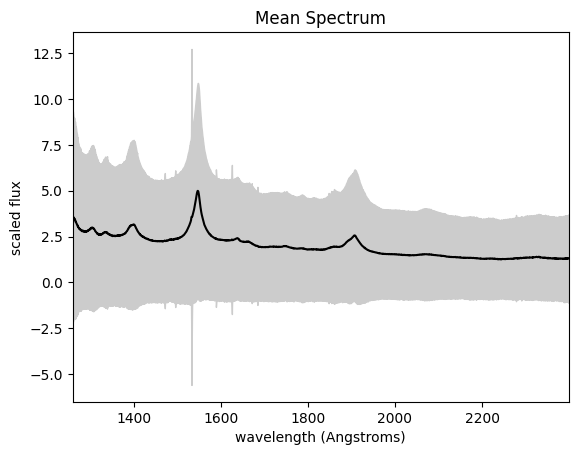

In [66]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# X = preprocessing.normalize(X)
mu = X.mean(0)
std = X.std(0)
plt.plot(wavelengths, mu, color='black')
plt.fill_between(wavelengths, mu - std, mu + std, color='#CCCCCC')
plt.xlim(wavelengths[0], wavelengths[-1])
# plt.ylim(0, 0.06)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux')
plt.title('Mean Spectrum')

In [67]:
from sklearn.decomposition import PCA

X_train = X.T

pca = PCA(n_components=5, random_state=12345)
# pca_mle = PCA(n_components='mle', random_state=1234)

pca.fit(X_train)

PCA(n_components=5, random_state=12345)

In [68]:
X_train_pca = pca.transform(X_train)
X_projected = pca.inverse_transform(X_train_pca)

In [69]:
X_reduced = X_train - X_projected

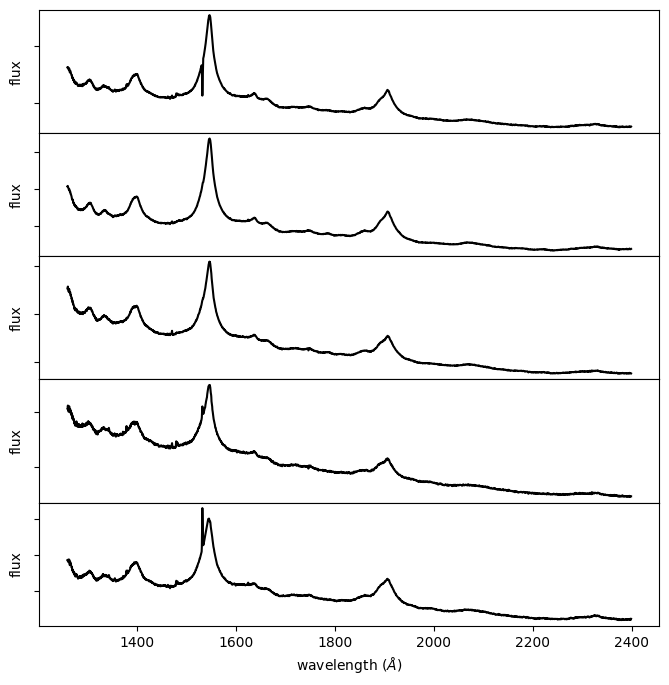

In [70]:
# Plot several spectra
fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(wavelengths, X_projected.T[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')

plt.show()

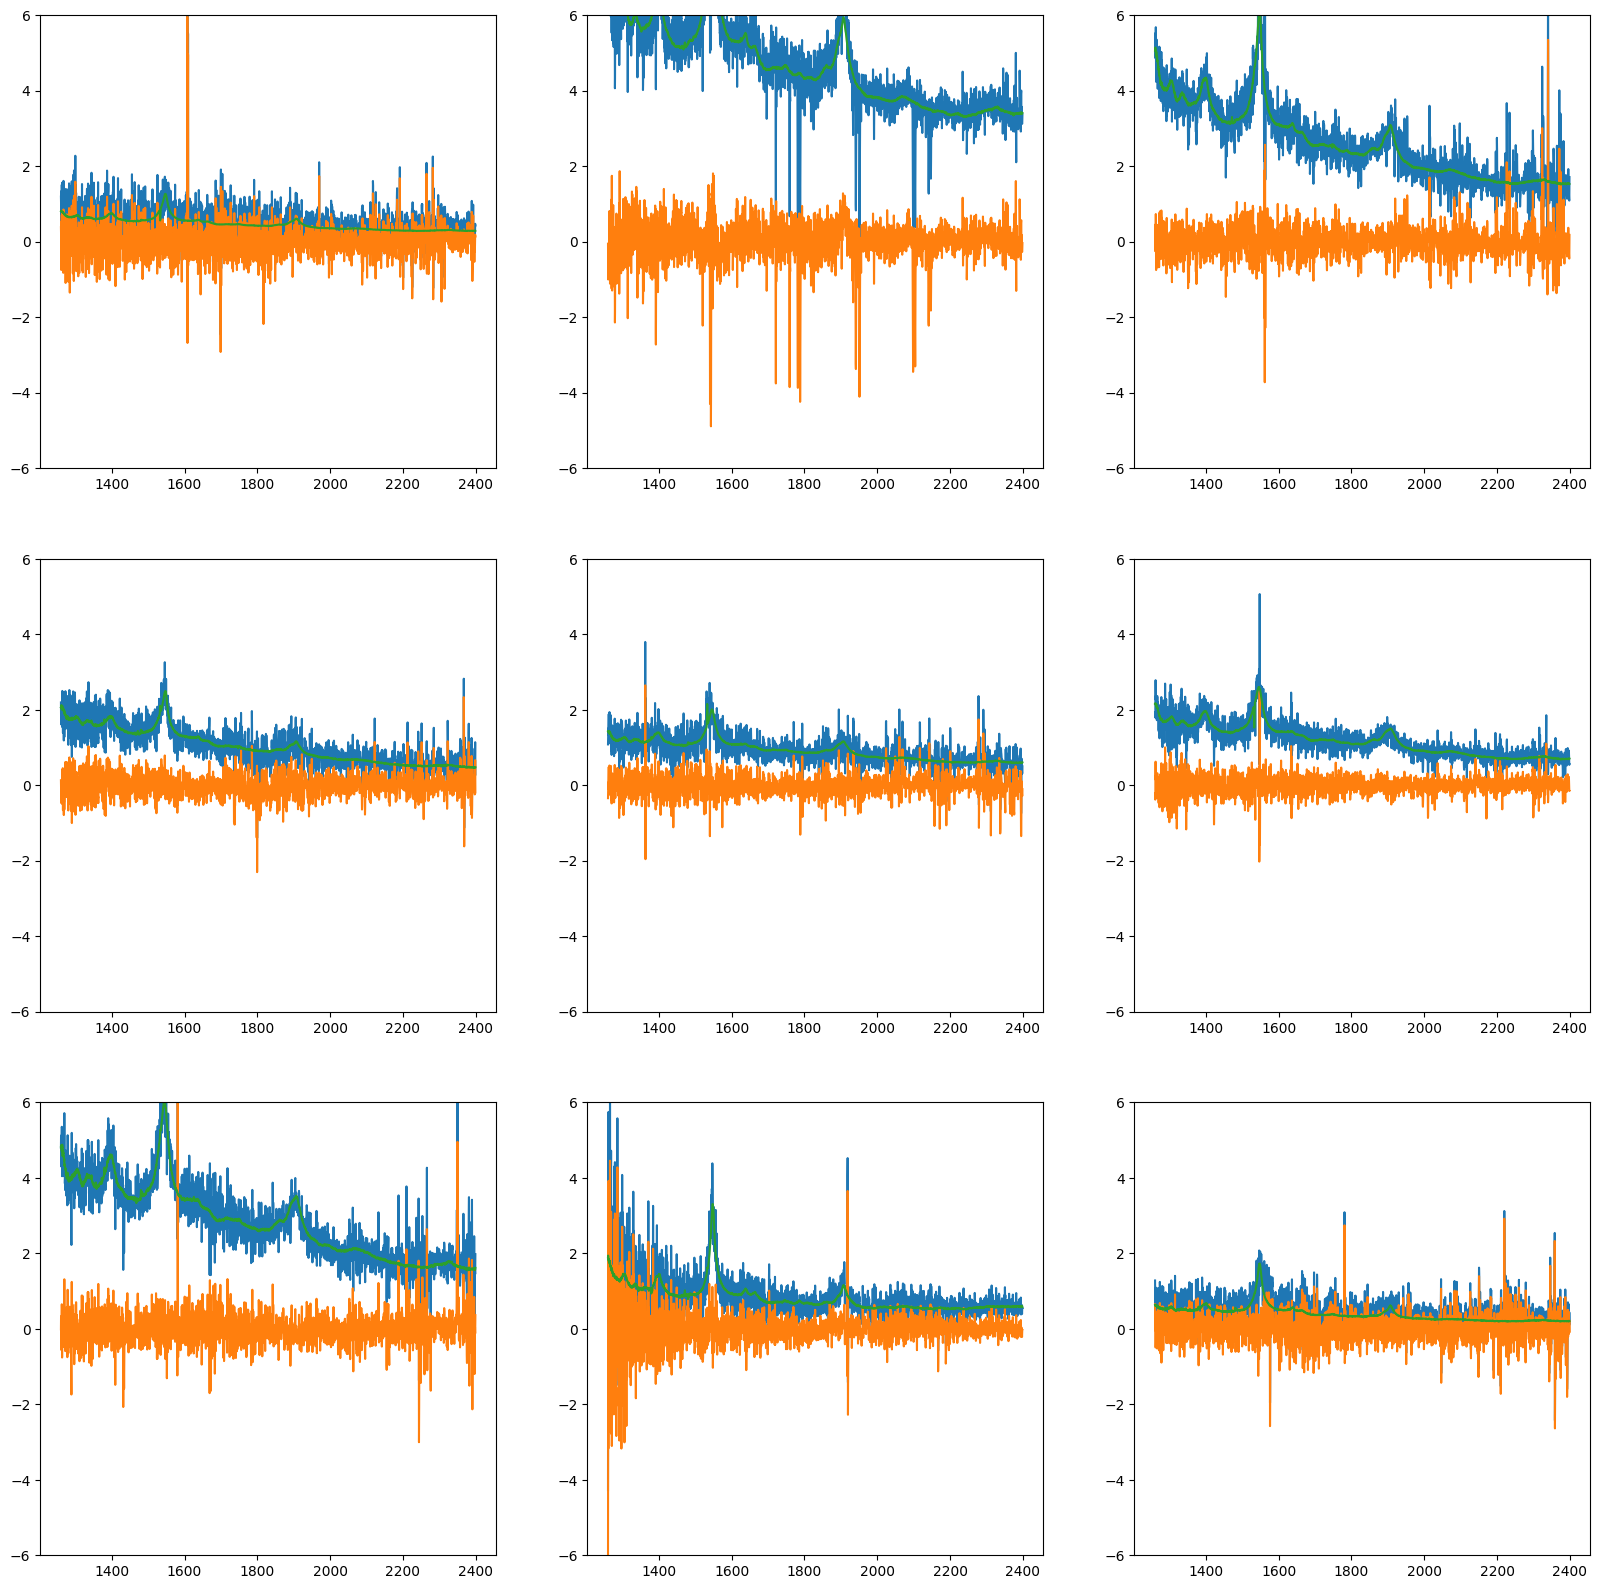

In [71]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i in np.arange(0,9):
    ax_i = axs[int(np.floor(i/3)), int(np.mod(i, 3))]
    ax_i.set_ylim(-6,6)
    ax_i.plot(wavelengths, X_train.T[i])
    ax_i.plot(wavelengths, X_reduced.T[i])
    ax_i.plot(wavelengths, X_projected.T[i])


In [ ]:
import pickle

# save
with open('pca.pkl','wb') as f:
    pickle.dump(pca,f)

In [30]:
X_df = pd.DataFrame(X)
X_full_df = pd.DataFrame(X_full)

In [32]:
X_df.to_csv('../data/pca/X.csv')

In [34]:
X_full_df.to_csv('../data/pca/X_full.csv')

In [49]:
from scipy.signal import medfilt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import rc

In [146]:
spec.spectral_axis.argmax()

4629

In [61]:
def set_mpl_style(fsize=15, tsize=18, tdir='in', major=5.0, minor=3.0, lwidth=1.8, lhandle=2.0):
    """Function to set MPL style"""

    plt.style.use('default')
    plt.rcParams['text.usetex'] = False
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams['font.size'] = fsize
    plt.rcParams['legend.fontsize'] = tsize
    plt.rcParams['xtick.direction'] = tdir
    plt.rcParams['ytick.direction'] = tdir
    plt.rcParams['ytick.right'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.major.size'] = major
    plt.rcParams['xtick.minor.size'] = minor
    plt.rcParams['ytick.major.size'] = major
    plt.rcParams['ytick.minor.size'] = minor
    plt.rcParams['xtick.major.width'] = lwidth
    plt.rcParams['xtick.minor.width'] = lwidth
    plt.rcParams['ytick.major.width'] = lwidth
    plt.rcParams['ytick.minor.width'] = lwidth
    plt.rcParams['axes.linewidth'] = lwidth
    plt.rcParams['legend.handlelength'] = lhandle
    return

/var/folders/s4/l2klswfj1wvcw_vbmvvbc70h0000gn/T/ipykernel_56690/1178897264.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.errorbar(spec.spectral_axis.data, spec.flux.data, yerr=1/np.sqrt(spec.uncertainty.array), \


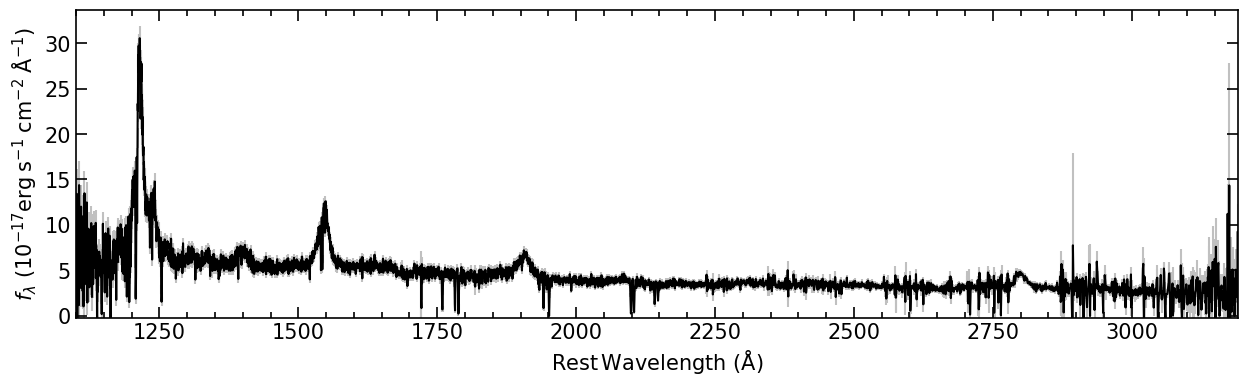

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.tick_params(which="both",bottom=True, top=True, left=True, right=True)
ax.errorbar(spec.spectral_axis.data, spec.flux.data, yerr=1/np.sqrt(spec.uncertainty.array), \
            color='k', ecolor='silver', label='data', zorder=1)
ax.xaxis.set_major_locator(MultipleLocator(250.))
ax.xaxis.set_minor_locator(MultipleLocator(50.))
# ax.yaxis.set_major_locator(MultipleLocator(100.))
# ax.yaxis.set_minor_locator(MultipleLocator(50.))
# ax.set_title(op_filename[3:])
ax.set_xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)')
ax.set_ylabel(r'$ f_{\lambda}$ ($\rm 10^{-17} {\rm erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$)')
ax.set_xlim(np.array(spec.spectral_axis.data).min(), np.array(spec.spectral_axis.data).max())
med_flux = medfilt(np.array(spec.flux.data), kernel_size=5)
ax.set_ylim(-1.2*abs(med_flux.min()), 1.2*med_flux.max())
set_mpl_style(major=8.0,minor=4.0,lwidth=1.2)
plt.show()
ax.step(np.array(spec.spectral_axis.data), np.array(spec.flux.data)) 

In [91]:
spec.shift_spectrum_to(redshift=0)
cut_spec1D = spec[1260*u.AA:2400*u.AA]

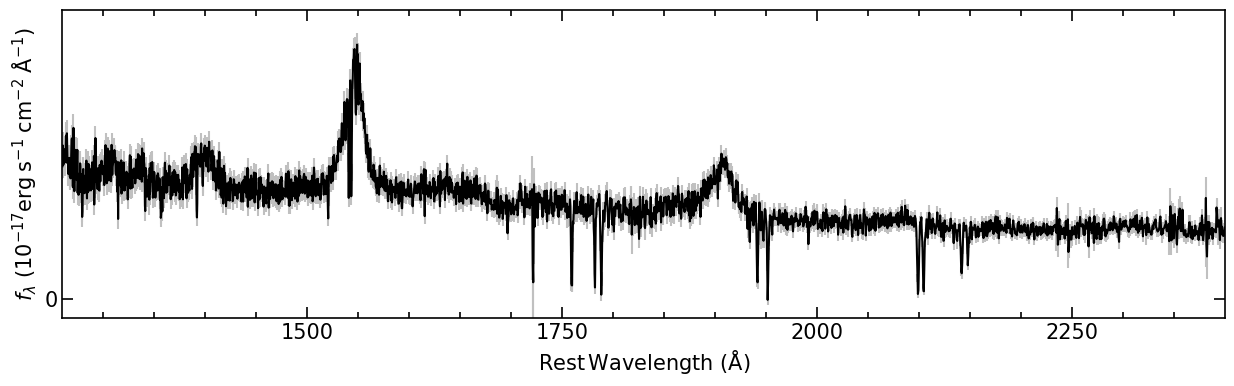

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.tick_params(which="both",bottom=True, top=True, left=True, right=True)
ax.errorbar(cut_spec1D.spectral_axis.data, cut_spec1D.flux.data, yerr=1/np.sqrt(cut_spec1D.uncertainty.array), \
            color='k', ecolor='silver', label='data', zorder=1)
ax.xaxis.set_major_locator(MultipleLocator(250.))
ax.xaxis.set_minor_locator(MultipleLocator(50.))
ax.yaxis.set_major_locator(MultipleLocator(100.))
ax.yaxis.set_minor_locator(MultipleLocator(50.))
# ax.set_title(op_filename[3:])
ax.set_xlabel(r'$\rm Rest \, Wavelength$ ($\rm \AA$)')
ax.set_ylabel(r'$ f_{\lambda}$ ($\rm 10^{-17} {\rm erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$)')
ax.set_xlim(np.array(cut_spec1D.spectral_axis.data).min(), np.array(cut_spec1D.spectral_axis.data).max())
med_flux = medfilt(cut_spec1D.flux.data, kernel_size=5)
ax.set_ylim(-1.2*abs(med_flux.min()), 1.2*med_flux.max())
set_mpl_style(major=8.0,minor=4.0,lwidth=1.2)
plt.show()
ax.step(np.array(cut_spec1D.spectral_axis.data), np.array(cut_spec1D.flux.data)) 

## Now lets fit the PCA eigenspectra to each observation and subtract the continuum to be left with the remaining emission/absorption lines

In [398]:
X_projected.shape

(88, 5)

In [406]:
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()

evecs = pca.components_

In [427]:
spec = spec_l[0]
spec.flux

<Quantity [0.9722684 , 1.195502  , 1.0379379 , ..., 0.47583213, 0.43016803,
           0.4035784 ] 1e-17 erg / (Angstrom s cm2)>

In [425]:
pca.inverse_transform(X_projected)[0]

array([0.75588857, 0.79081127, 0.84831335, ..., 0.21034316, 0.23454925,
       0.32121488])

In [428]:
X.shape

(88, 2798)